<a href="https://colab.research.google.com/github/BapakmuLah/GANs-Architecture-for-generating-Handwritten-Digits/blob/main/Building%20GANs%20Architecture%20for%20Generating%20Handwritten%20Digits/GenerativeAdversarialNetworks_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
# LOAD DATASET MNIST

# TRANSFORM DATASET MNIST
transform = torchvision.transforms.Compose(
    transforms=[
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.5],std=[0.5])
    ]
)

# DOWNLOAD DATASET MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train= True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size= 50, shuffle=True)

train_dataset , len(train_dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:10<00:00, 909kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 58.7kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 12.4MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=[0.5], std=[0.5])
            ),
 60000)

In [3]:
# CHECK DIMENSION OF DATASET
for images, labels in train_loader:
    print(f'batch images : {images.shape[0]}')
    print(f'size images : {images.shape[2:]}')
    print(images.shape)
    break
len(train_loader) , train_loader

batch images : 50
size images : torch.Size([28, 28])
torch.Size([50, 1, 28, 28])


(1200, <torch.utils.data.dataloader.DataLoader at 0x79555853e7a0>)

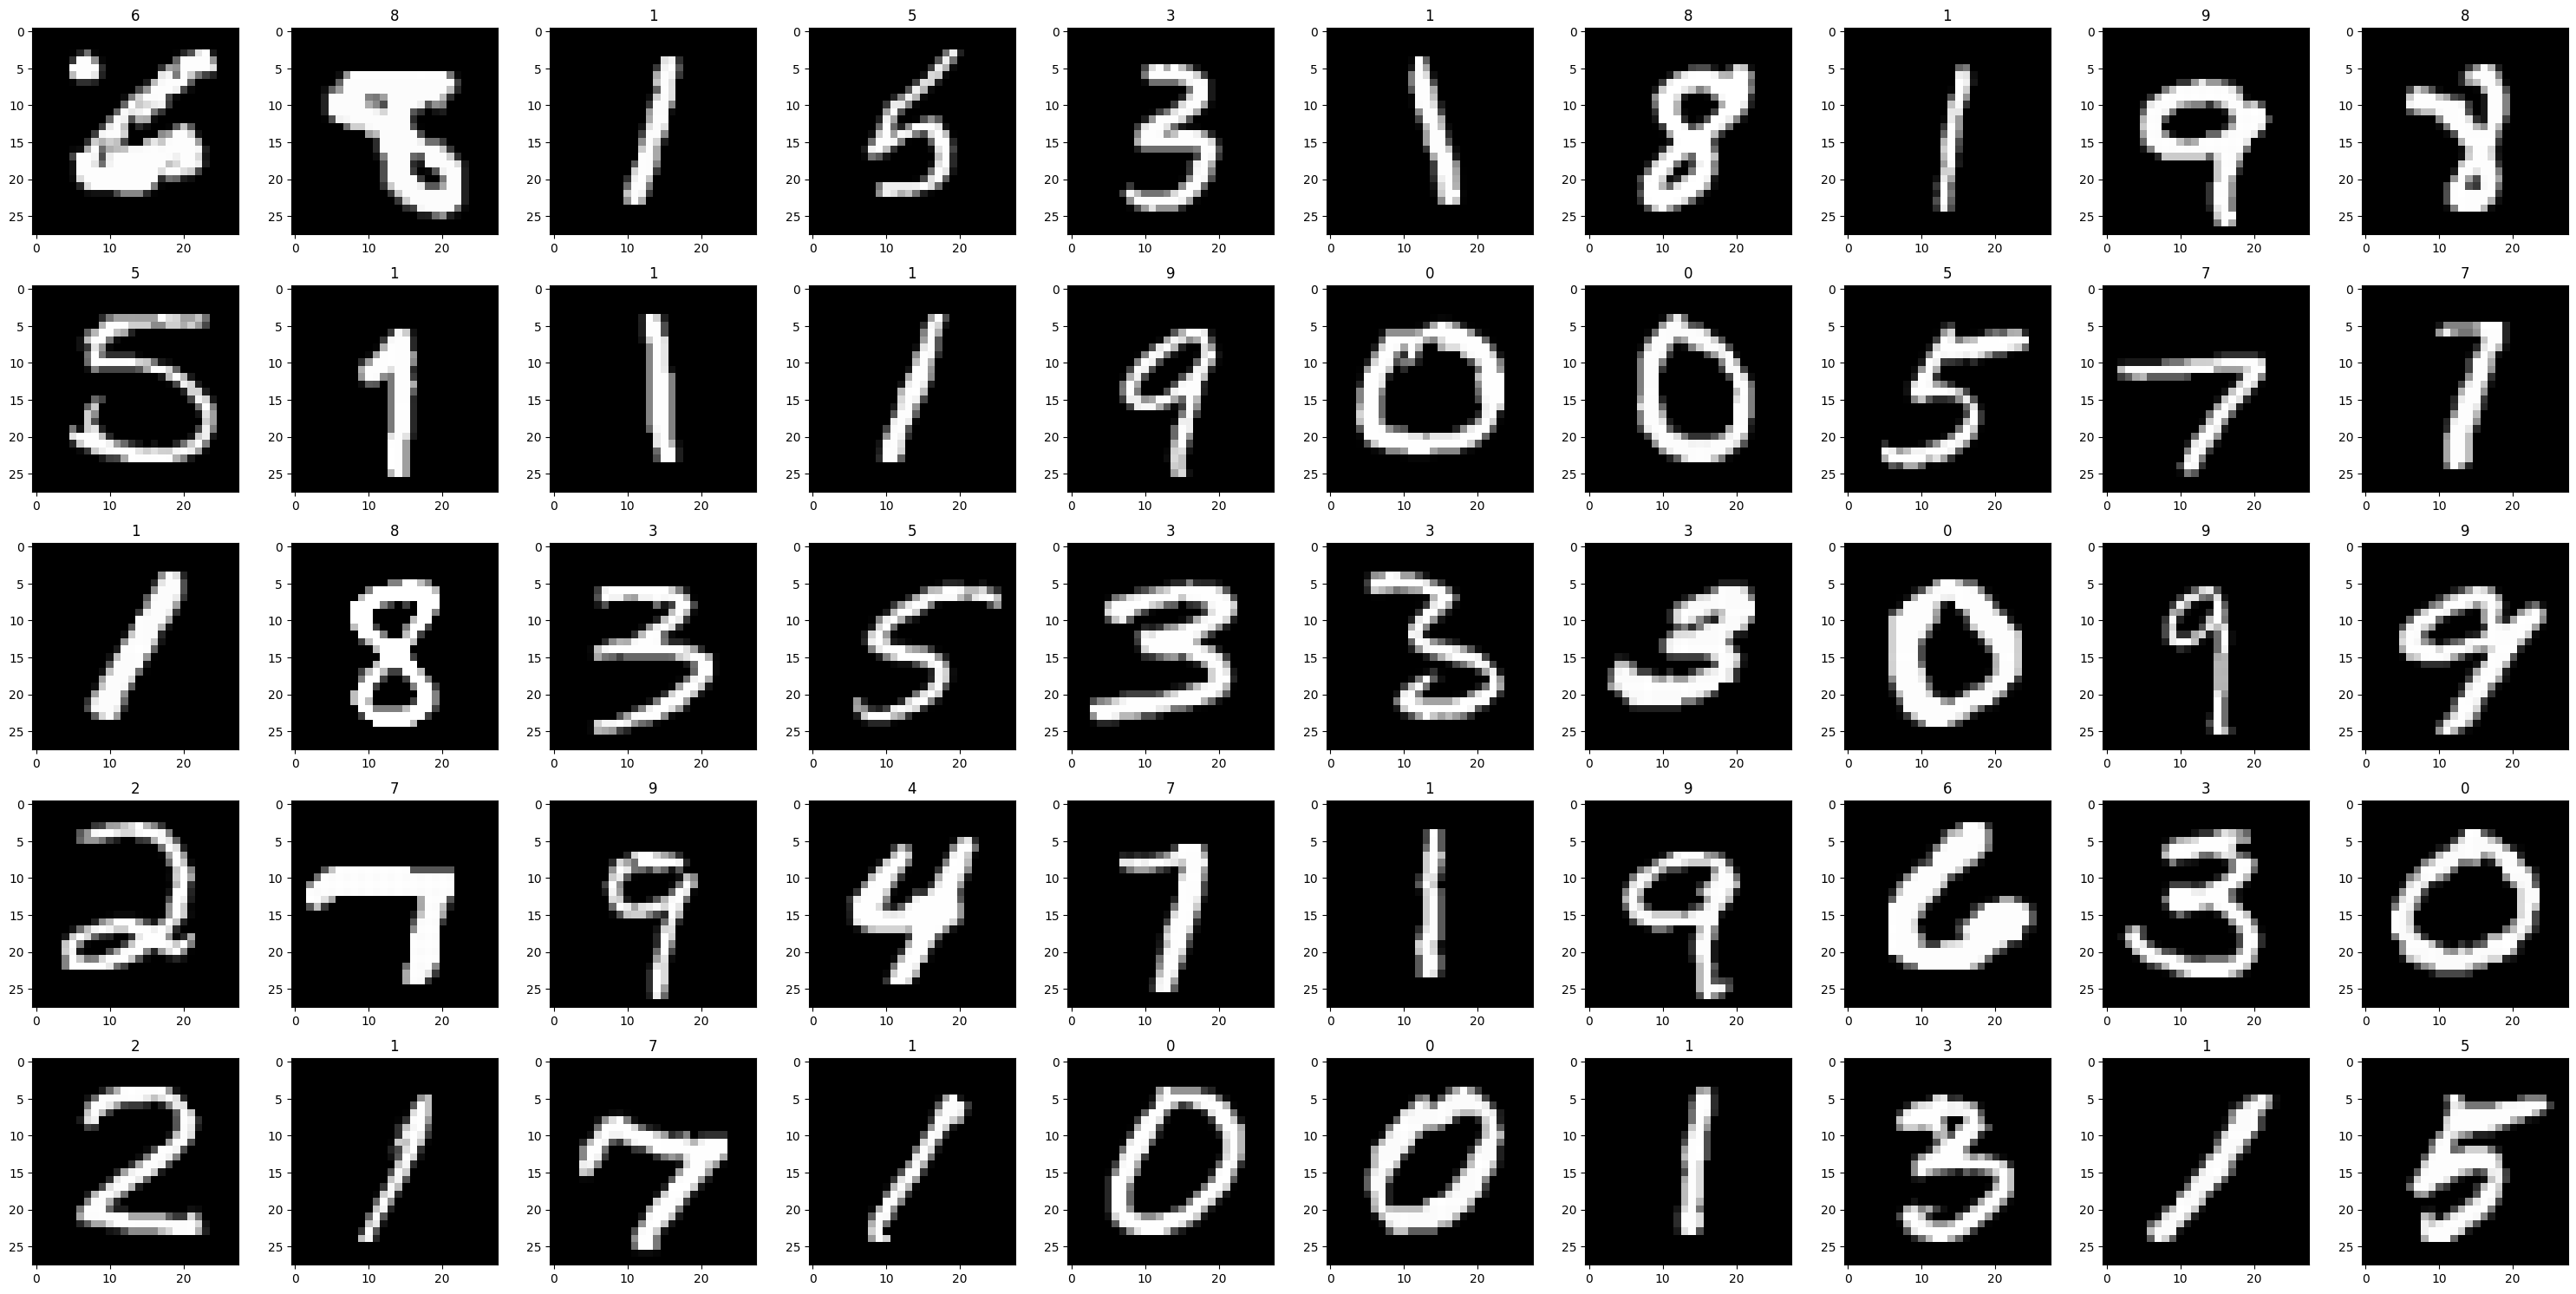

In [4]:
# VISUALIZE MNIST DATASET
for images, labels in train_loader:
    batch_size = images.size(0)

    fig, axes = plt.subplots(nrows=5, ncols=10,figsize=(30,15))

    for i in range(batch_size):
        image = images[i].squeeze()
        ax = axes[i // 10, i % 10] # ATUR INDEX

        ax.imshow(image, cmap='grey')  #SHOW IMAGE
        ax.set_title(labels[i].numpy())

    plt.tight_layout()
    break

<h4><strong> BUILD GANs ARCHITECTURE </strong></h4>

In [5]:
# BUILD GENERATOR

class Generator(torch.nn.Module):

    def __init__(self, z_dim):
        super(Generator, self).__init__()   # SUPER KEYWORD

        # BUILD SEQUENTIAL API FOR GENERATOR
        self.main = torch.nn.Sequential(

            torch.nn.Linear(in_features= z_dim, out_features= 256,bias= True, device='cuda',dtype=torch.float32),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features= 256, out_features= 512,bias= True, device='cuda', dtype=torch.float32),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features= 512, out_features= 1024, bias= True, device='cuda', dtype=torch.float32),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features=1024, out_features= 28 * 28, bias= True, device='cuda', dtype=torch.float32),

            torch.nn.Tanh()     #USING TANH TO OUTPUT VALUE WITHIN [-1,1]
        )

    # CREATE FORWARD PROPAGATION FOR GENERATOR
    def forward(self, input):
        return self.main(input).view(-1, 1, 28, 28) # AFTER FORWARD PROPAGATION , RESHAPE IMAGE INTO 28 * 28 . (NOTE : -1 IS TOTAL BATCH)

In [6]:
# BUILD DISCRIMINATOR
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # BUILD SEQUENTIAL API FOR DISCRIMINATOR
        self.main = torch.nn.Sequential(

            torch.nn.Flatten(),  # FLATTEN-IT TO 1 DIMENSION
            torch.nn.Linear(in_features= 28 * 28, out_features= 1024, bias= True, device='cuda', dtype=torch.float32),
            torch.nn.LeakyReLU(negative_slope= 0.25, inplace=True),

            torch.nn.Linear(in_features= 1024, out_features= 512, device='cuda', dtype=torch.float32),
            torch.nn.LeakyReLU(negative_slope= 0.2, inplace= True),

            torch.nn.Linear(in_features= 512, out_features= 256, device='cuda', dtype=torch.float32),
            torch.nn.LeakyReLU(negative_slope= 0.2,inplace=True),

            torch.nn.Linear(in_features= 256, out_features= 1, device='cuda', dtype=torch.float32),
            torch.nn.Sigmoid()    # OUTPUT BETWEEN [-1,1]
        )

    # CREATE FORWARD PROPAGATION FOR DISCRIMINATOR
    def forward(self, input):
        return self.main(input)                    # FIT THE MODEL TO ARCHITECTURE

In [7]:
# CREATE COST FUNCTION

loss_function = torch.nn.BCELoss()

z_dim = 100  # INPUT SIZE (SHAPE)
generator = Generator(z_dim)  # CALL GENERATOR CLASS
discriminator = Discriminator()  # CALL DISCRIMINATOR CLASS

# SET THE PARAMETERS FOR GENERATOR AND DISCRIMINATOR
optimizer_g = torch.optim.Adam(params= generator.parameters(), lr=0.0007, betas=(0.5,0.998))
optimizer_d = torch.optim.Adam(params= discriminator.parameters(), lr=0.0007, betas=(0.5,0.998))

generator , discriminator , optimizer_g , optimizer_d

(Generator(
   (main): Sequential(
     (0): Linear(in_features=100, out_features=256, bias=True)
     (1): ReLU(inplace=True)
     (2): Linear(in_features=256, out_features=512, bias=True)
     (3): ReLU(inplace=True)
     (4): Linear(in_features=512, out_features=1024, bias=True)
     (5): ReLU(inplace=True)
     (6): Linear(in_features=1024, out_features=784, bias=True)
     (7): Tanh()
   )
 ),
 Discriminator(
   (main): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=1024, bias=True)
     (2): LeakyReLU(negative_slope=0.25, inplace=True)
     (3): Linear(in_features=1024, out_features=512, bias=True)
     (4): LeakyReLU(negative_slope=0.2, inplace=True)
     (5): Linear(in_features=512, out_features=256, bias=True)
     (6): LeakyReLU(negative_slope=0.2, inplace=True)
     (7): Linear(in_features=256, out_features=1, bias=True)
     (8): Sigmoid()
   )
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.5, 0.998)


epoch[1/50], Generator Loss: 1.8723, Discriminator Loss: 0.8628


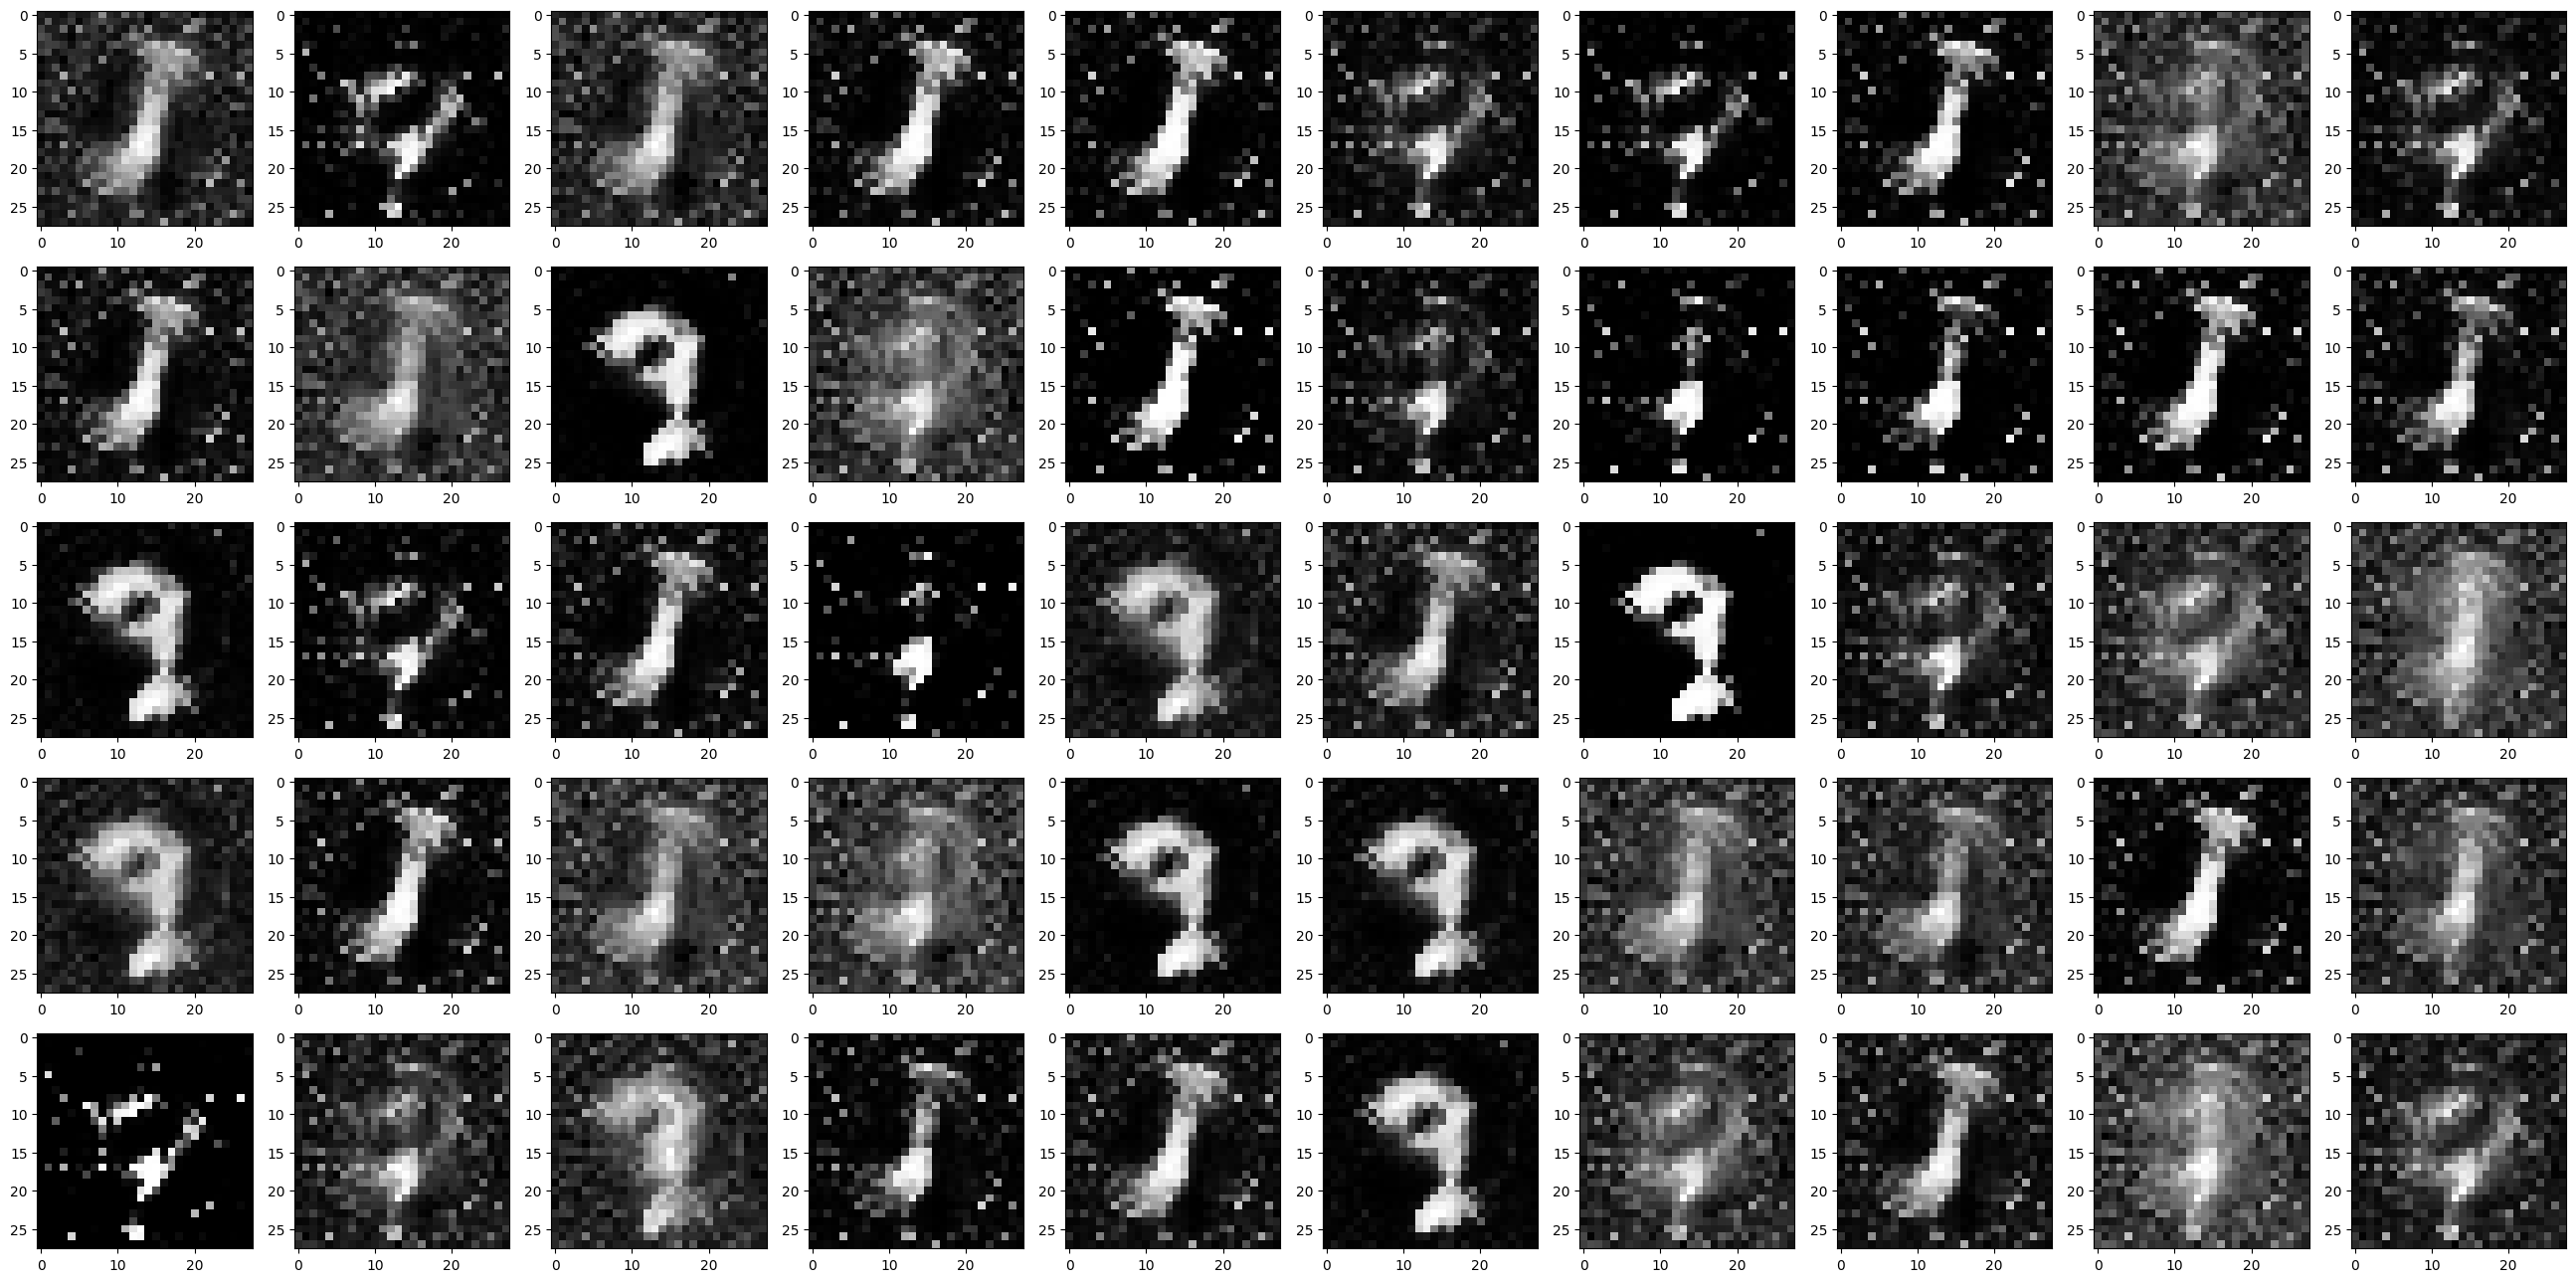

epoch[2/50], Generator Loss: 1.4305, Discriminator Loss: 1.4139


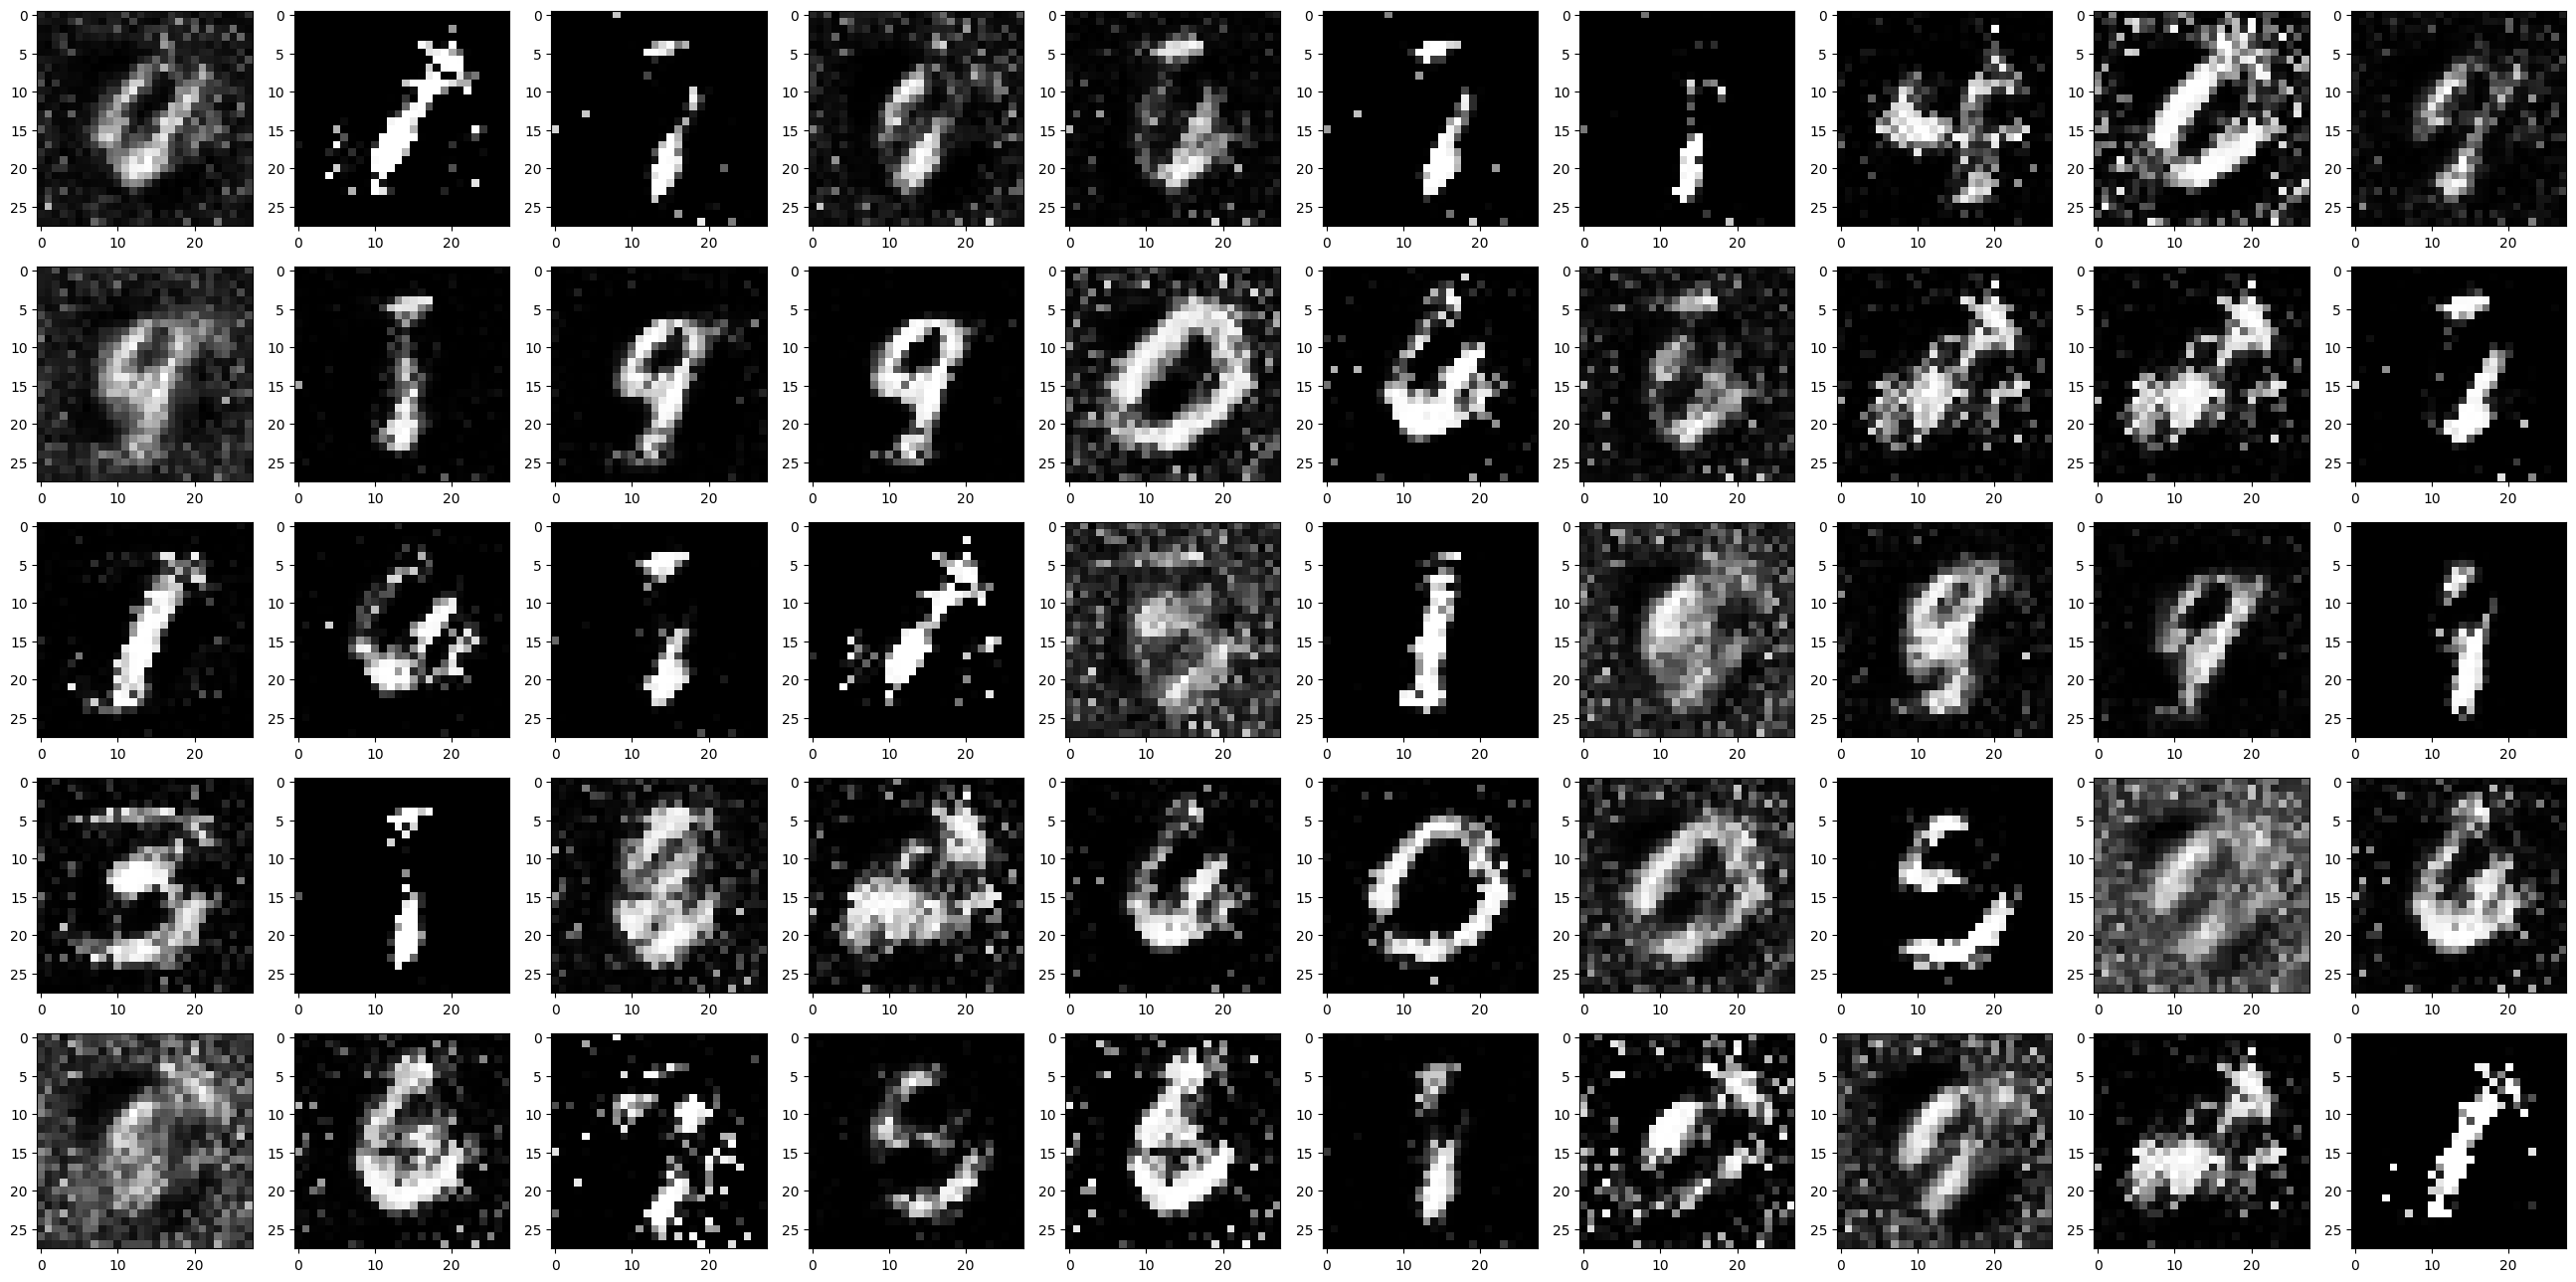

epoch[3/50], Generator Loss: 1.1756, Discriminator Loss: 0.8537


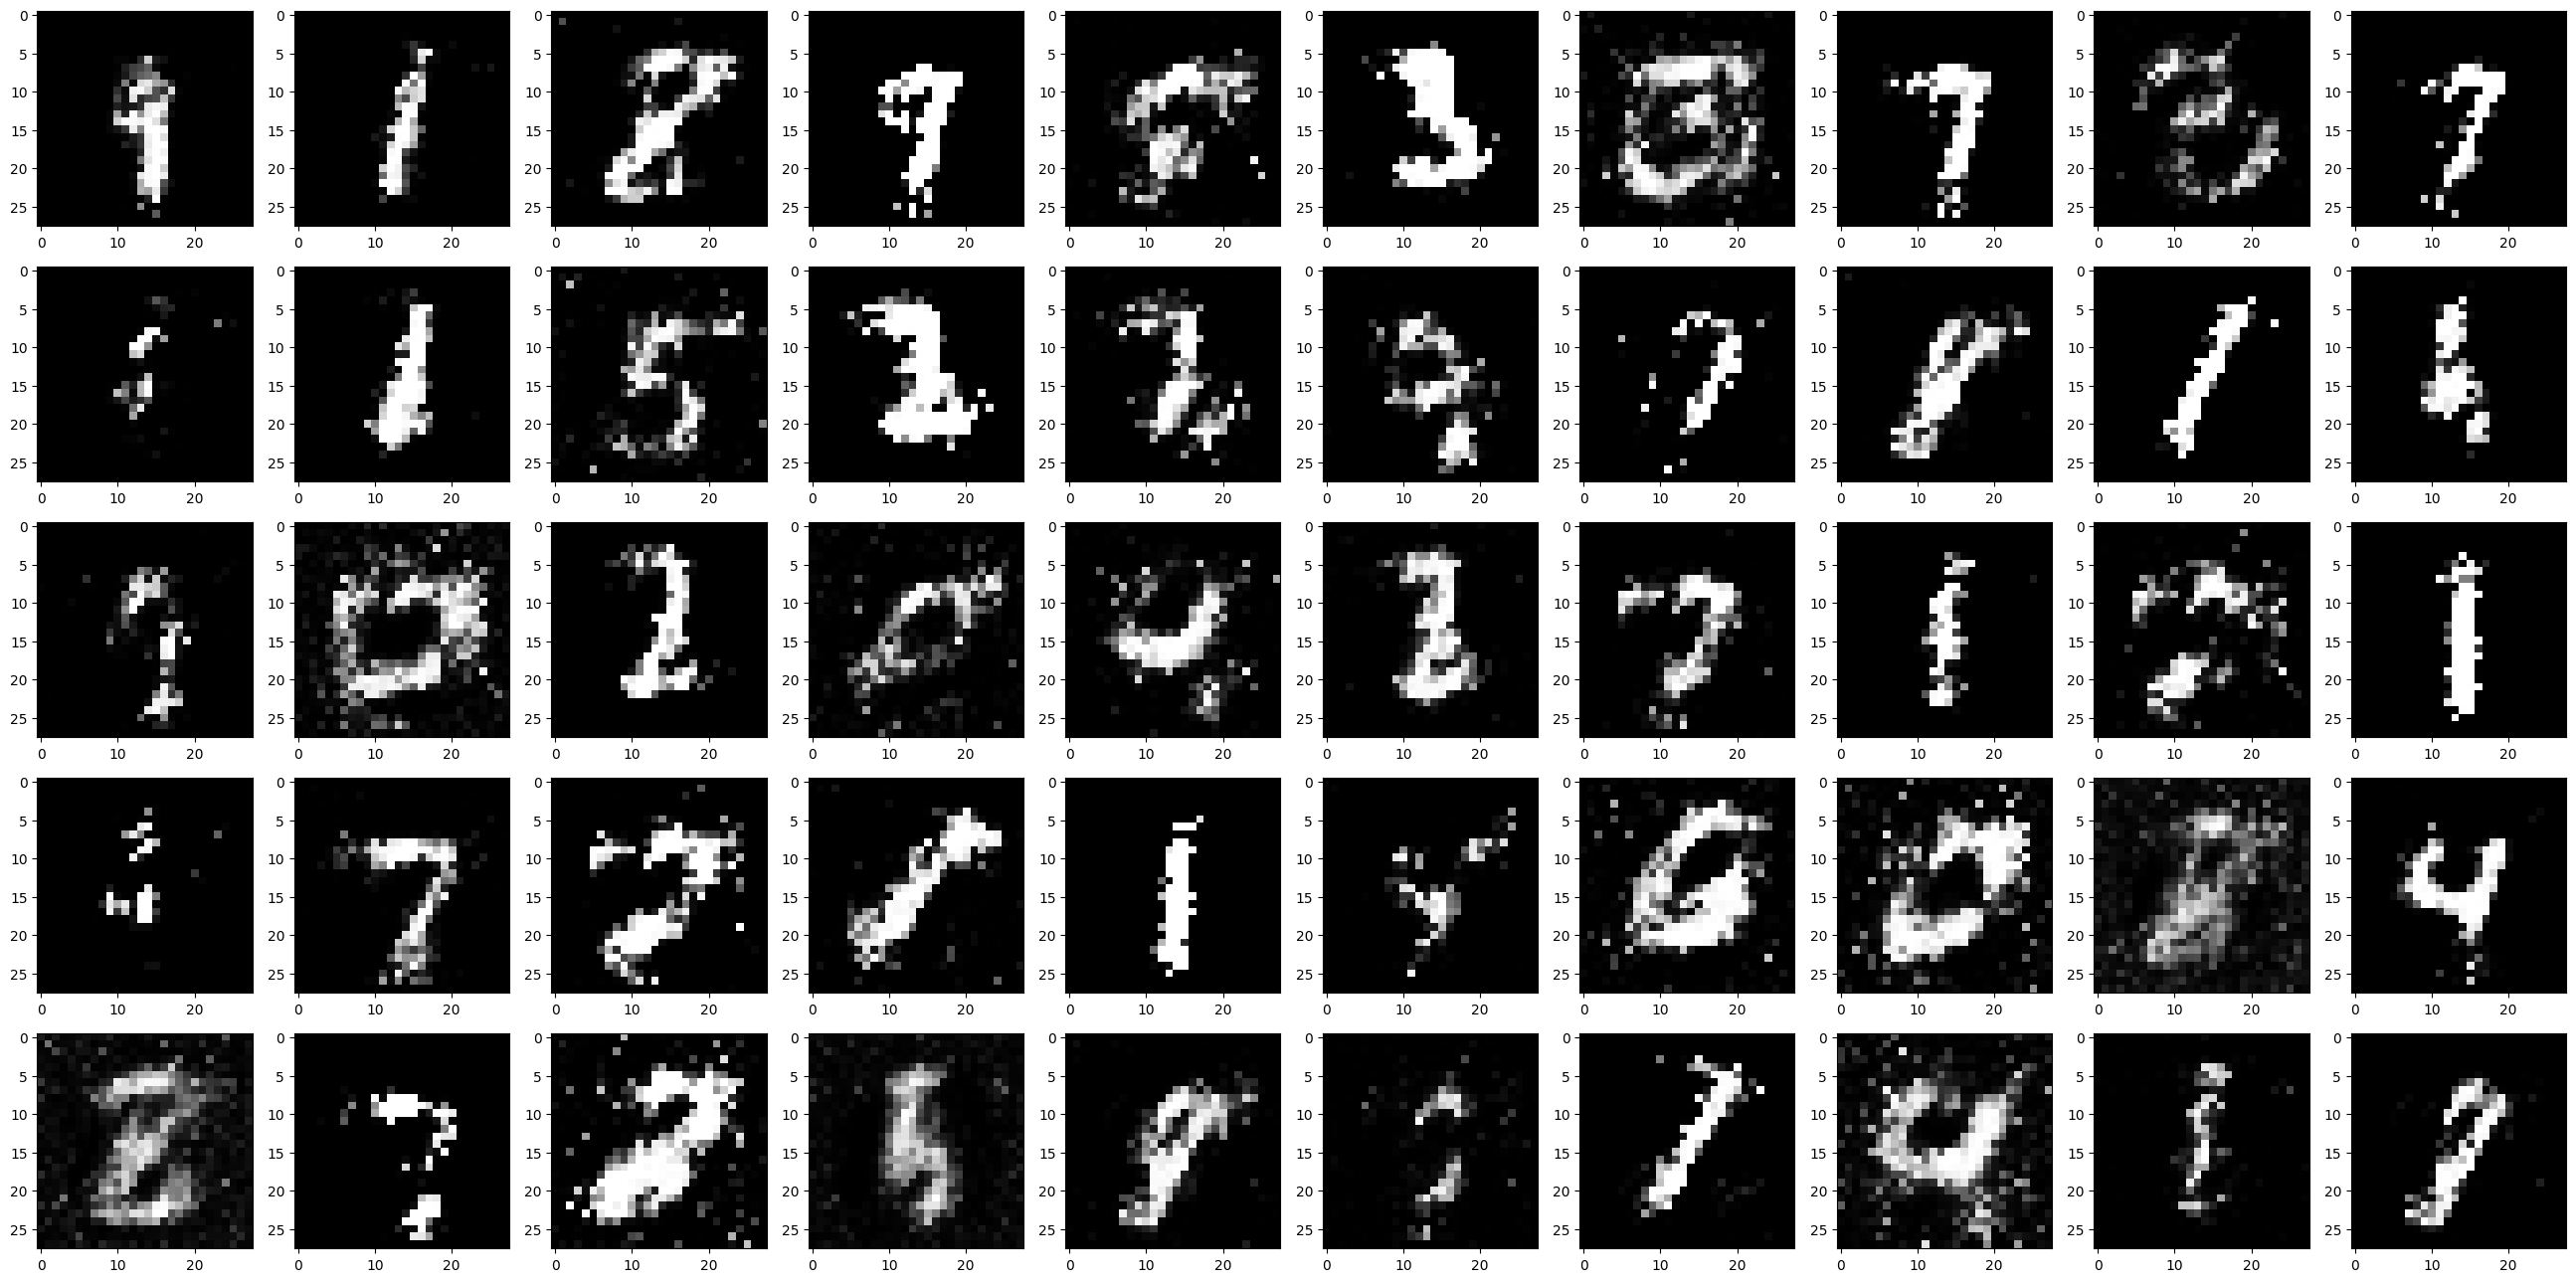

epoch[4/50], Generator Loss: 1.3594, Discriminator Loss: 1.0882


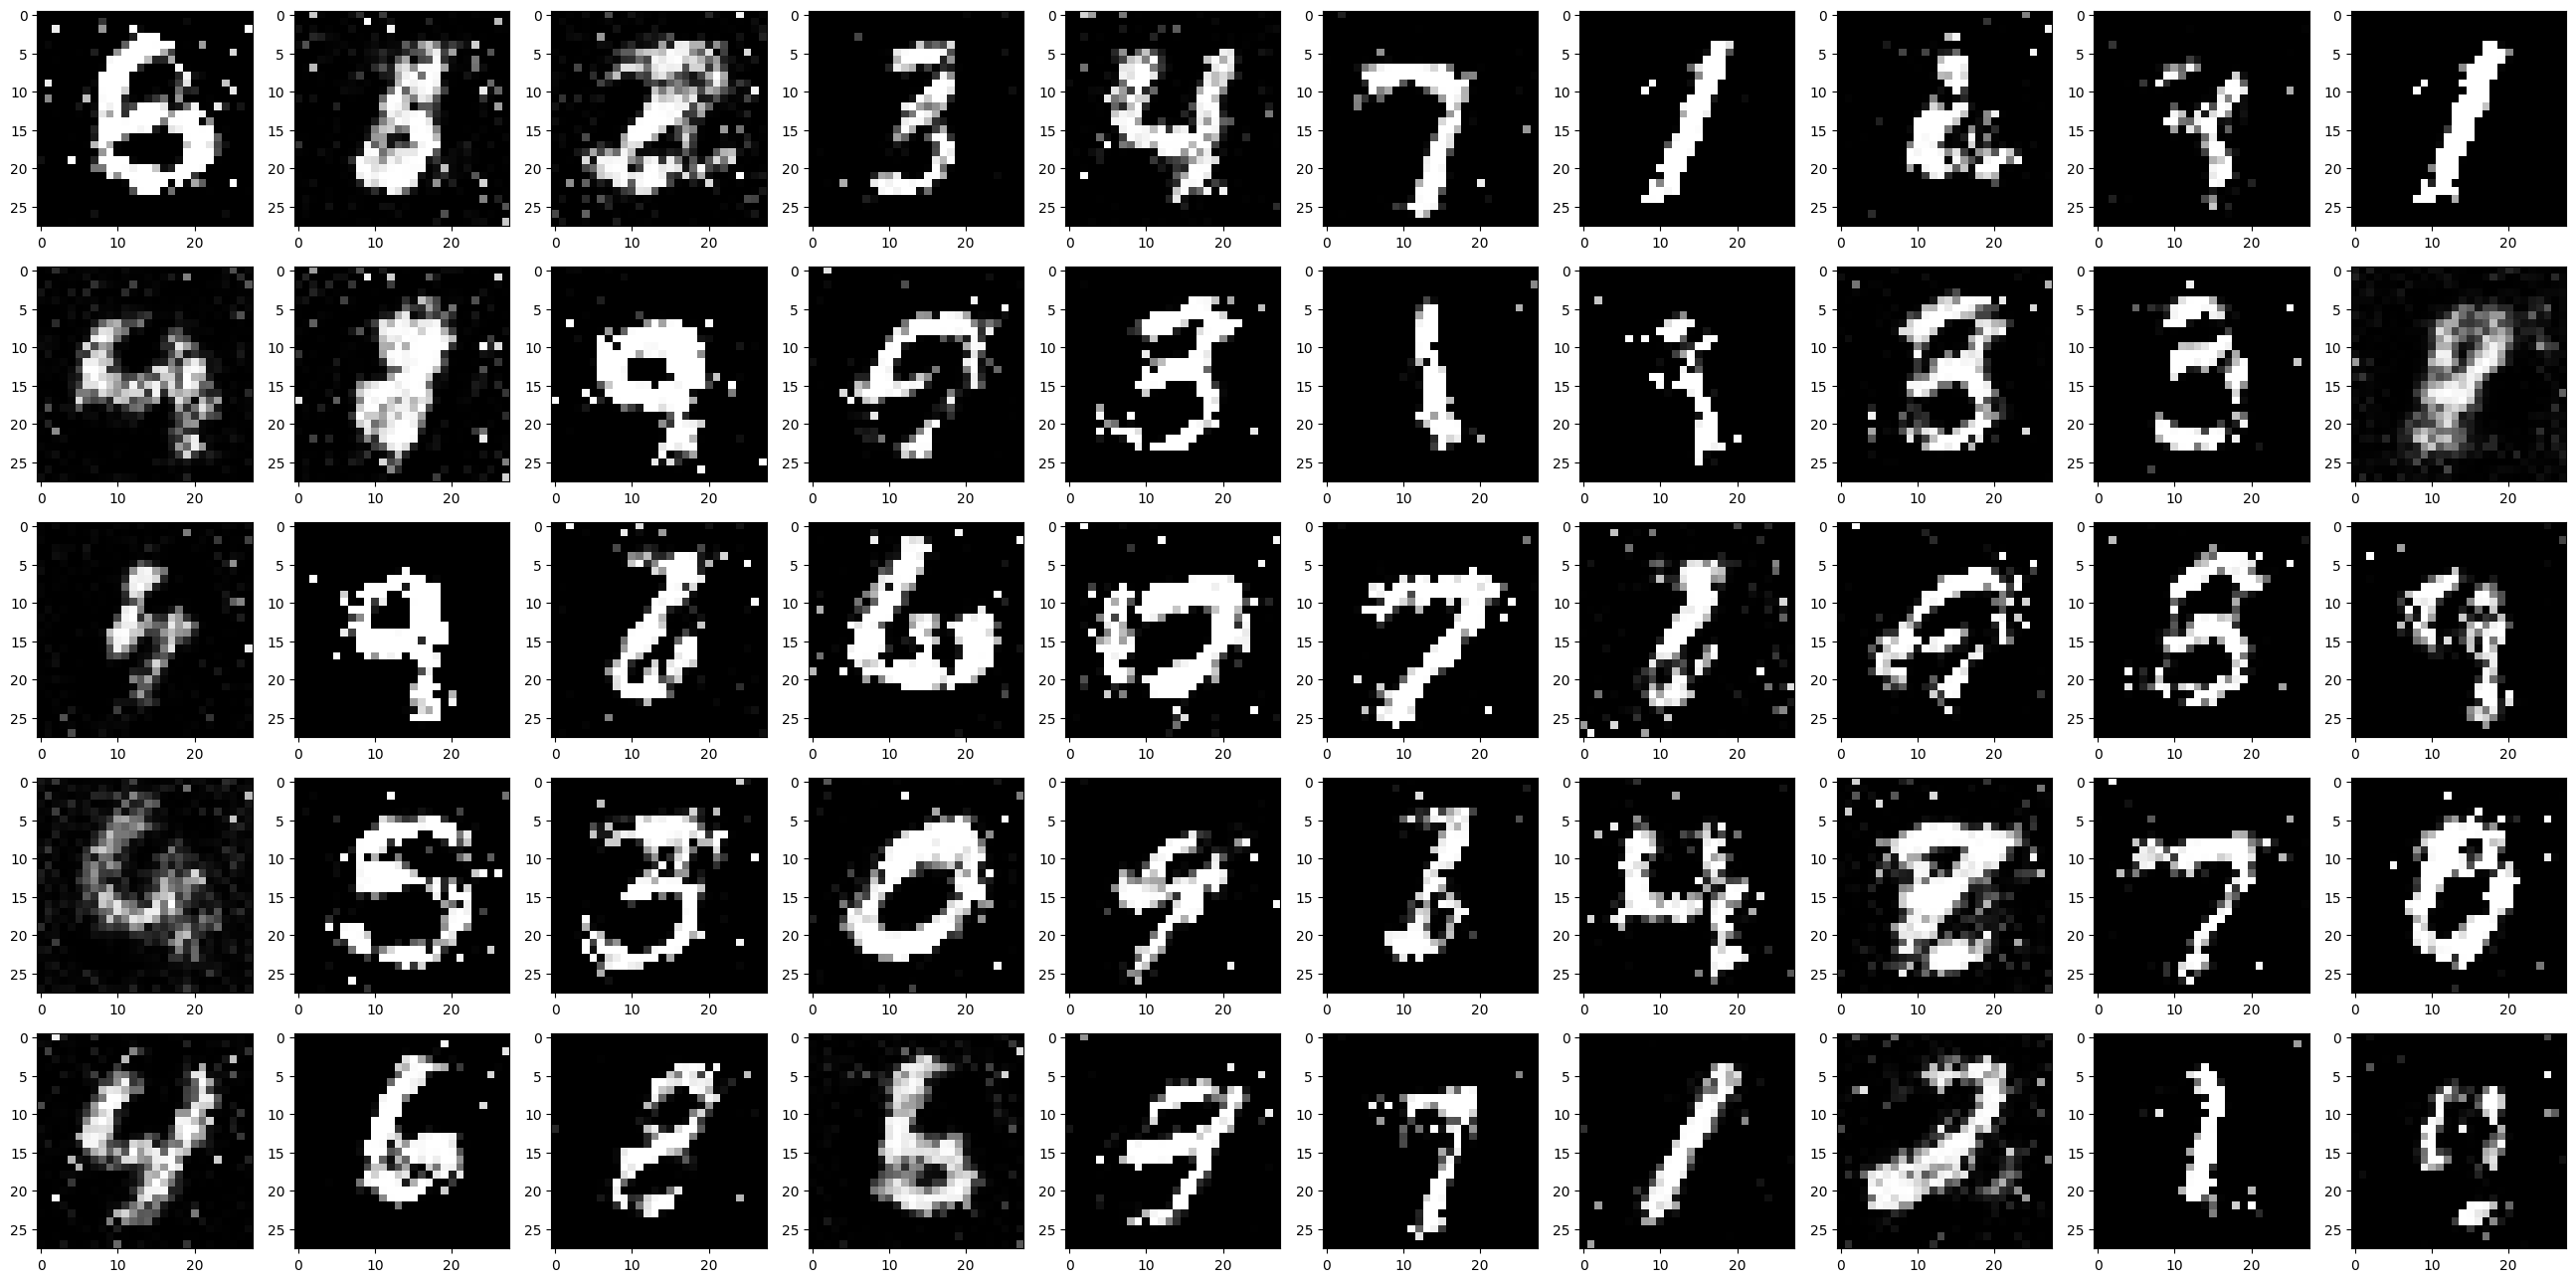

epoch[5/50], Generator Loss: 1.4069, Discriminator Loss: 0.8475


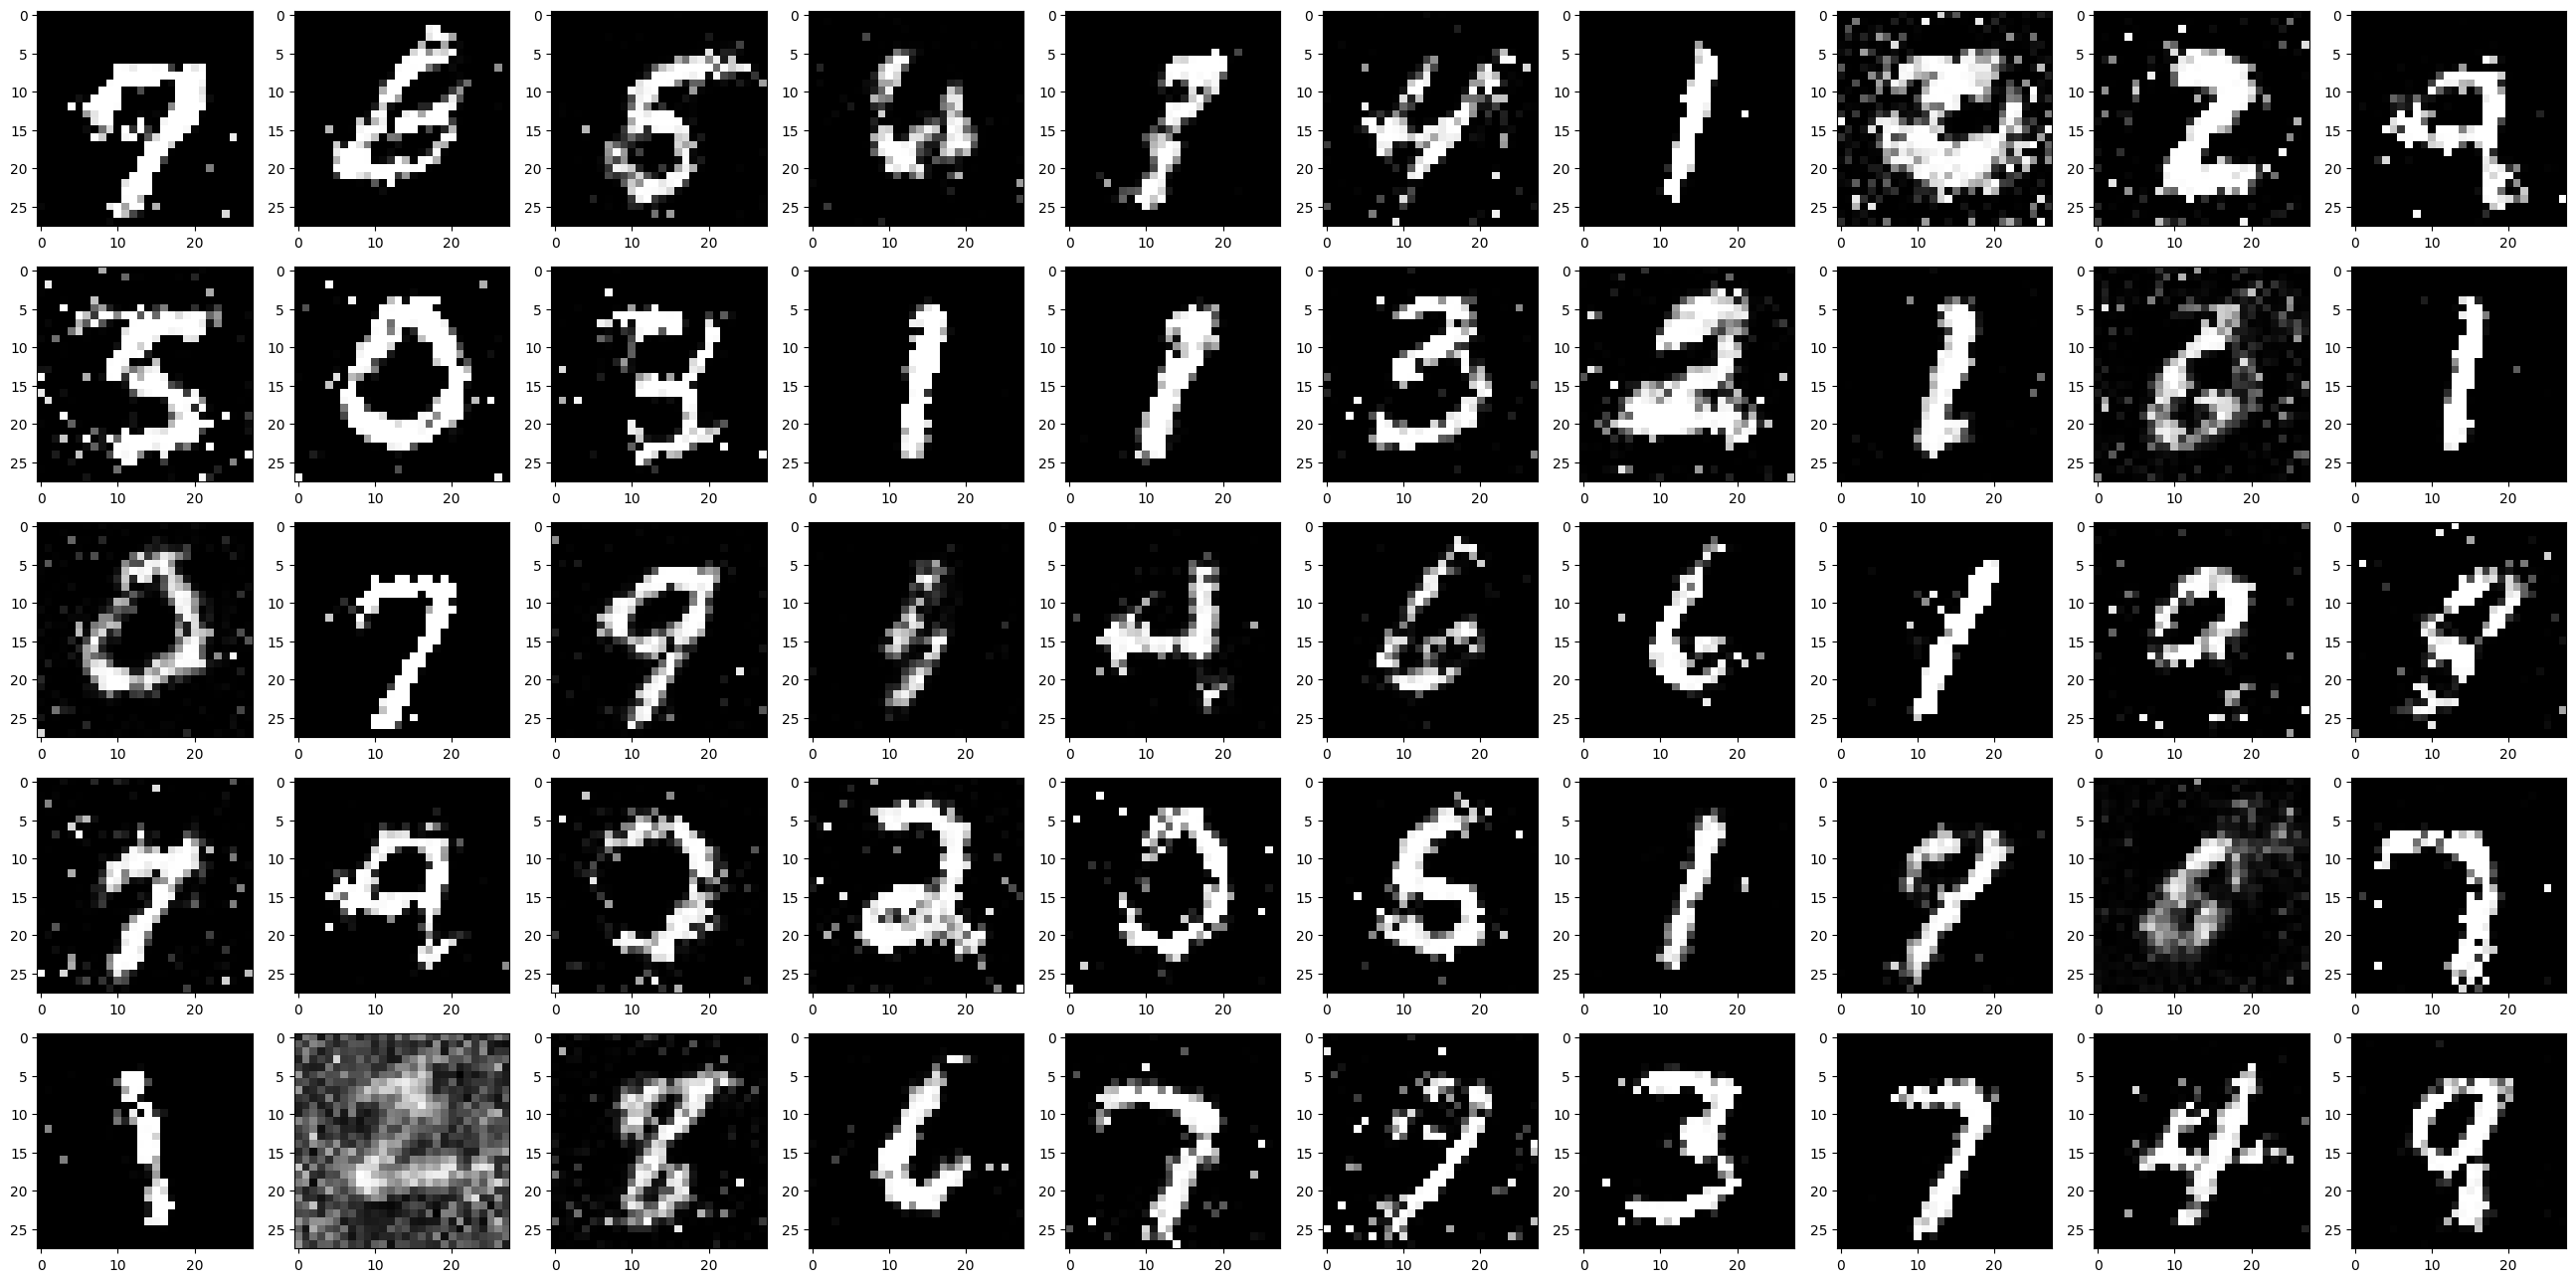

epoch[6/50], Generator Loss: 1.1701, Discriminator Loss: 1.0285


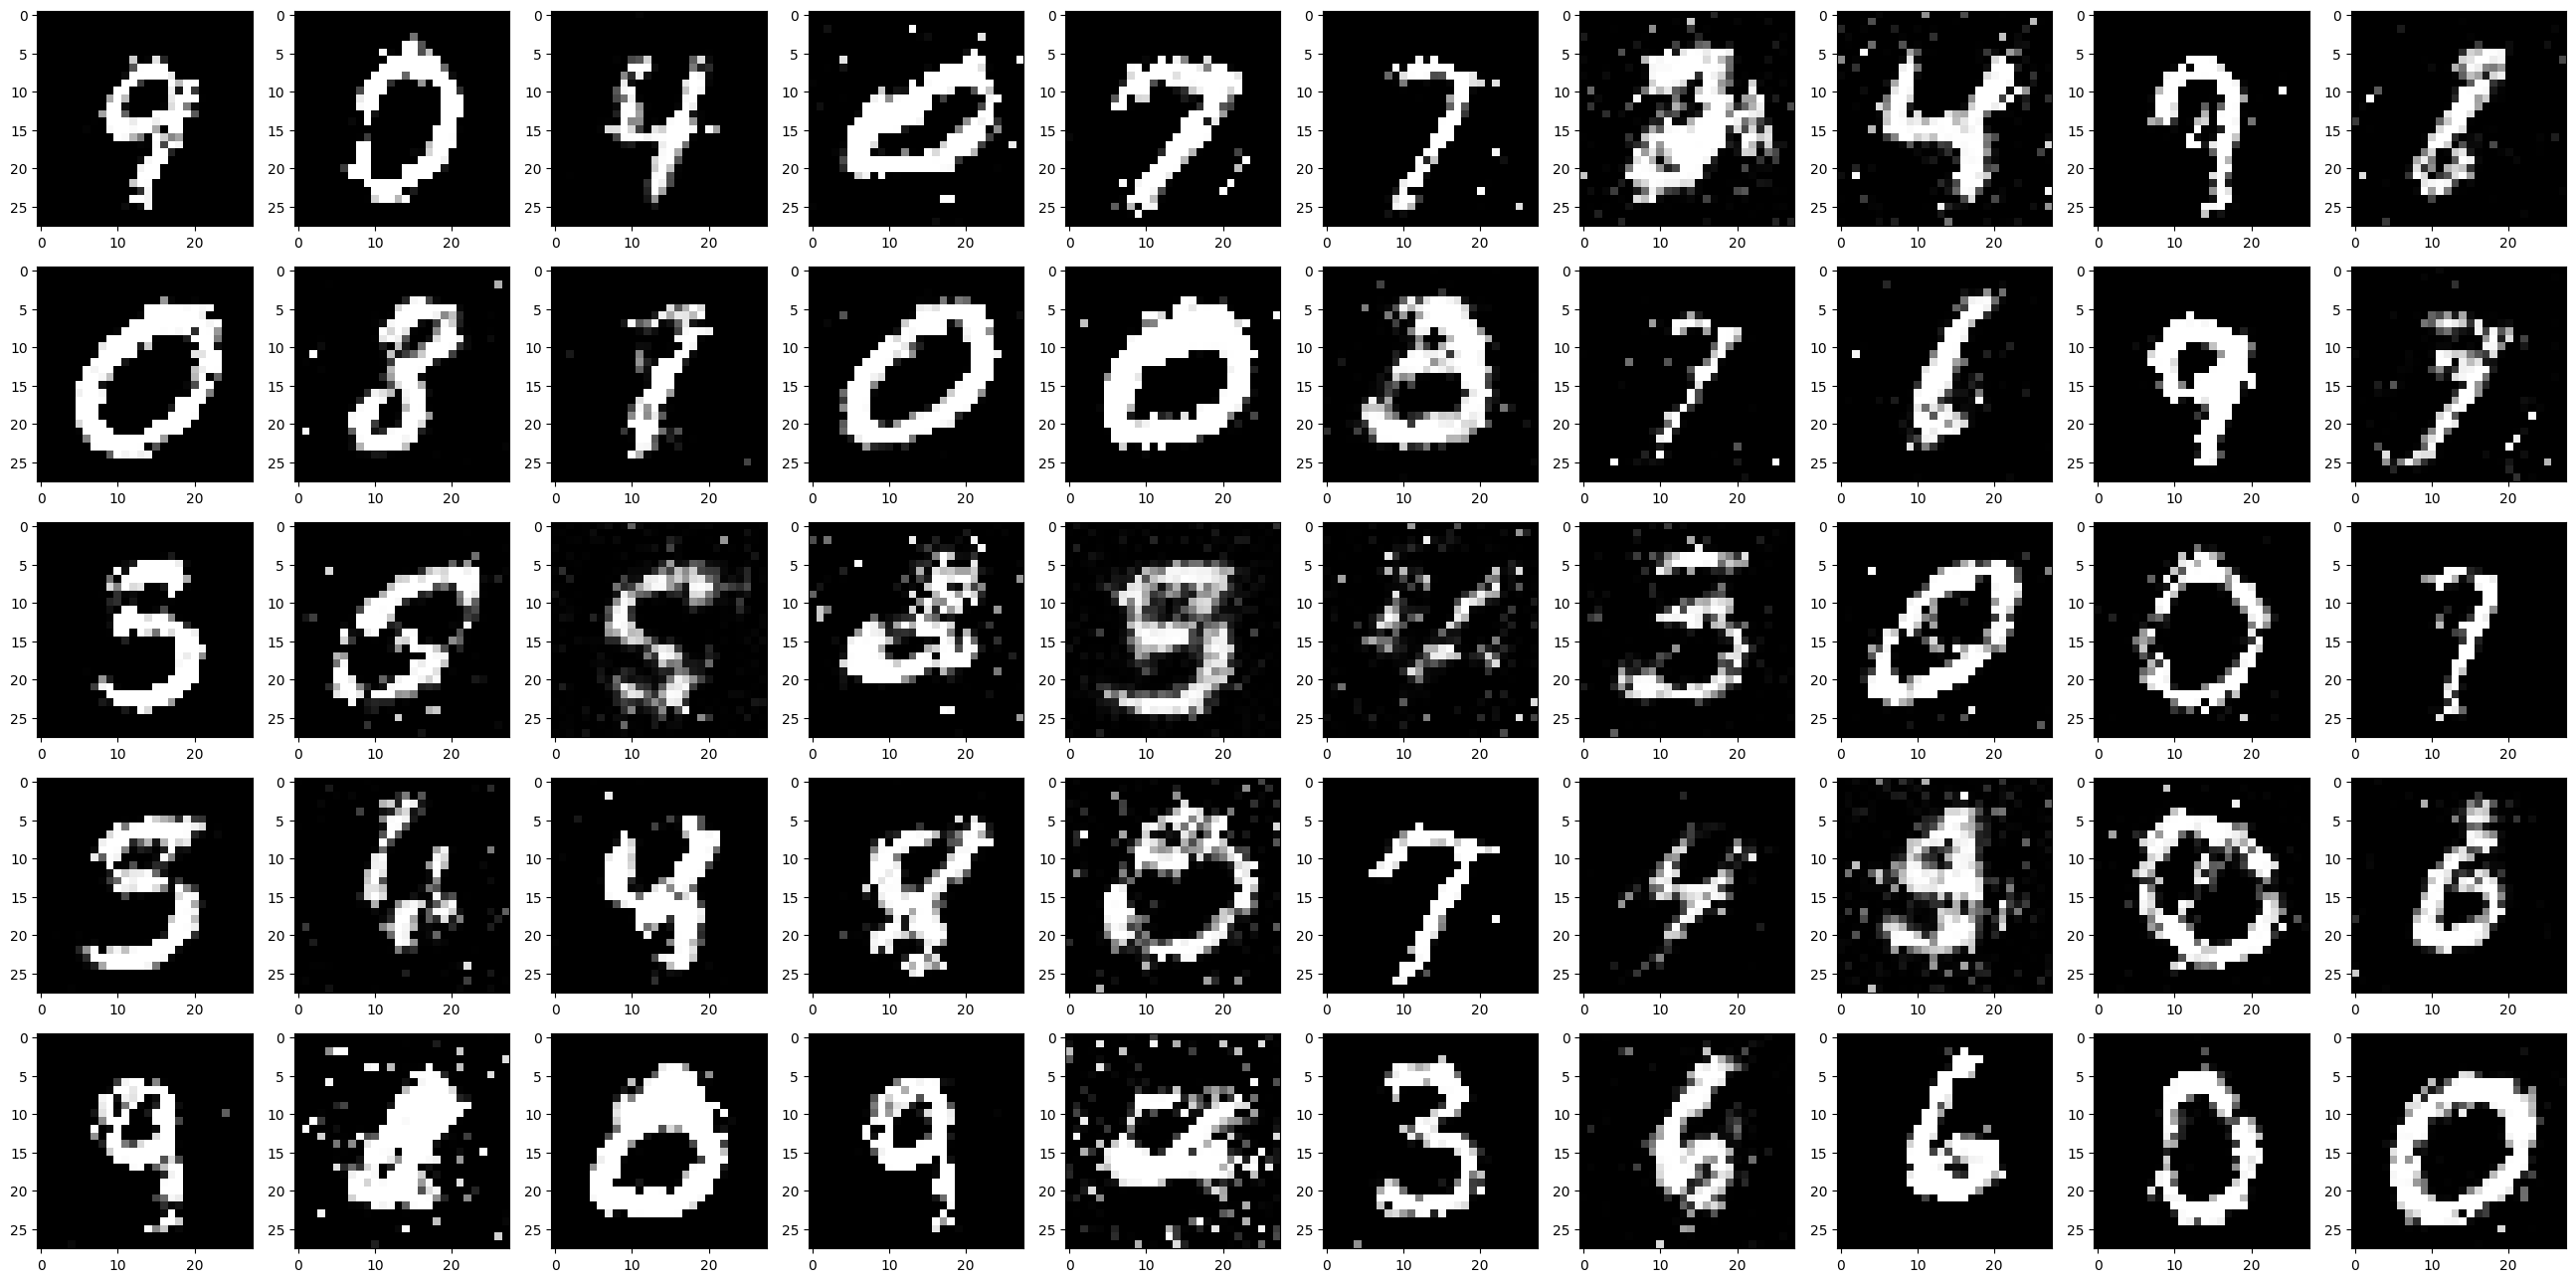

epoch[7/50], Generator Loss: 1.3597, Discriminator Loss: 0.9777


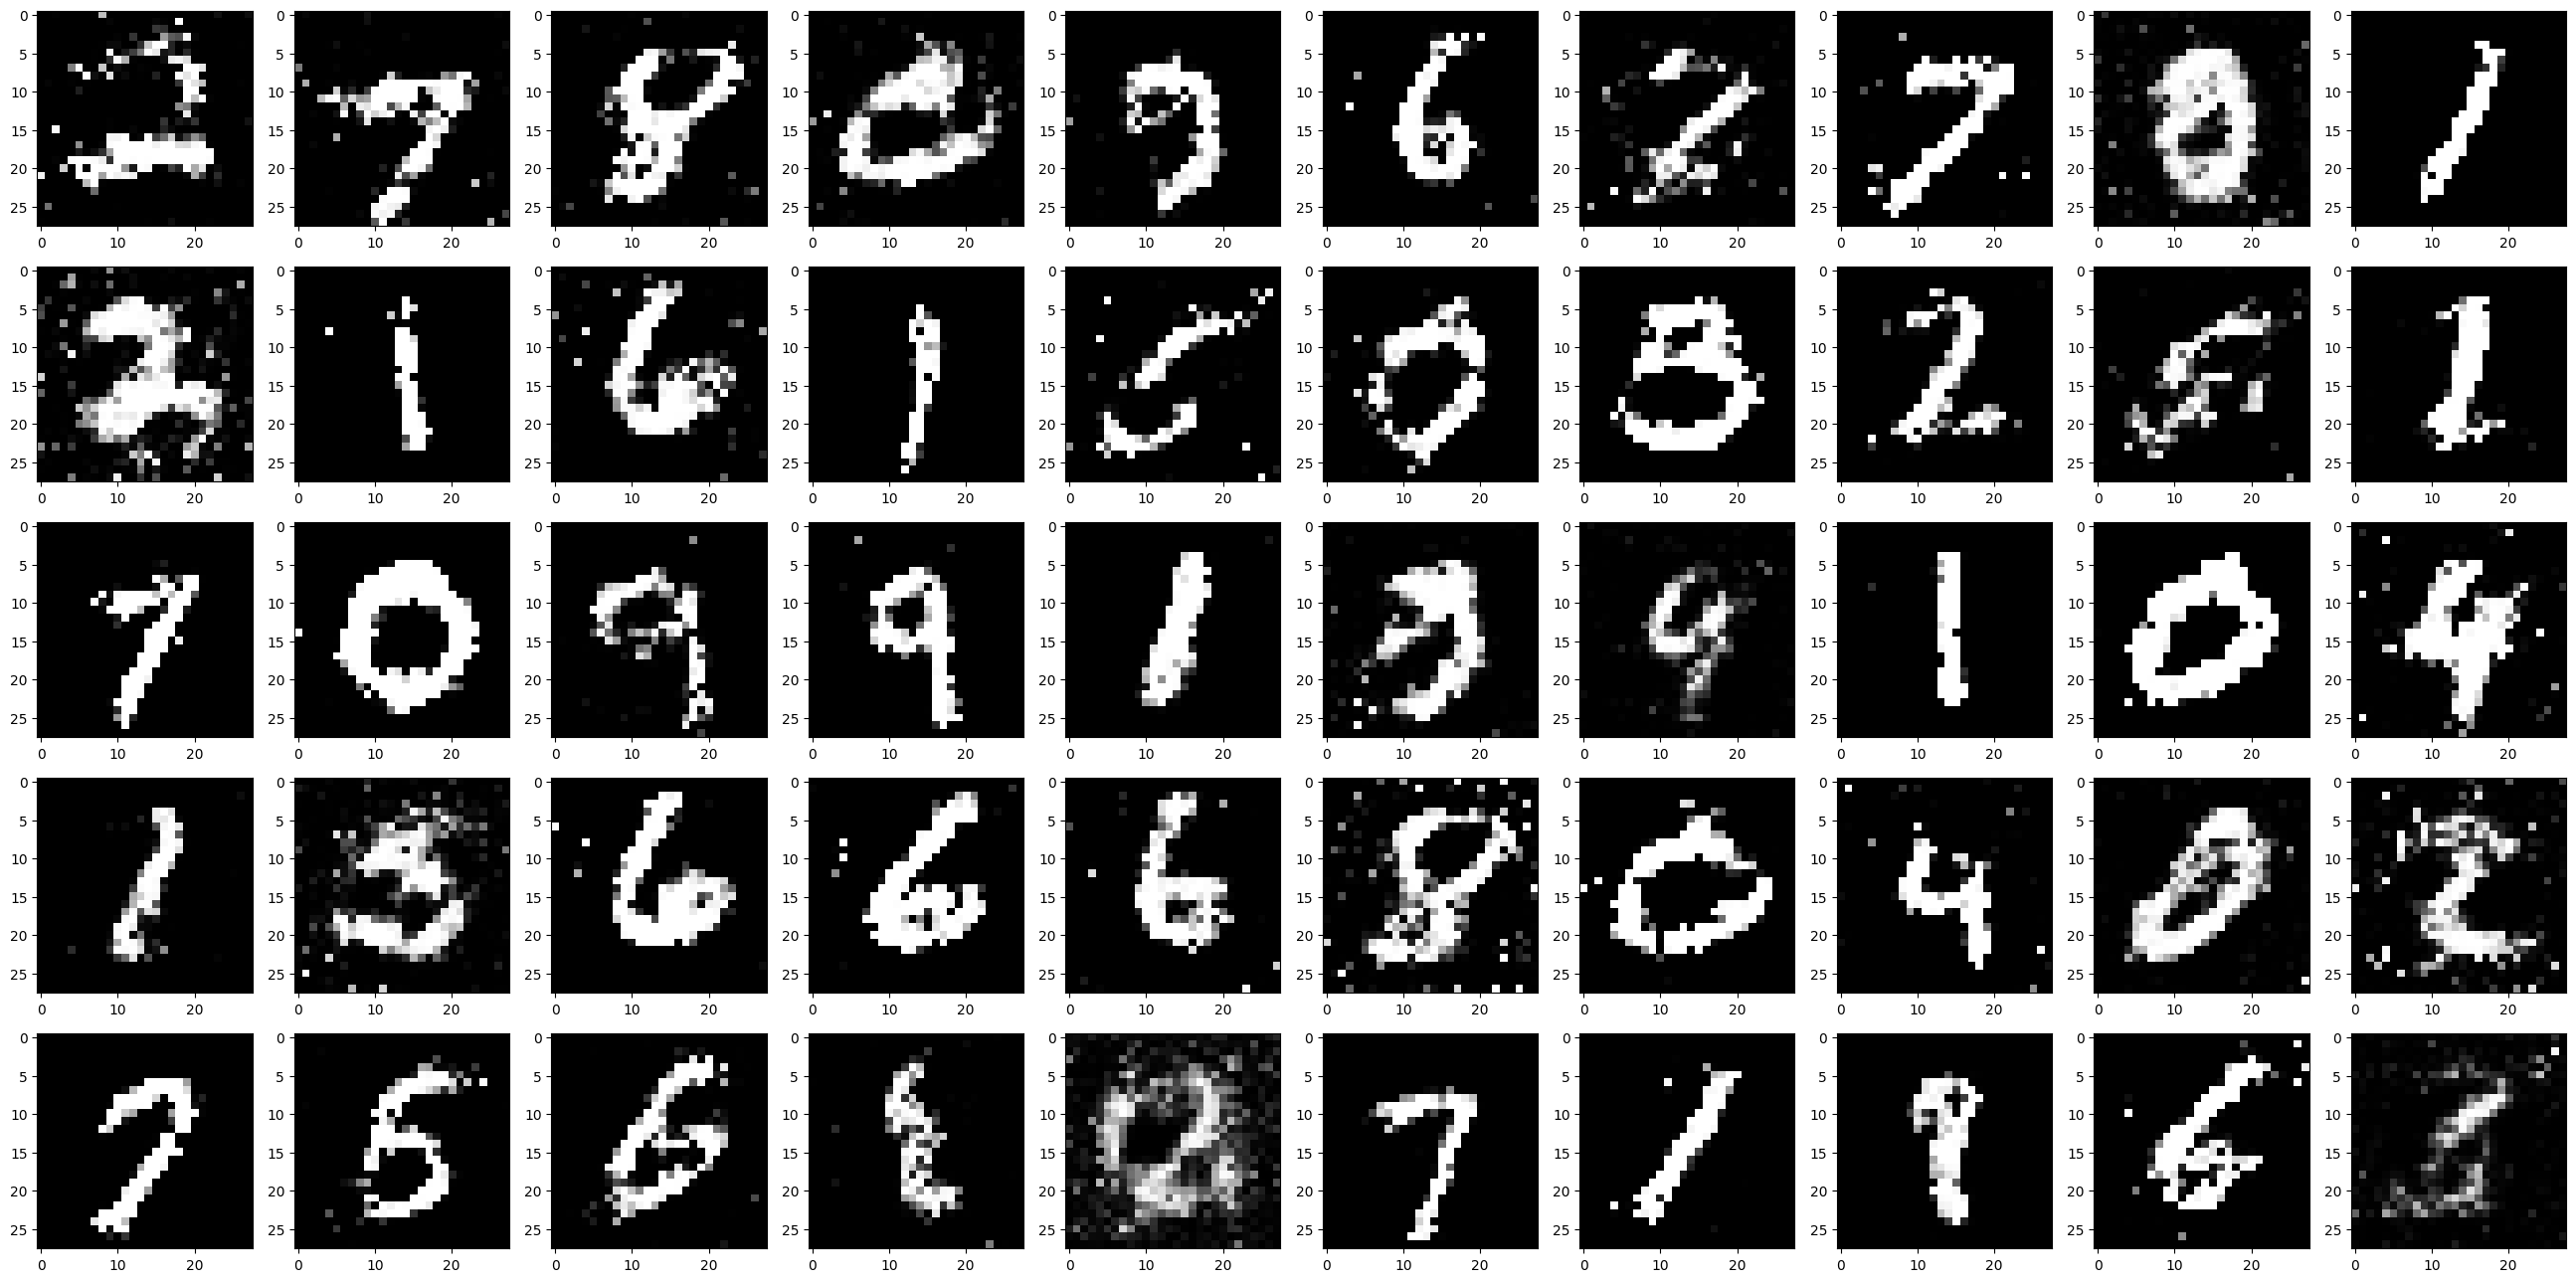

epoch[8/50], Generator Loss: 1.3272, Discriminator Loss: 1.1166


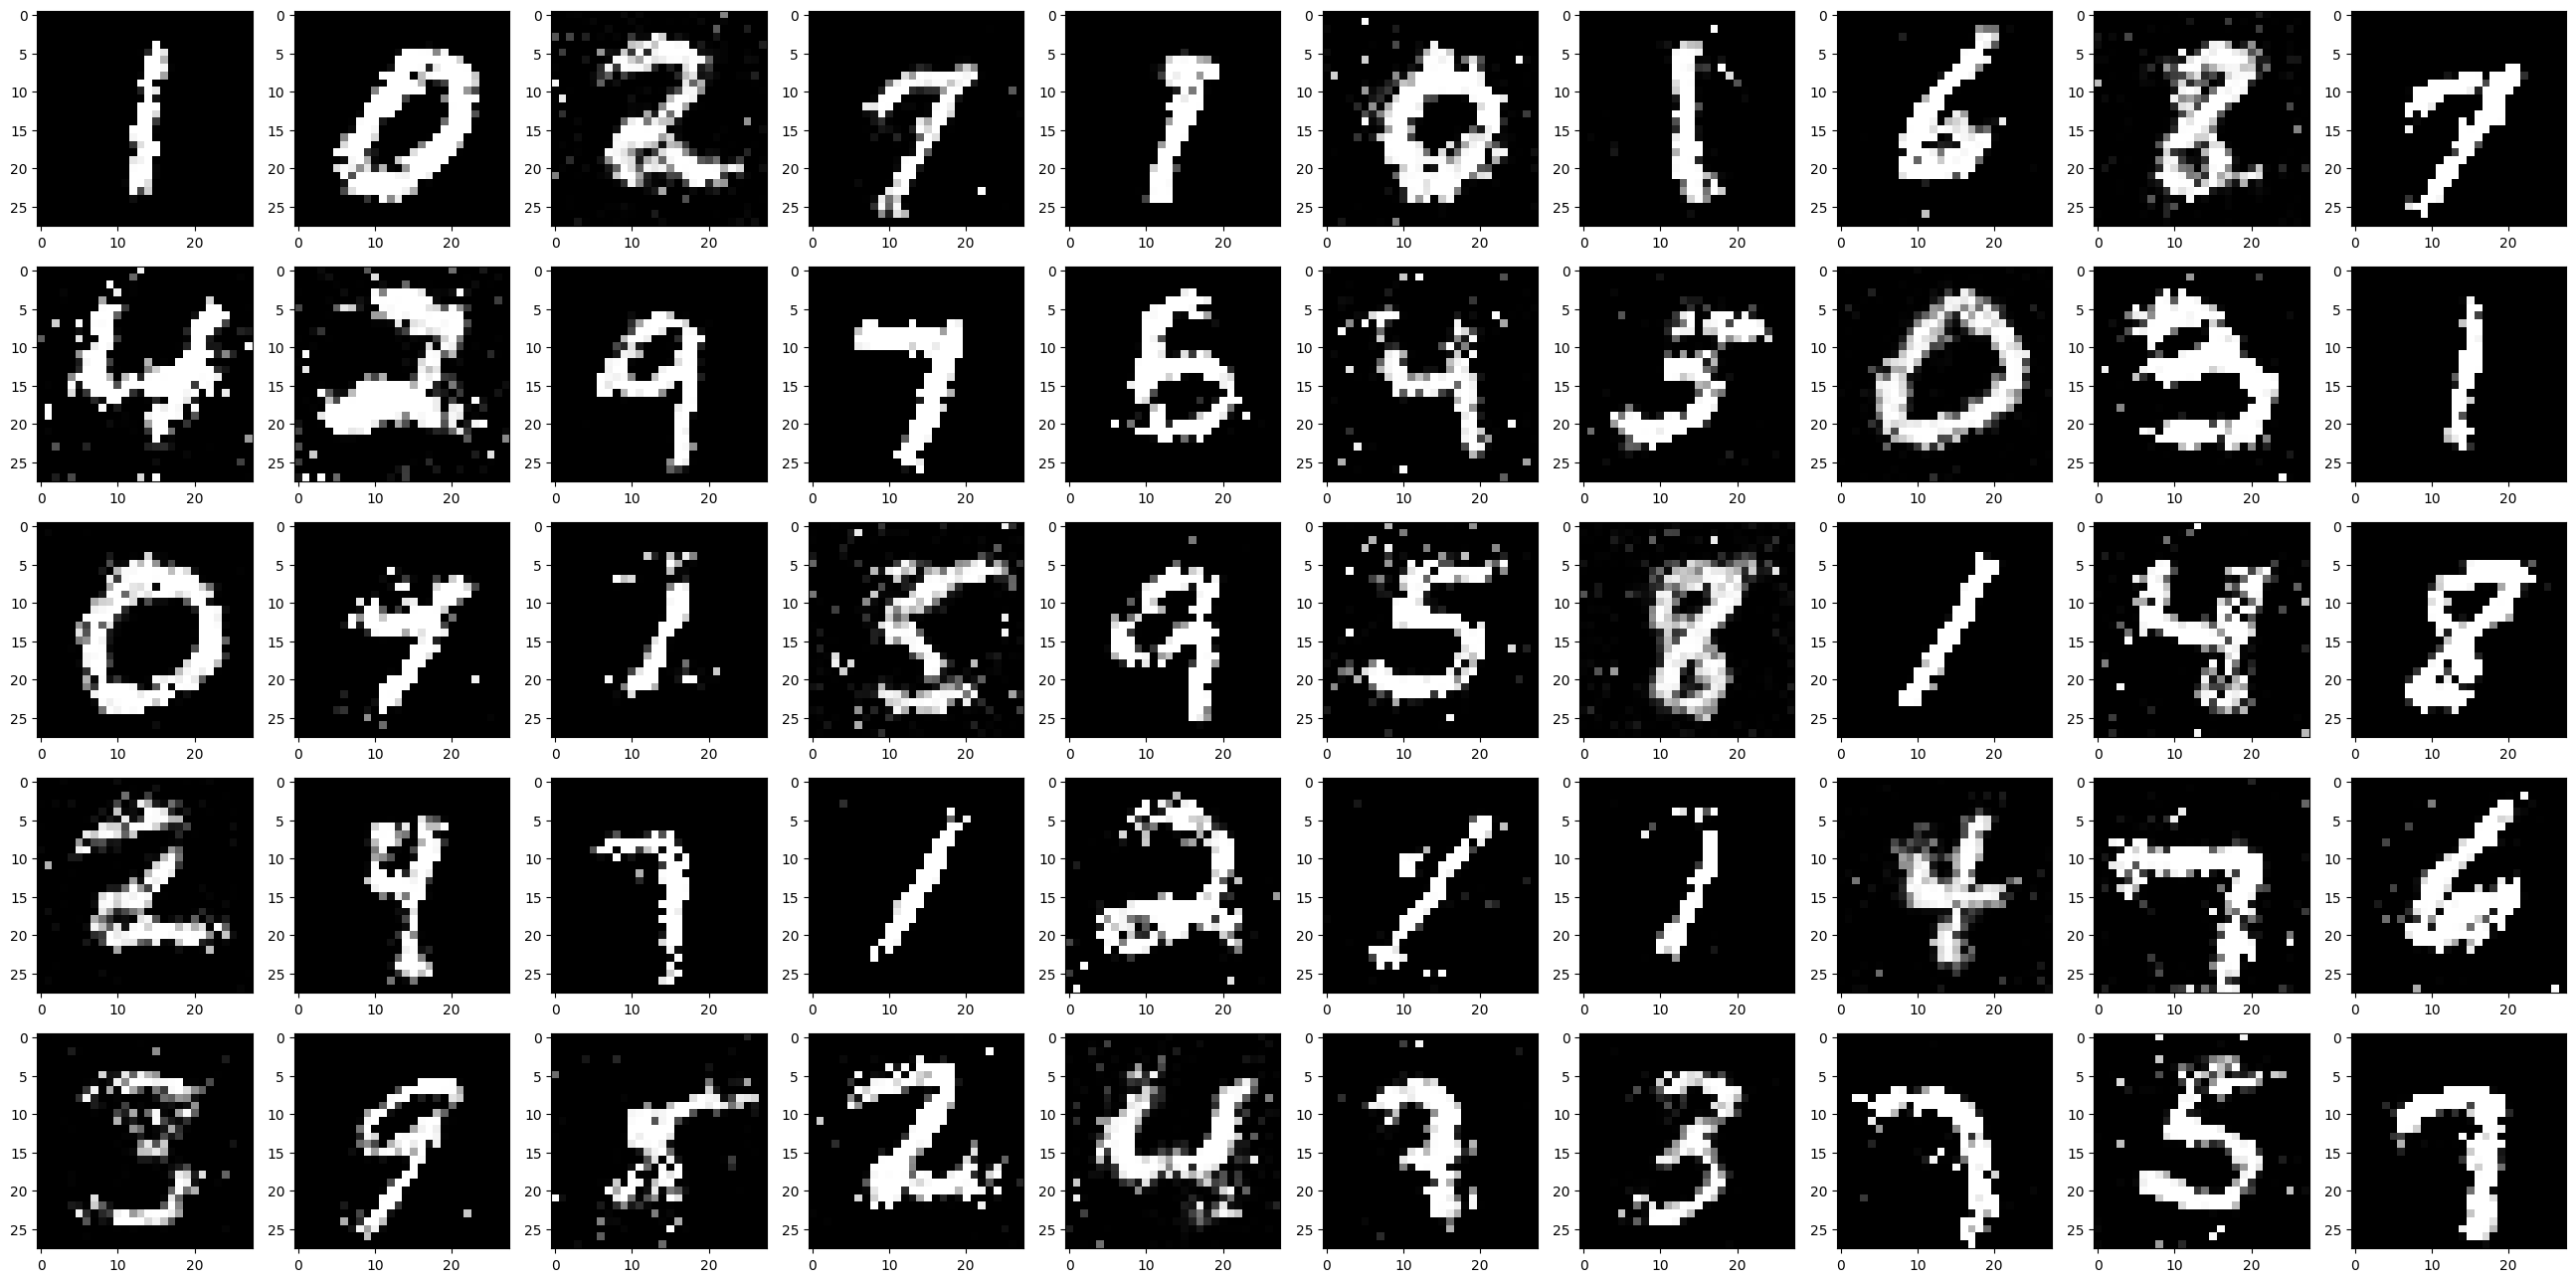

epoch[9/50], Generator Loss: 1.2738, Discriminator Loss: 1.1281


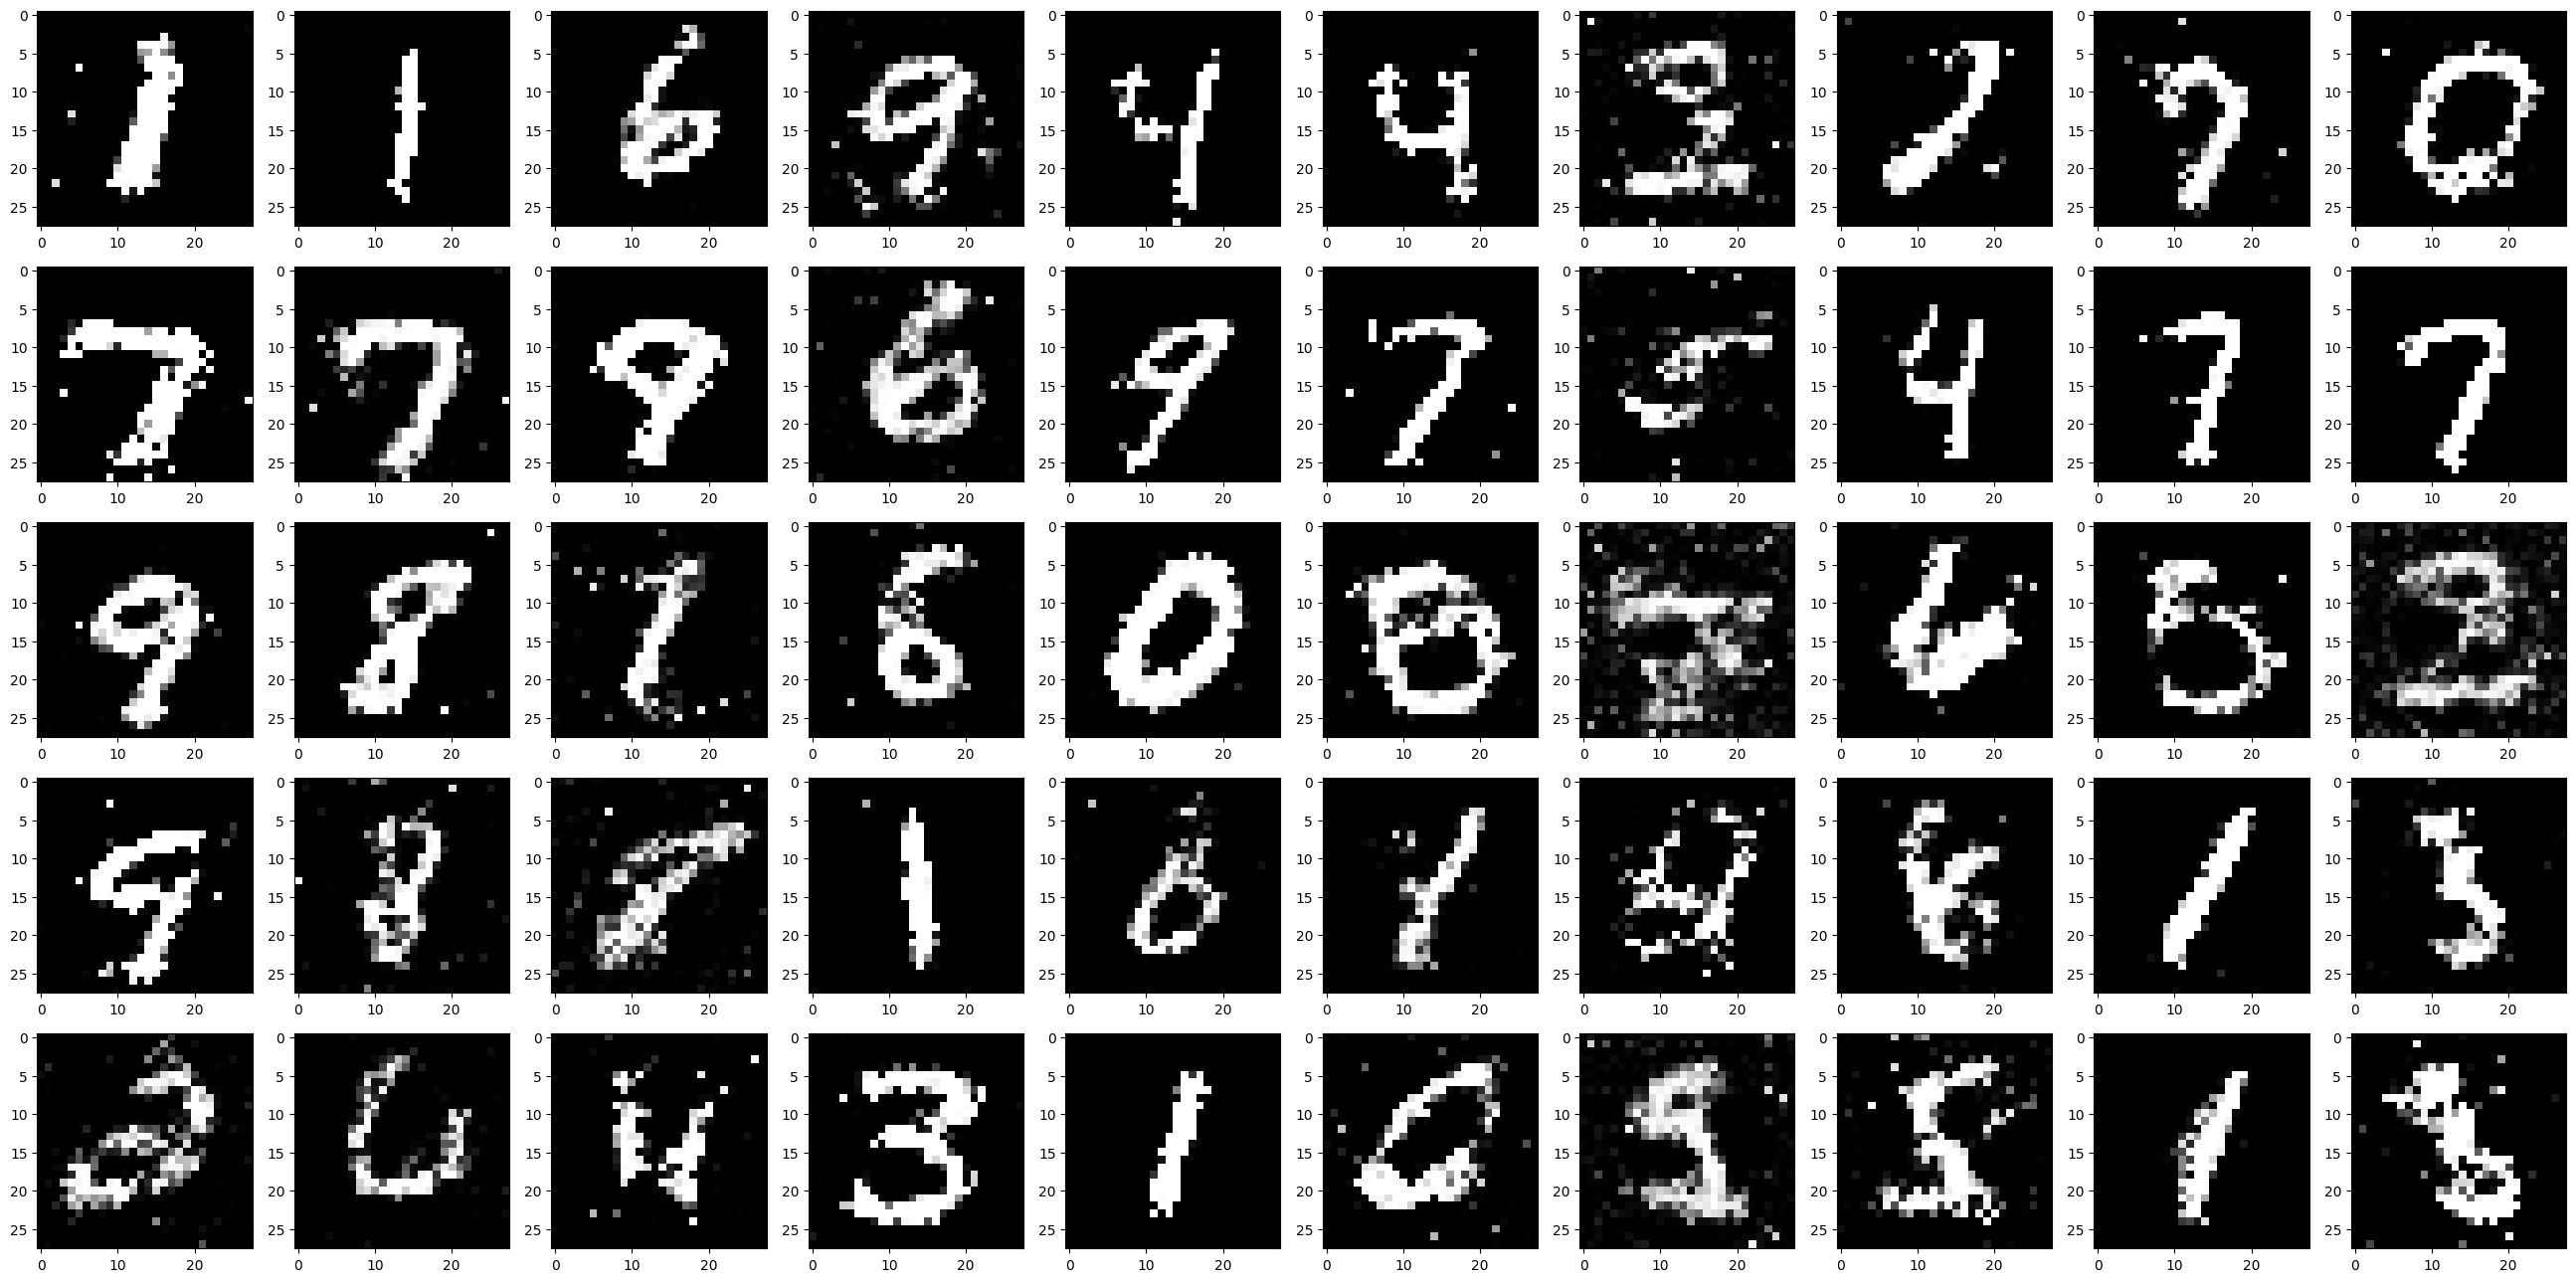

epoch[10/50], Generator Loss: 1.2824, Discriminator Loss: 1.1404


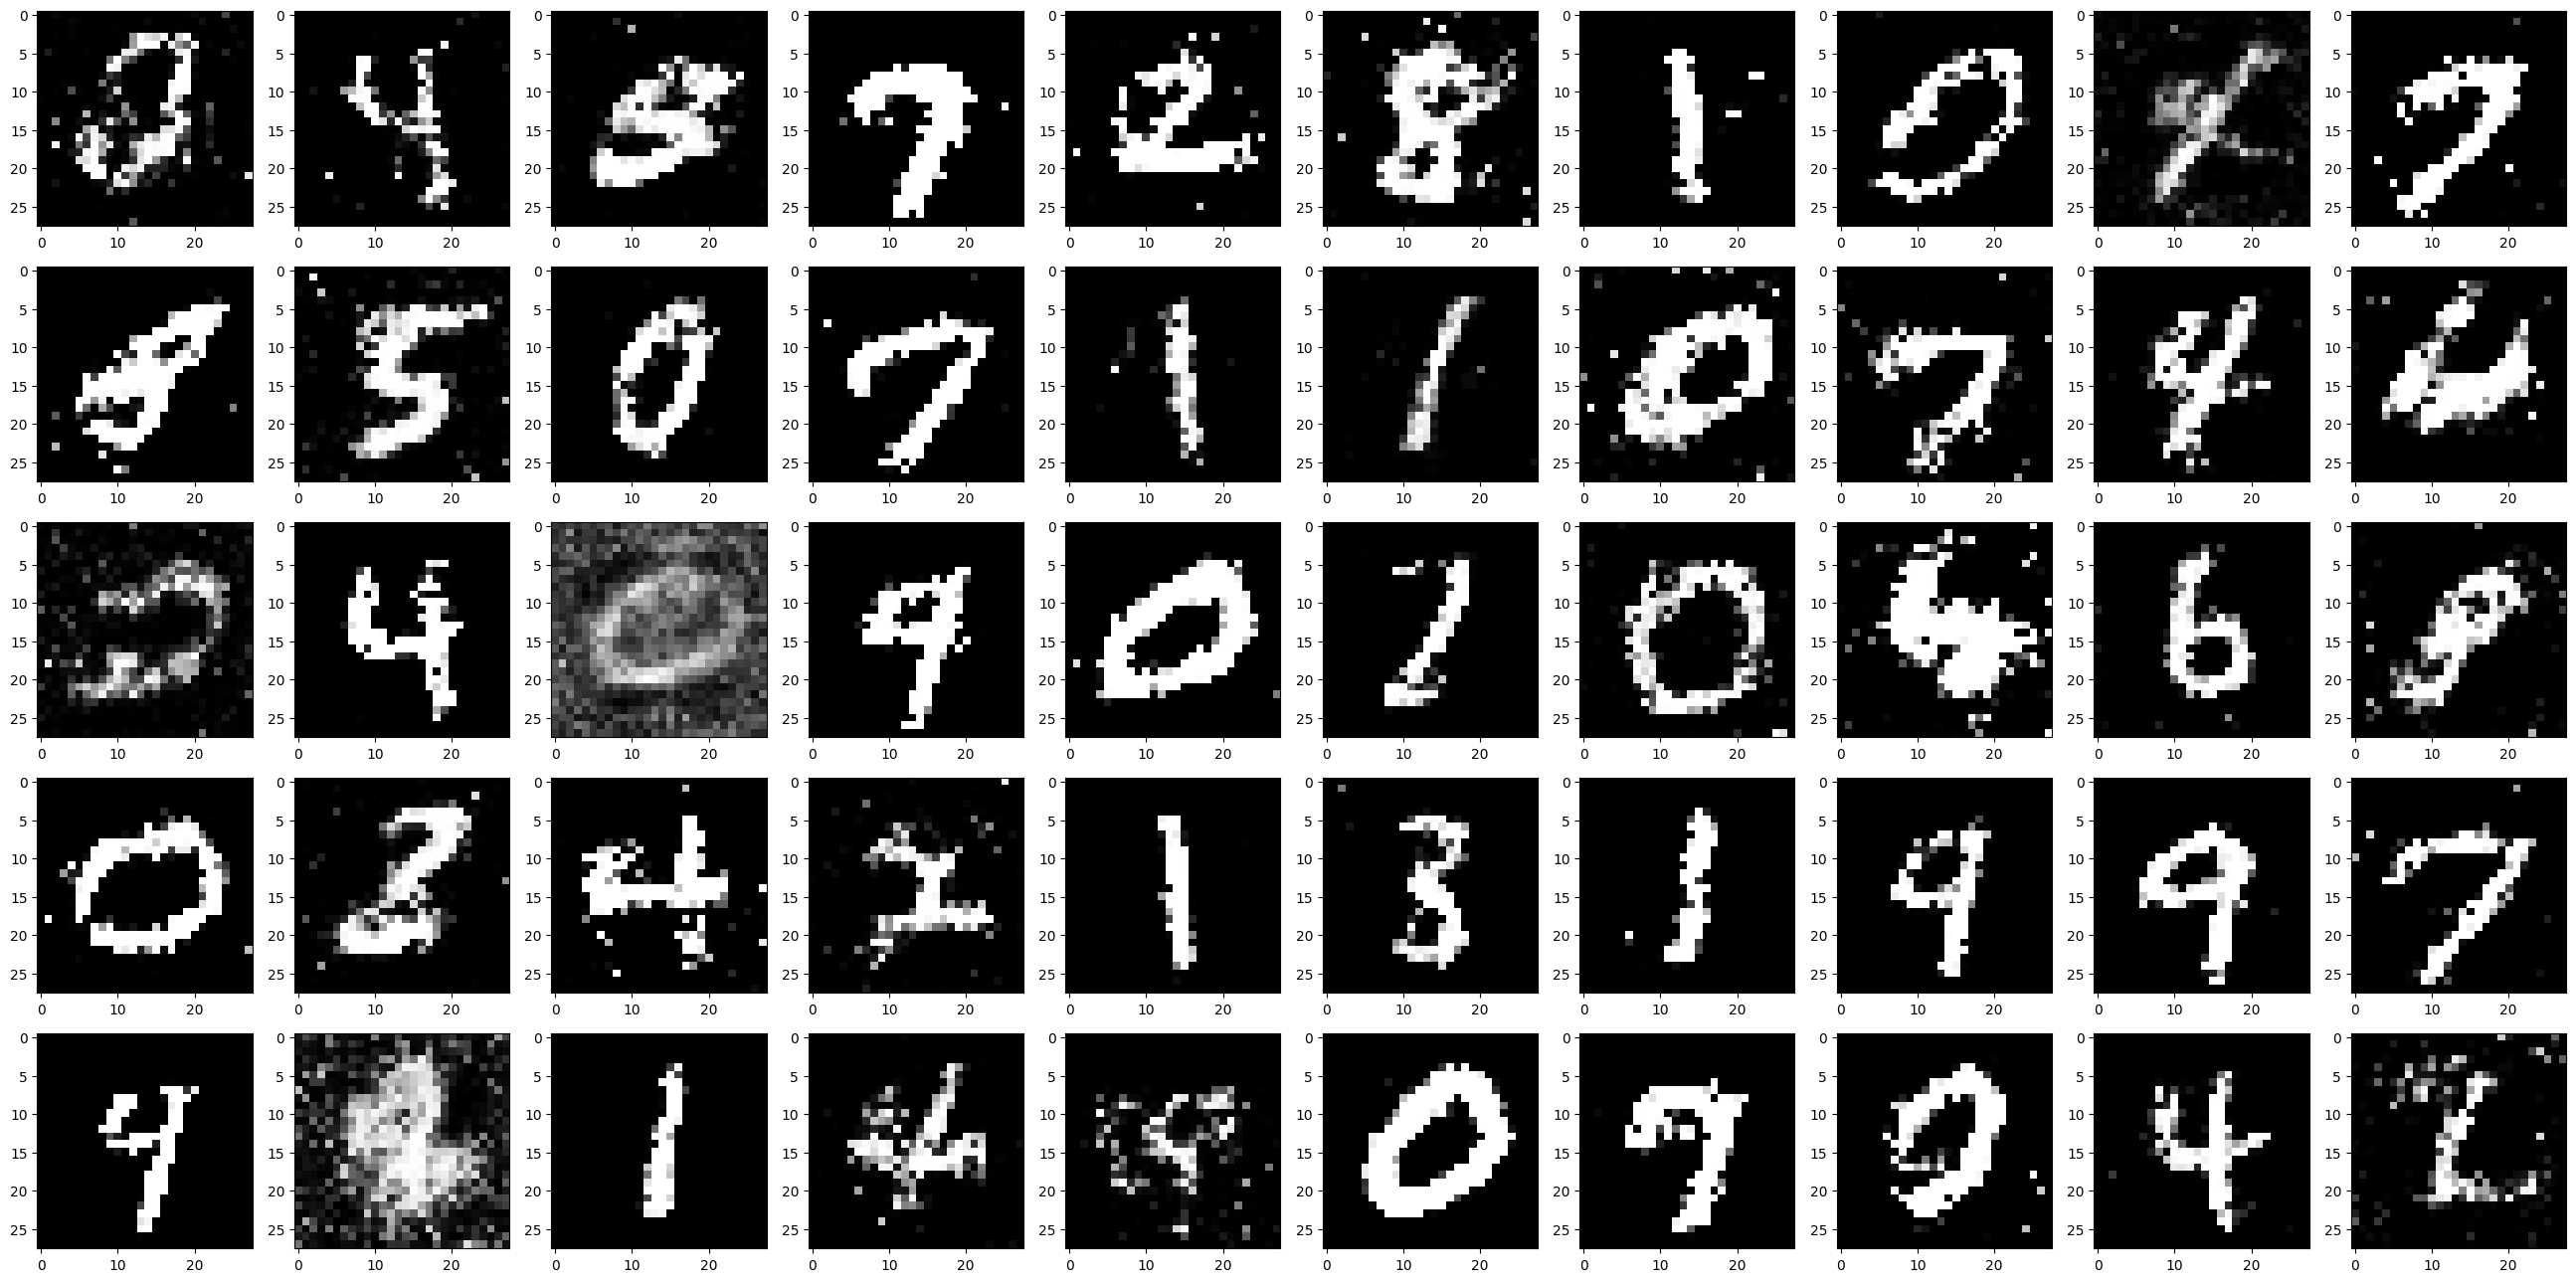

epoch[11/50], Generator Loss: 1.2076, Discriminator Loss: 1.2336


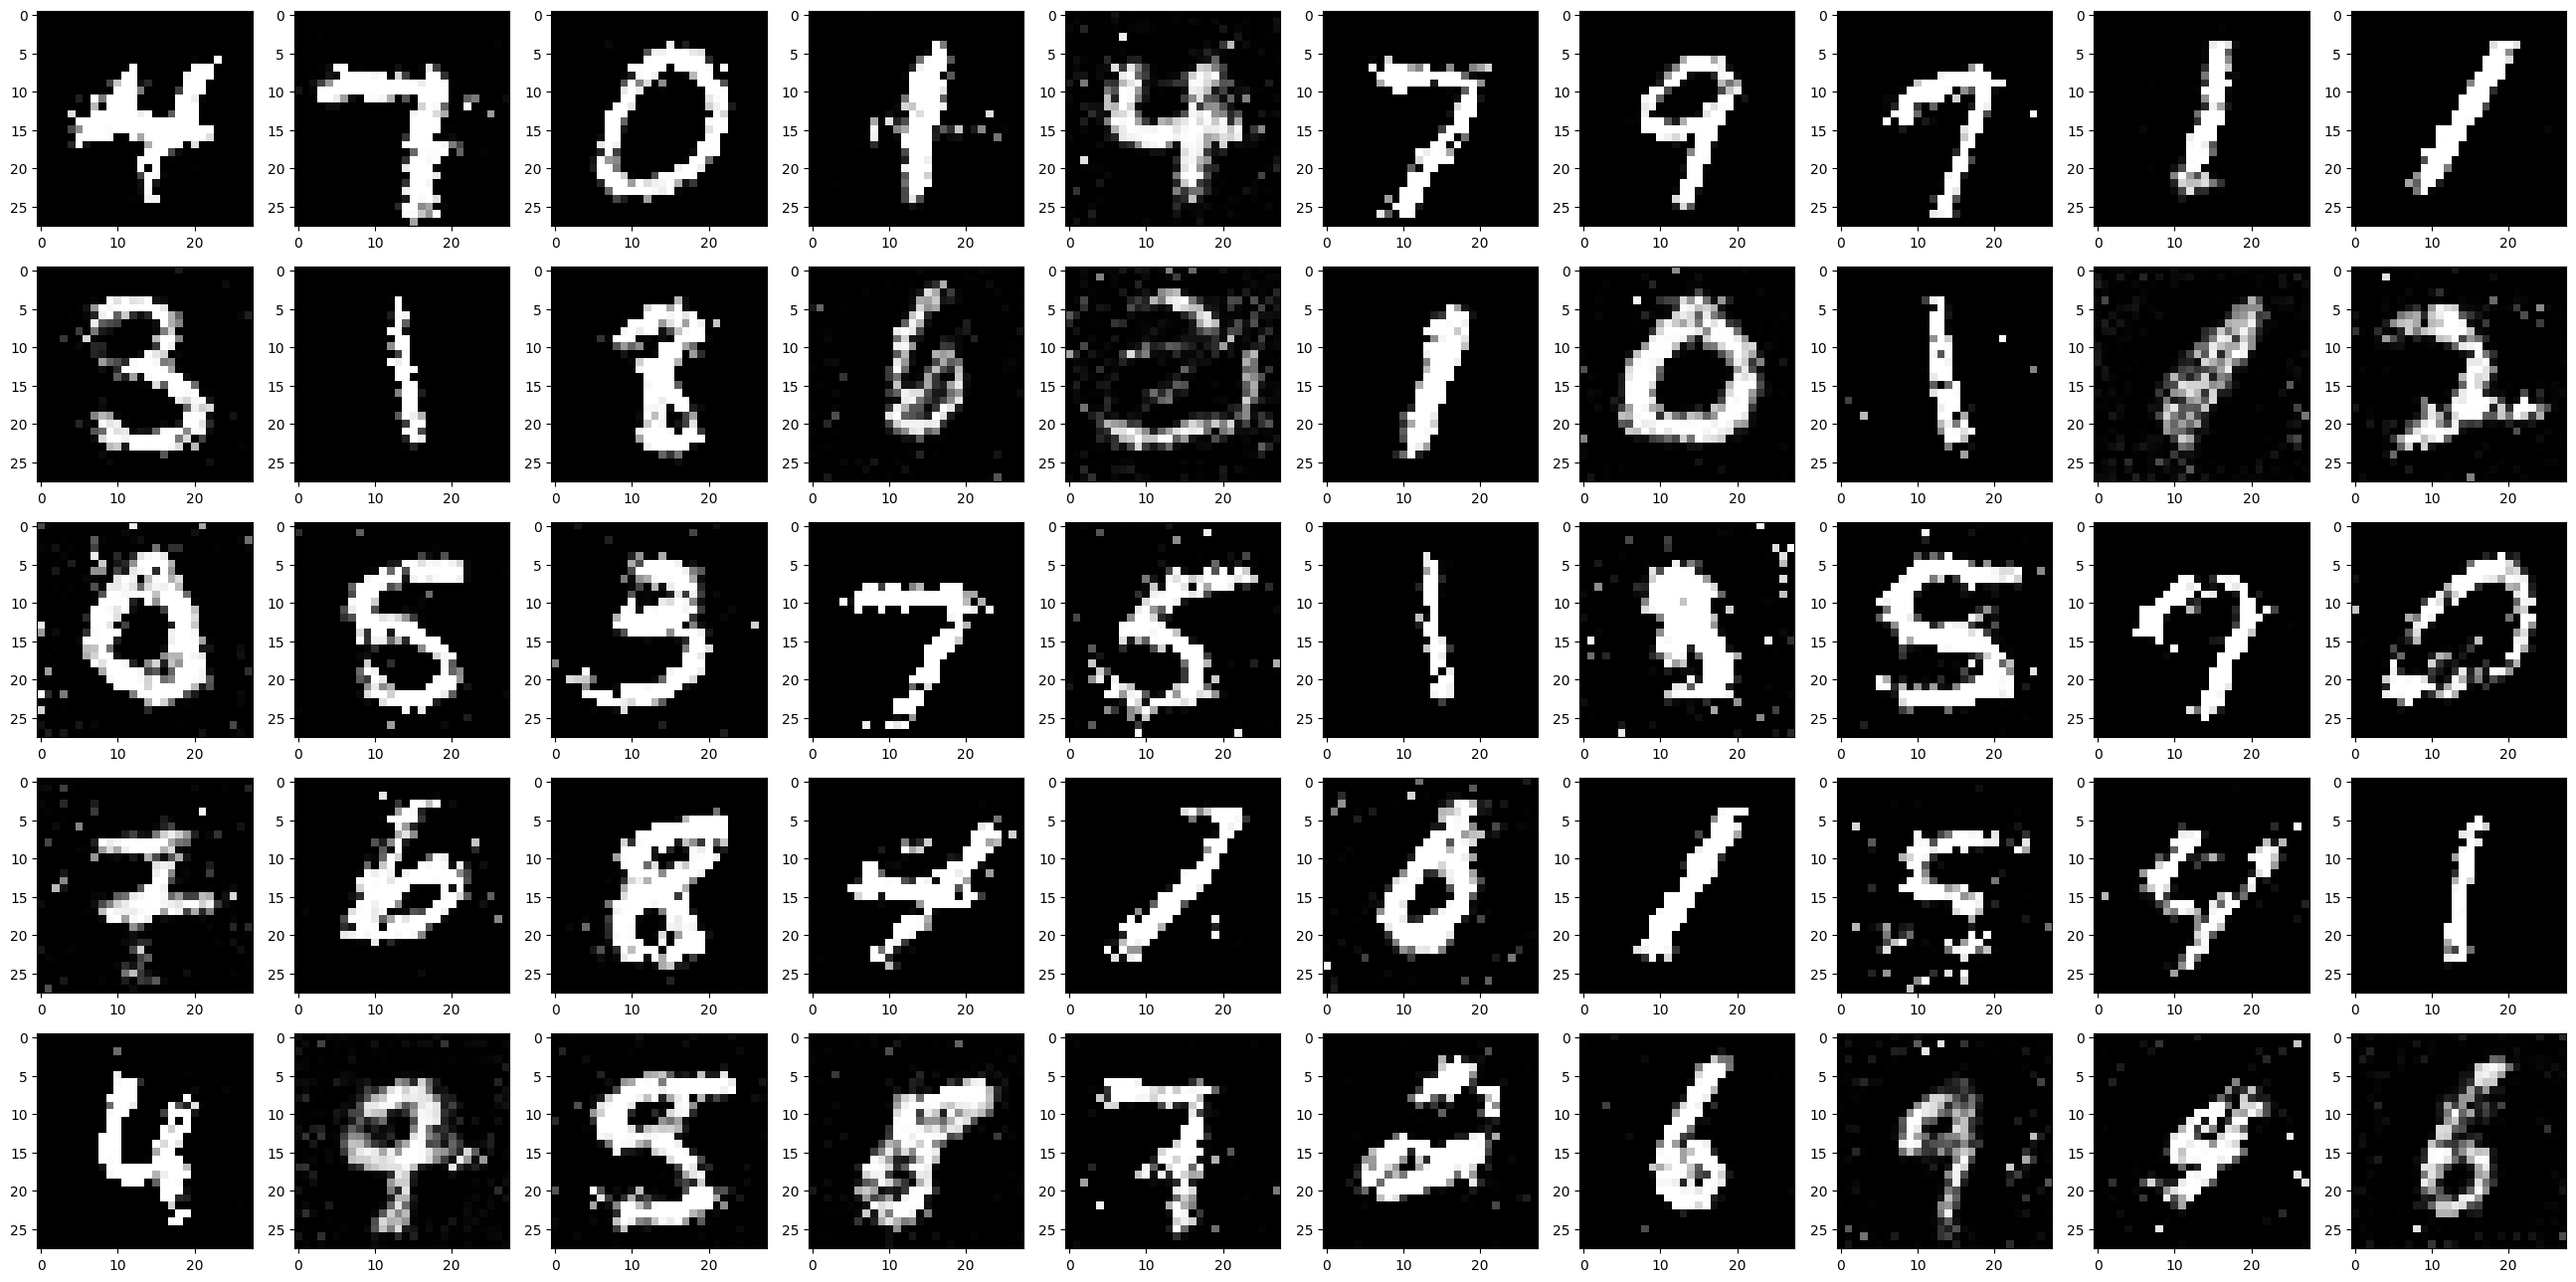

epoch[12/50], Generator Loss: 1.0887, Discriminator Loss: 1.3933


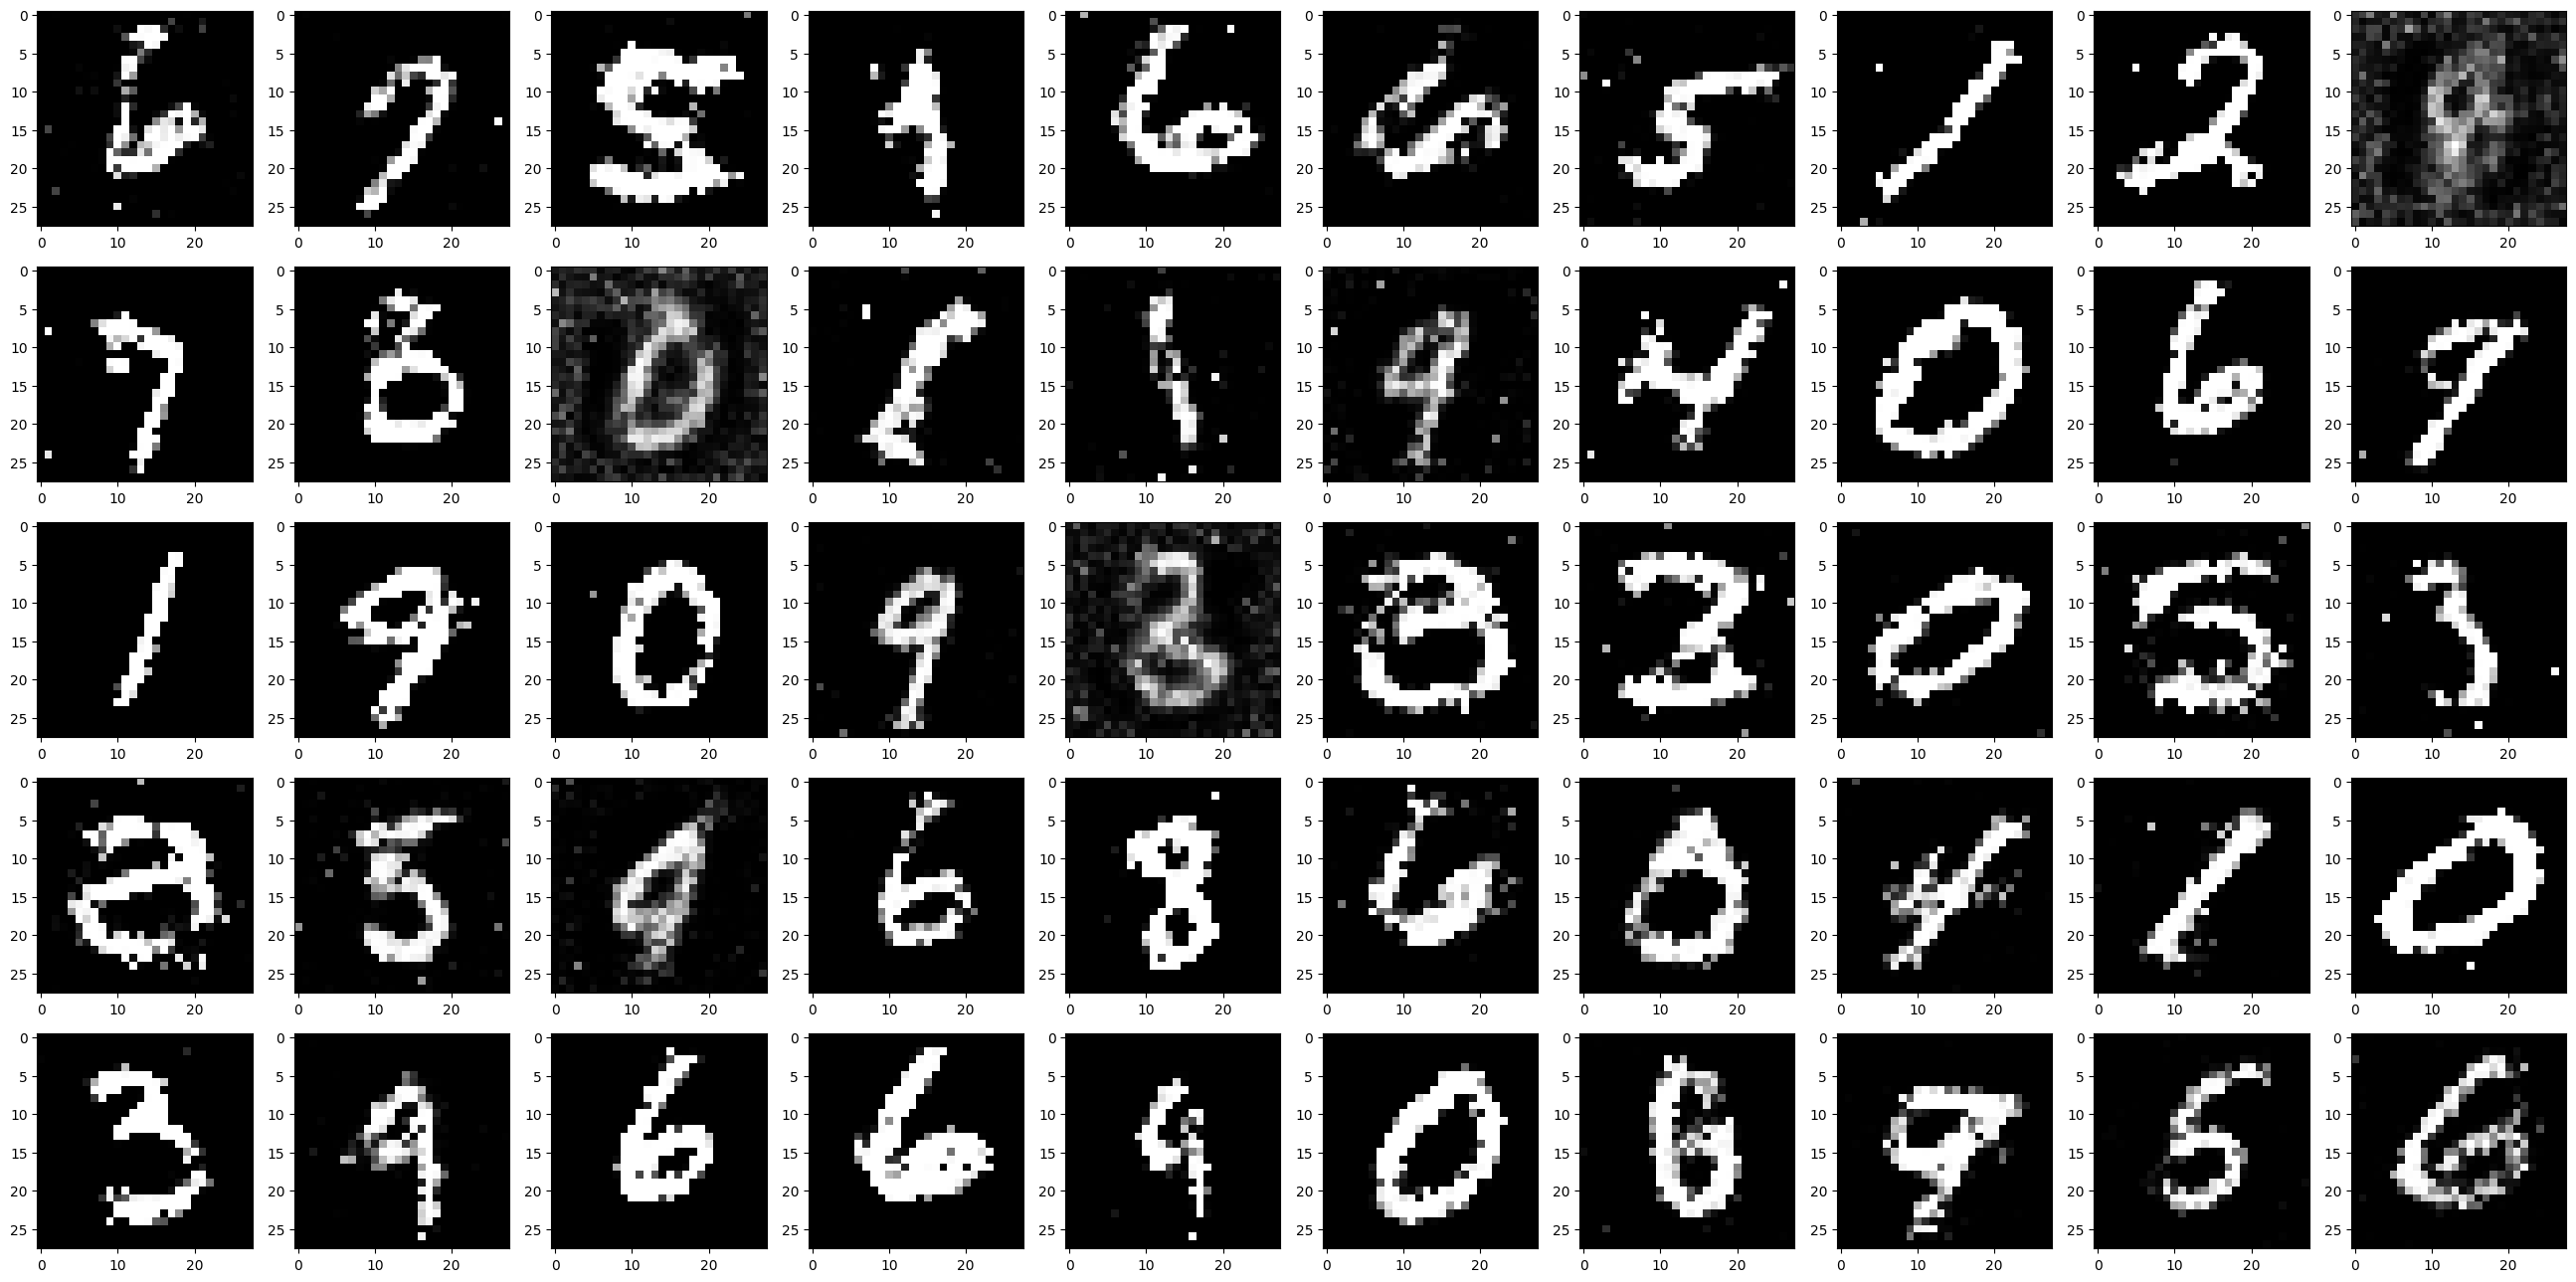

epoch[13/50], Generator Loss: 1.1589, Discriminator Loss: 0.8568


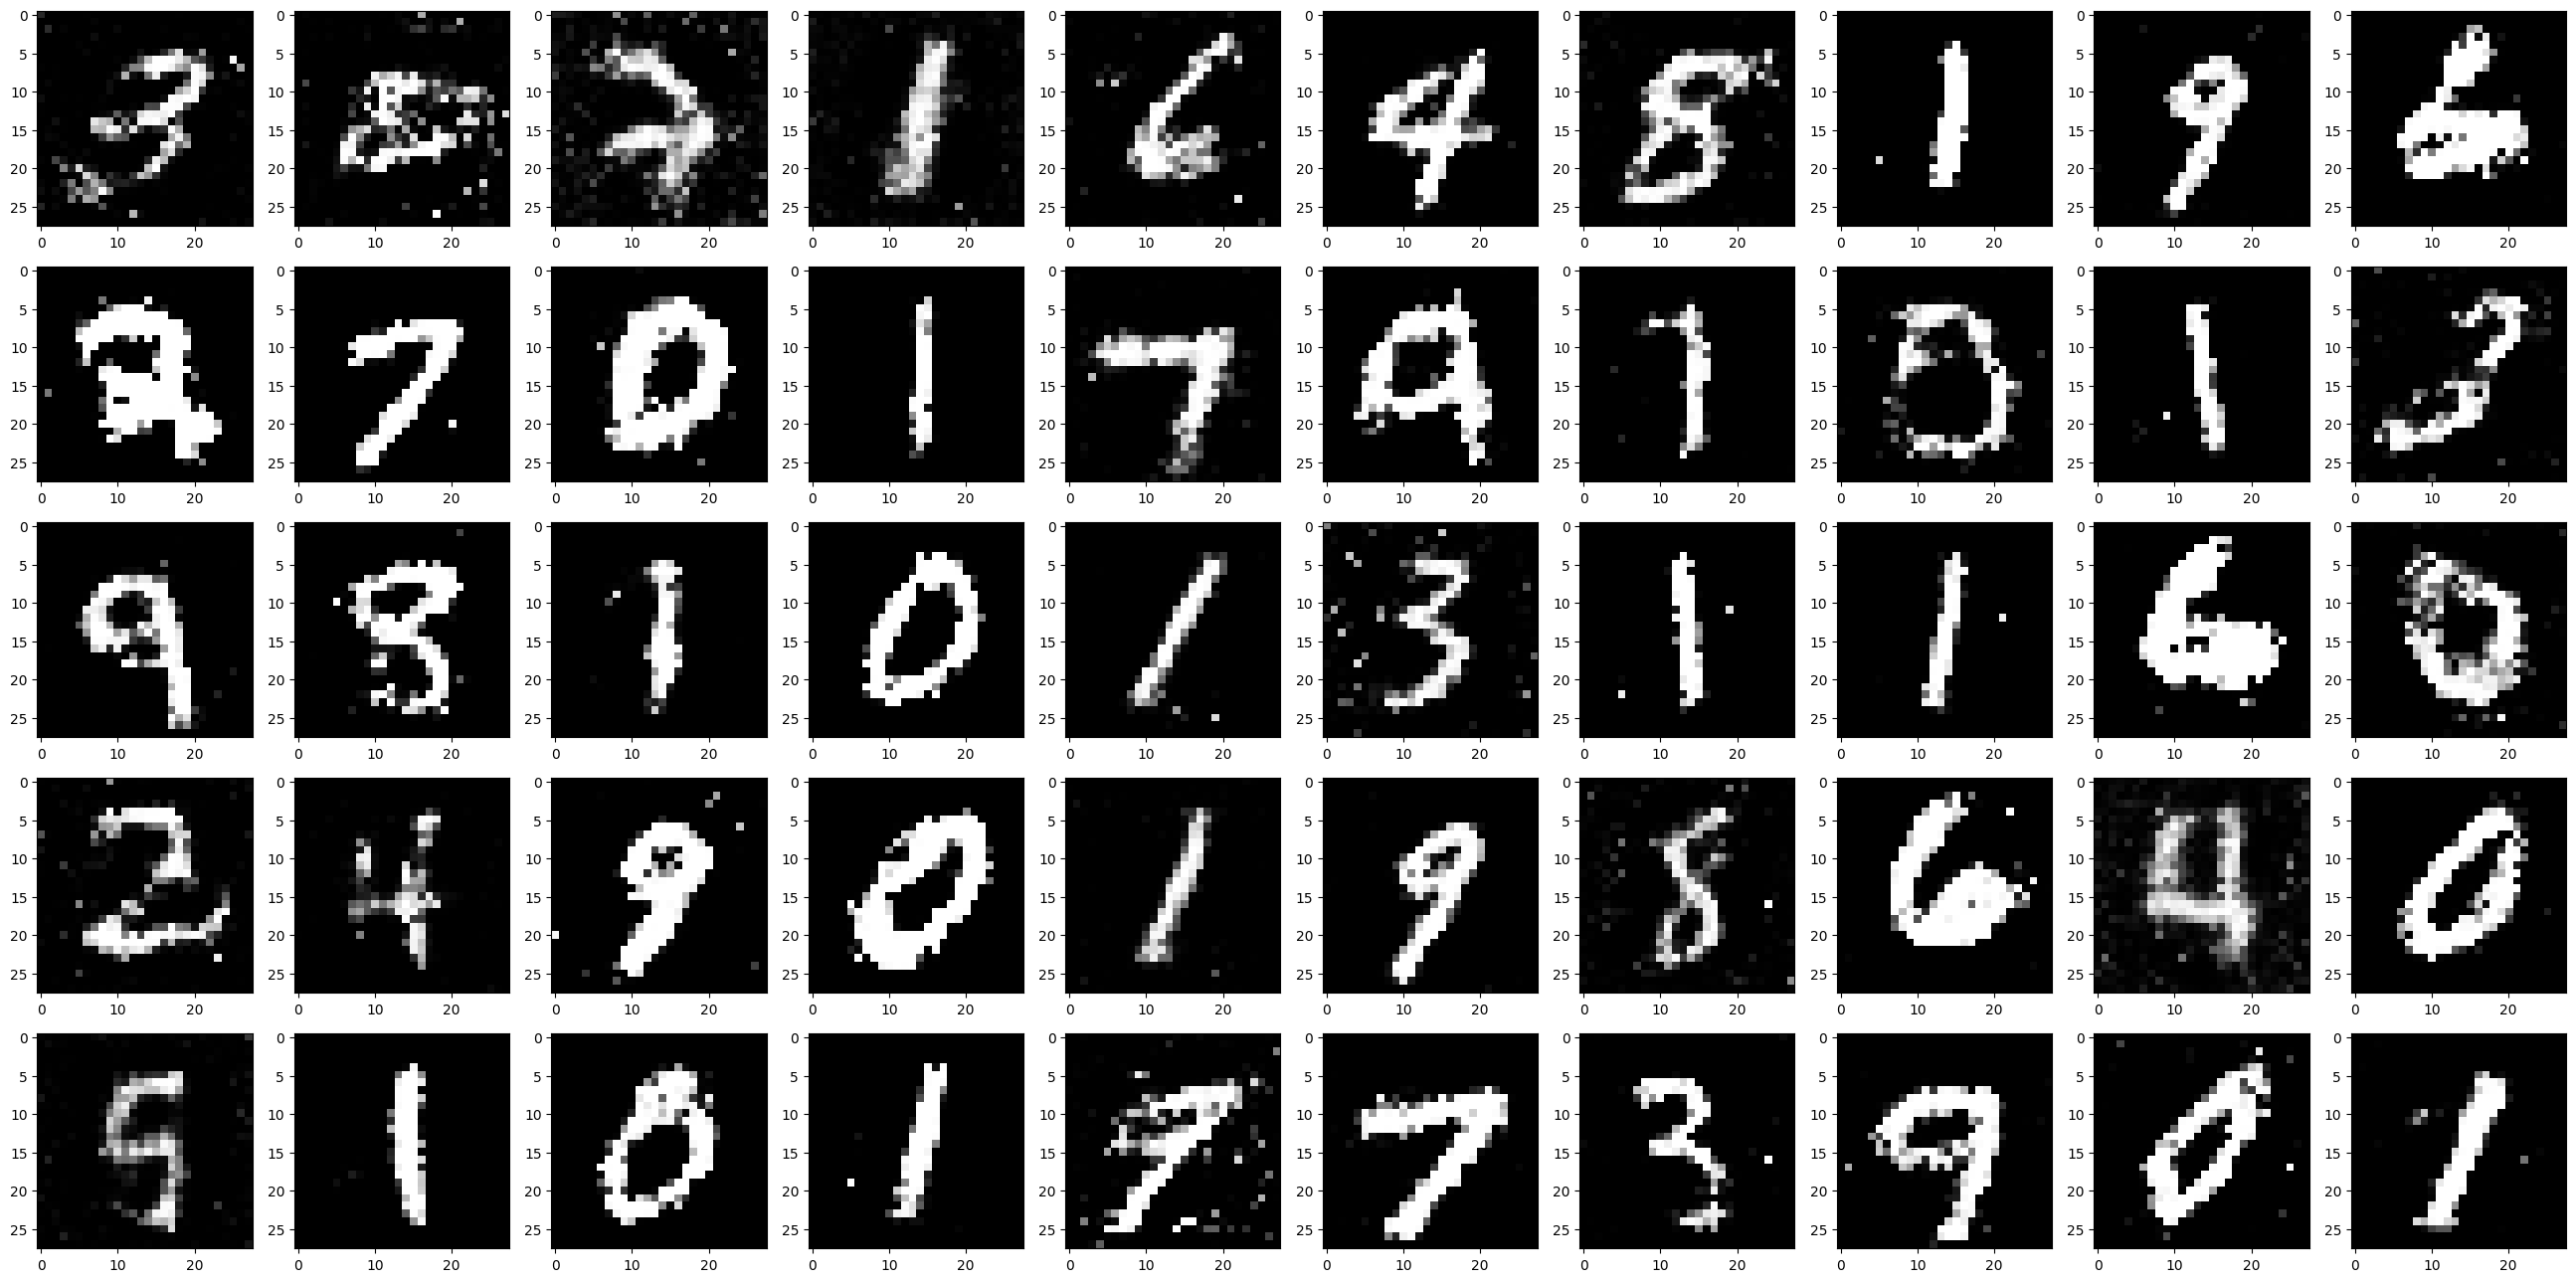

epoch[14/50], Generator Loss: 1.4122, Discriminator Loss: 0.8978


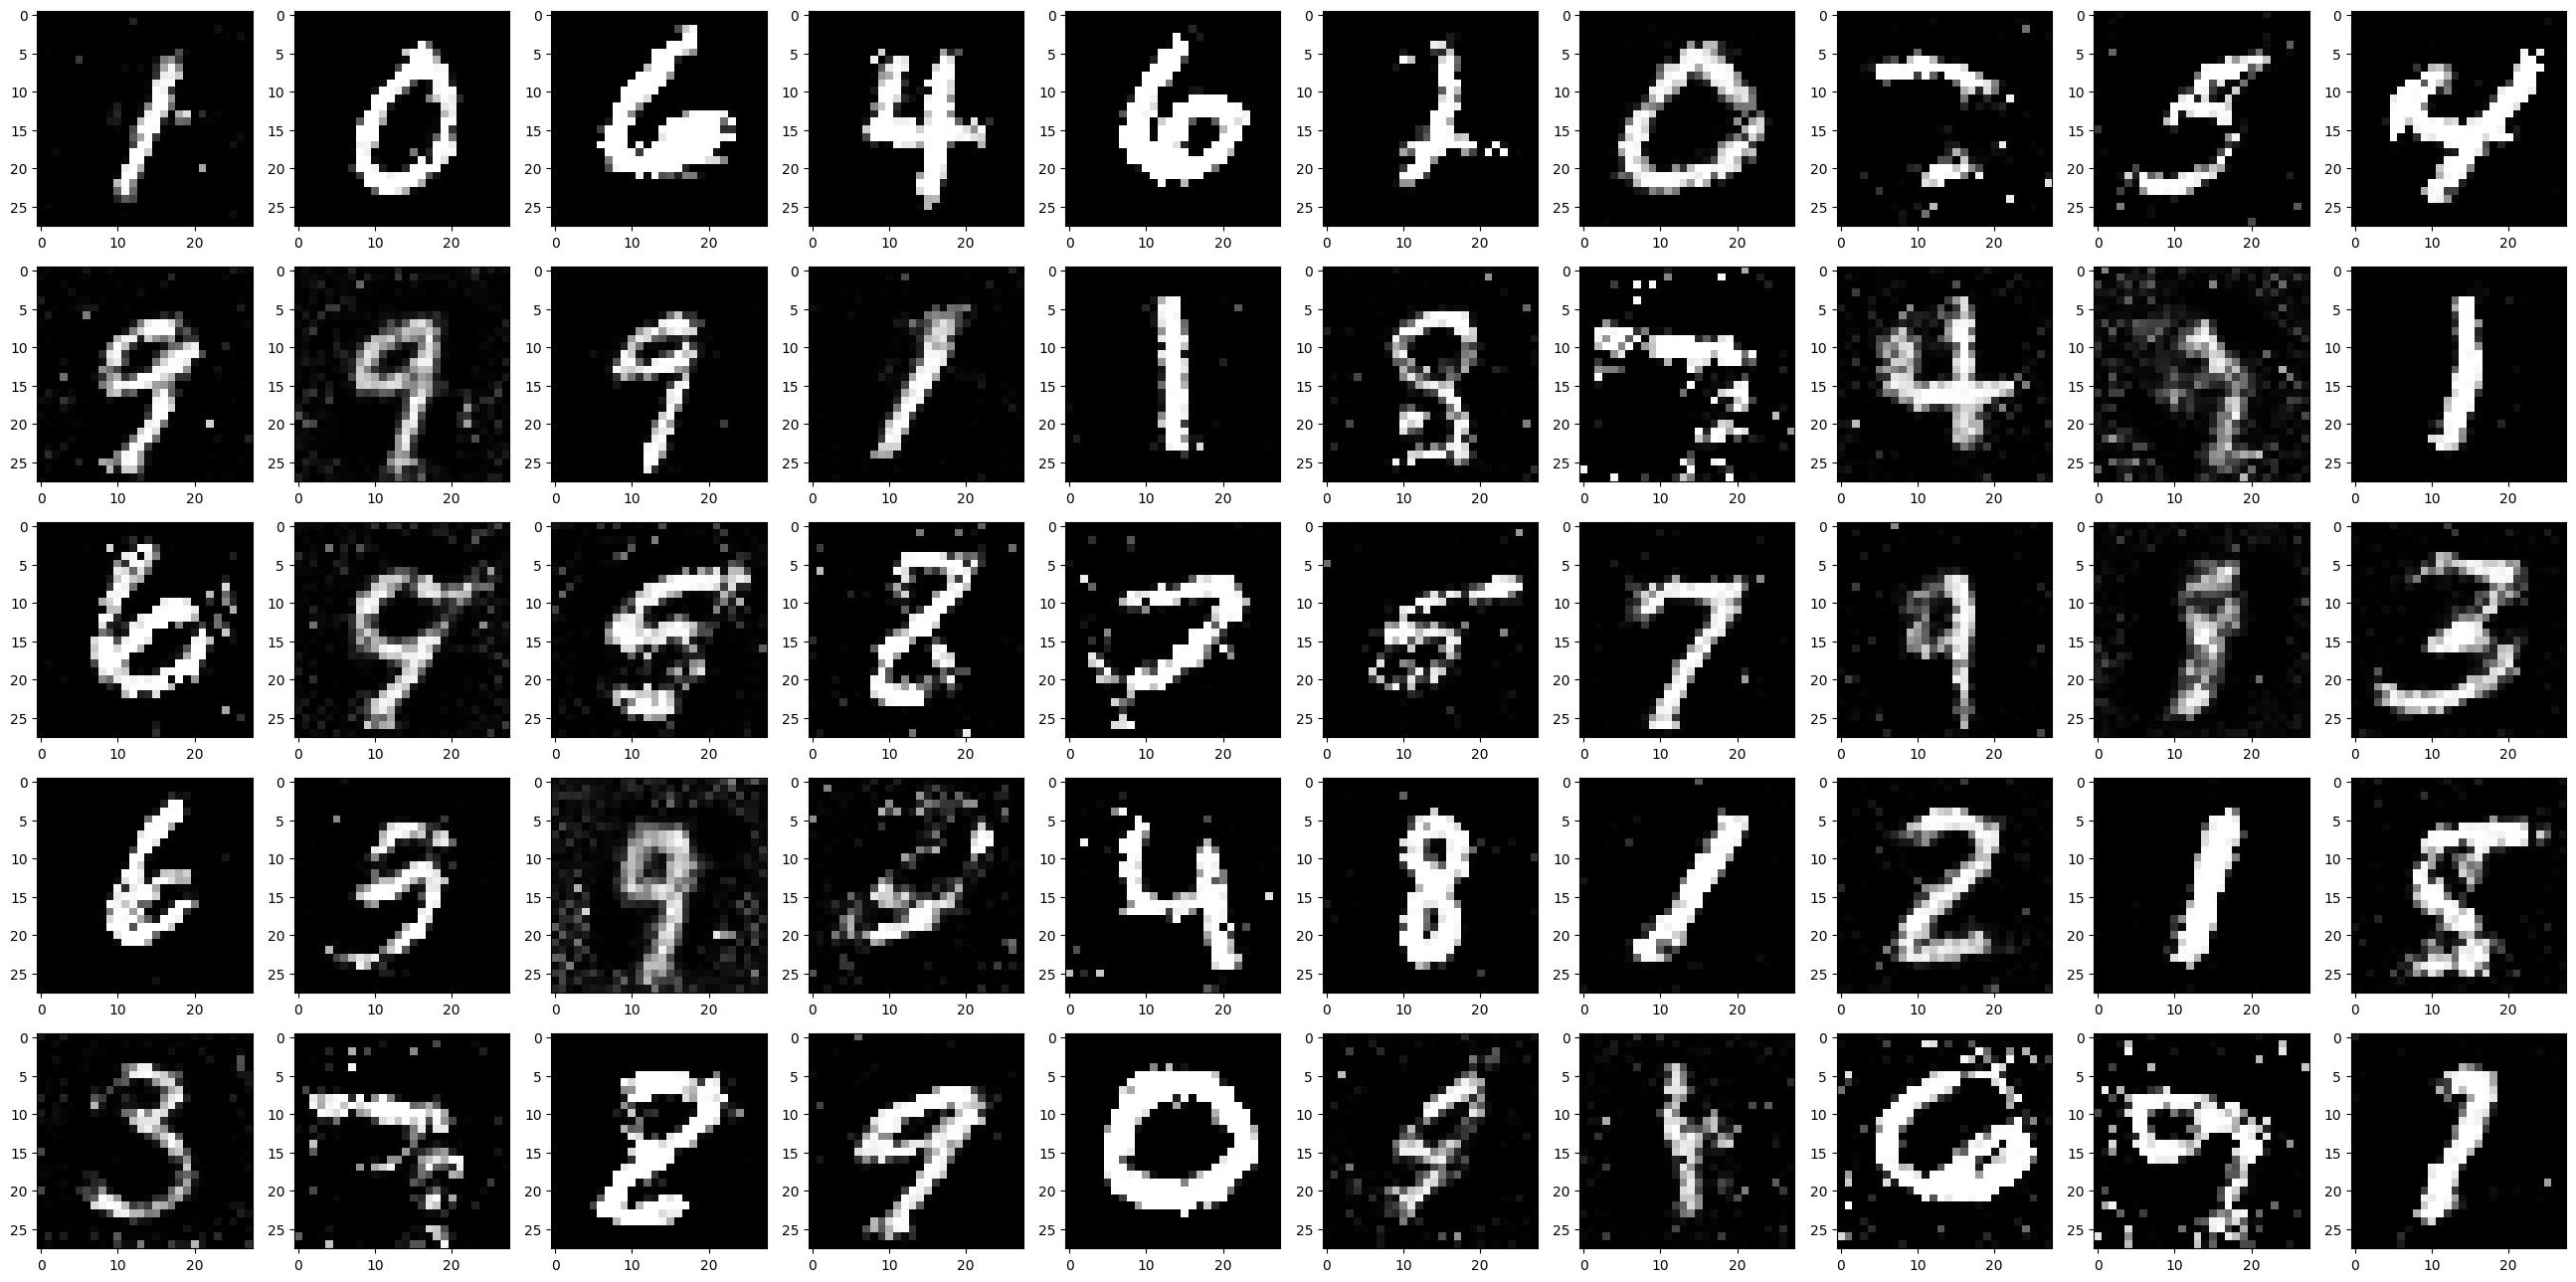

epoch[15/50], Generator Loss: 1.1353, Discriminator Loss: 1.1243


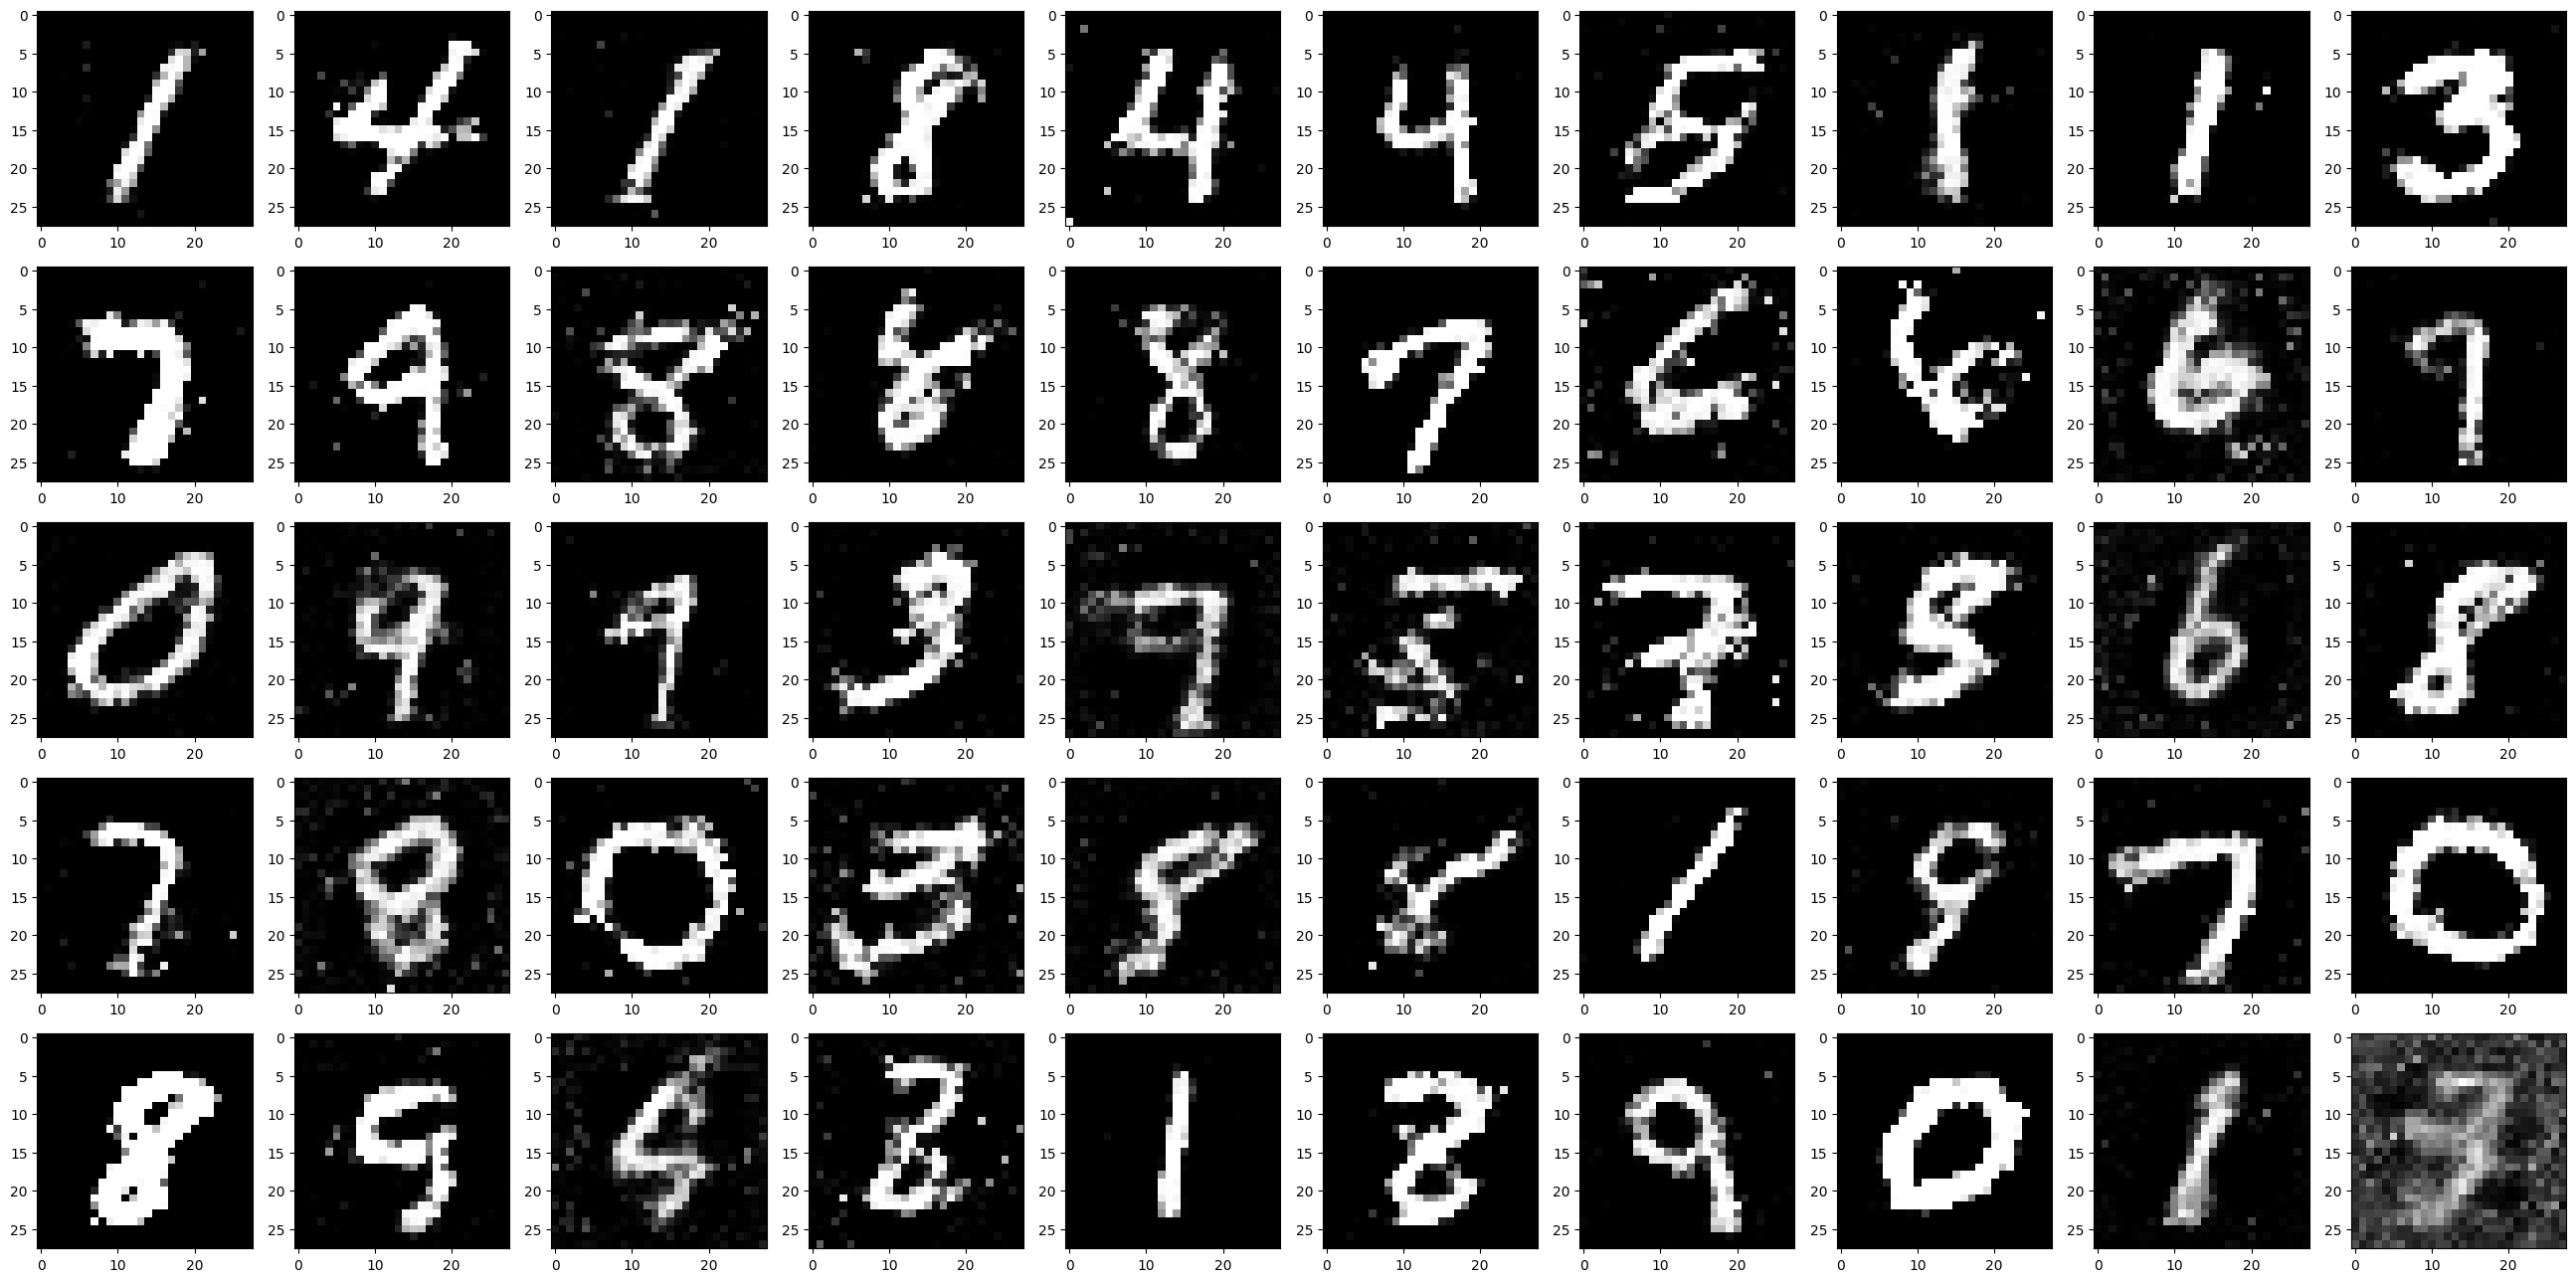

epoch[16/50], Generator Loss: 1.2144, Discriminator Loss: 0.8972


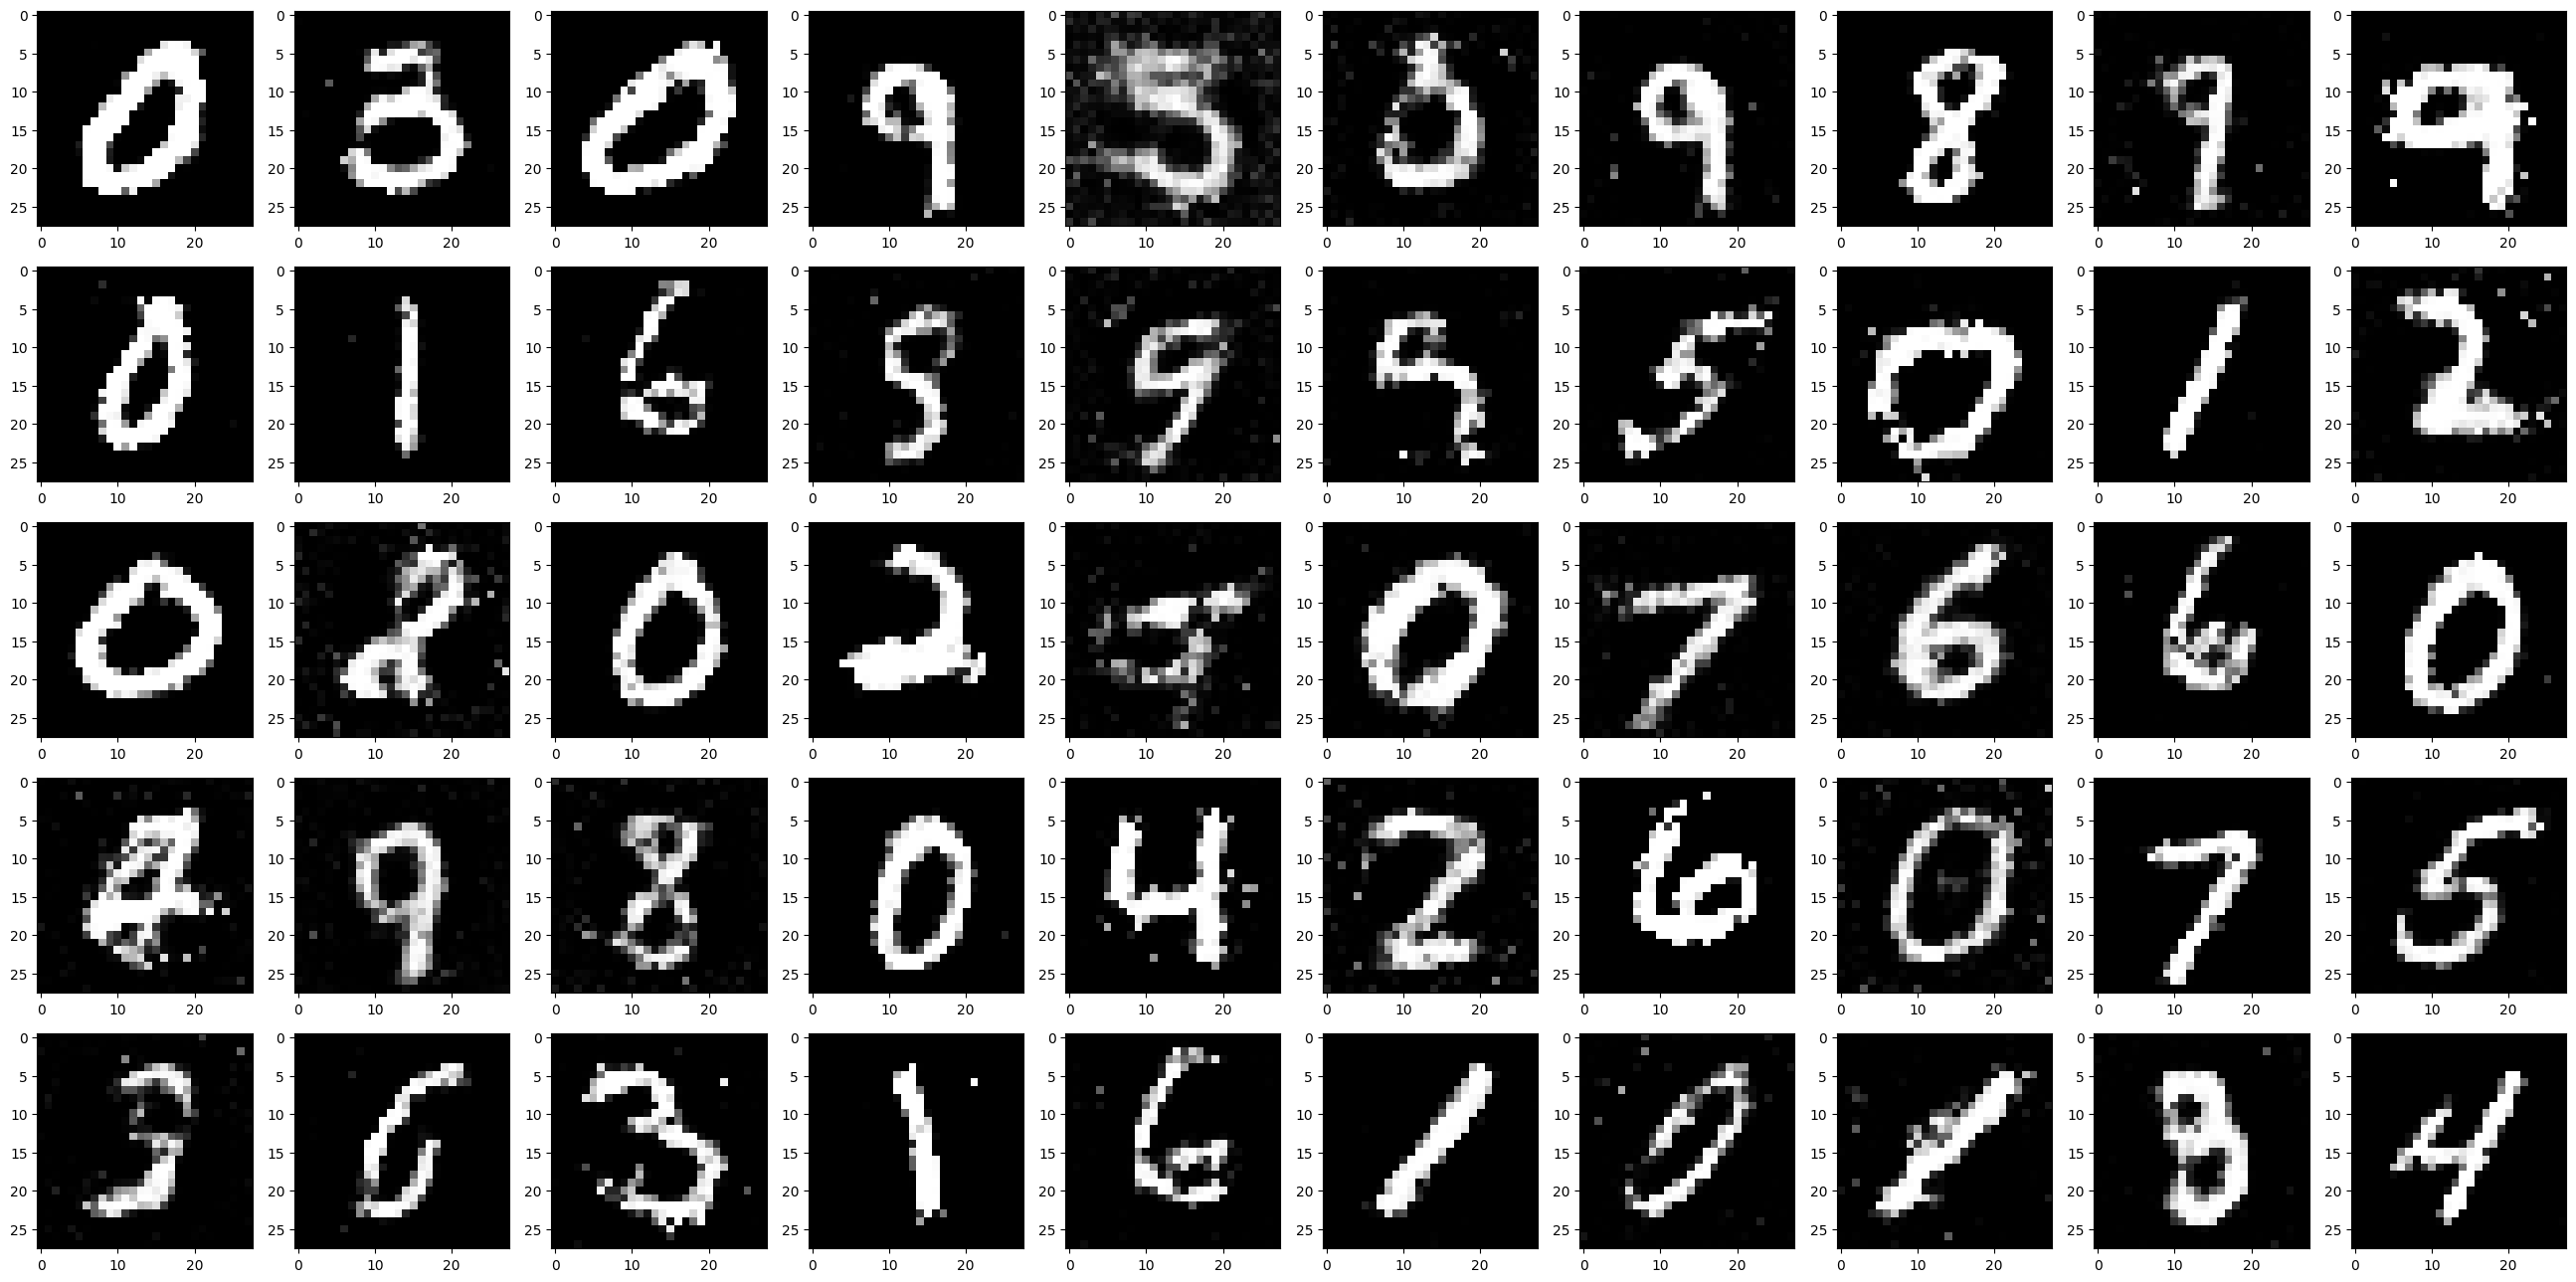

epoch[17/50], Generator Loss: 1.2378, Discriminator Loss: 1.1067


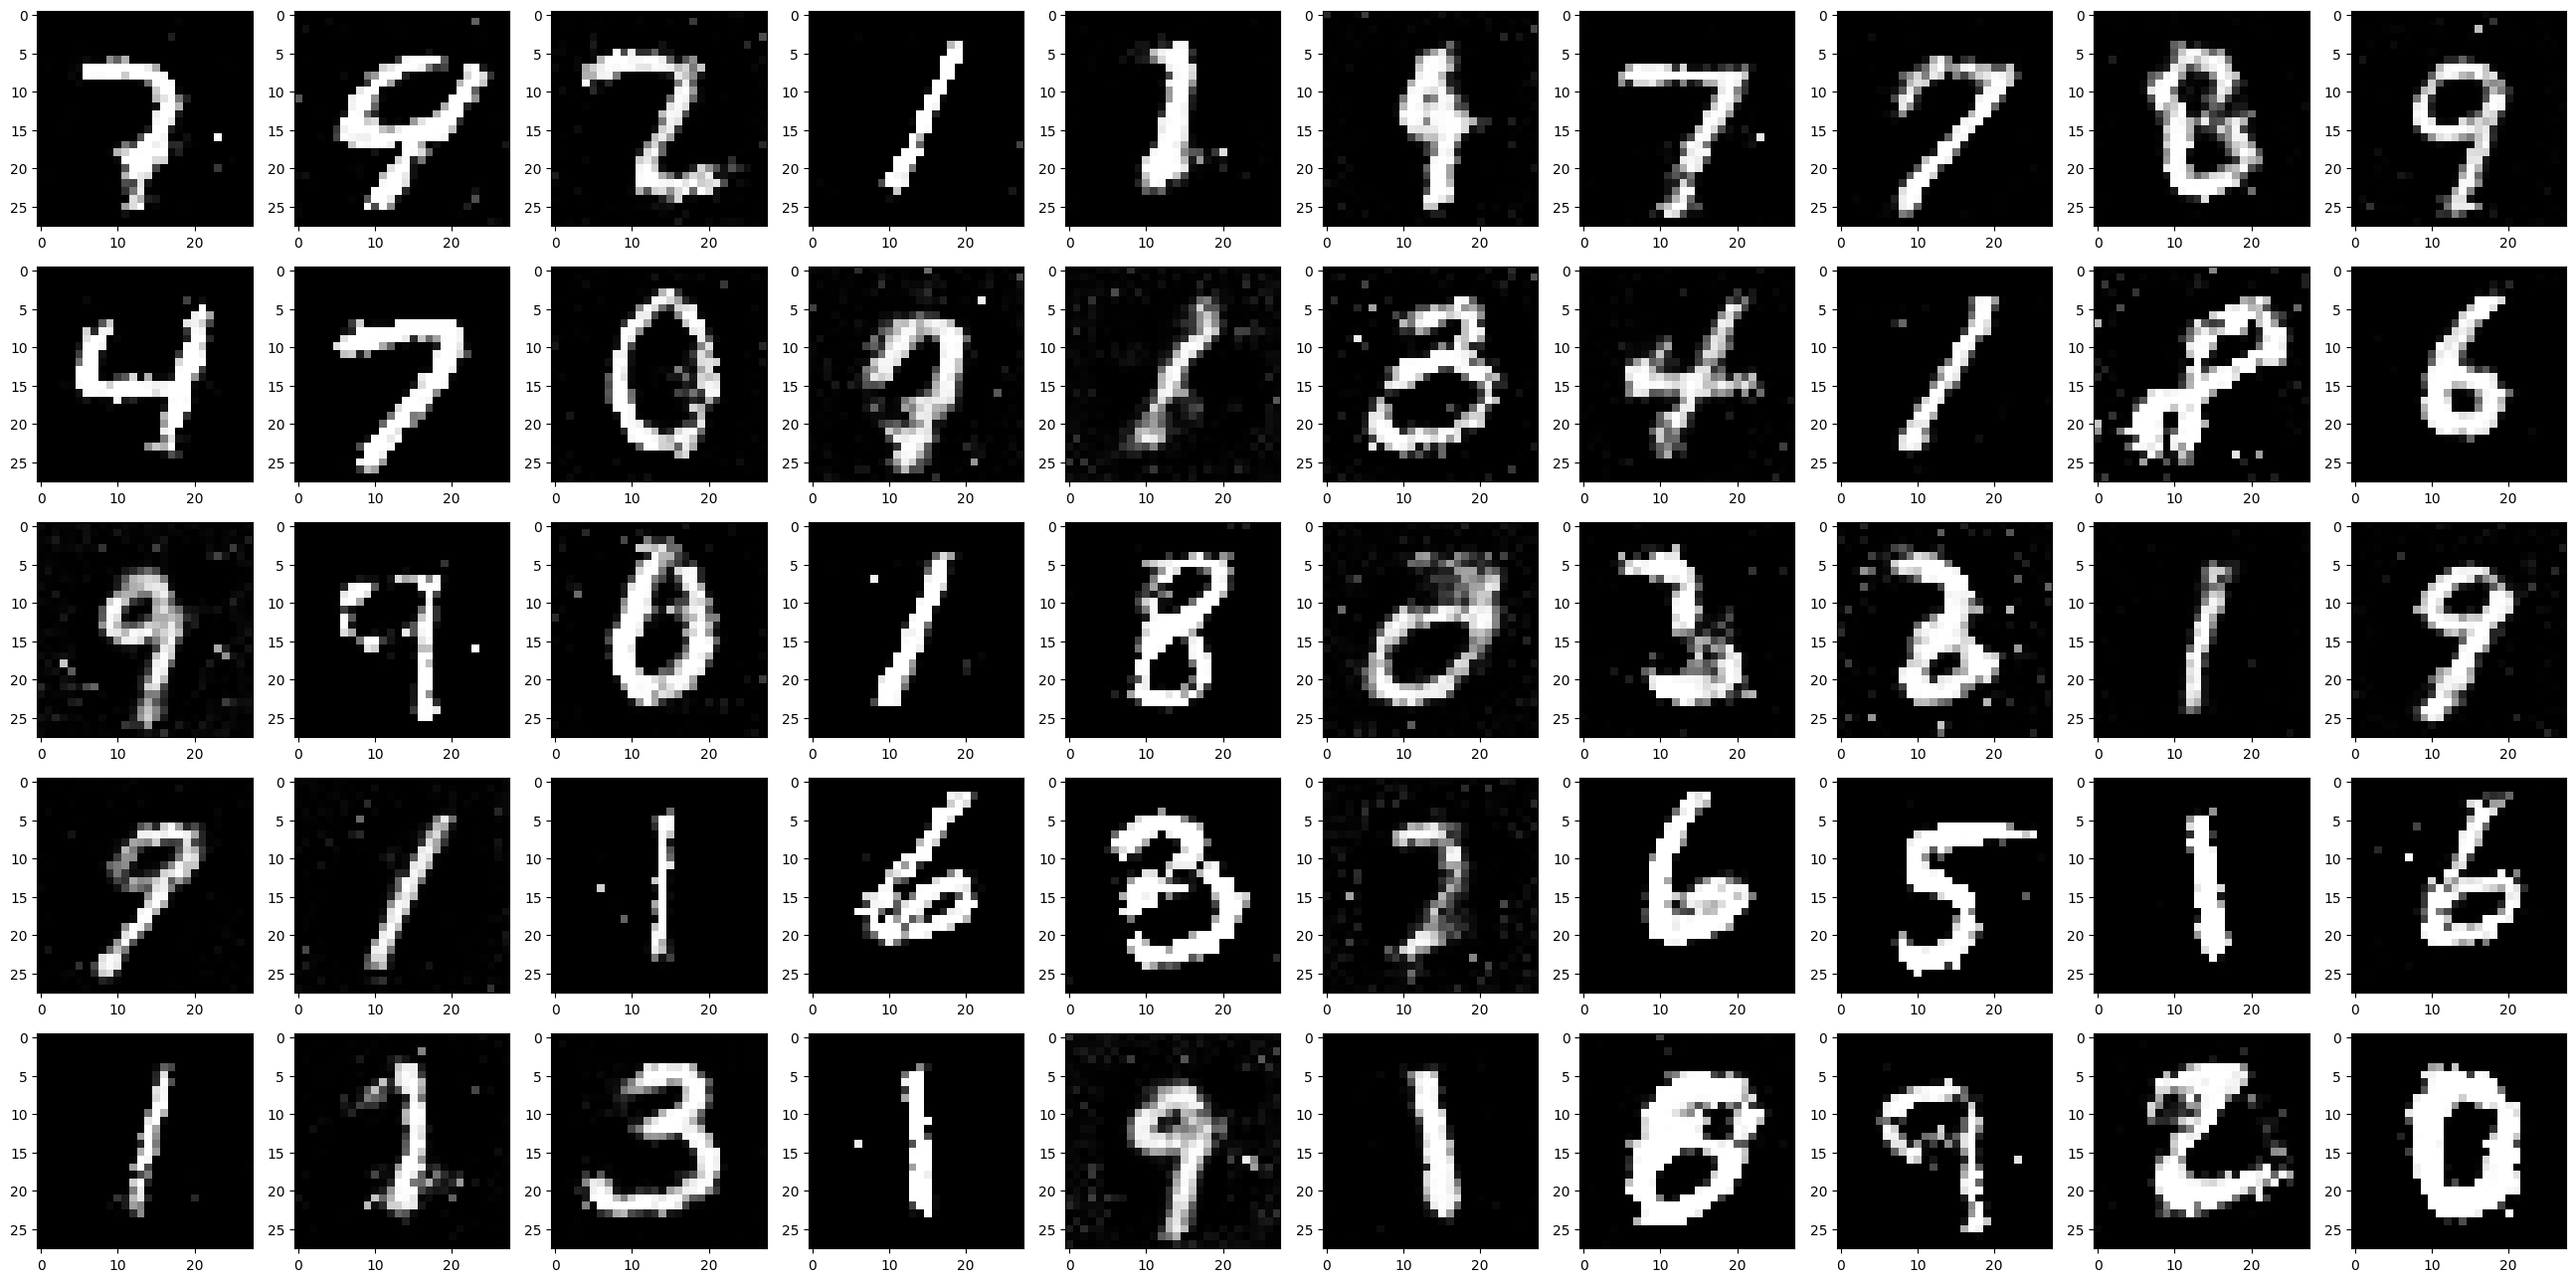

epoch[18/50], Generator Loss: 1.2172, Discriminator Loss: 0.8950


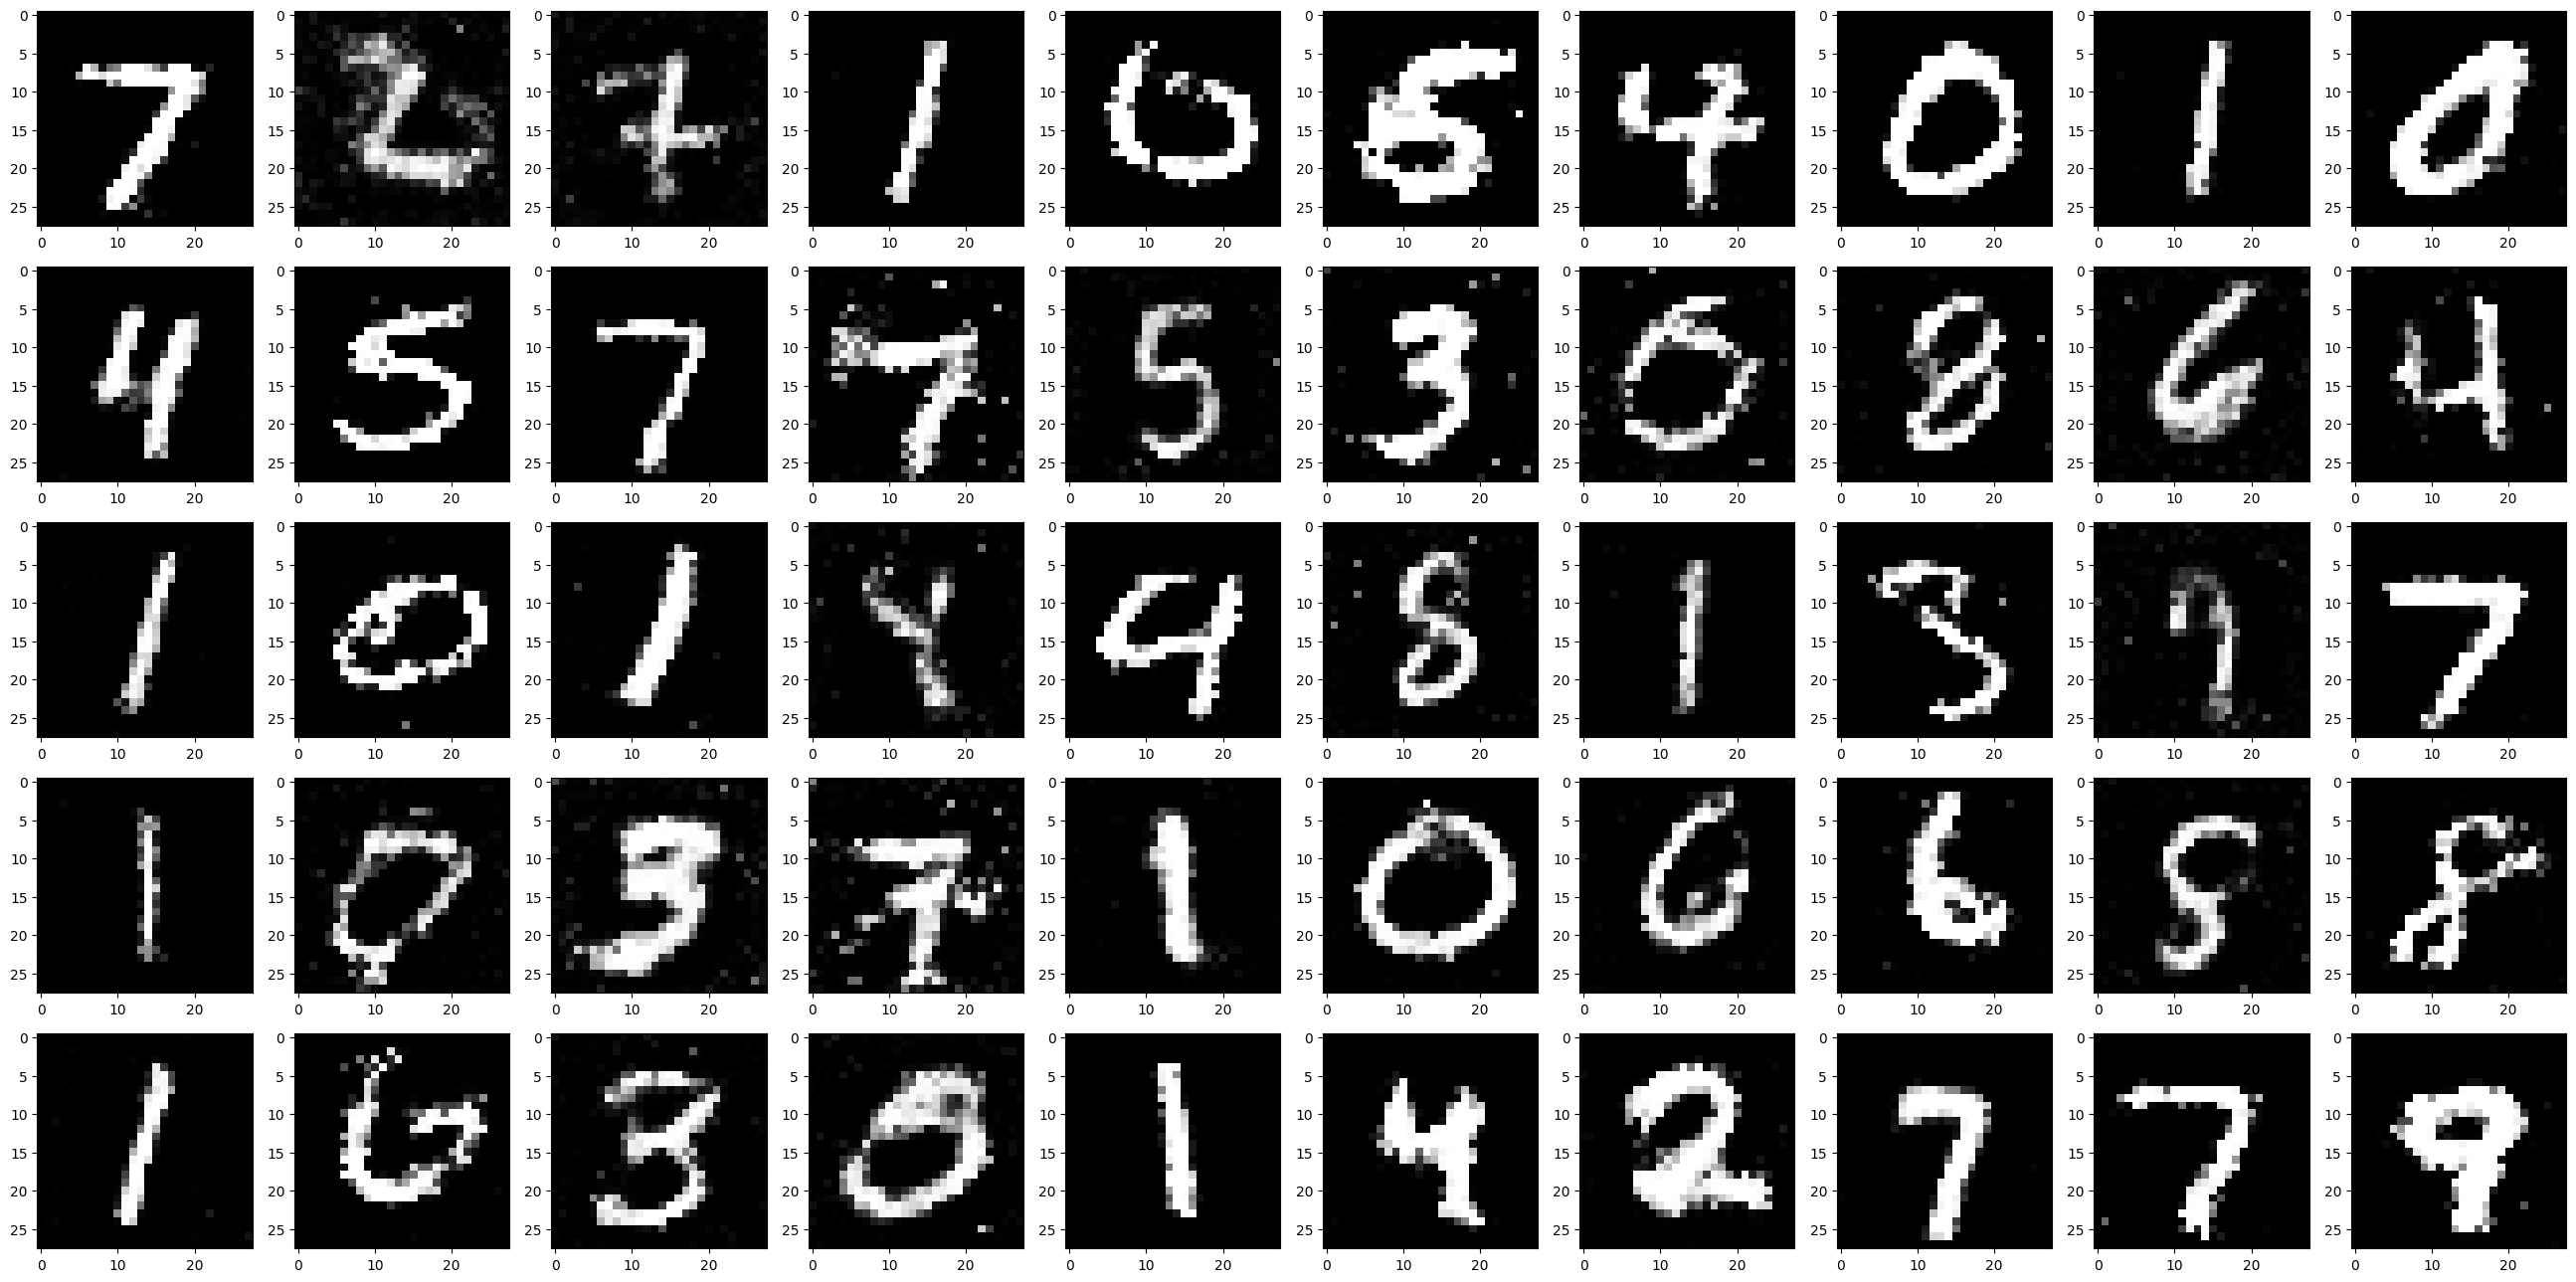

epoch[19/50], Generator Loss: 1.3665, Discriminator Loss: 0.7124


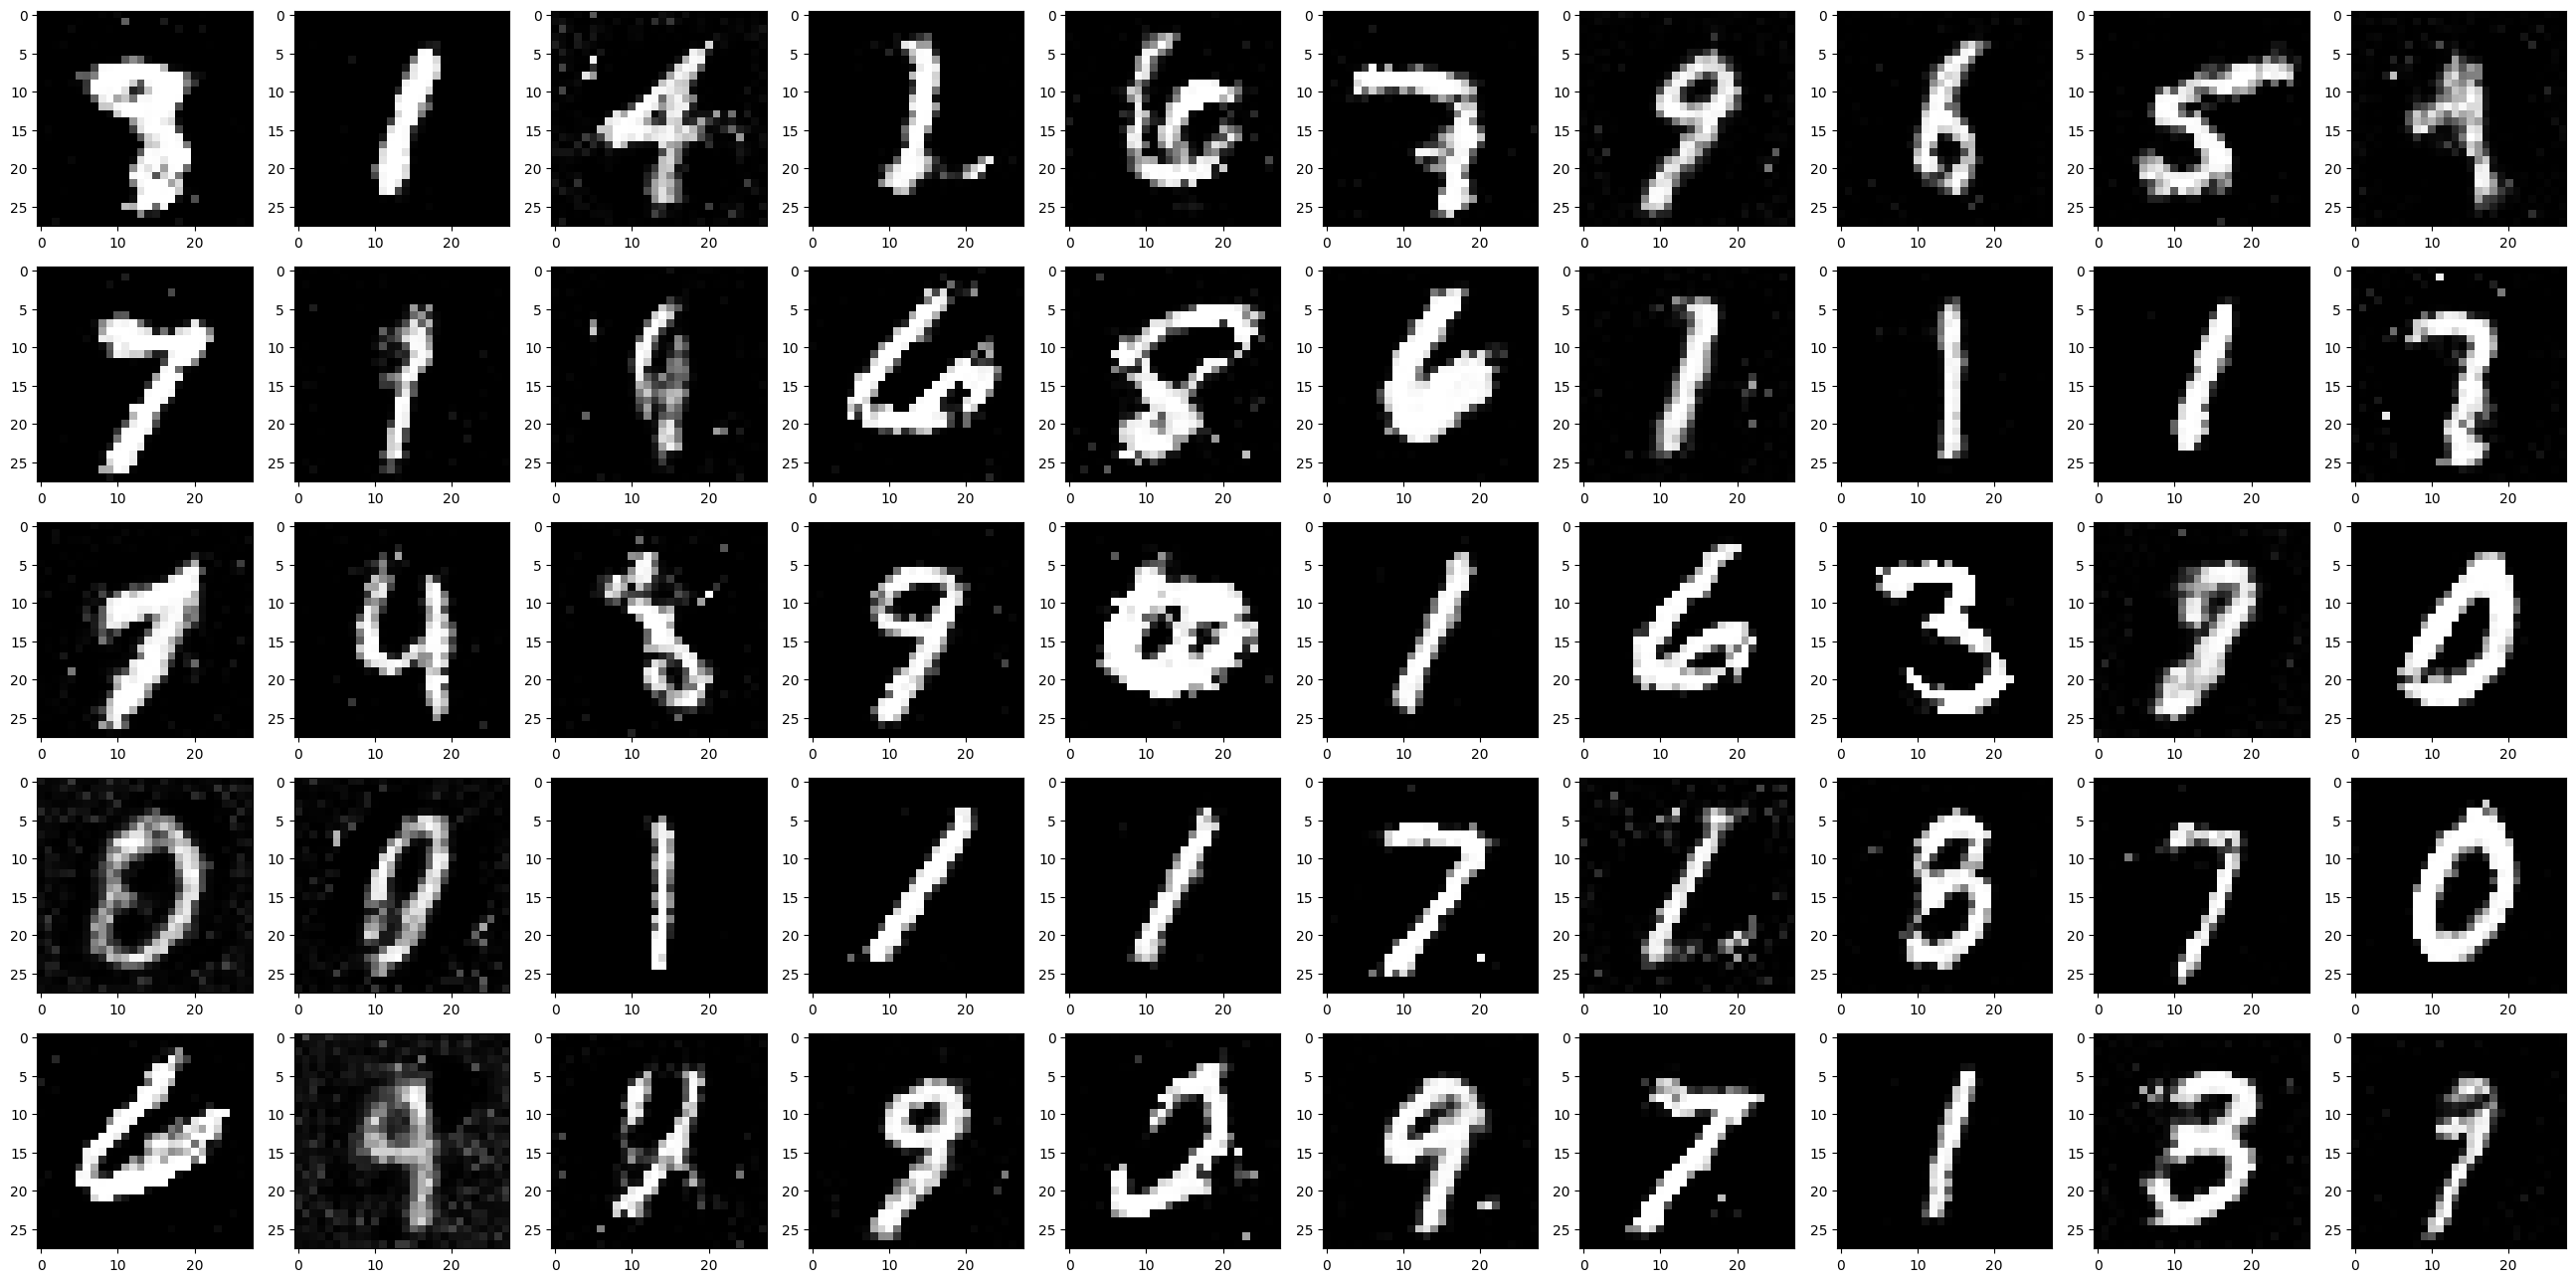

epoch[20/50], Generator Loss: 1.2476, Discriminator Loss: 1.0619


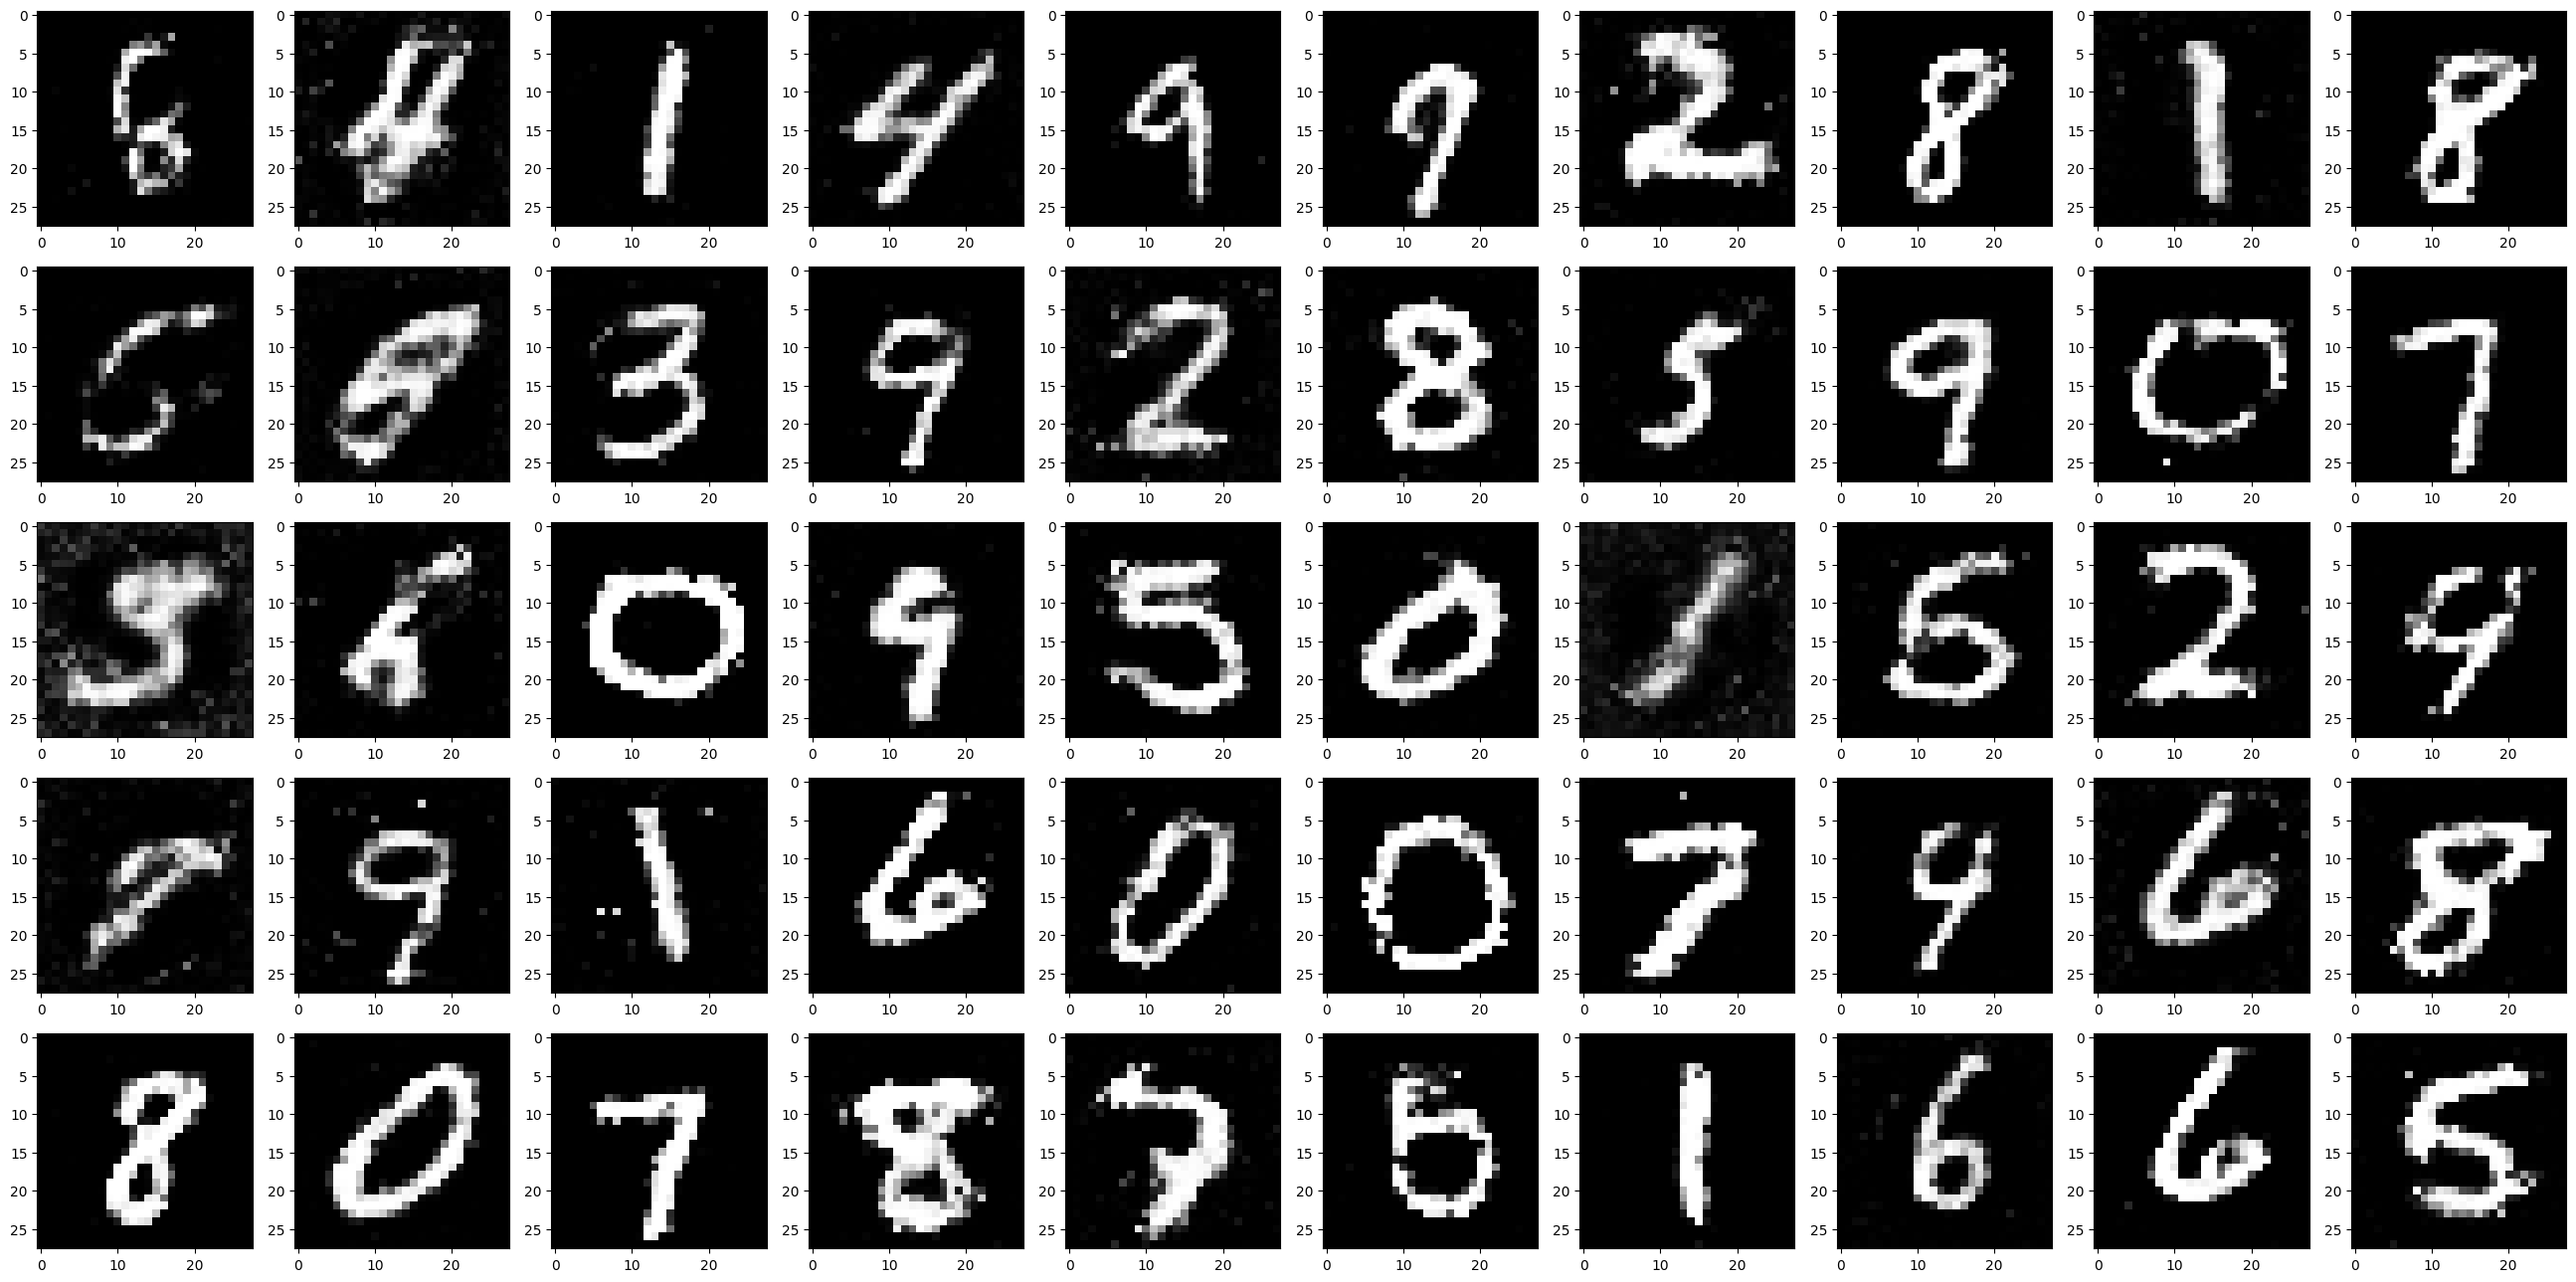

epoch[21/50], Generator Loss: 1.2556, Discriminator Loss: 0.9187


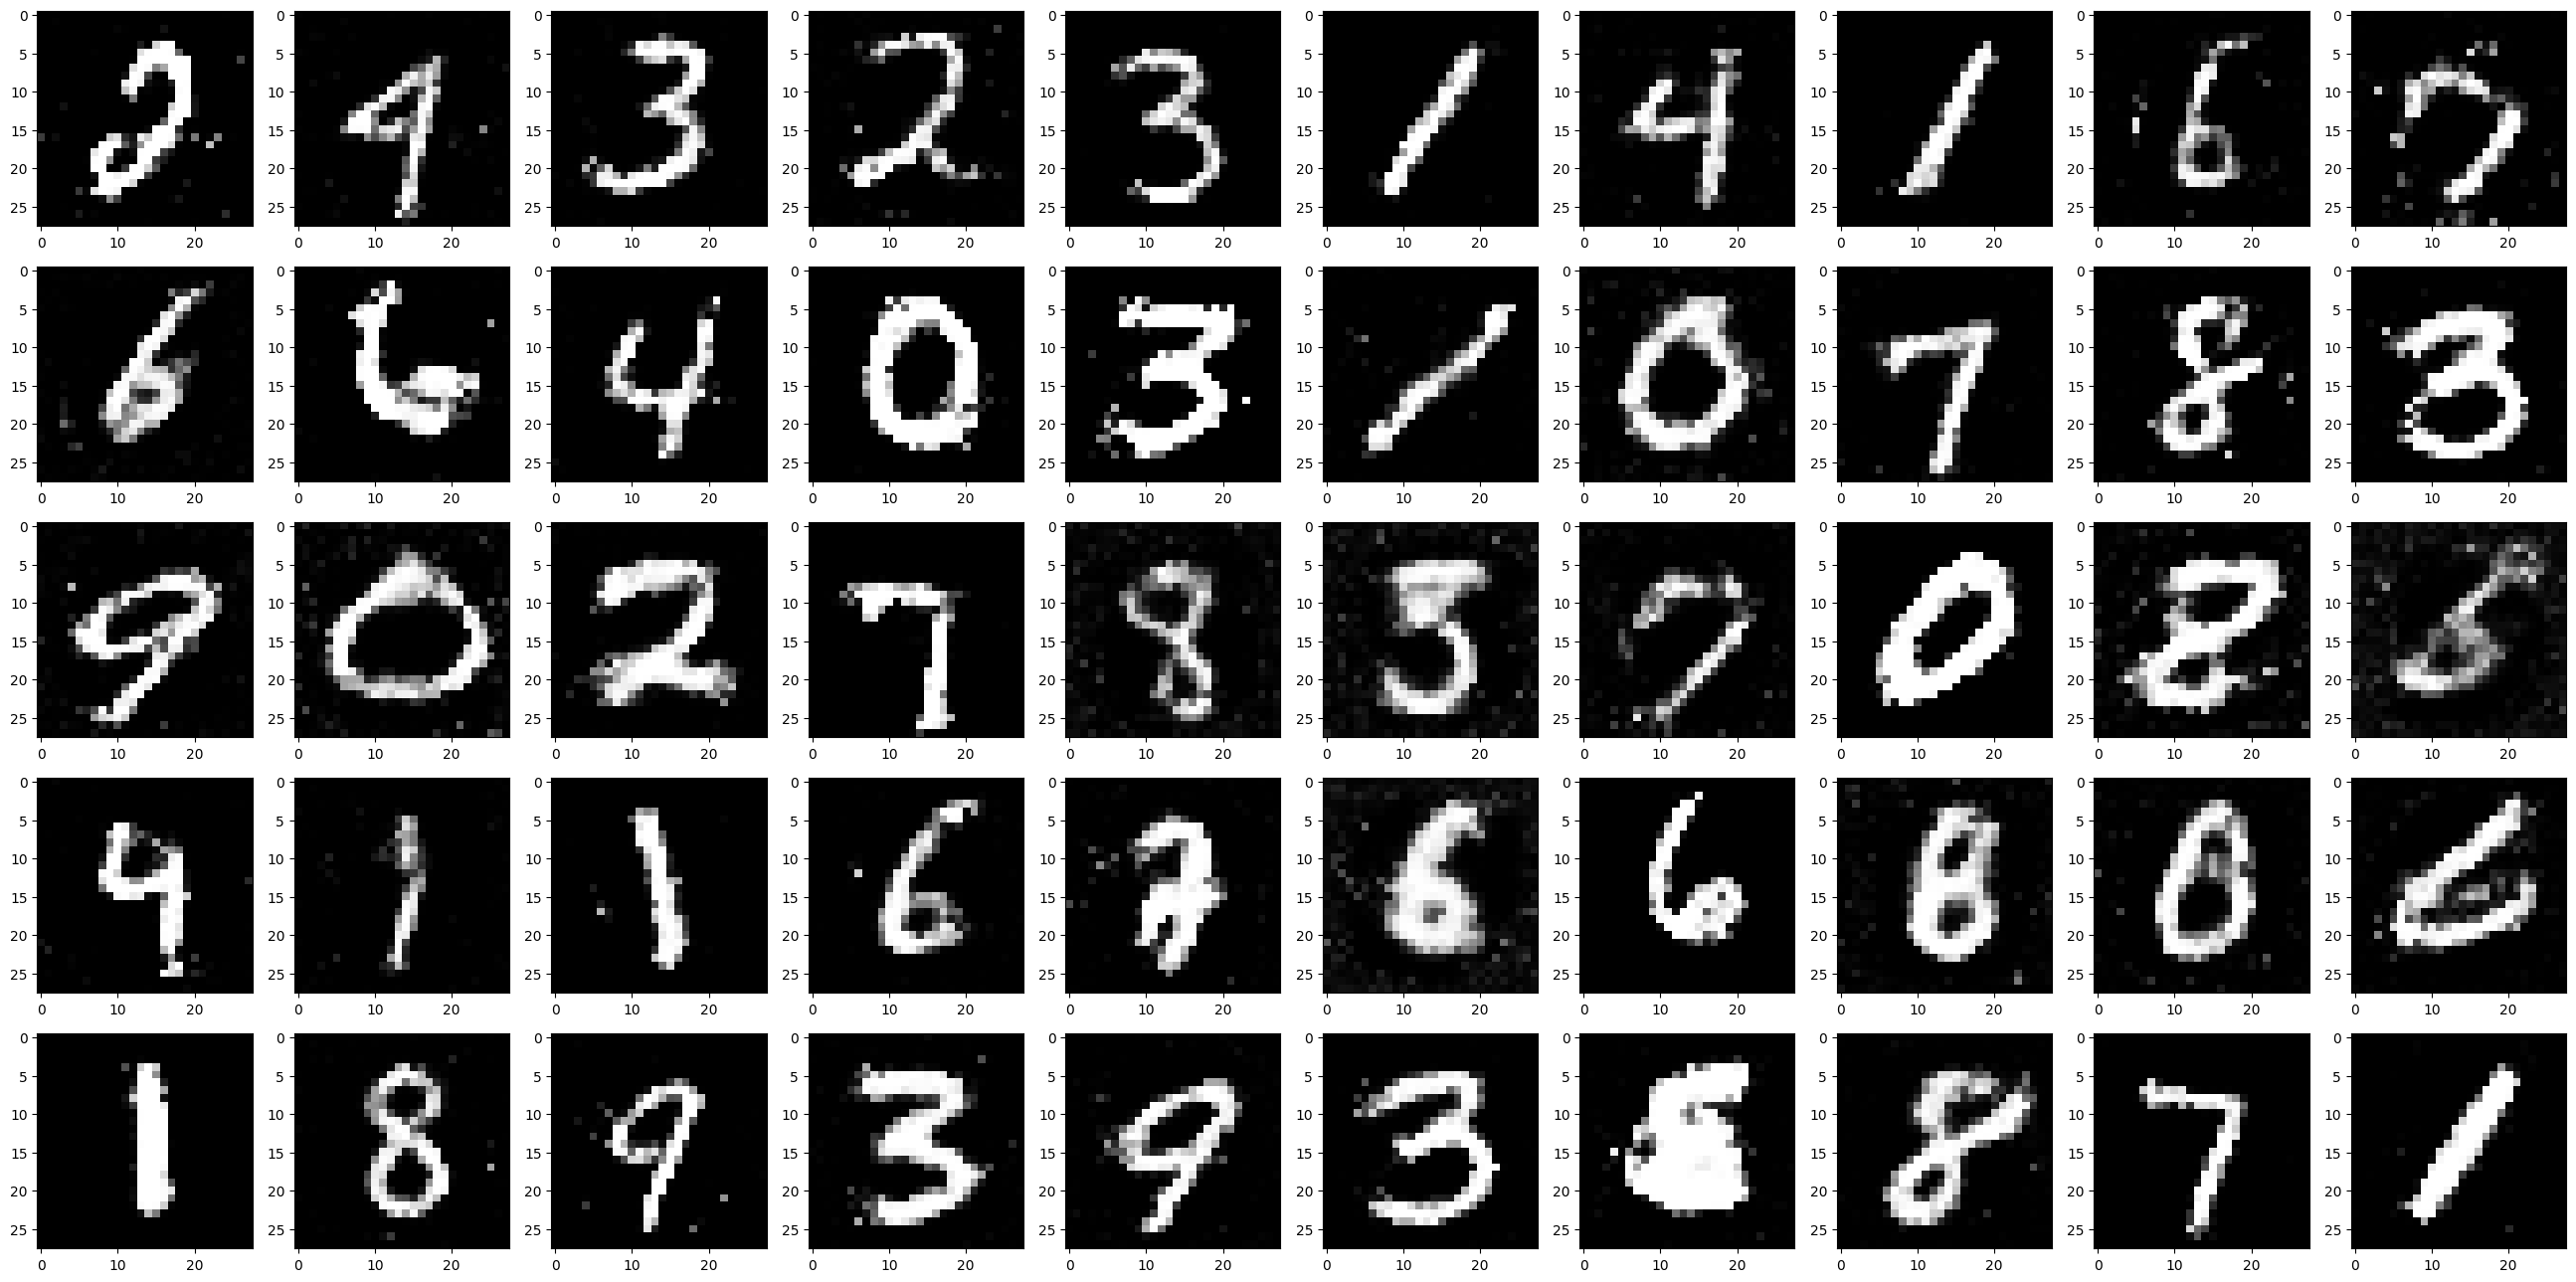

epoch[22/50], Generator Loss: 1.3473, Discriminator Loss: 1.1689


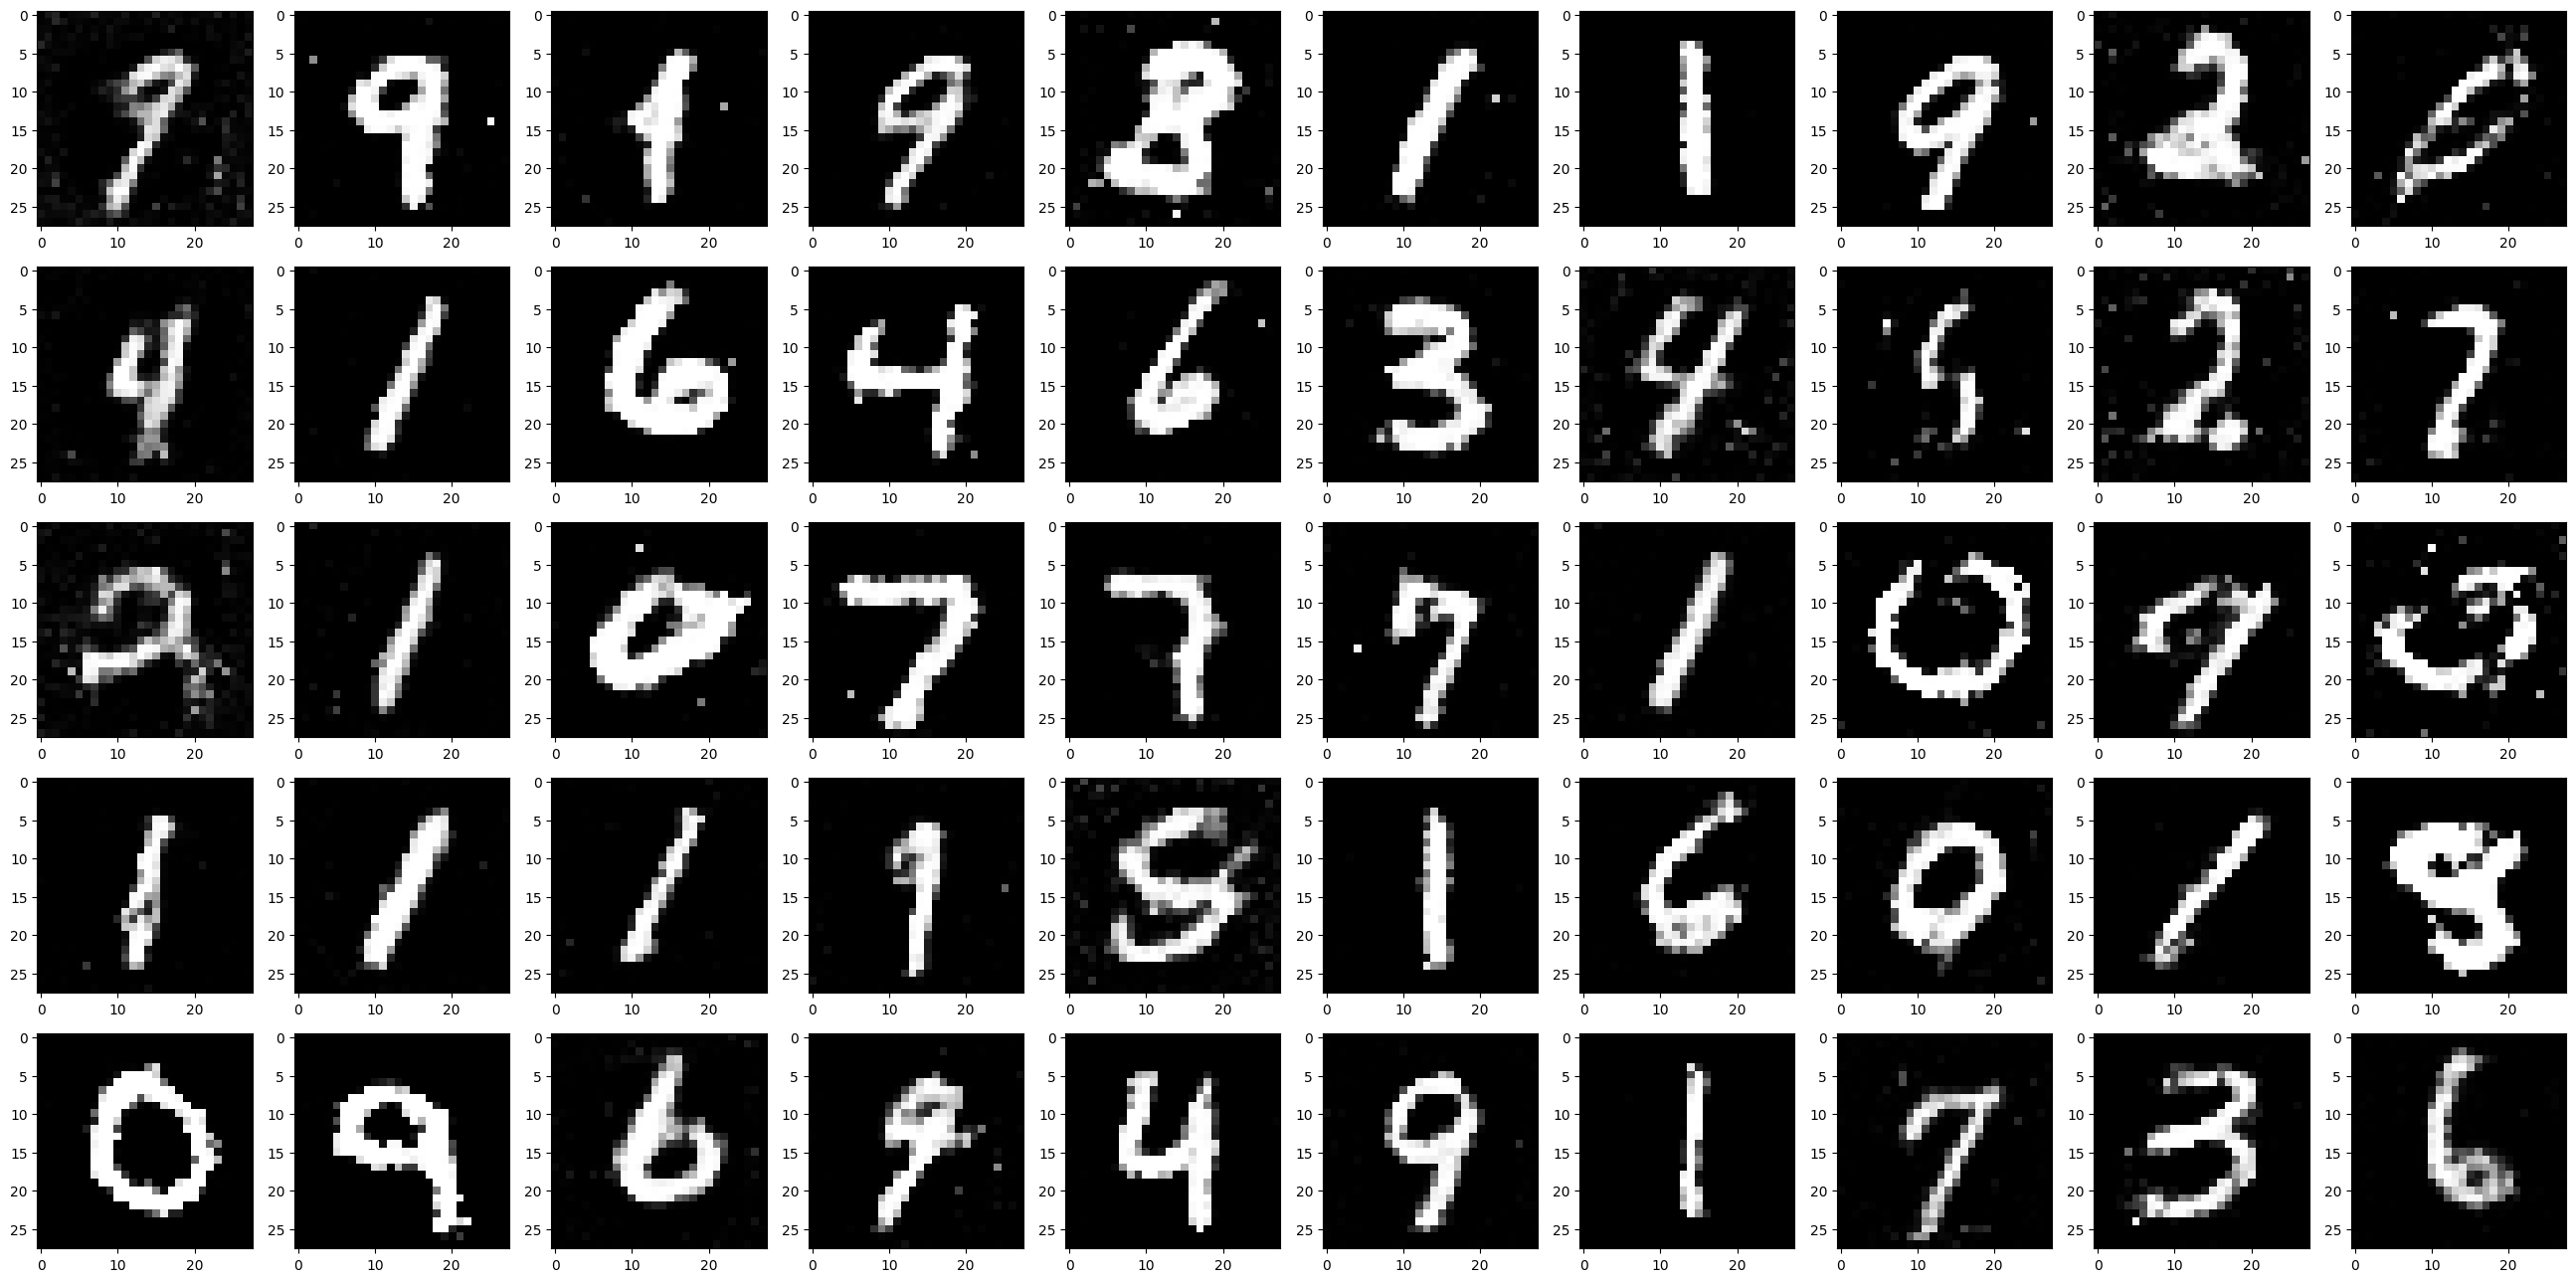

epoch[23/50], Generator Loss: 1.1378, Discriminator Loss: 0.9297


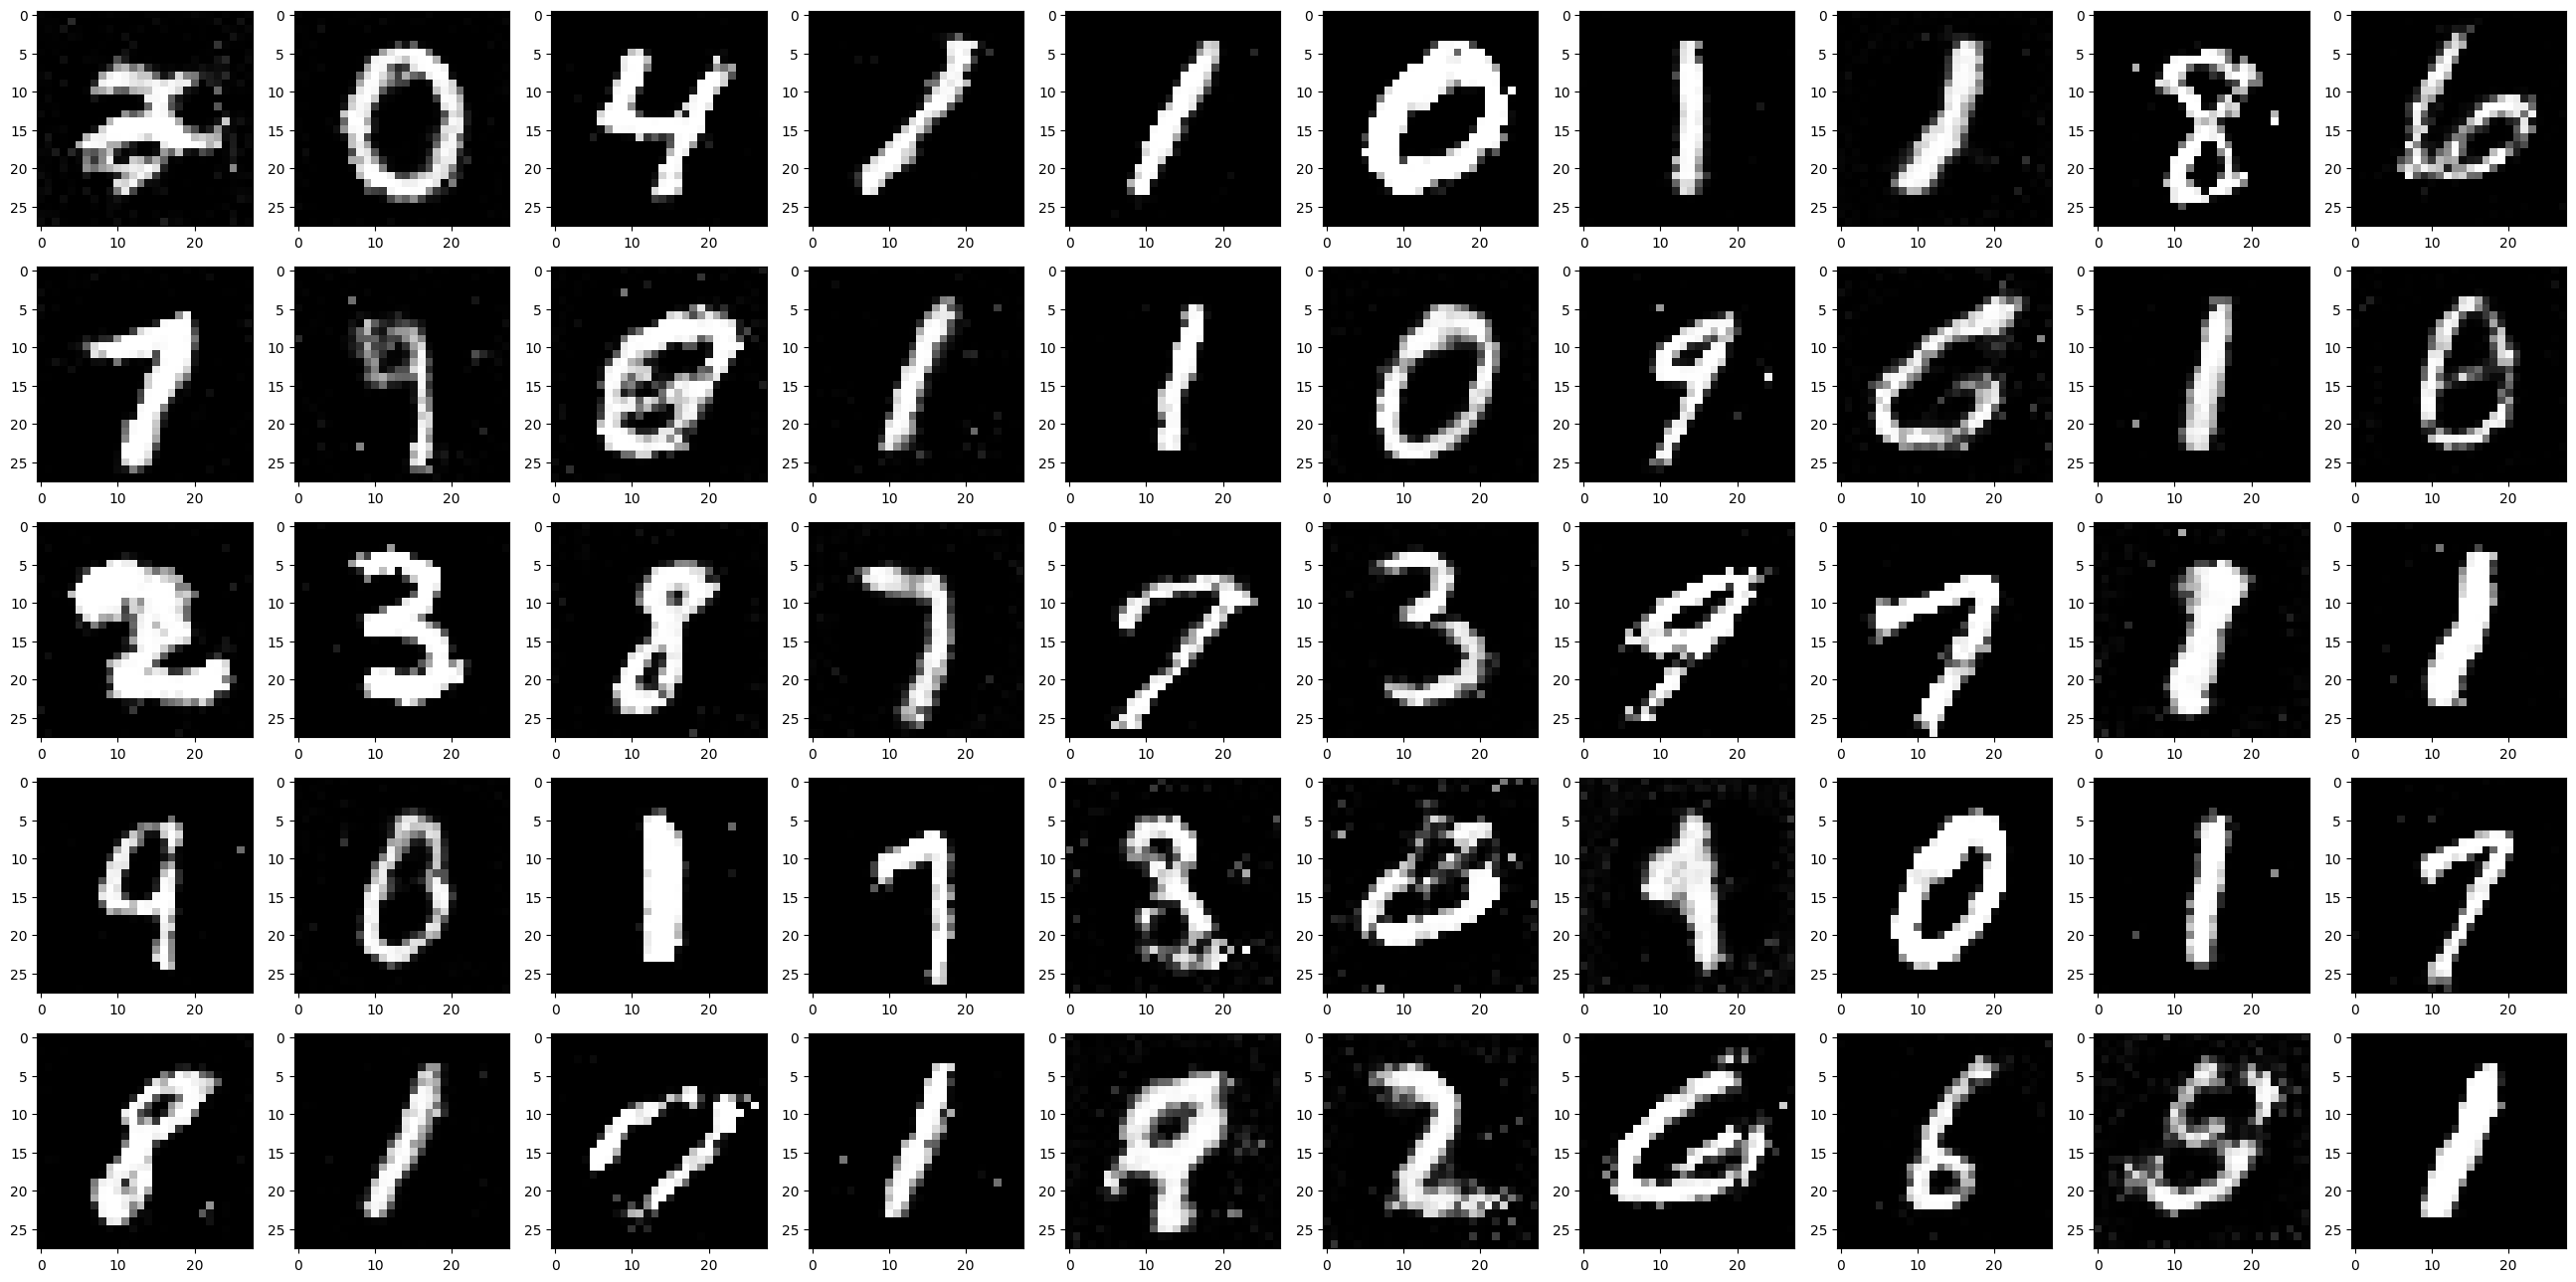

epoch[24/50], Generator Loss: 1.3187, Discriminator Loss: 0.7702


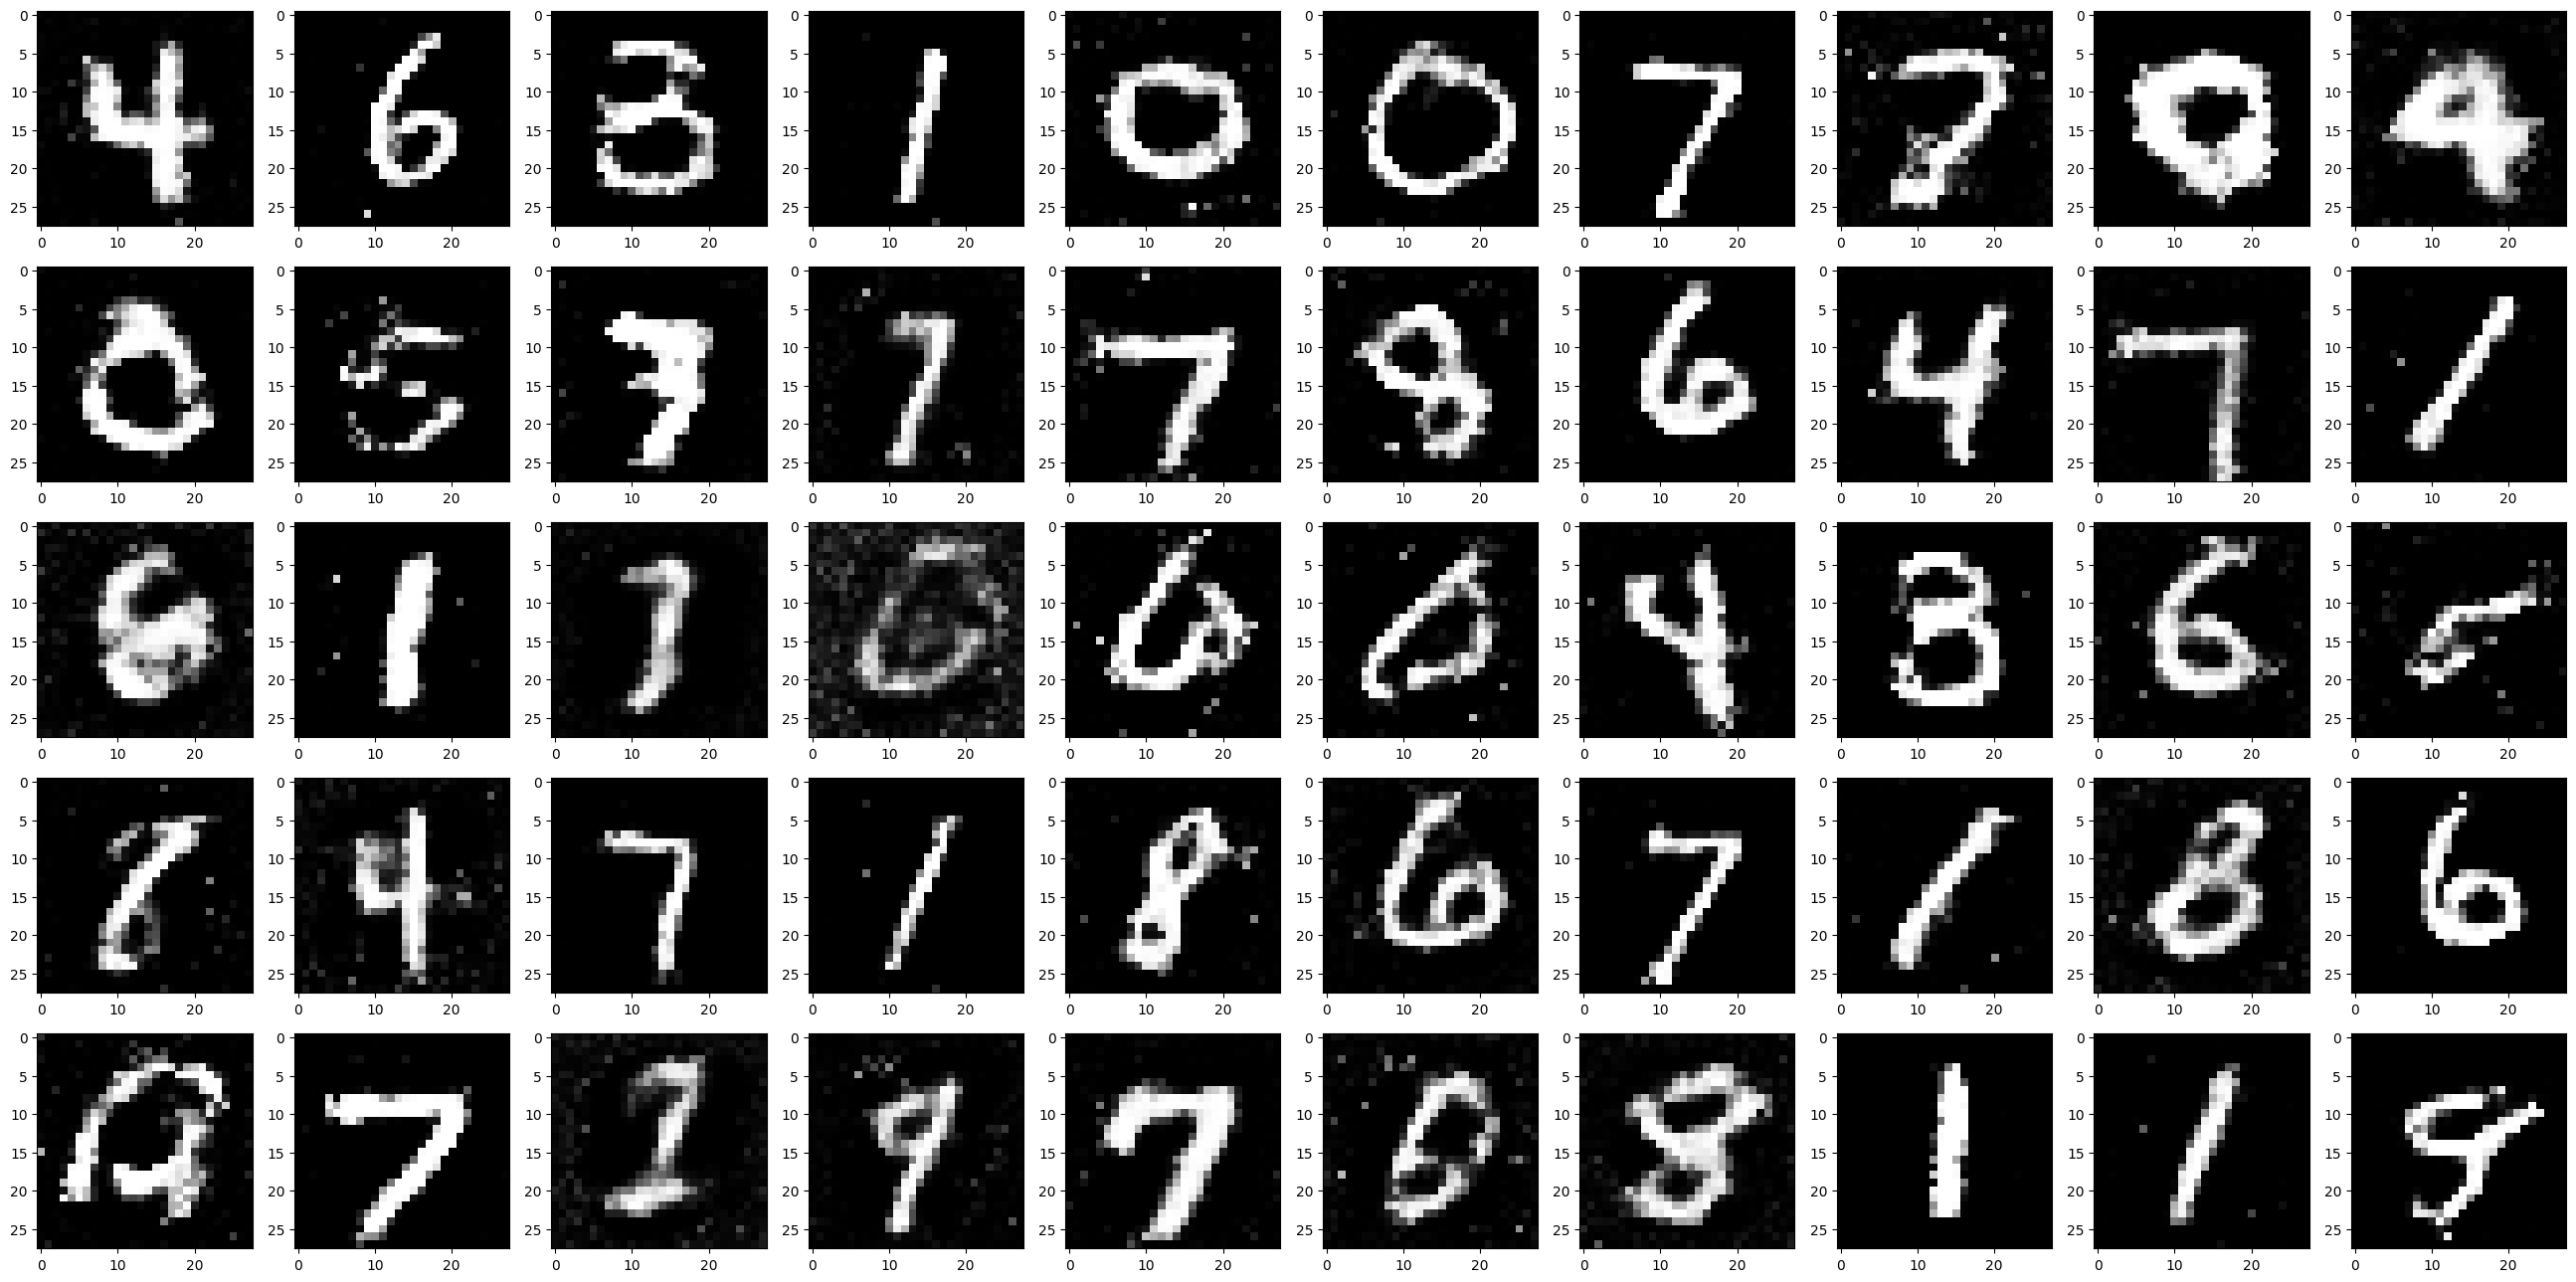

epoch[25/50], Generator Loss: 1.3771, Discriminator Loss: 1.0951


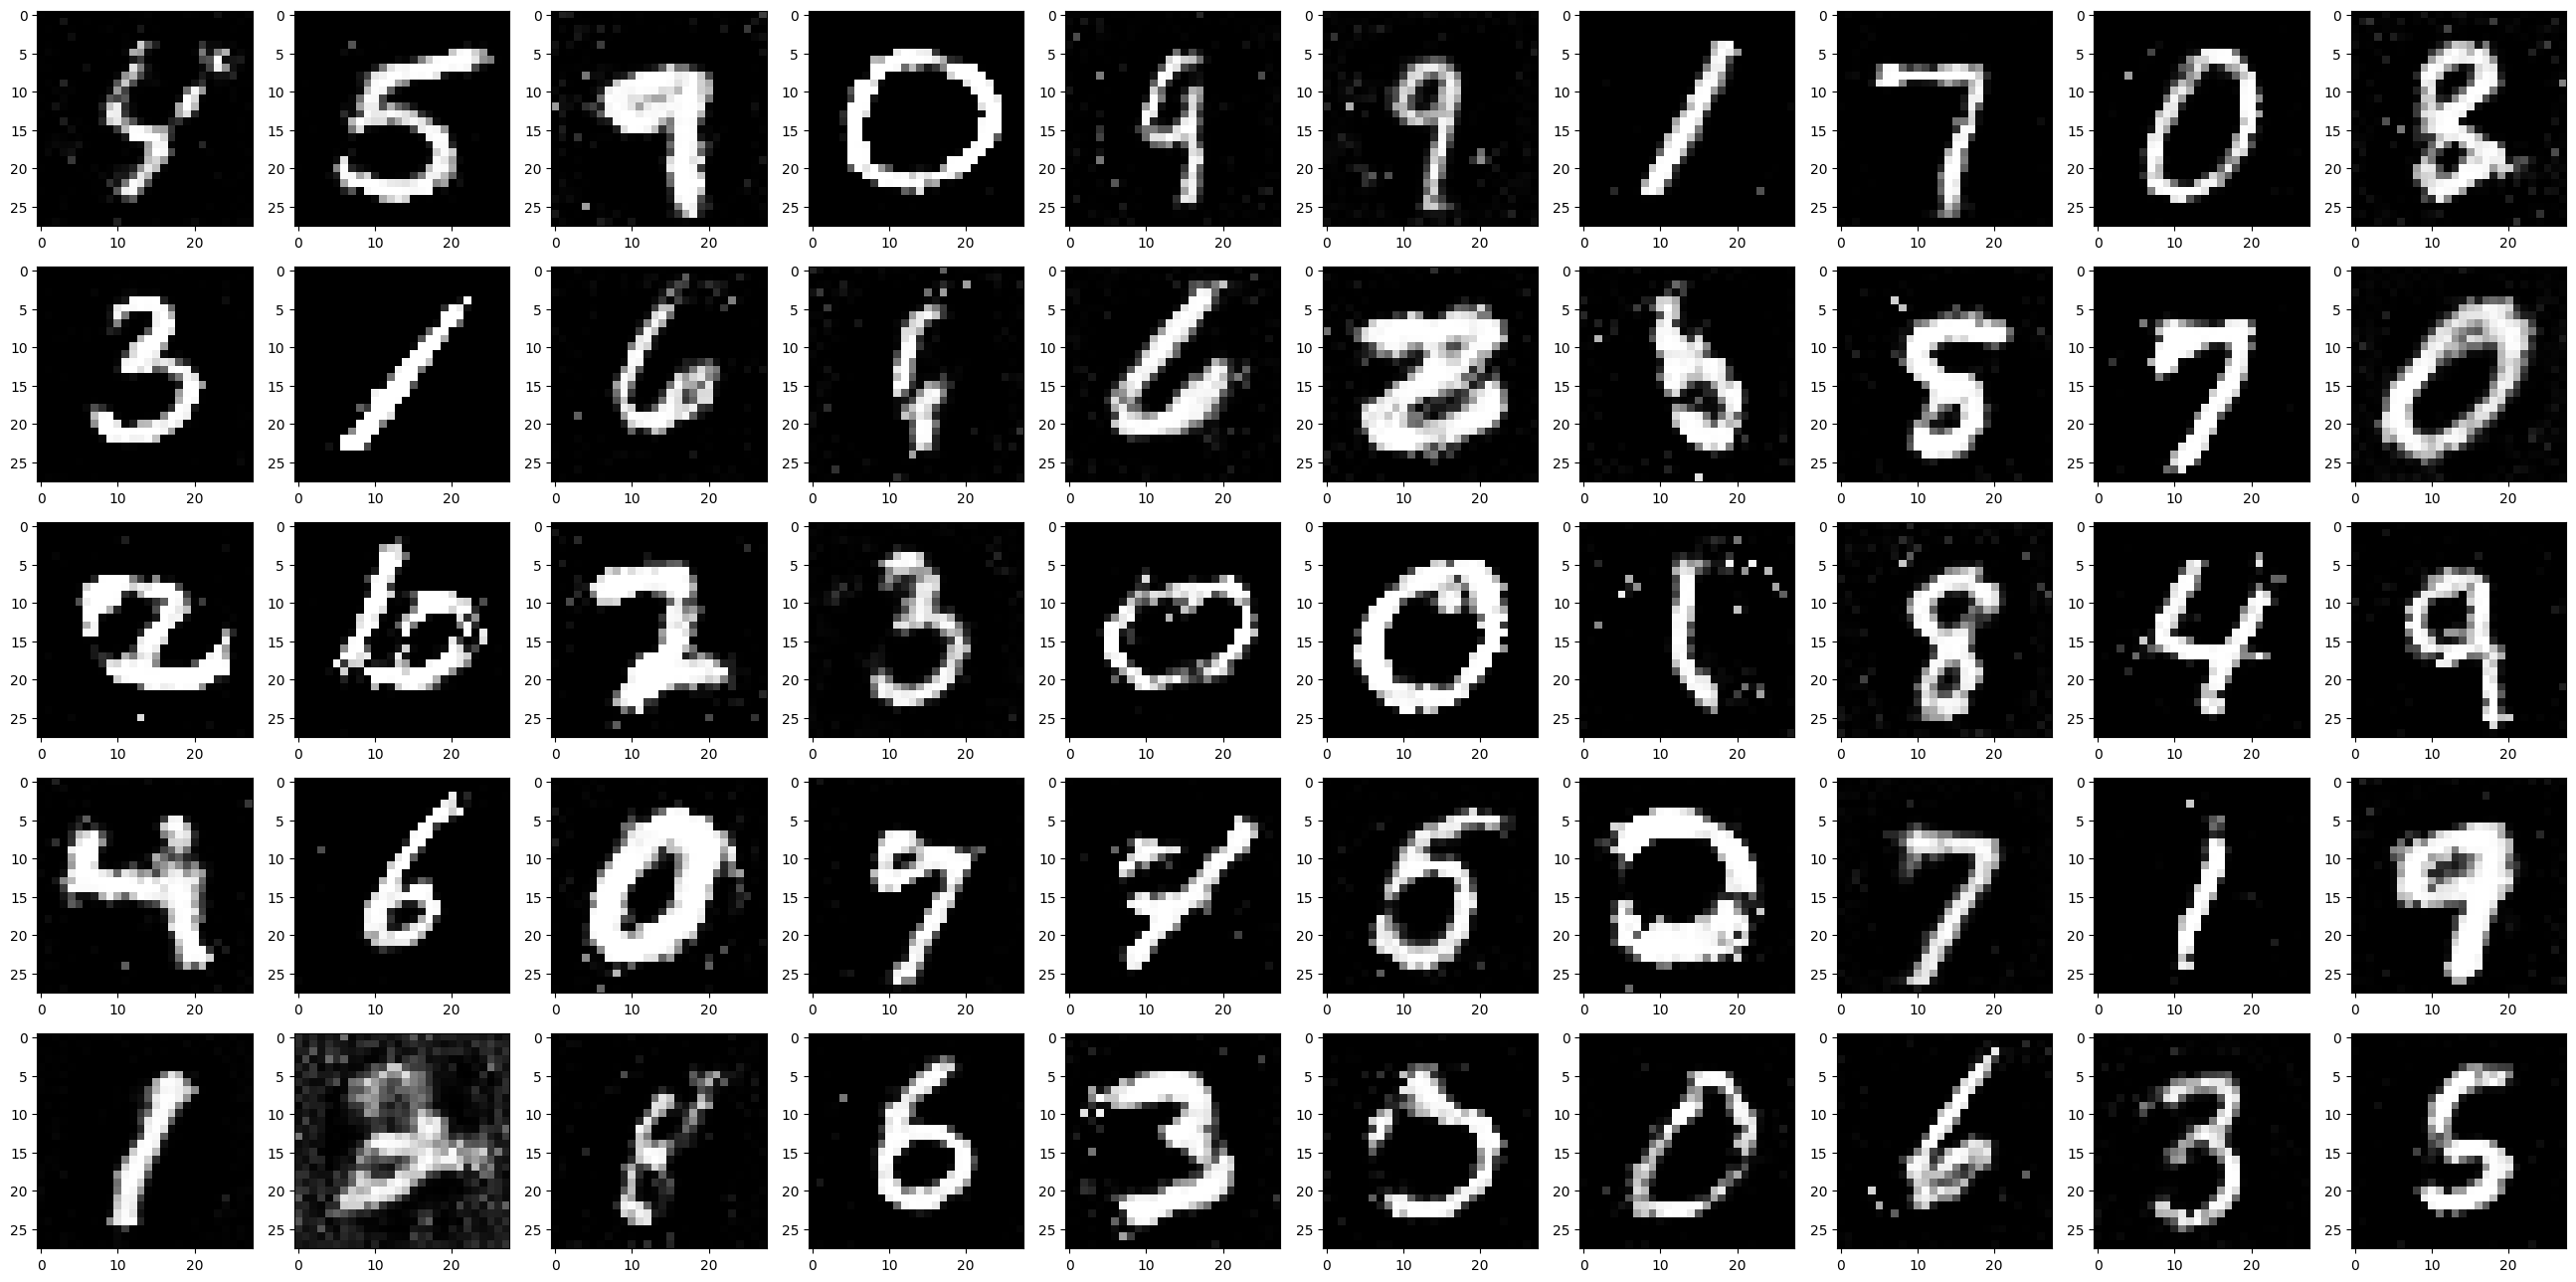

epoch[26/50], Generator Loss: 1.2572, Discriminator Loss: 1.0622


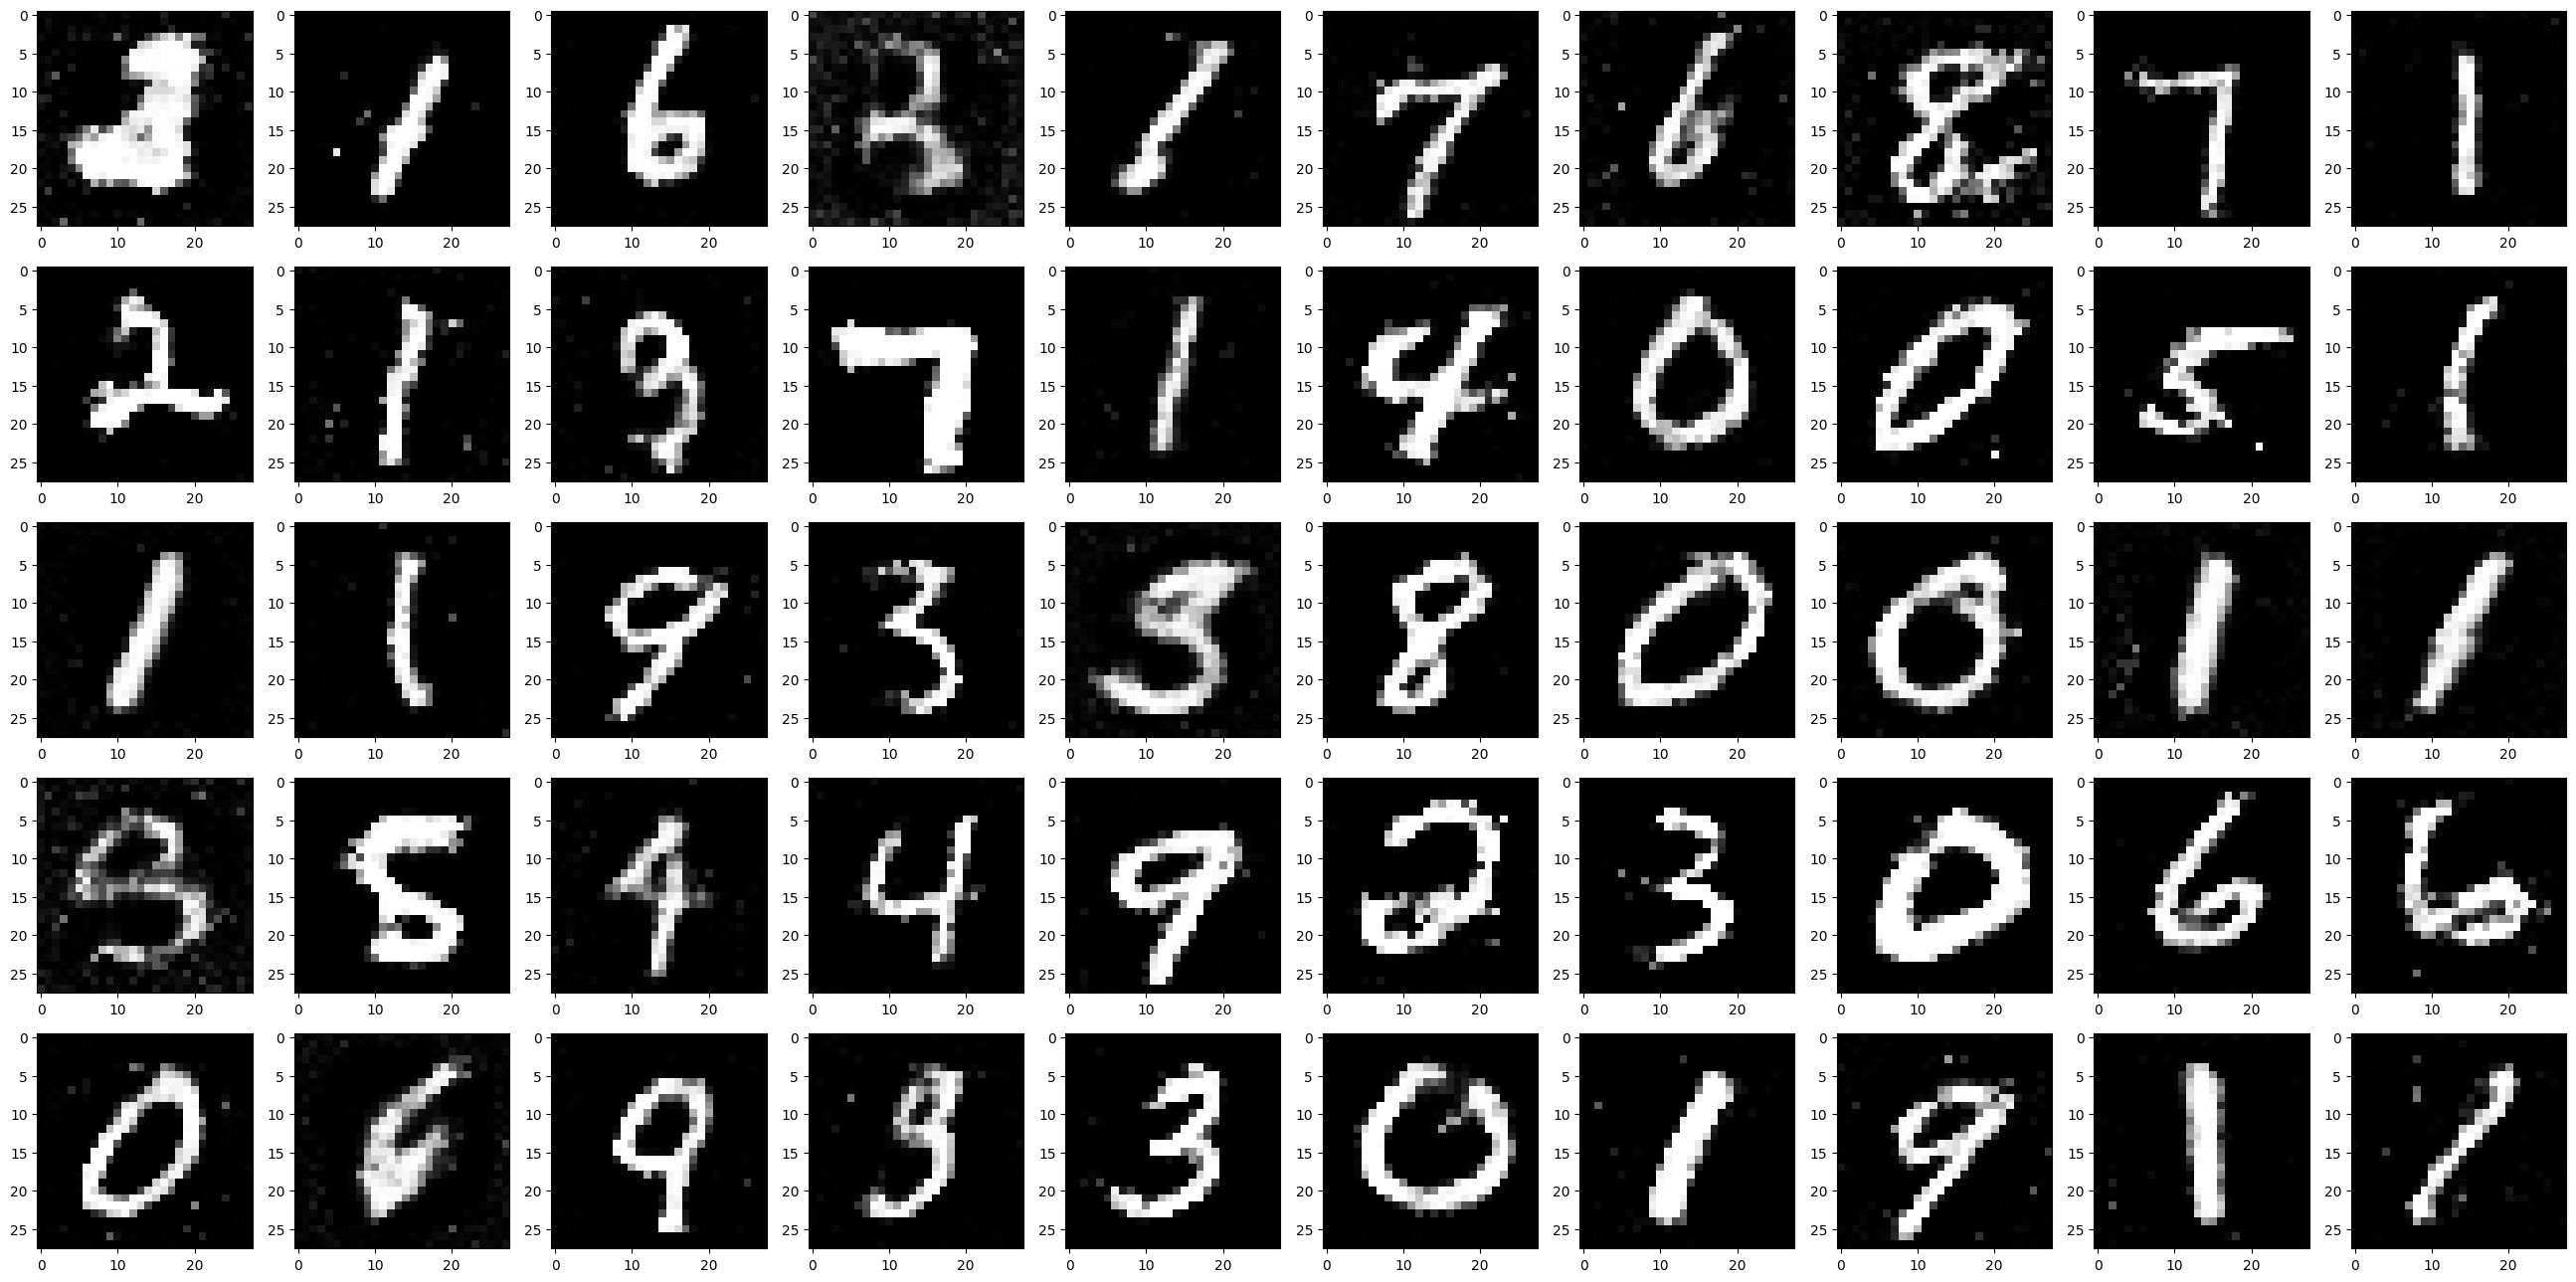

epoch[27/50], Generator Loss: 1.1591, Discriminator Loss: 1.3237


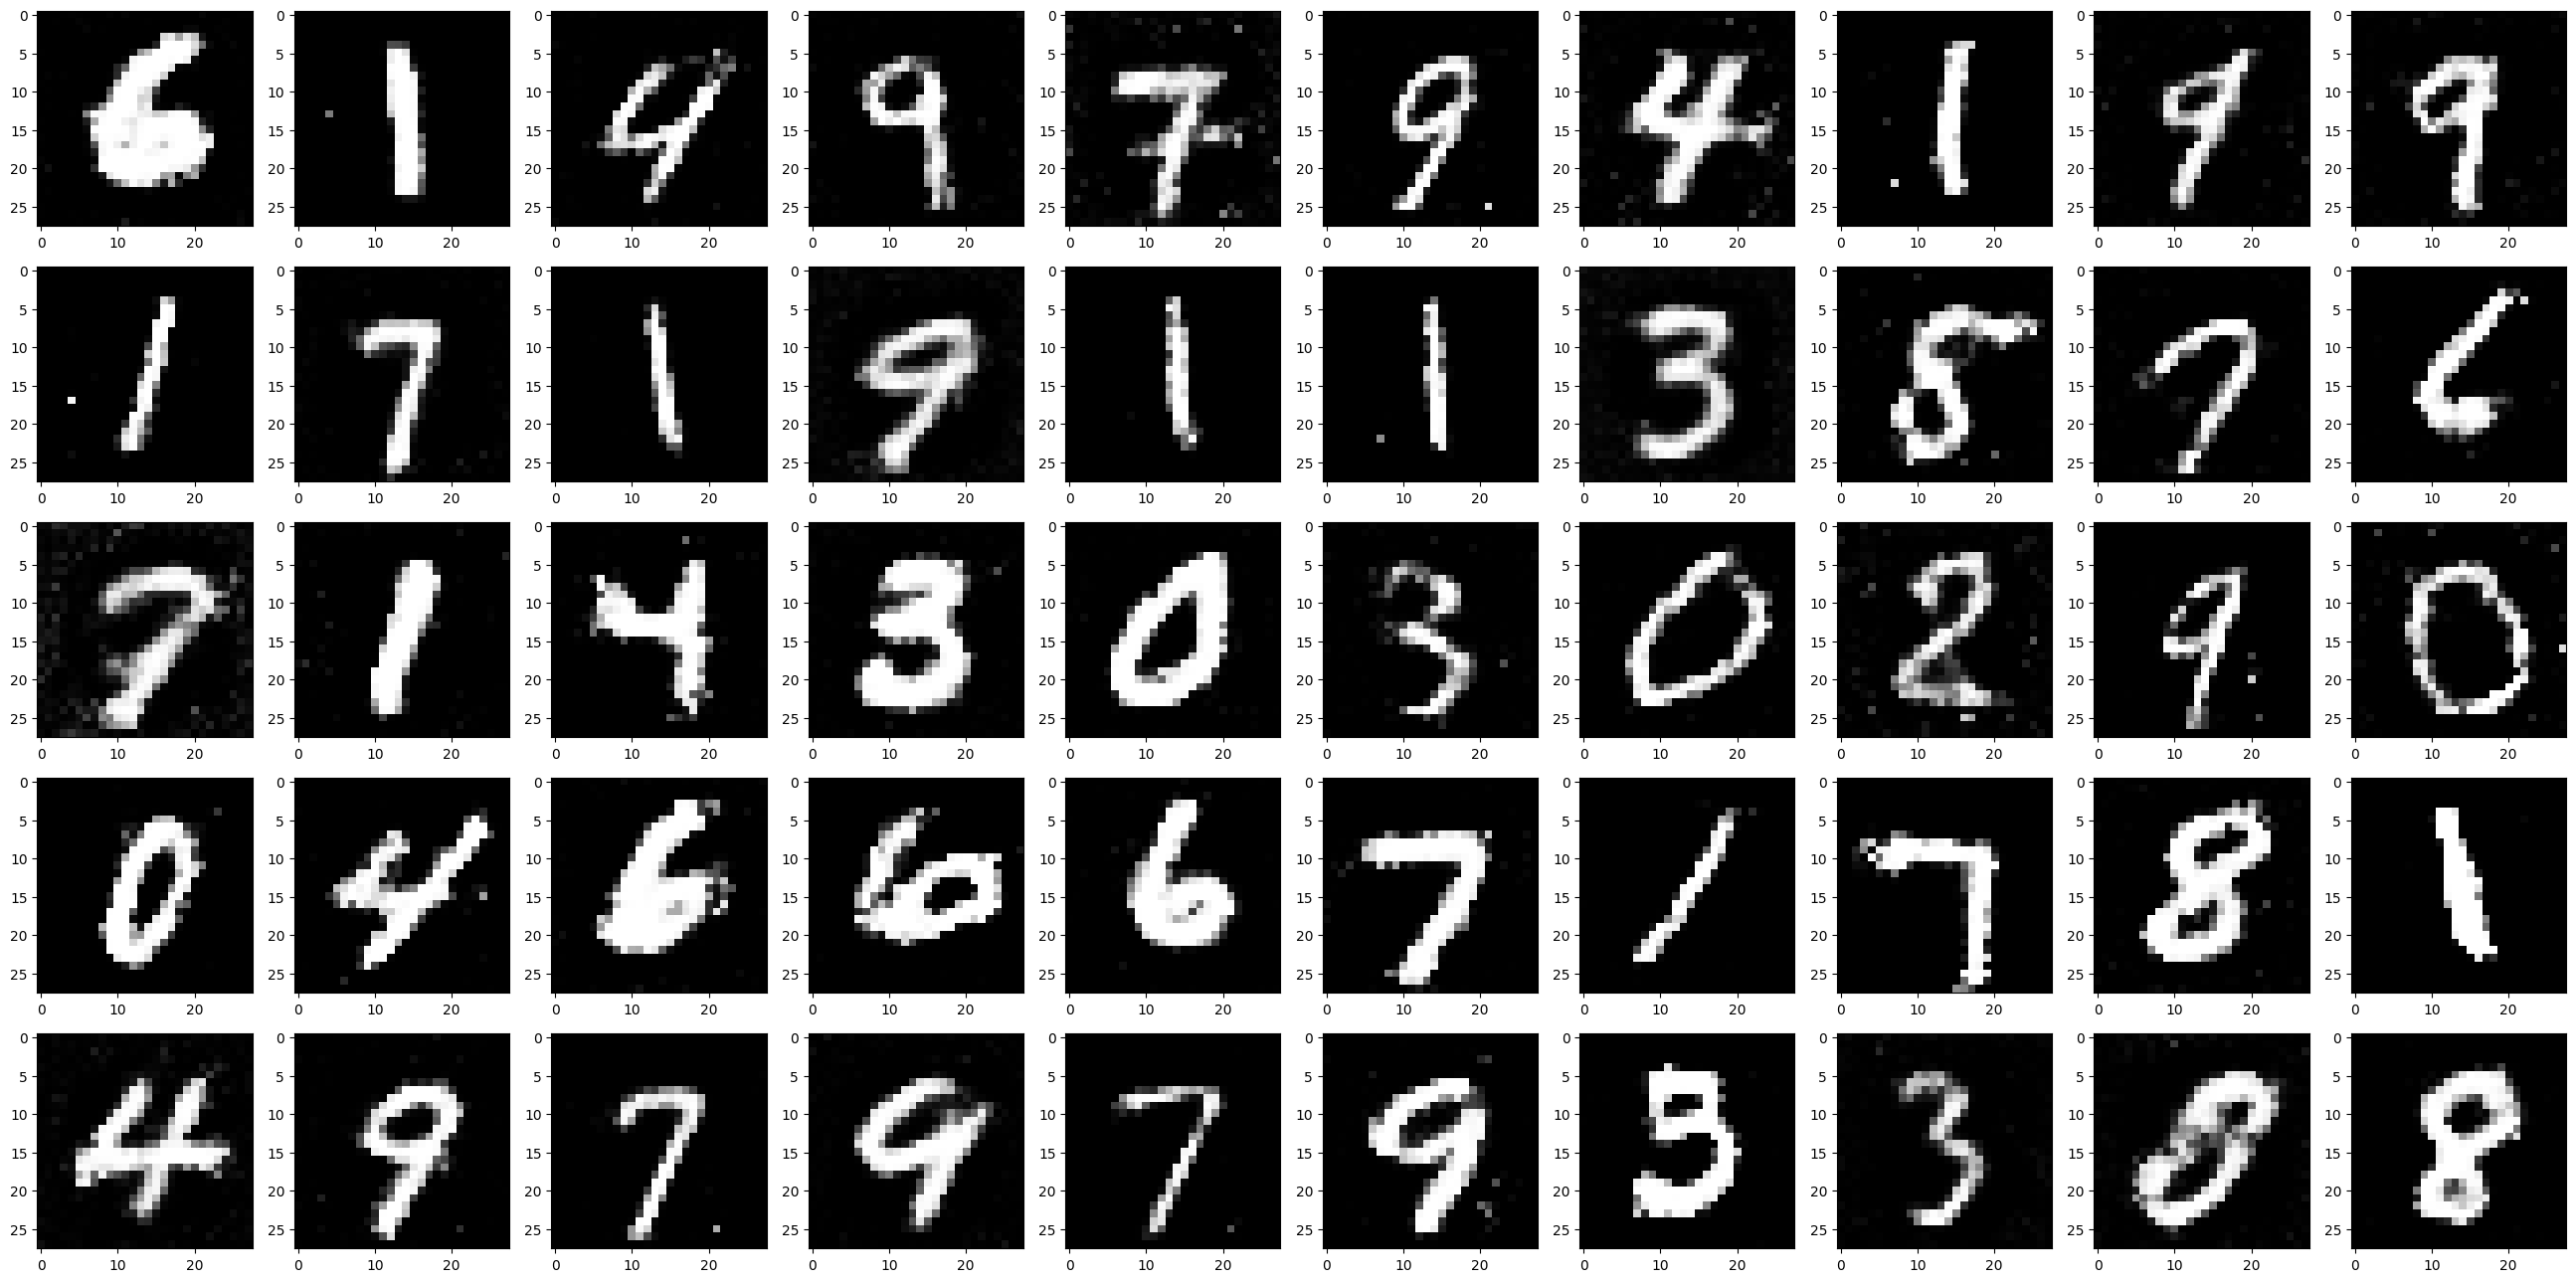

epoch[28/50], Generator Loss: 1.2000, Discriminator Loss: 1.1193


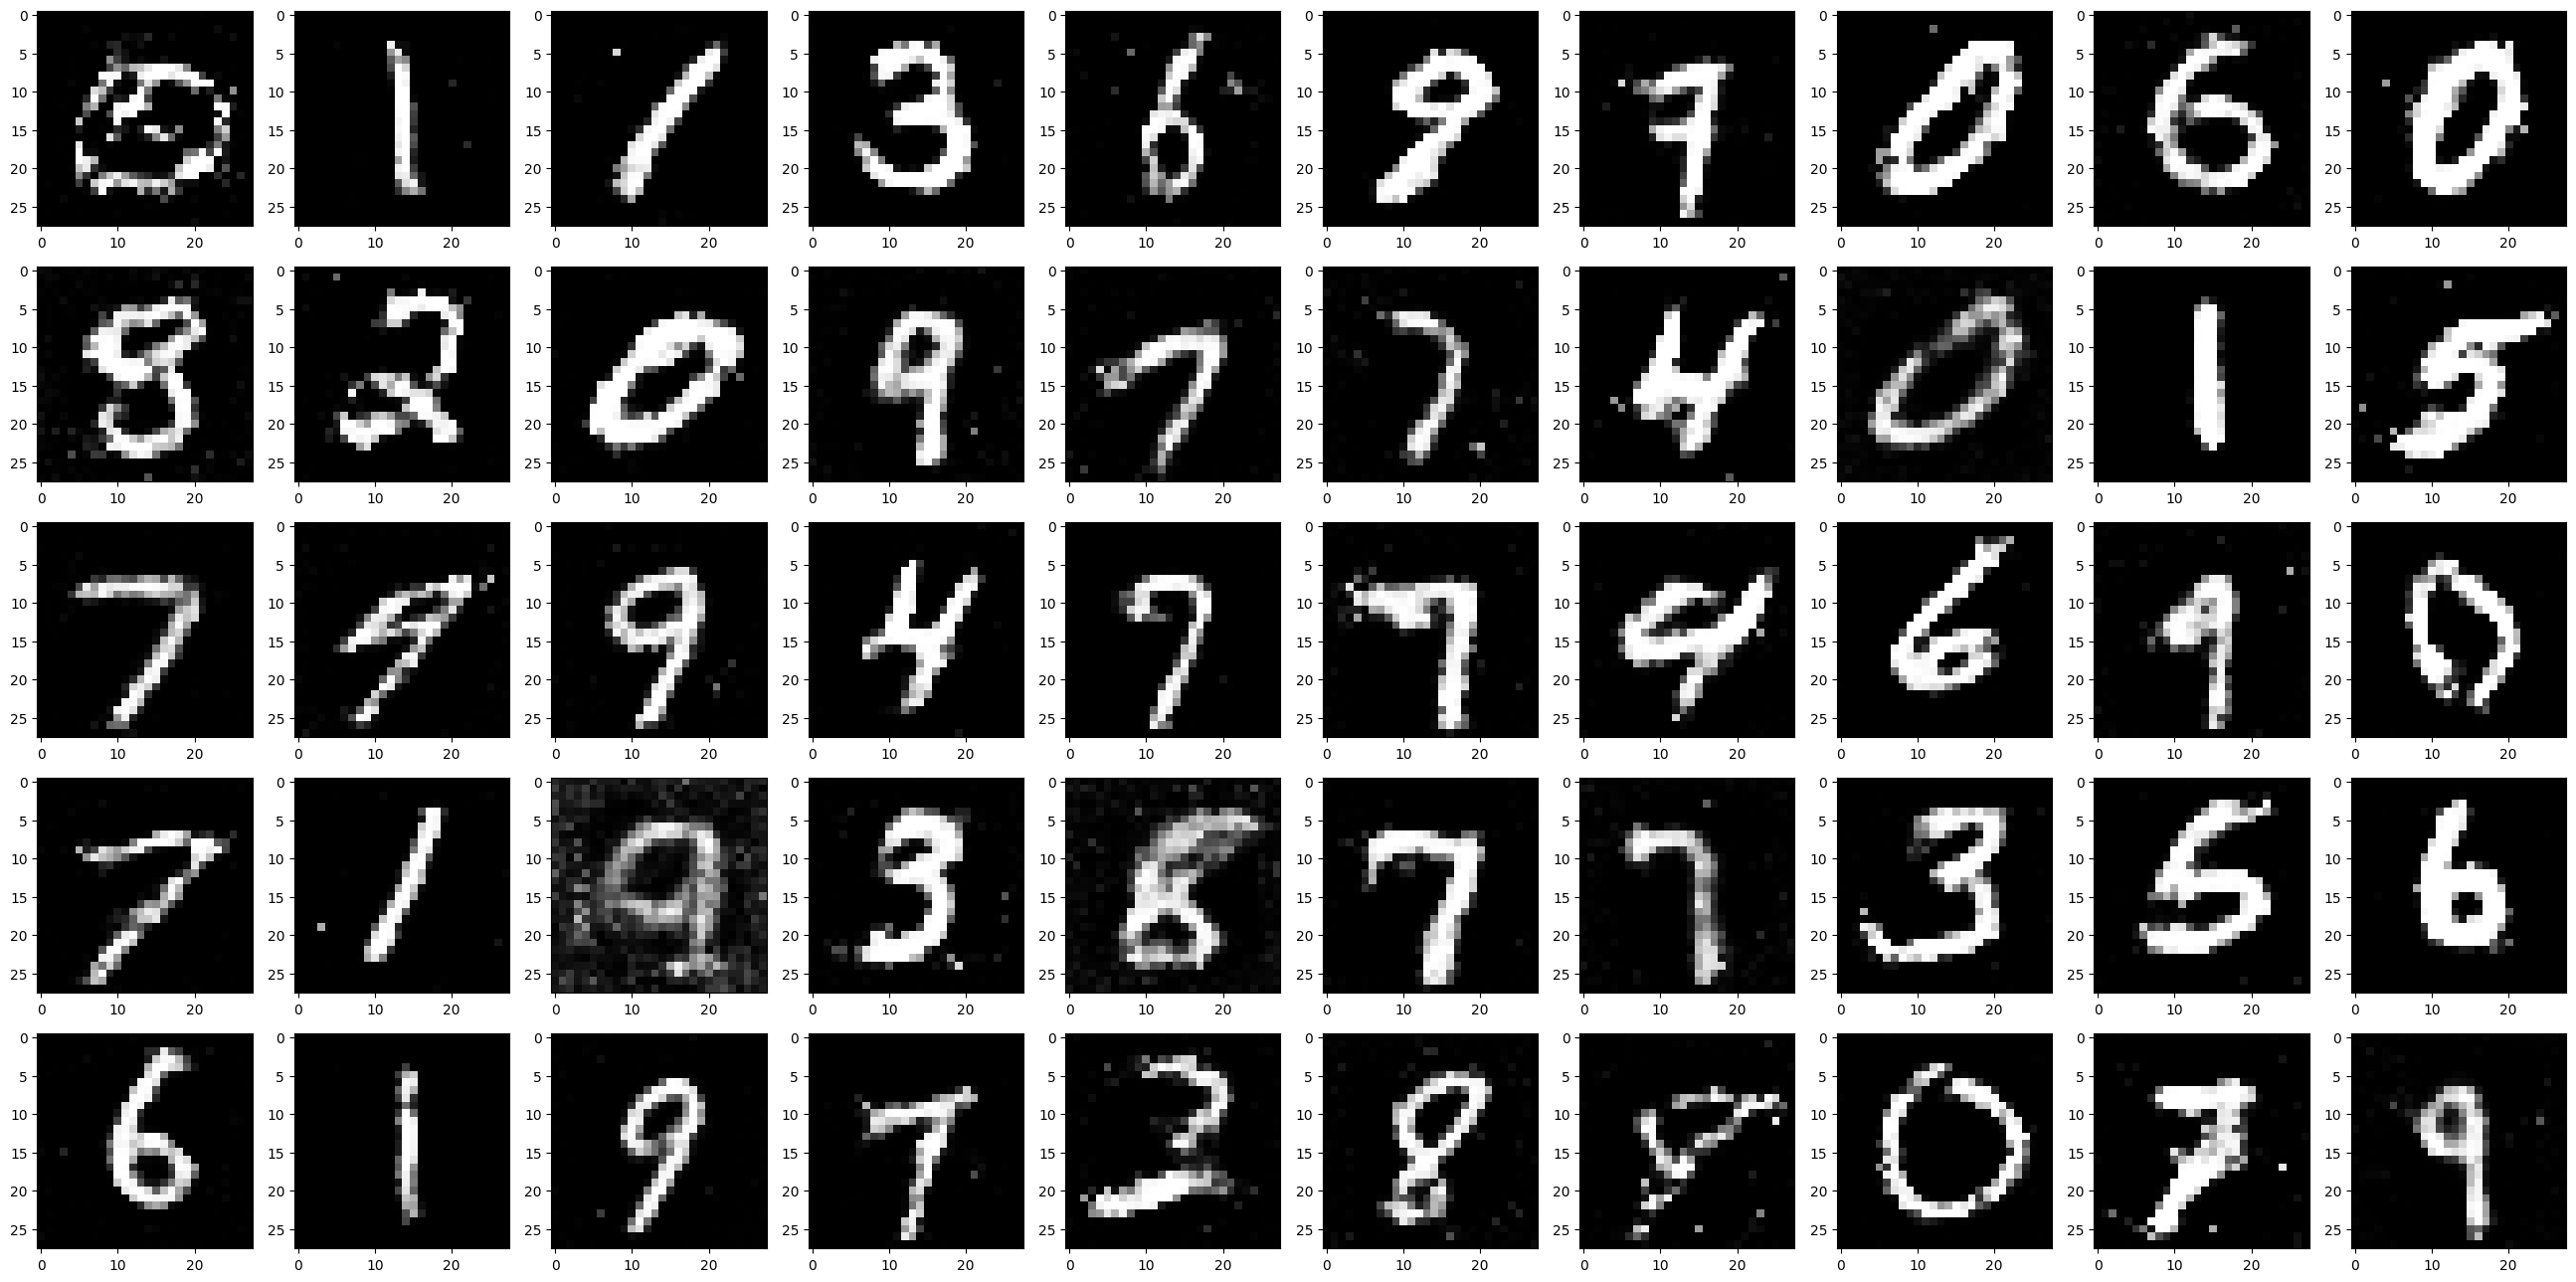

epoch[29/50], Generator Loss: 1.1173, Discriminator Loss: 1.0438


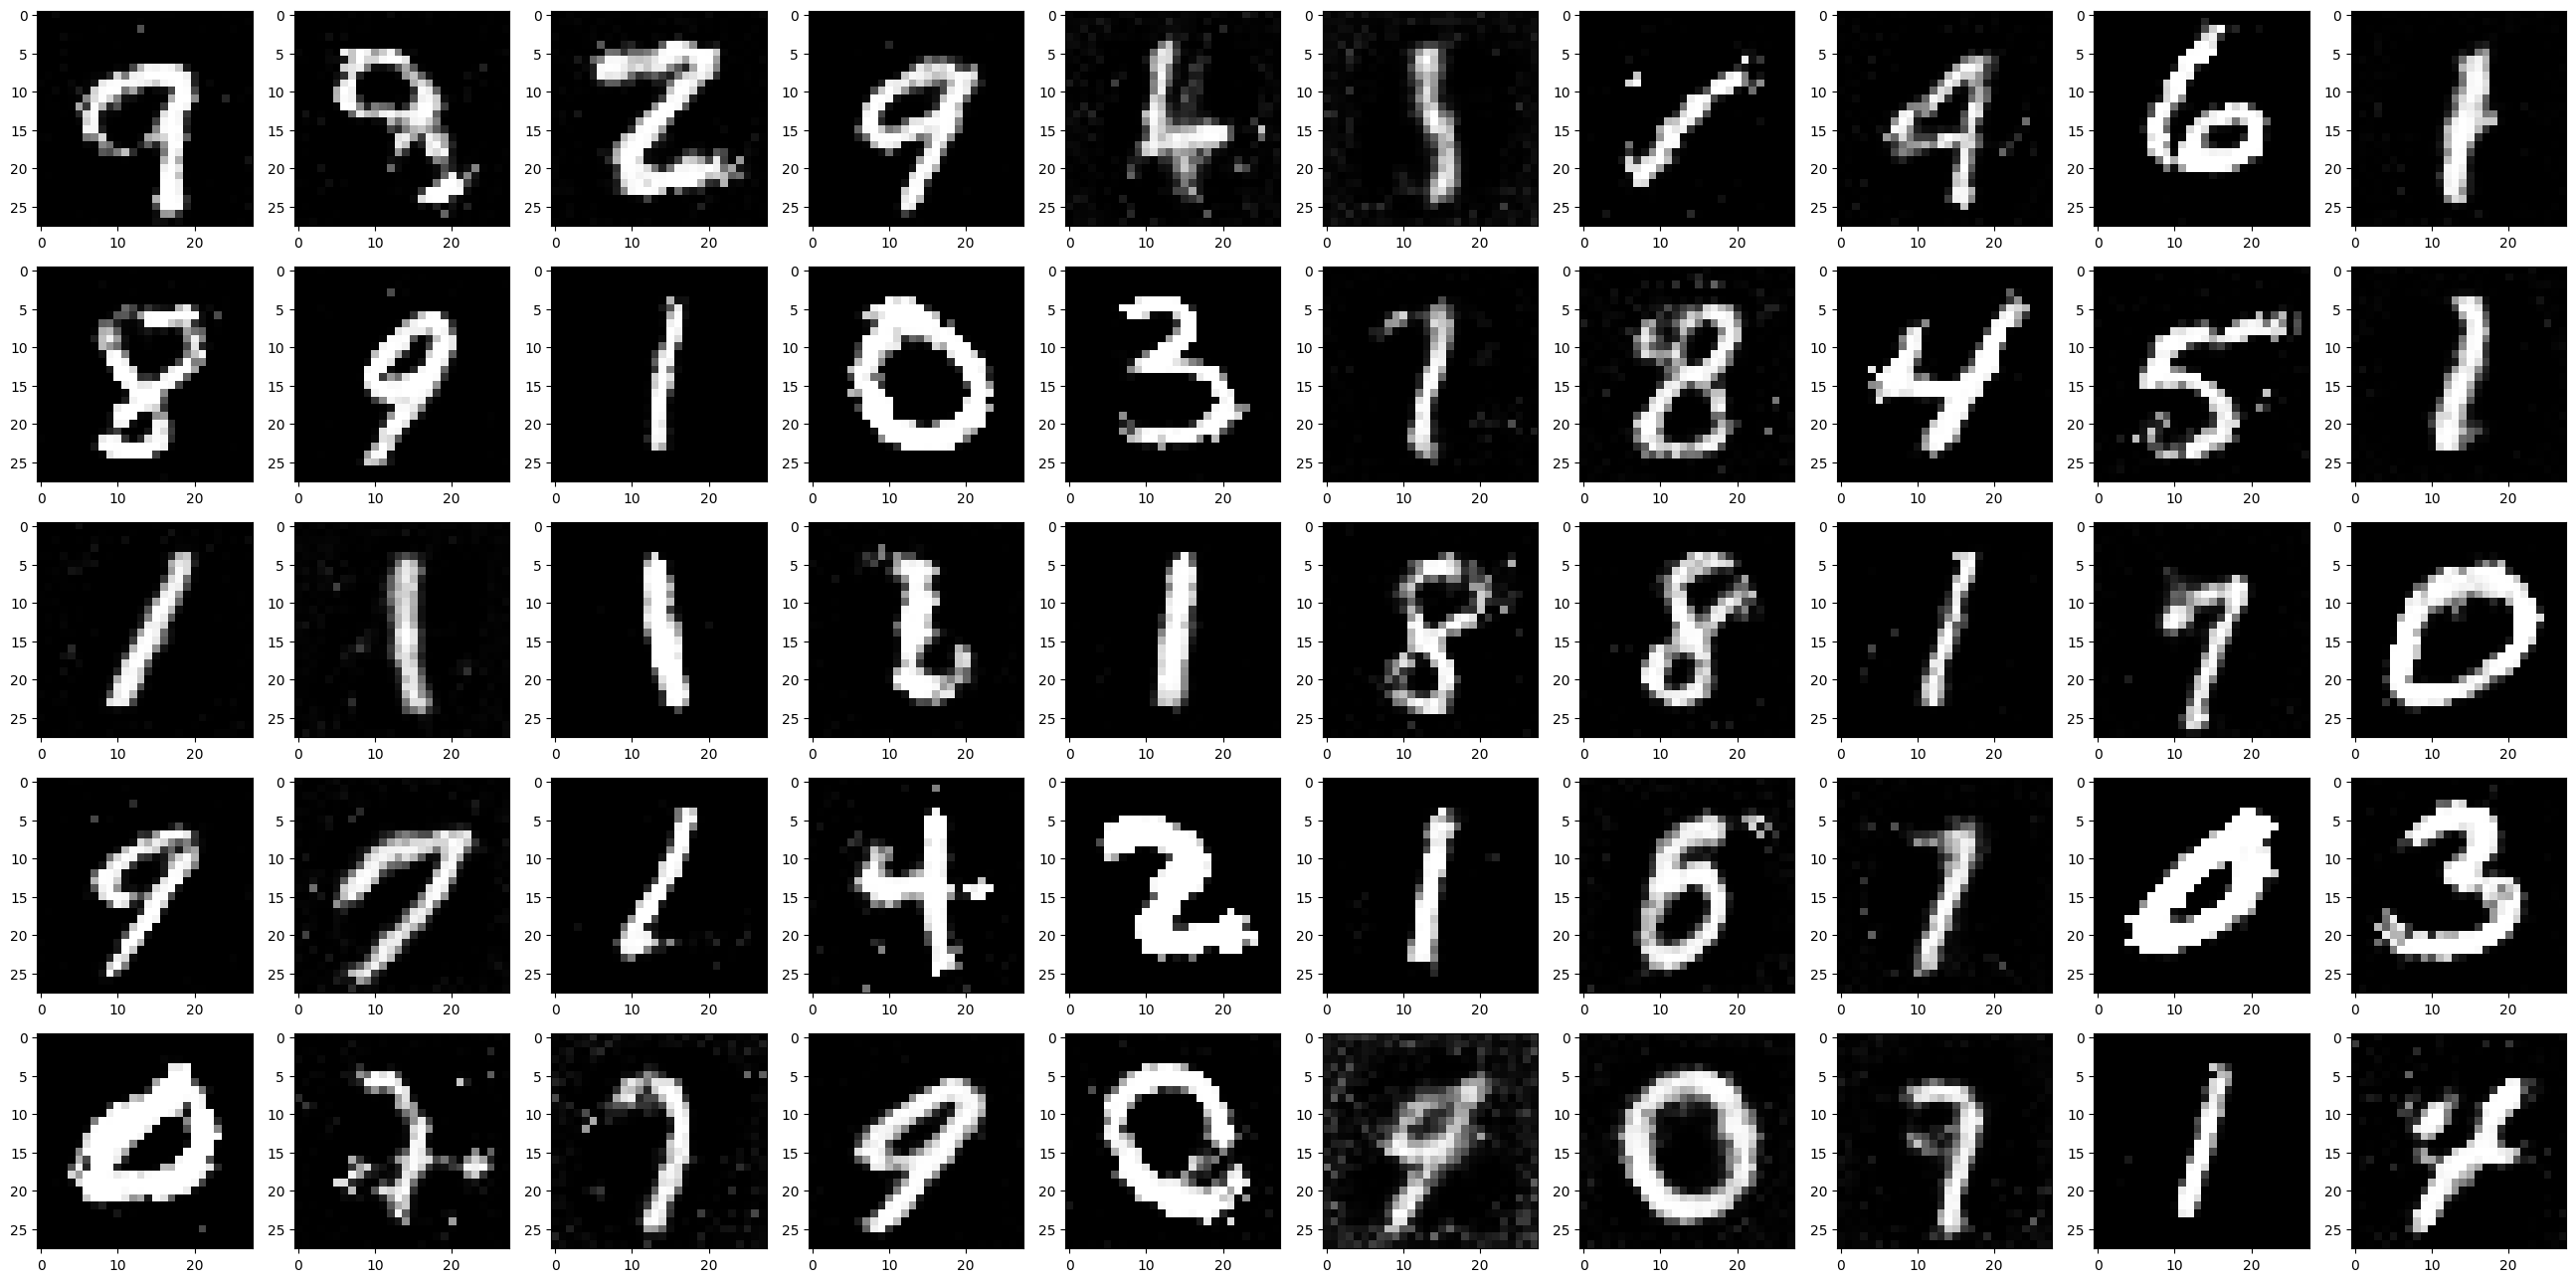

epoch[30/50], Generator Loss: 1.2686, Discriminator Loss: 1.1977


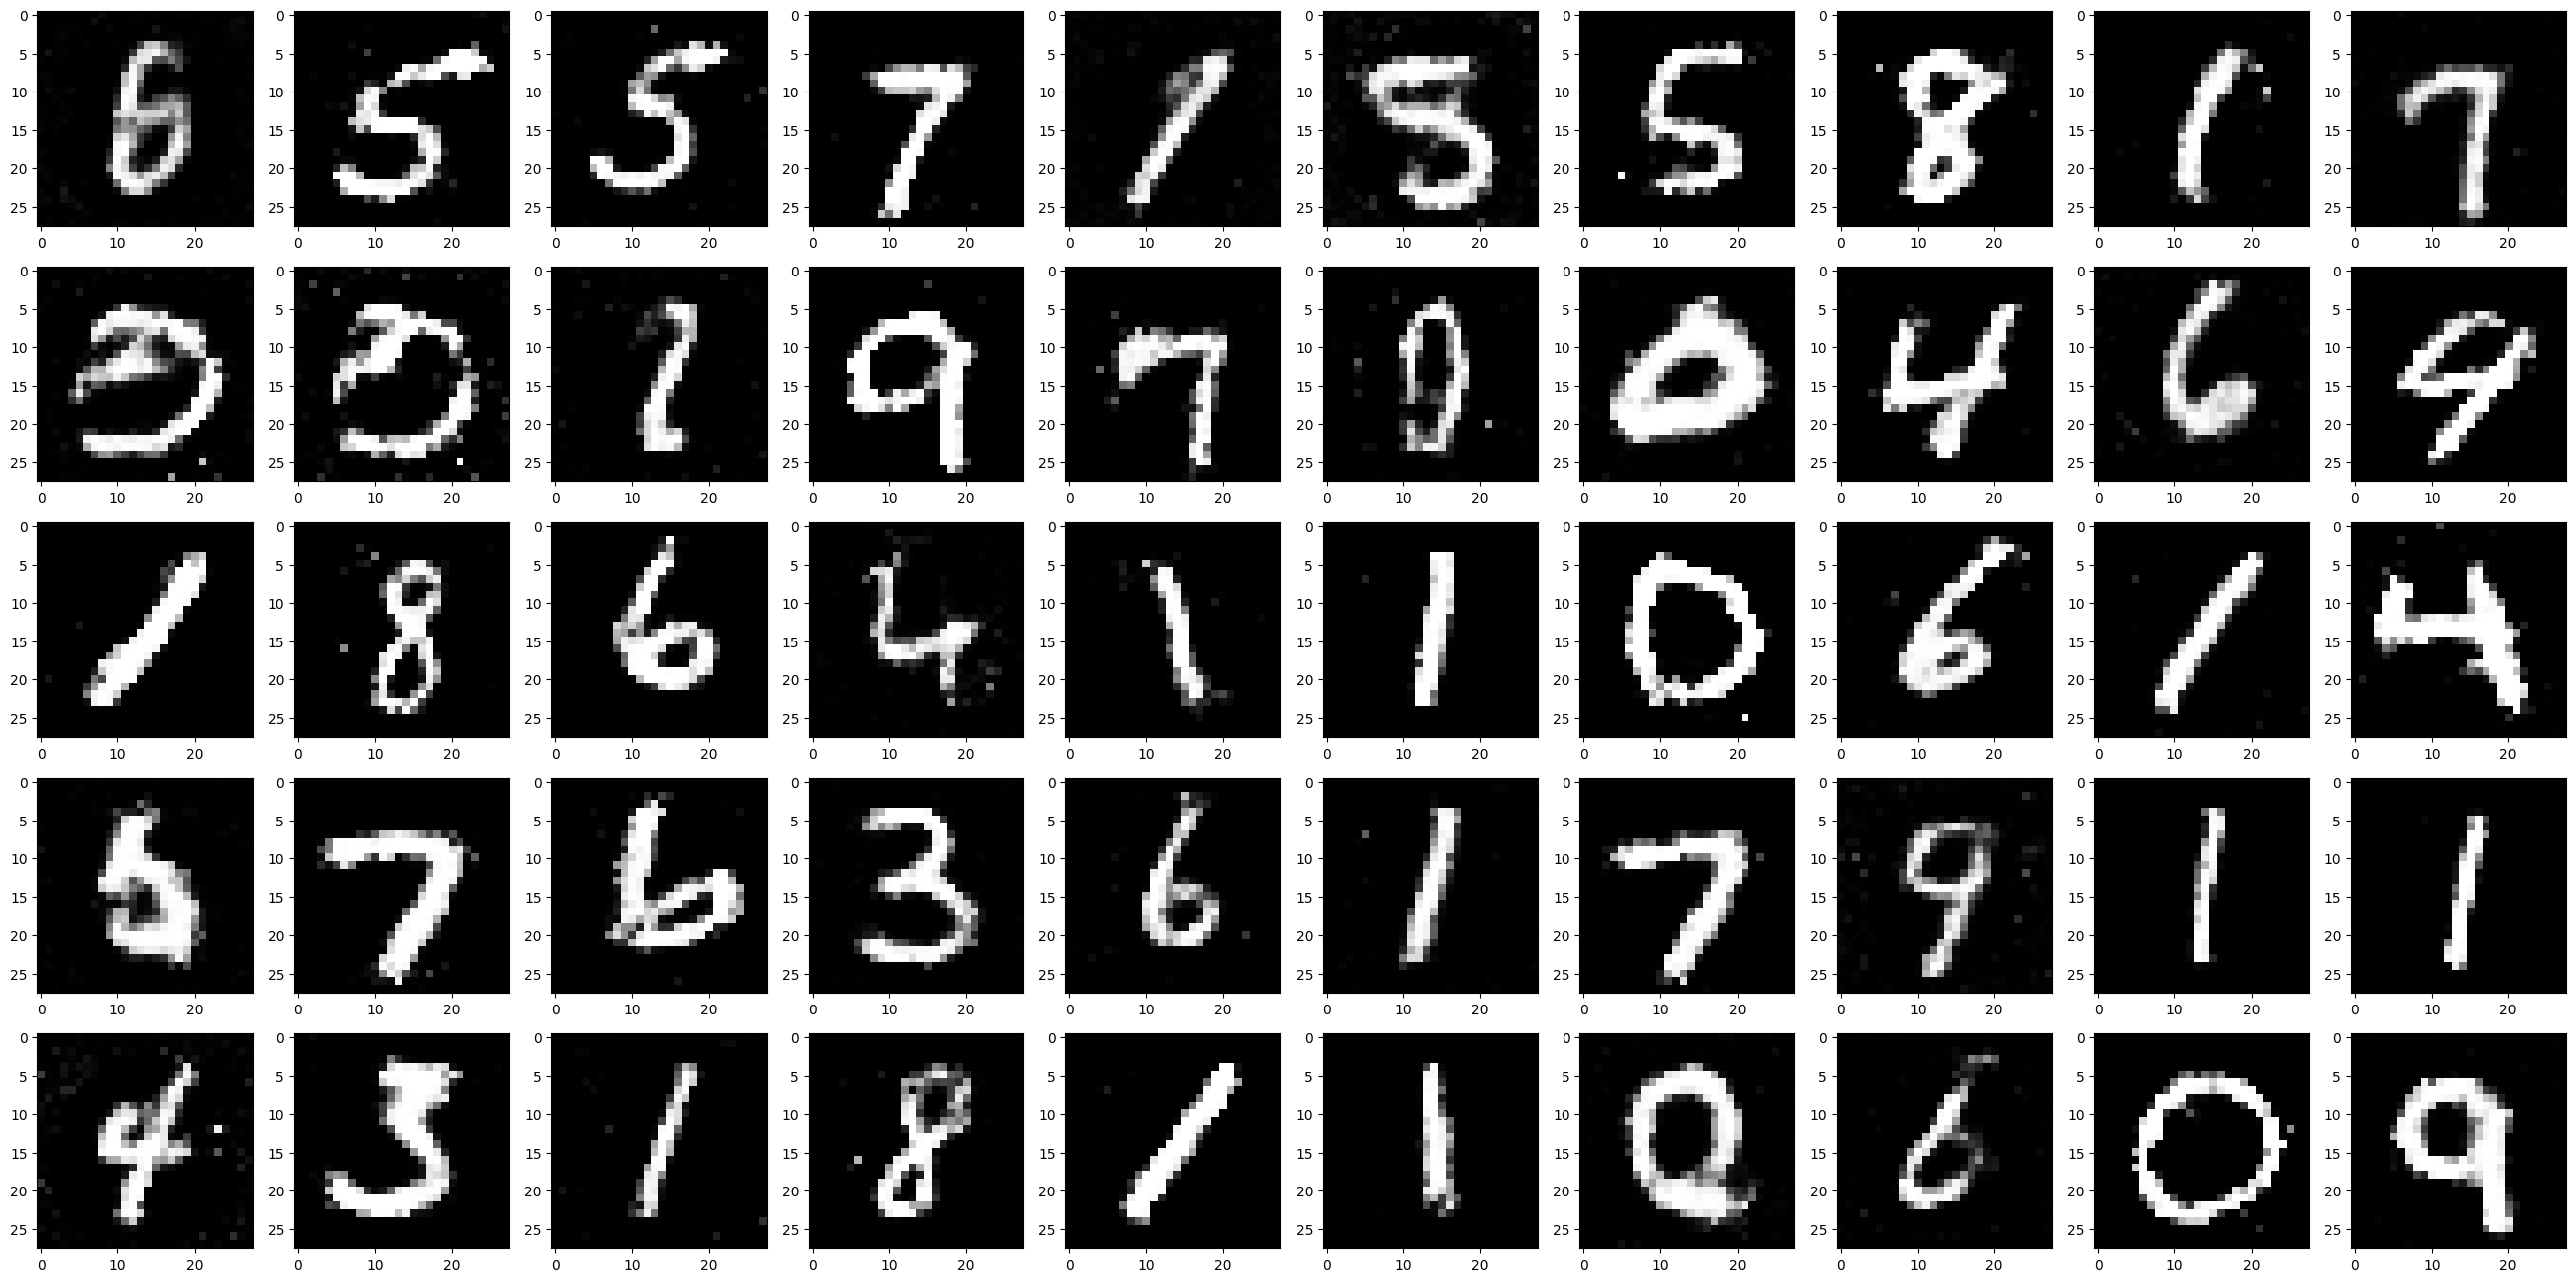

epoch[31/50], Generator Loss: 1.2637, Discriminator Loss: 0.8435


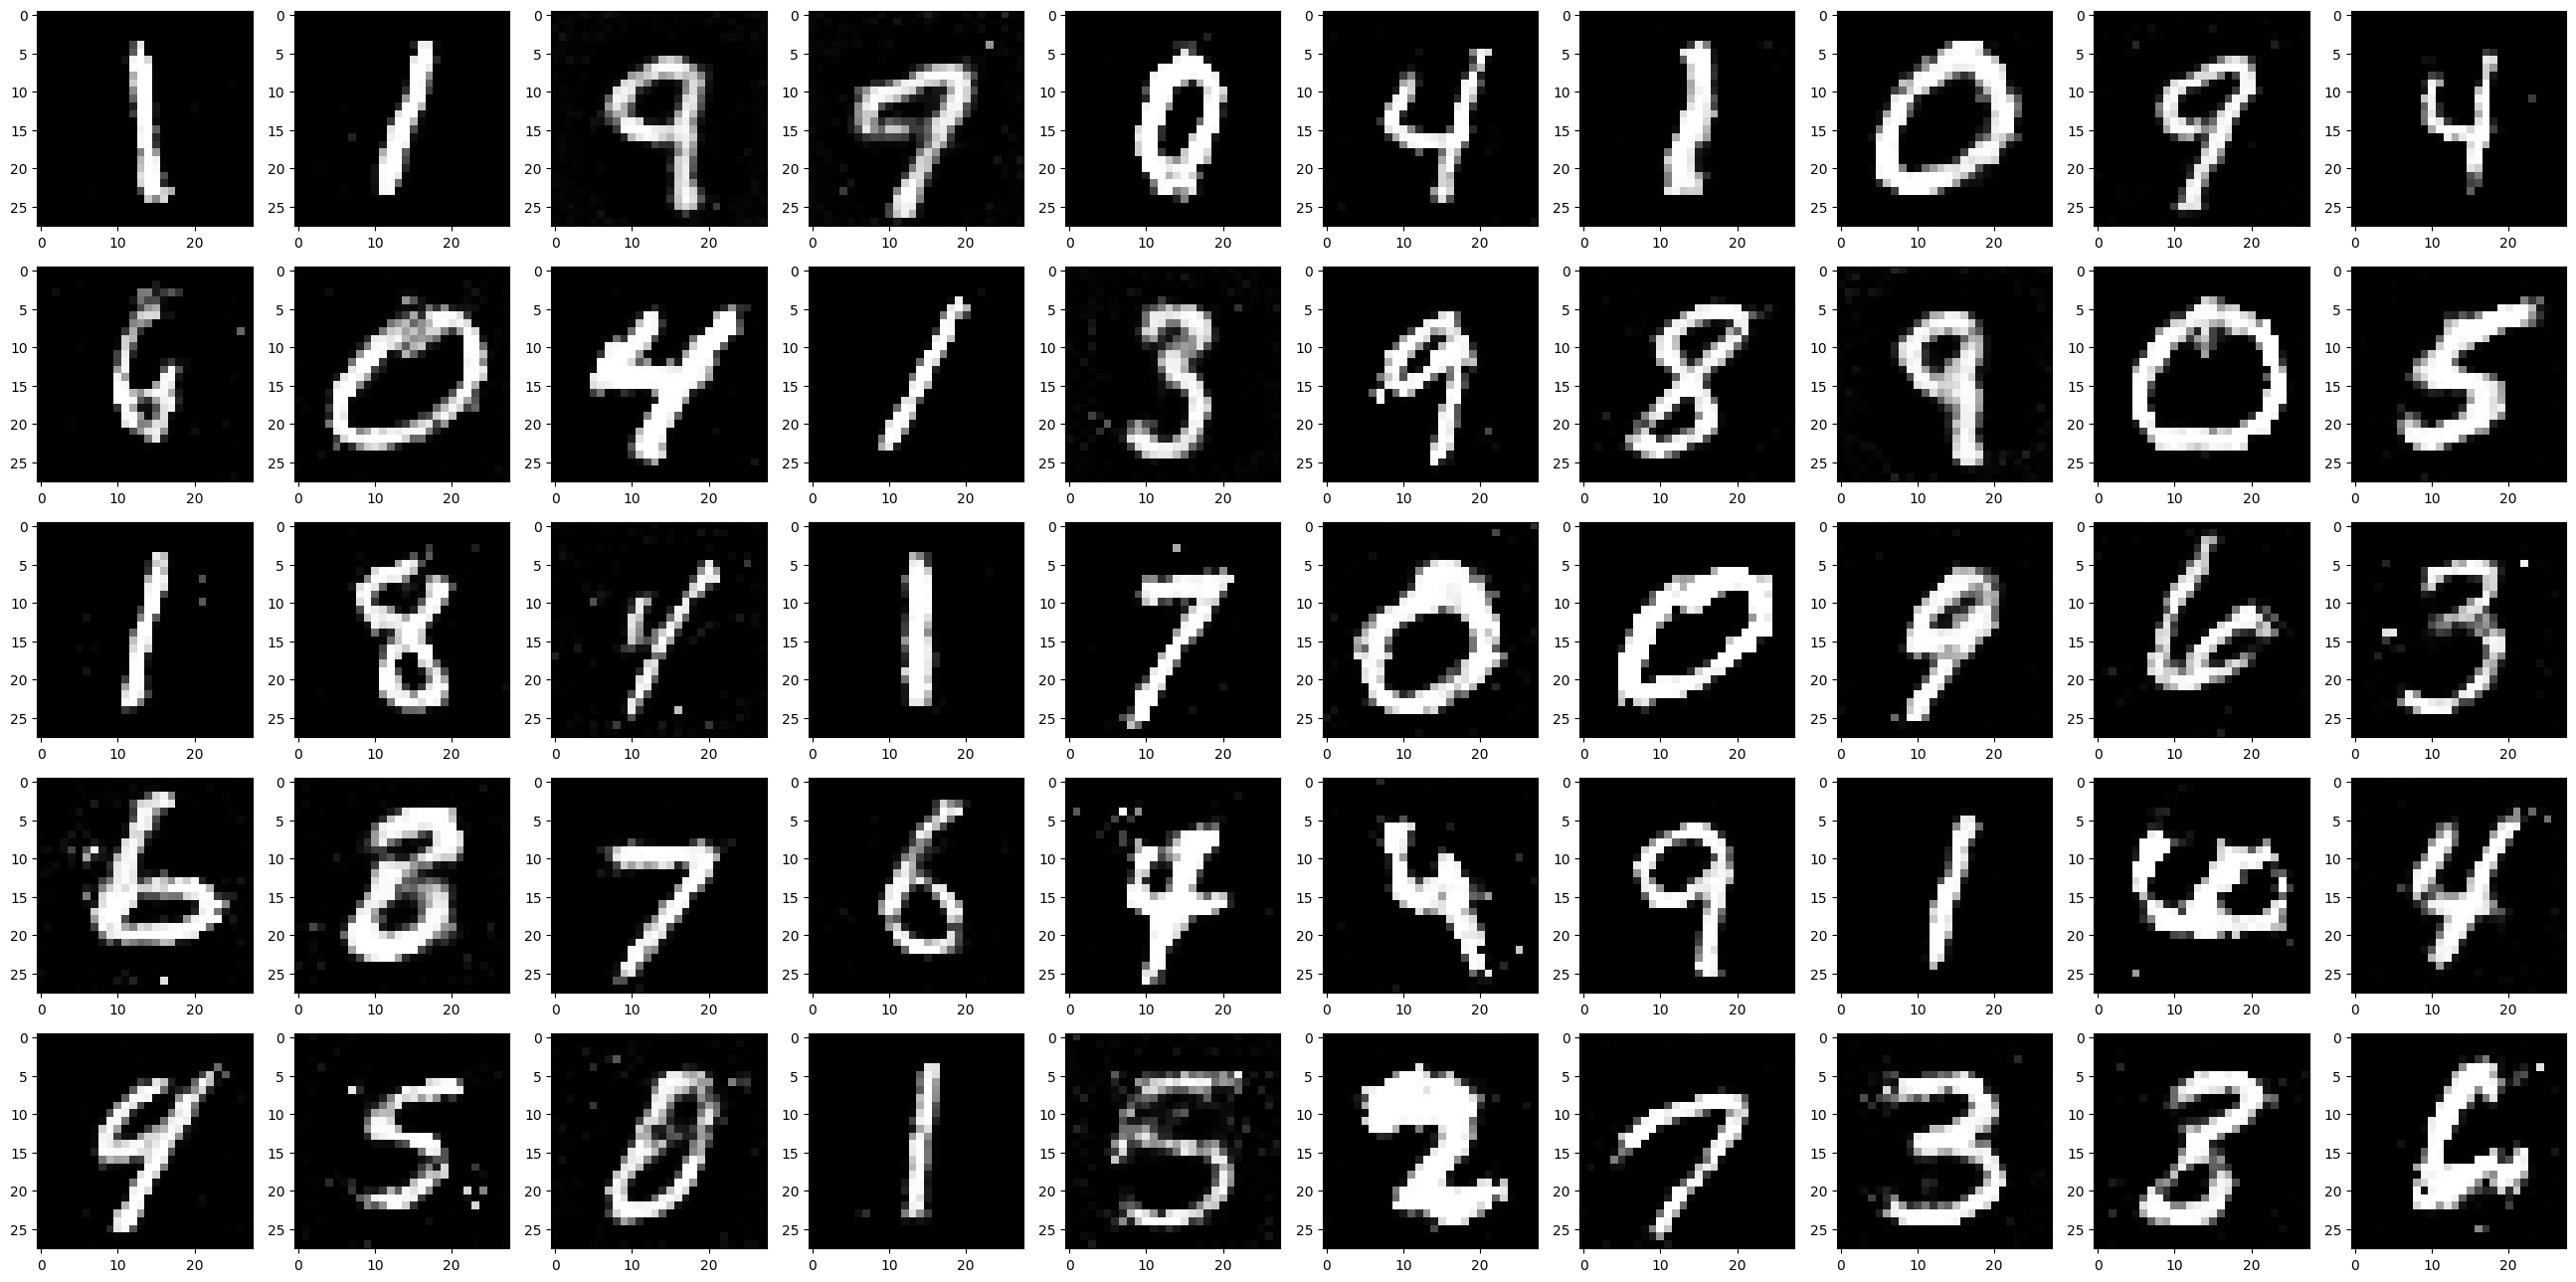

epoch[32/50], Generator Loss: 1.1996, Discriminator Loss: 1.2455


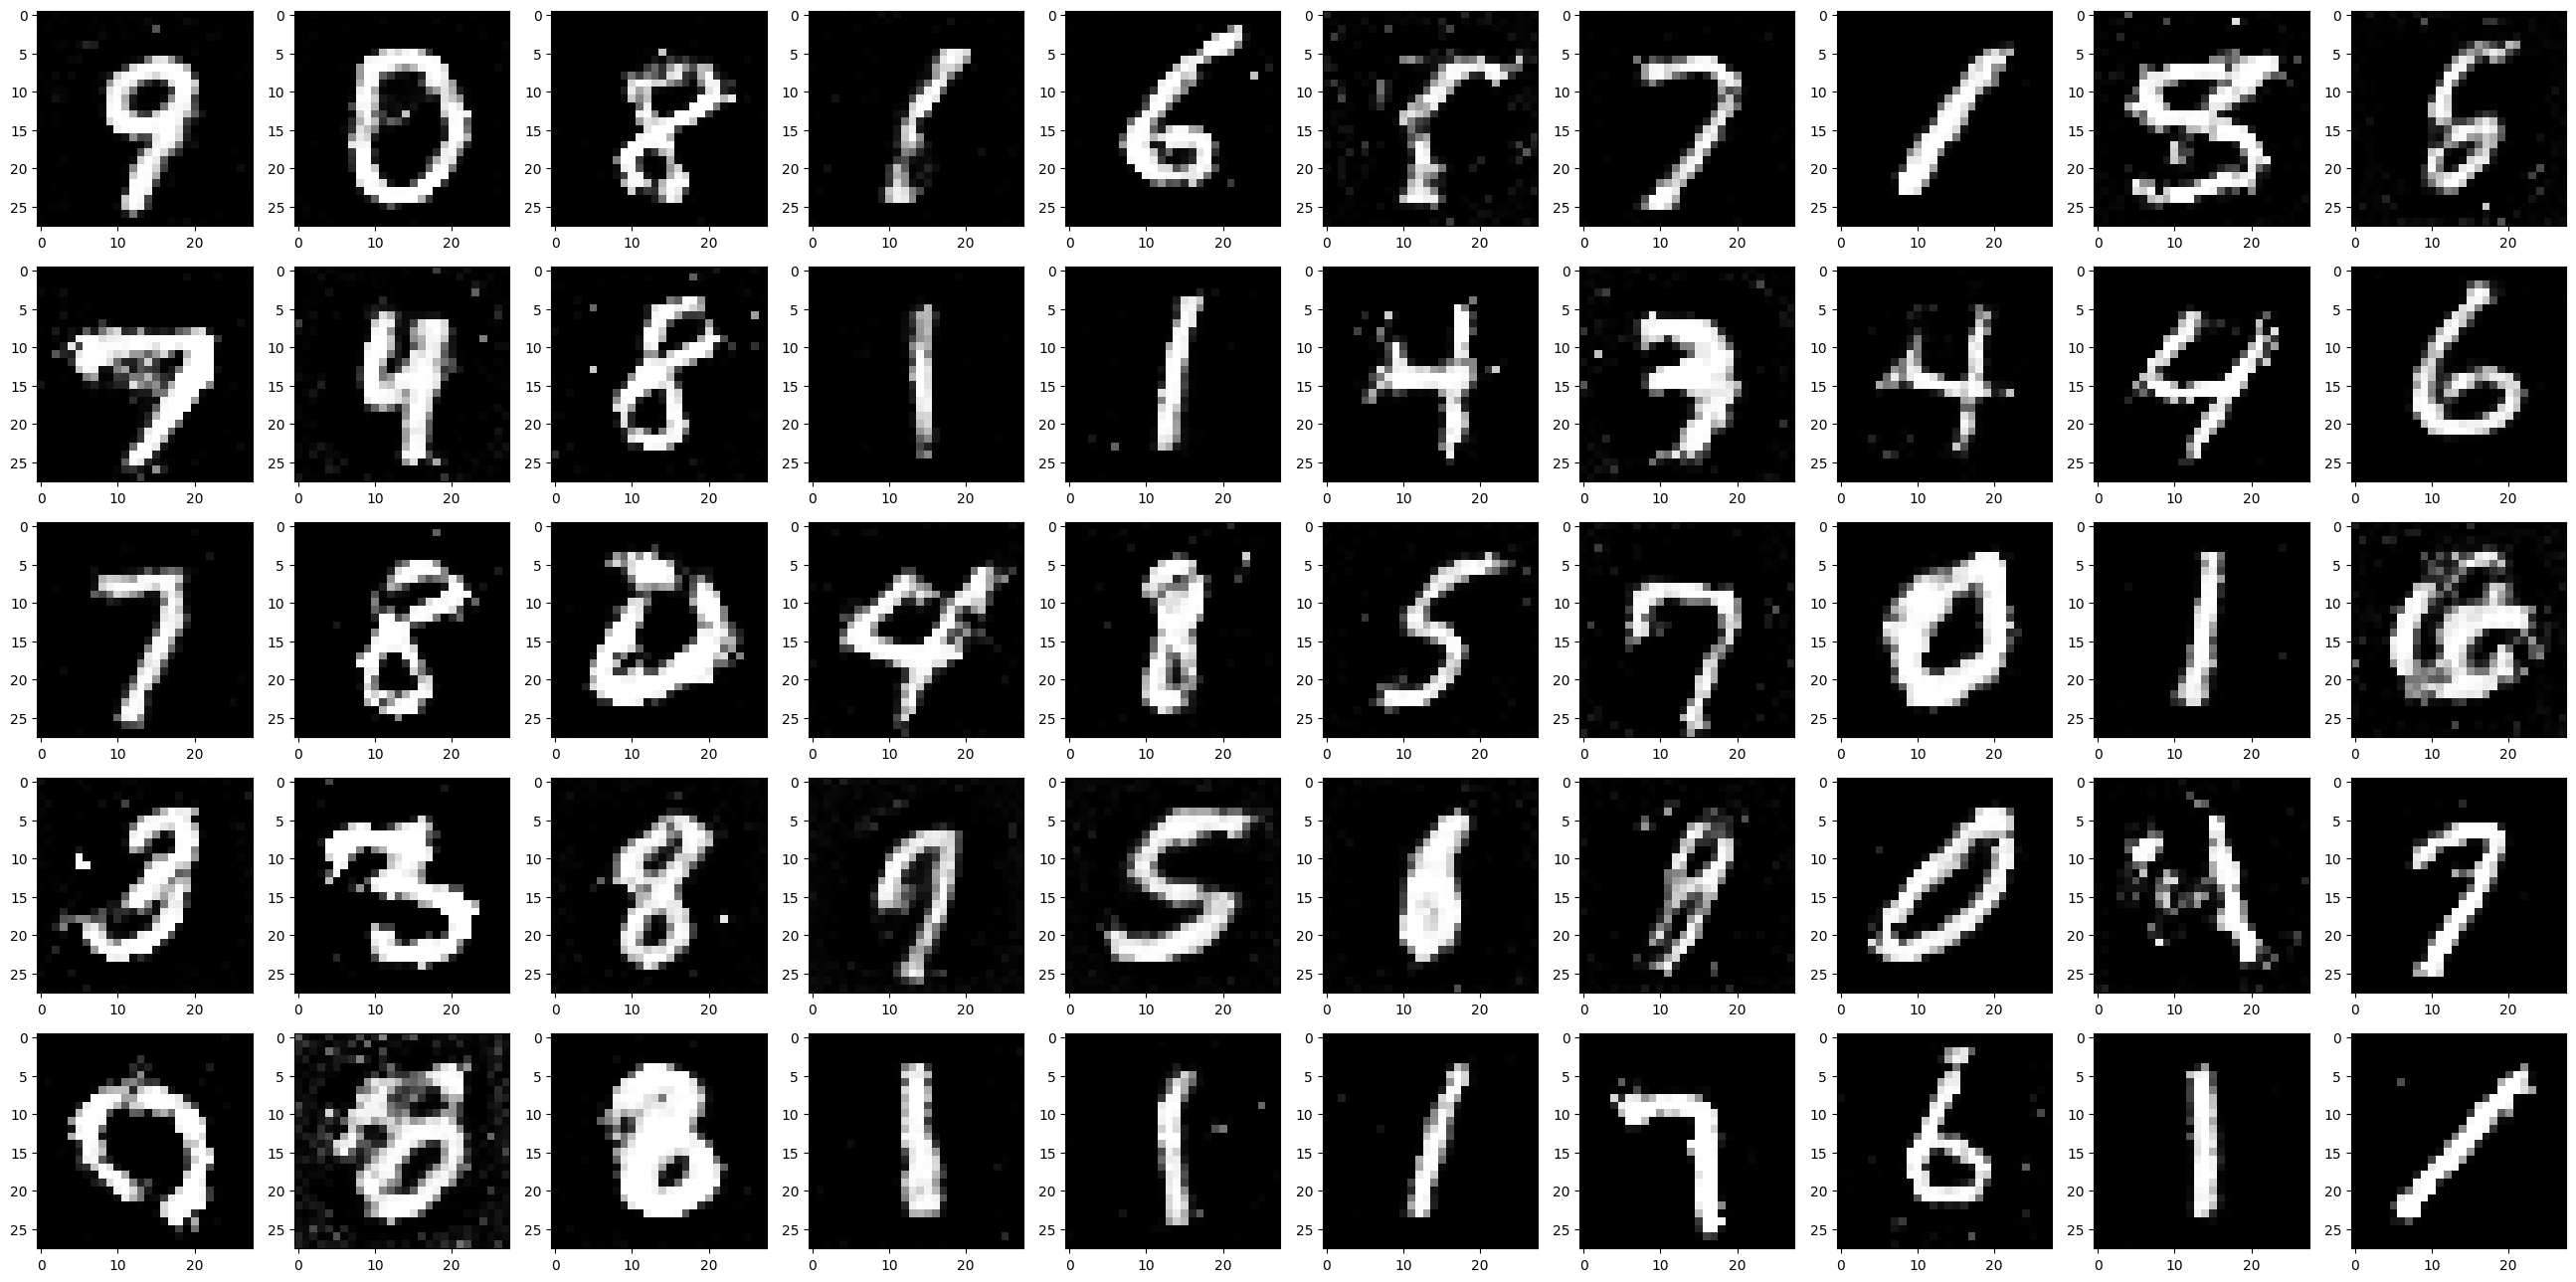

epoch[33/50], Generator Loss: 1.4197, Discriminator Loss: 1.8135


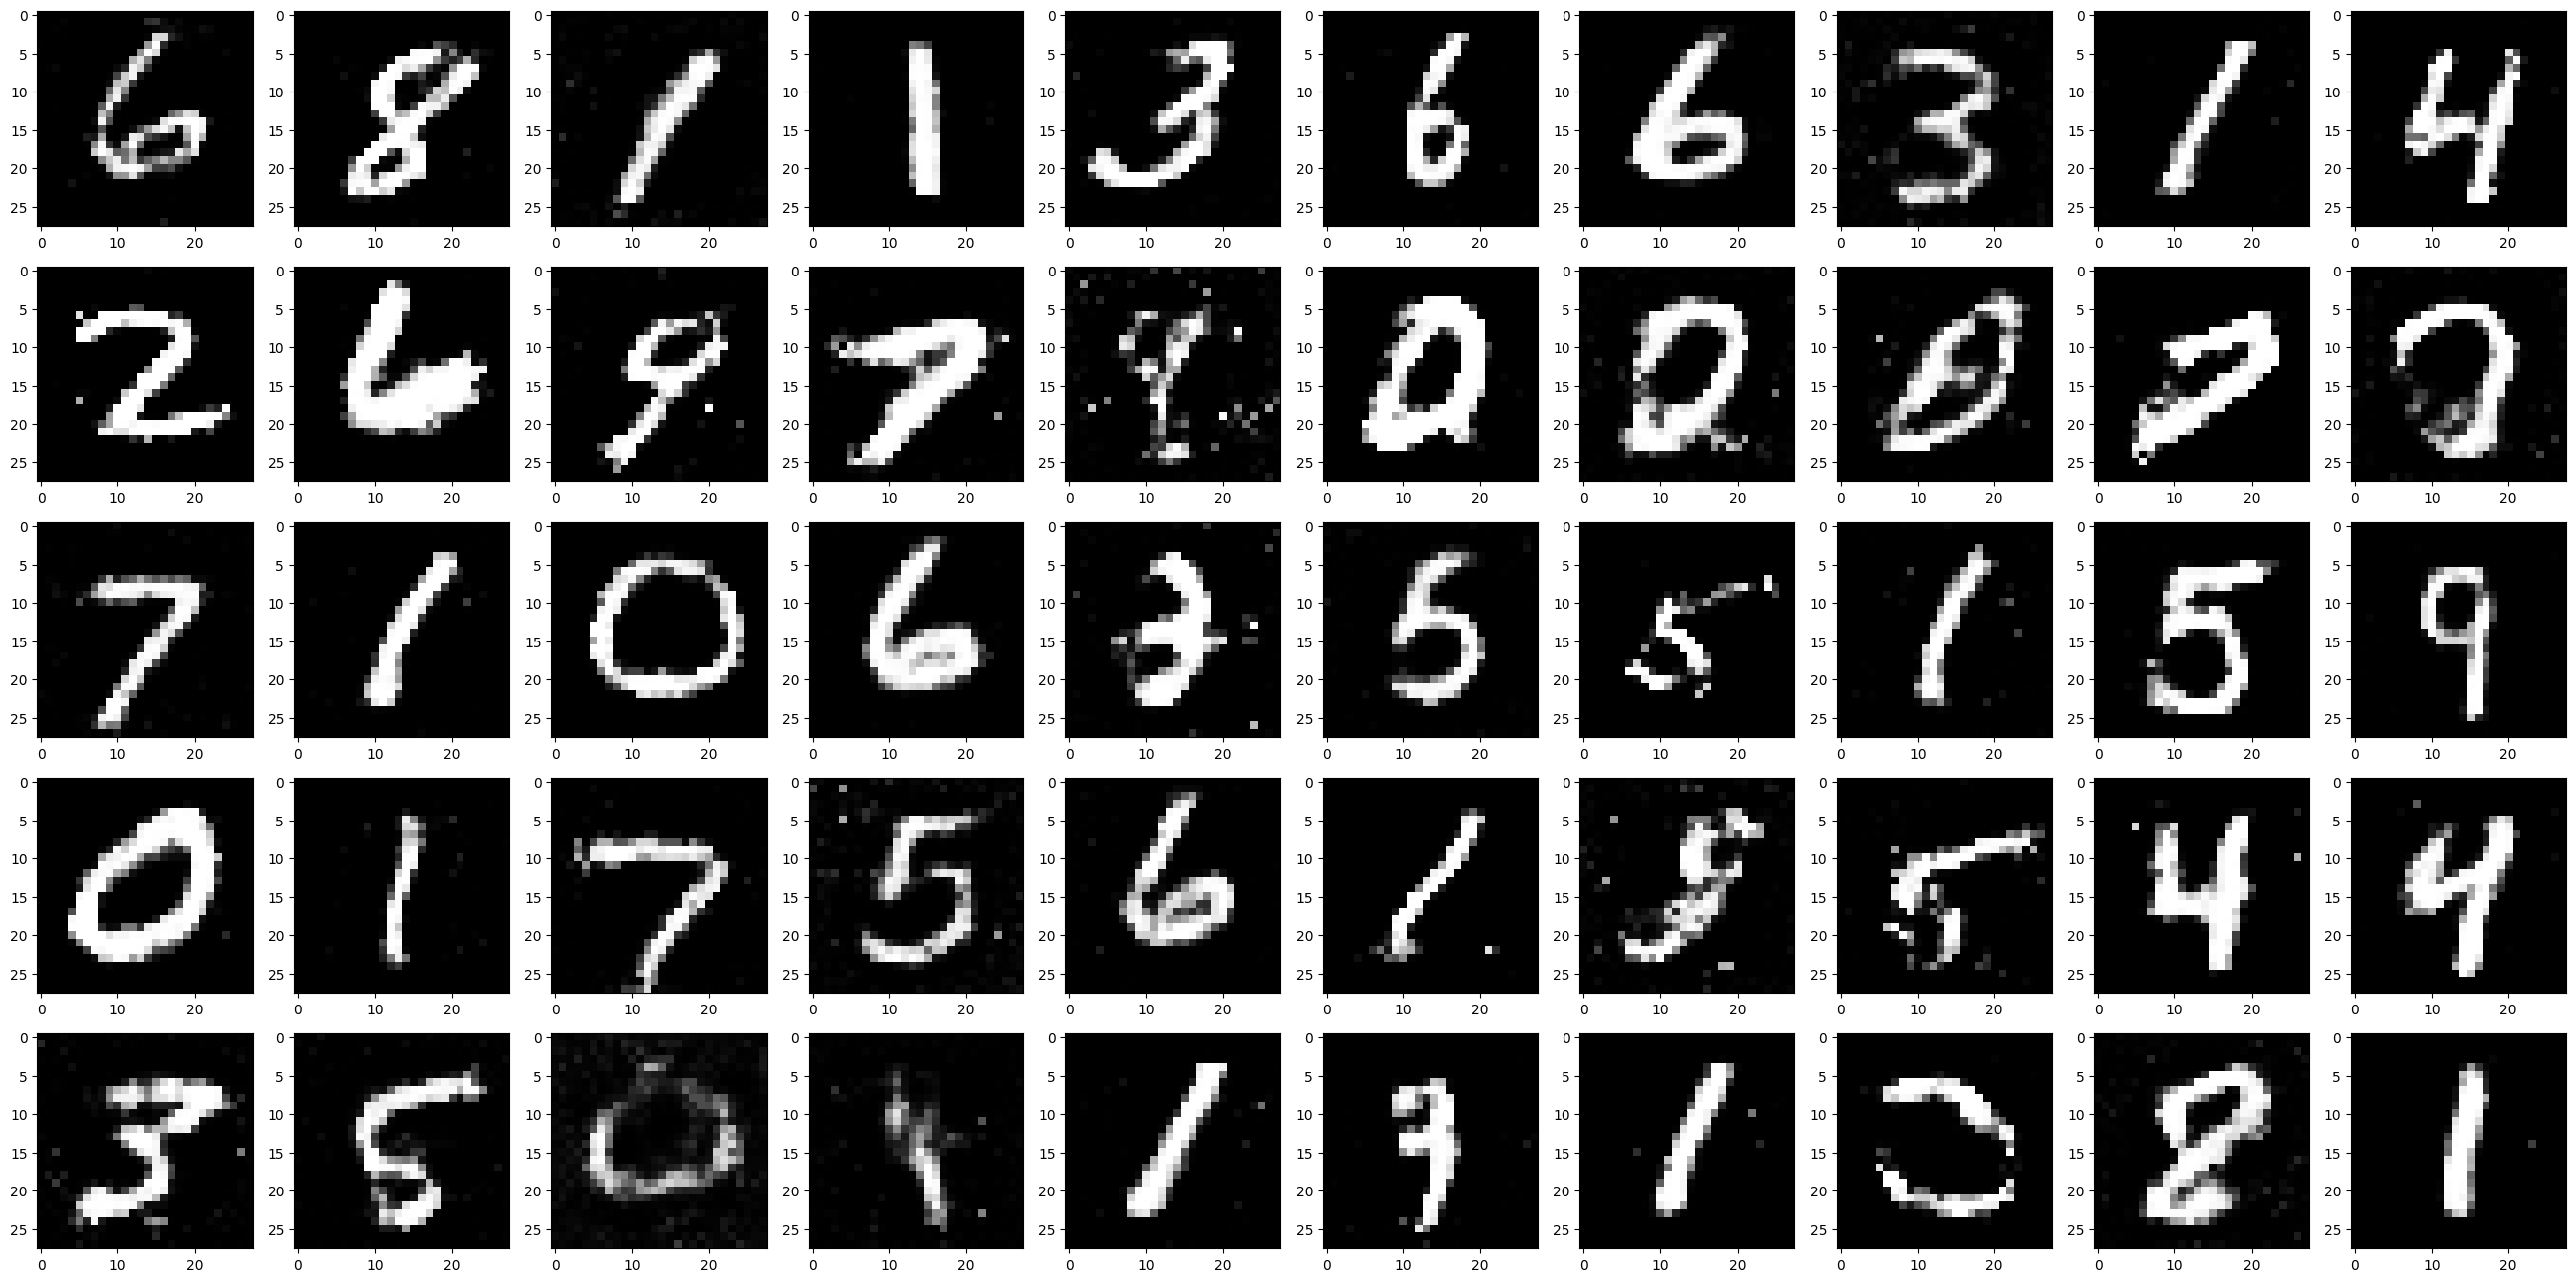

epoch[34/50], Generator Loss: 1.1635, Discriminator Loss: 1.1446


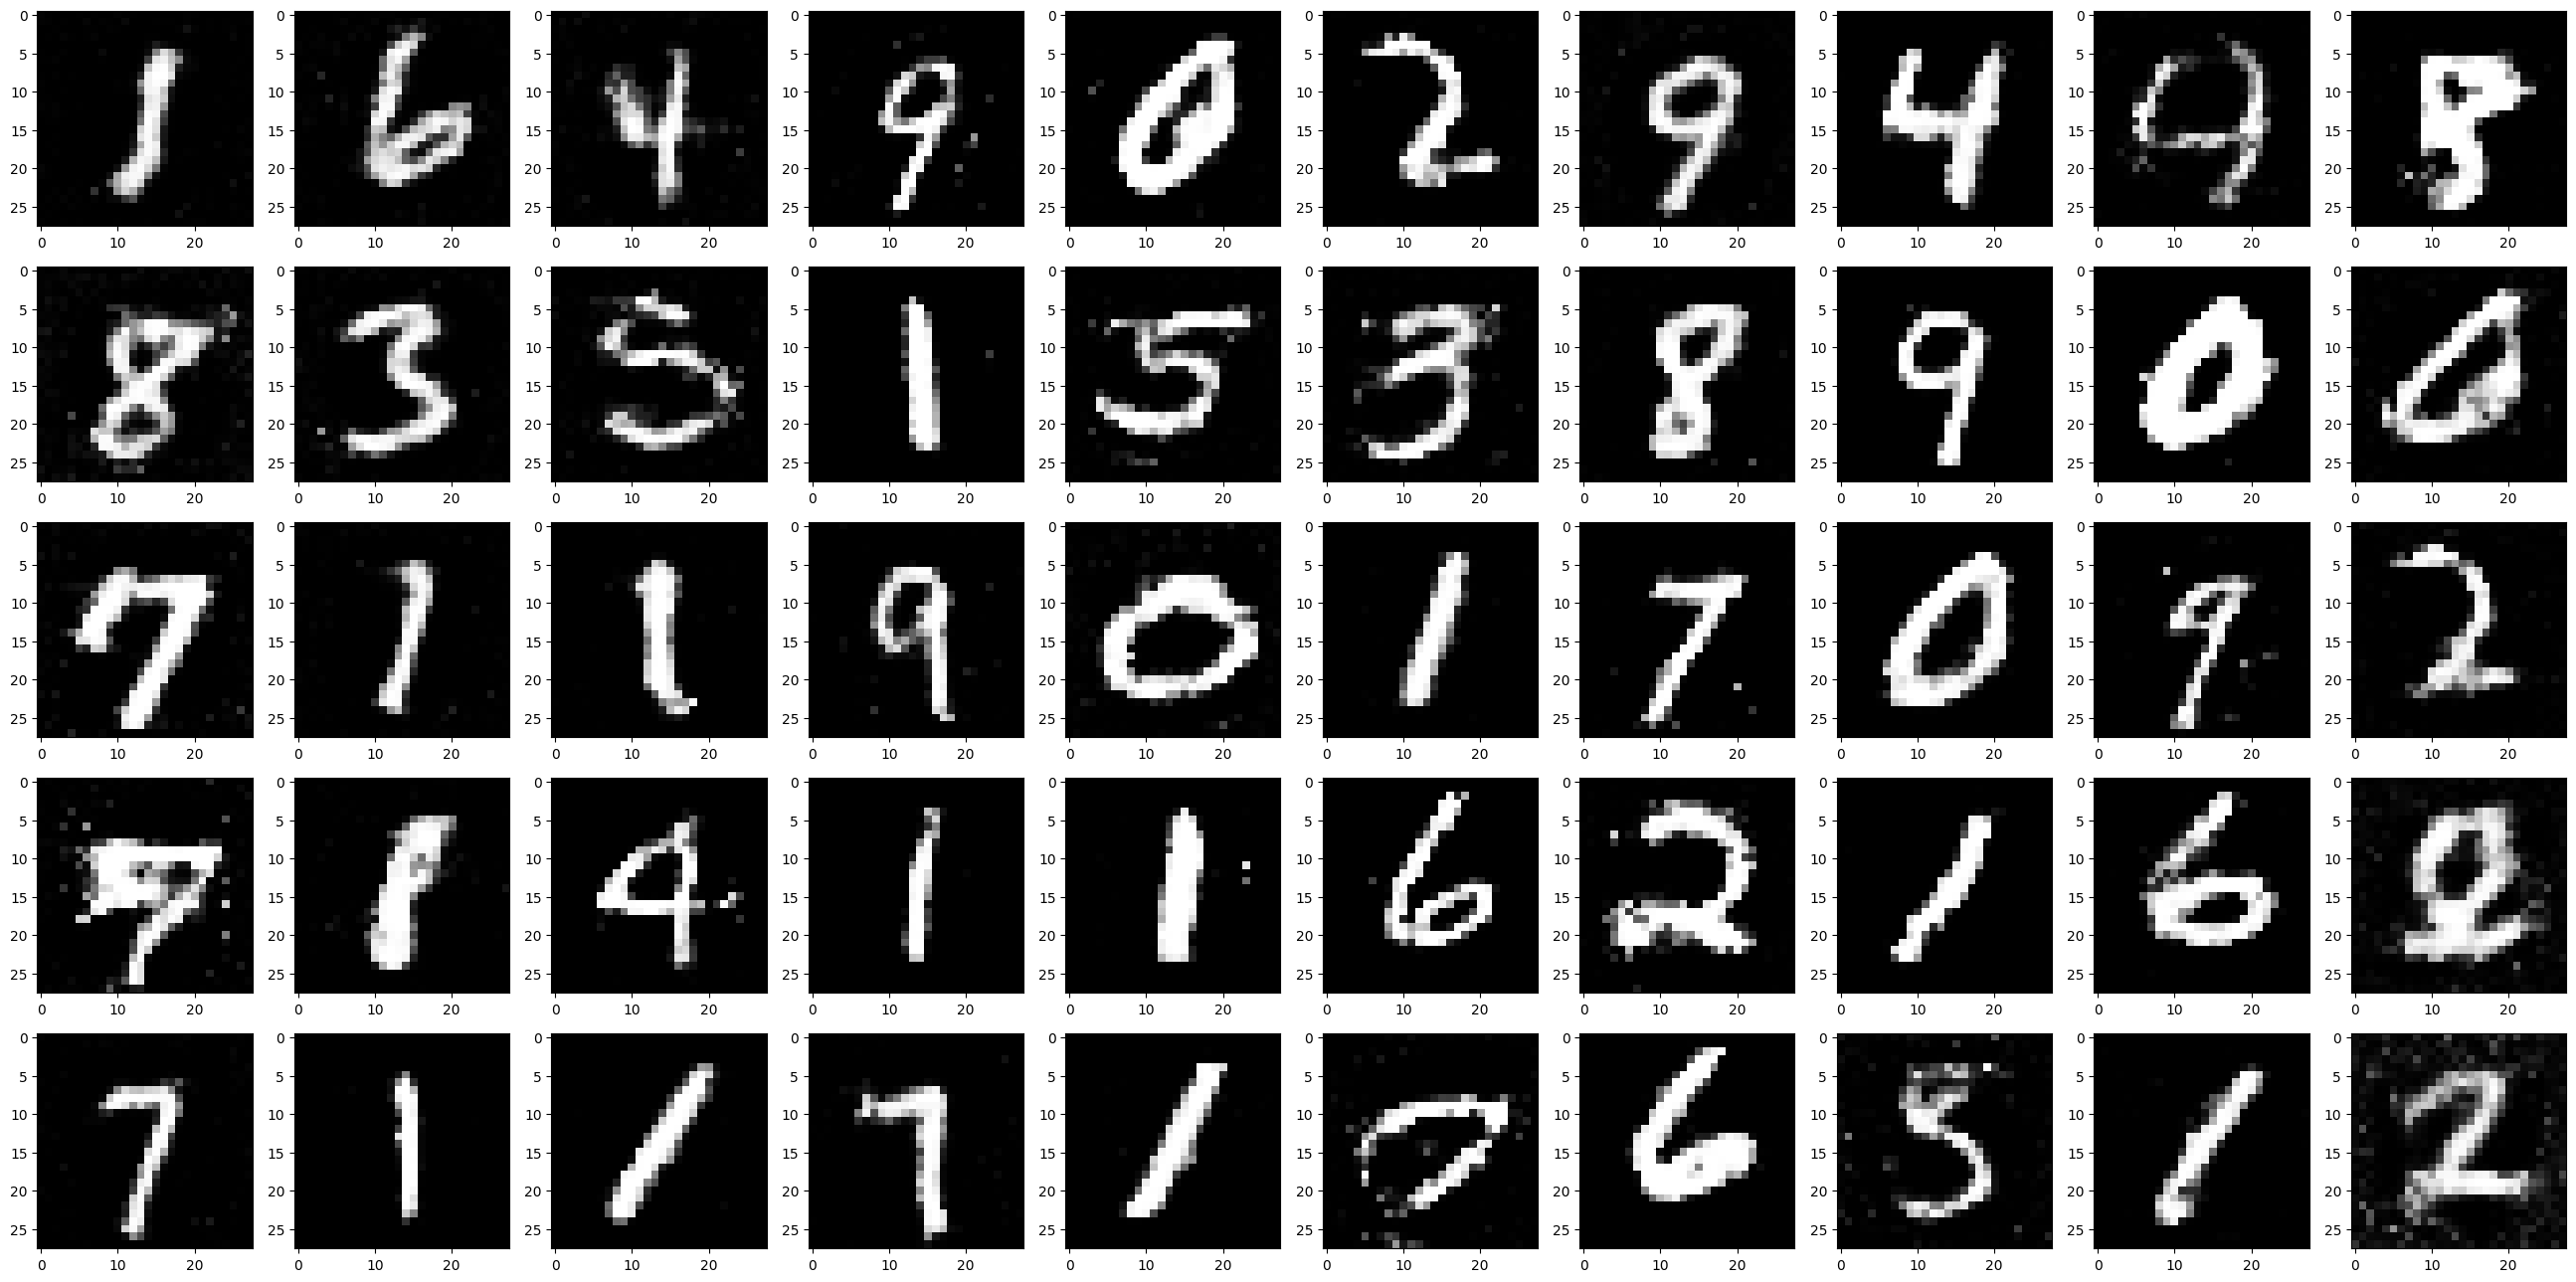

epoch[35/50], Generator Loss: 1.2873, Discriminator Loss: 1.1514


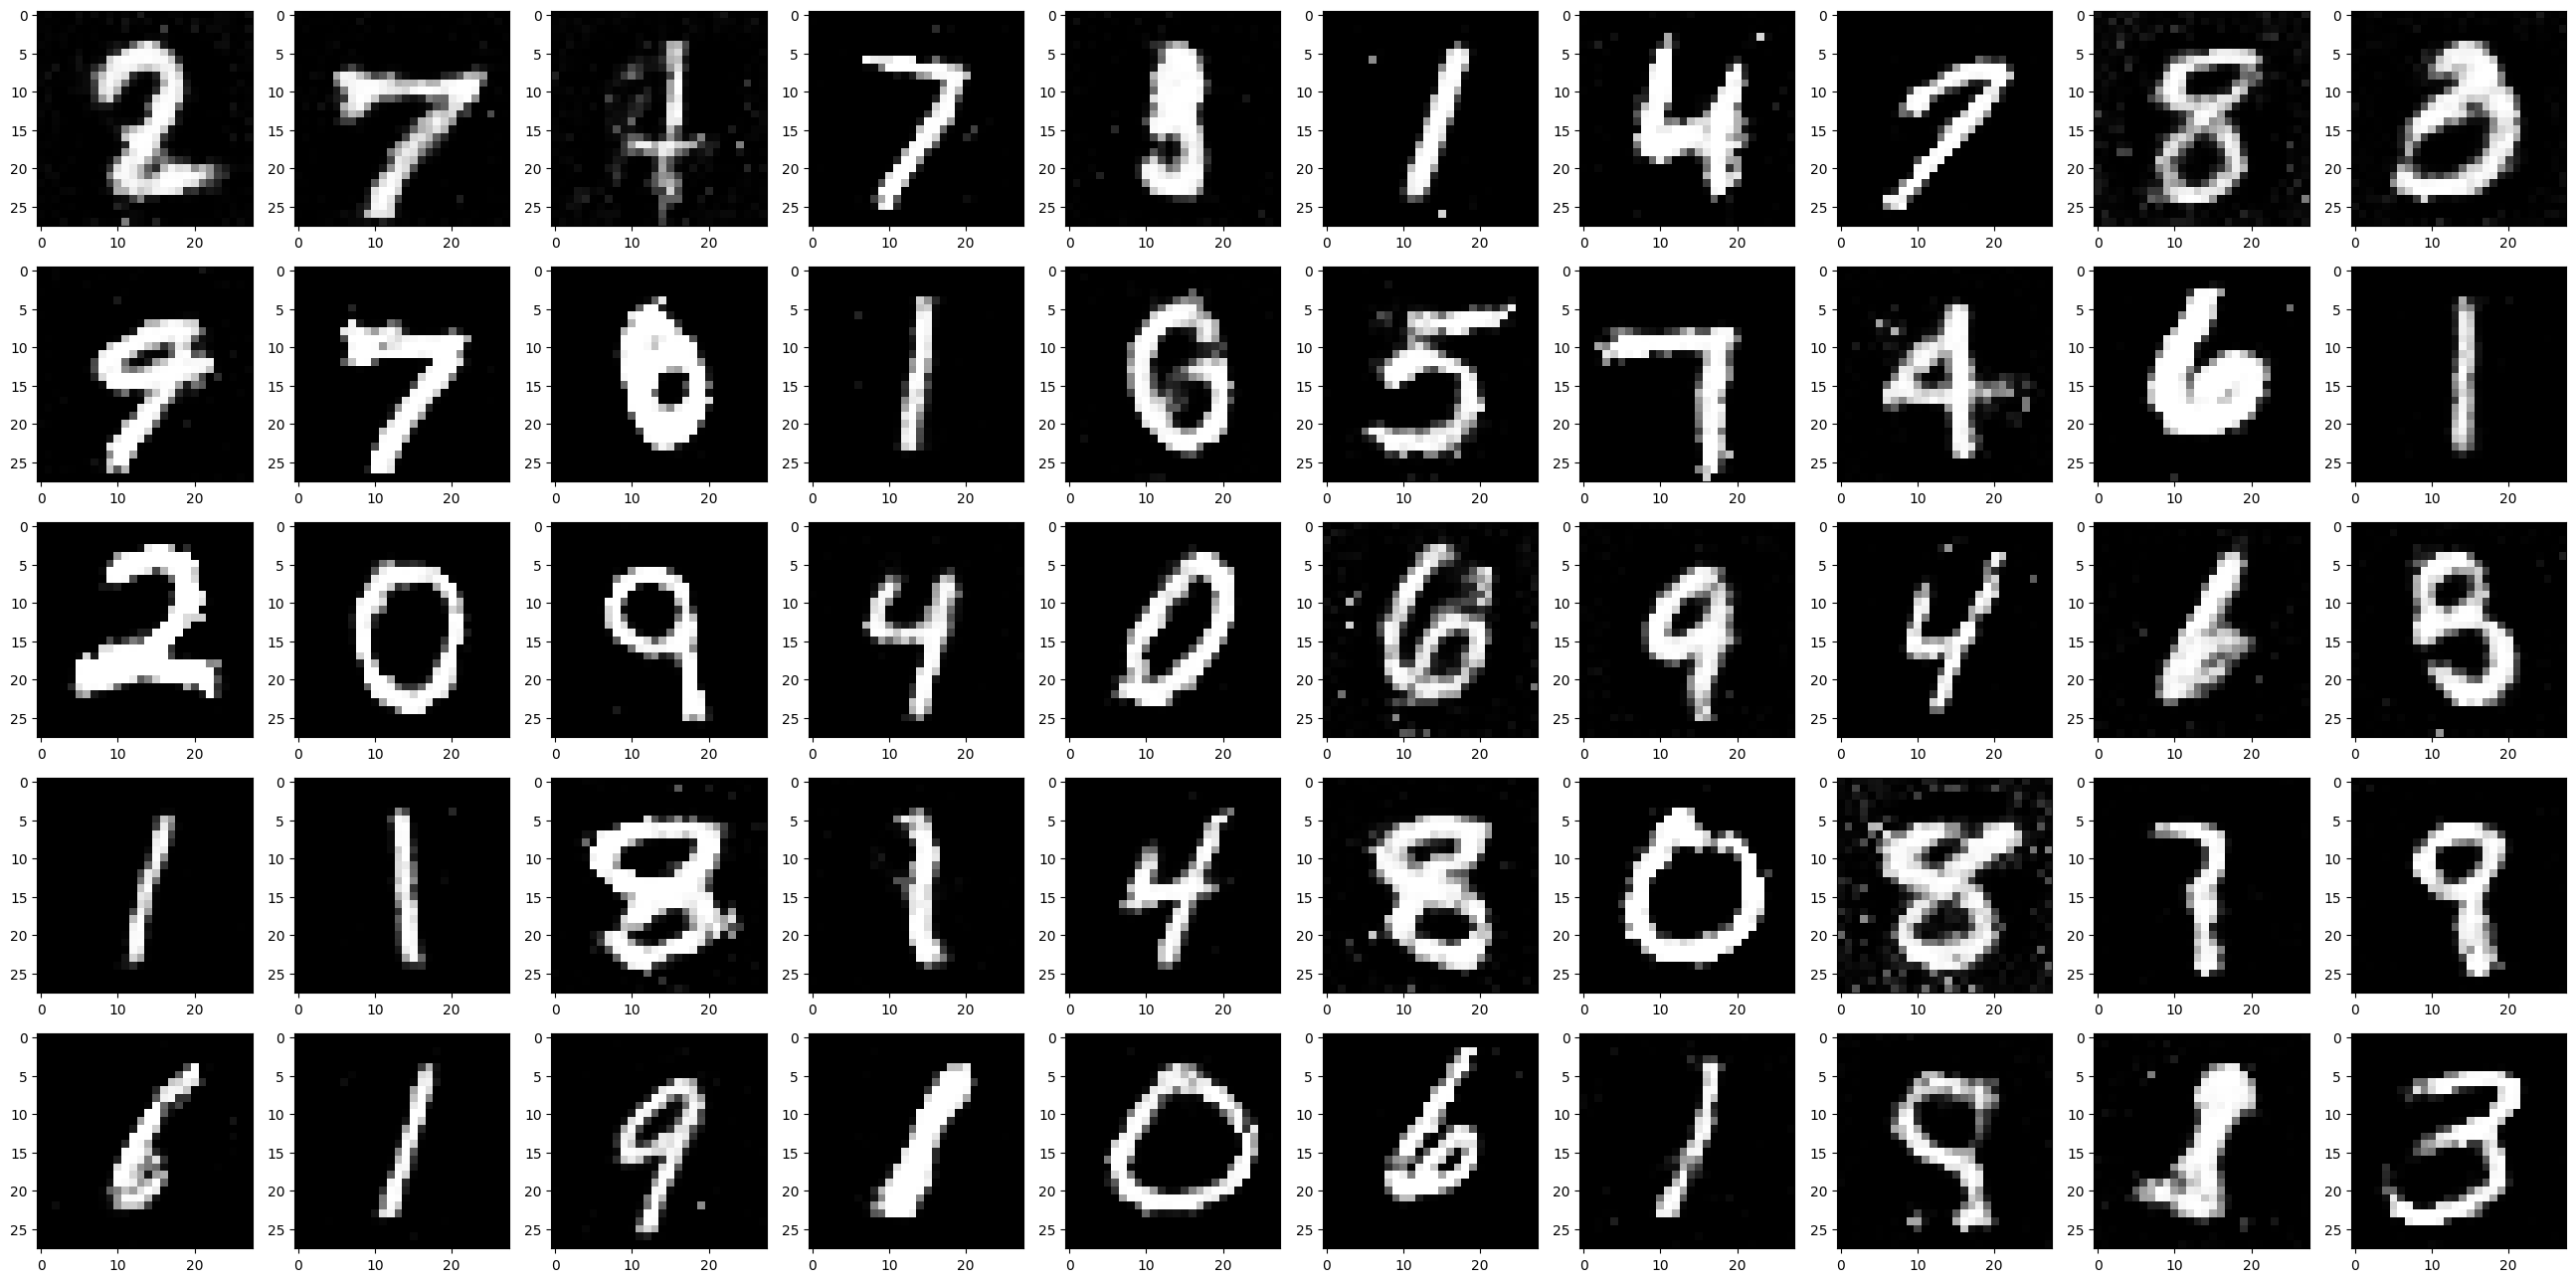

epoch[36/50], Generator Loss: 1.1239, Discriminator Loss: 1.6703


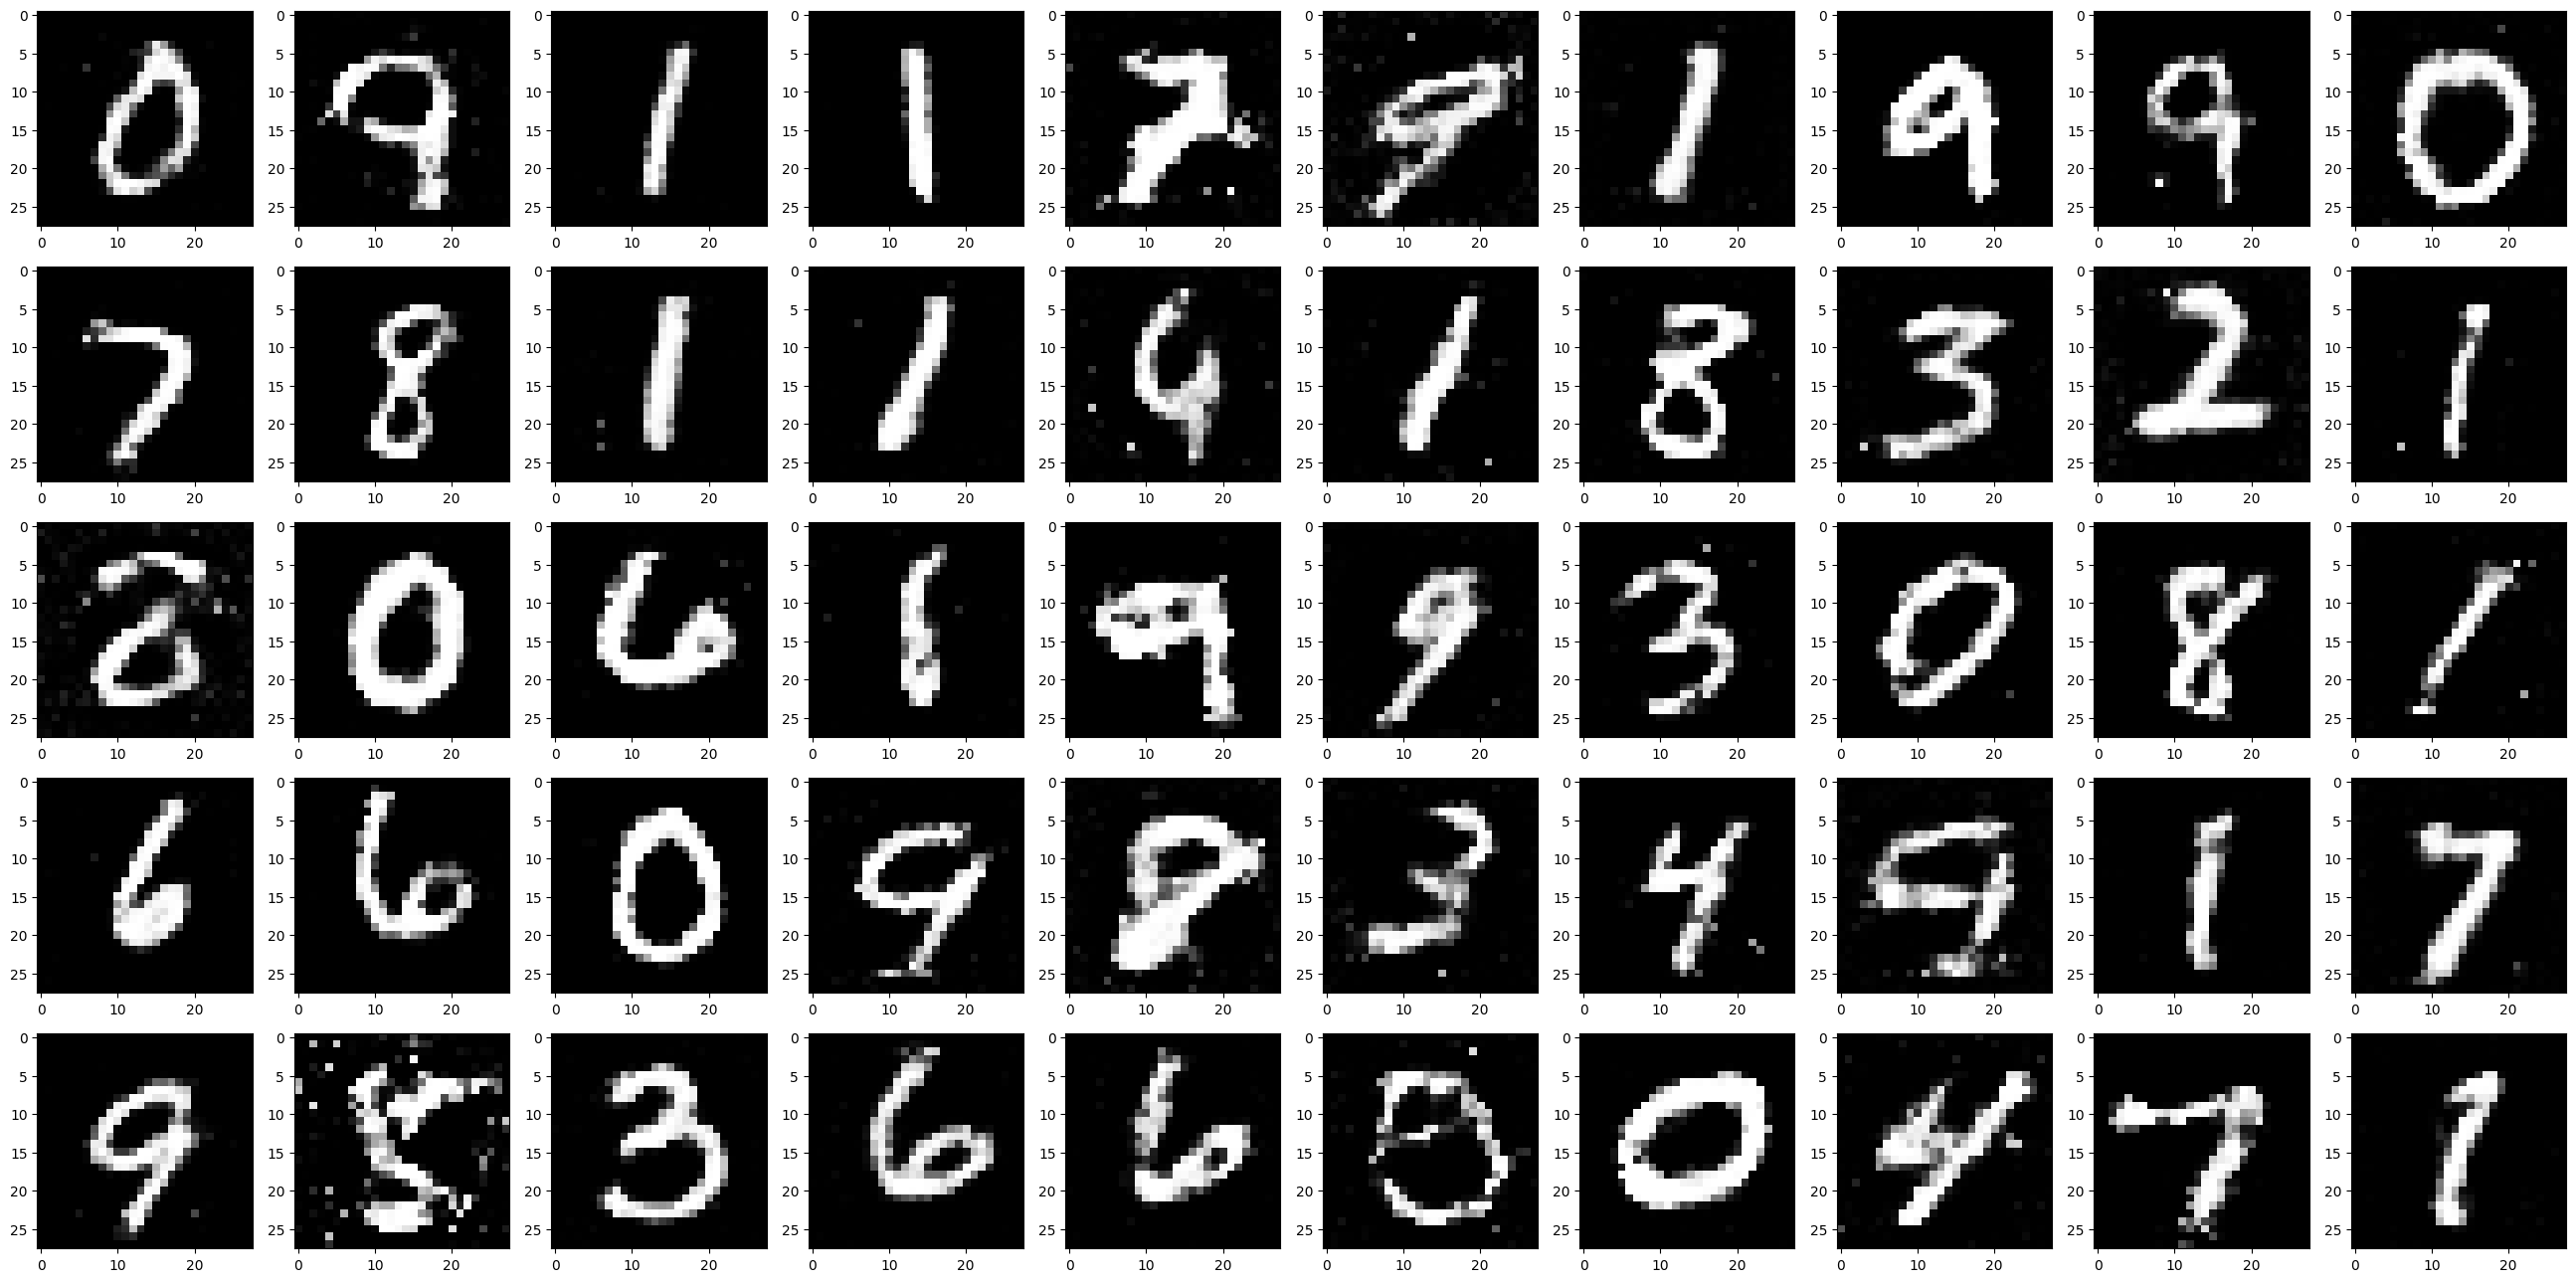

epoch[37/50], Generator Loss: 1.2522, Discriminator Loss: 1.6786


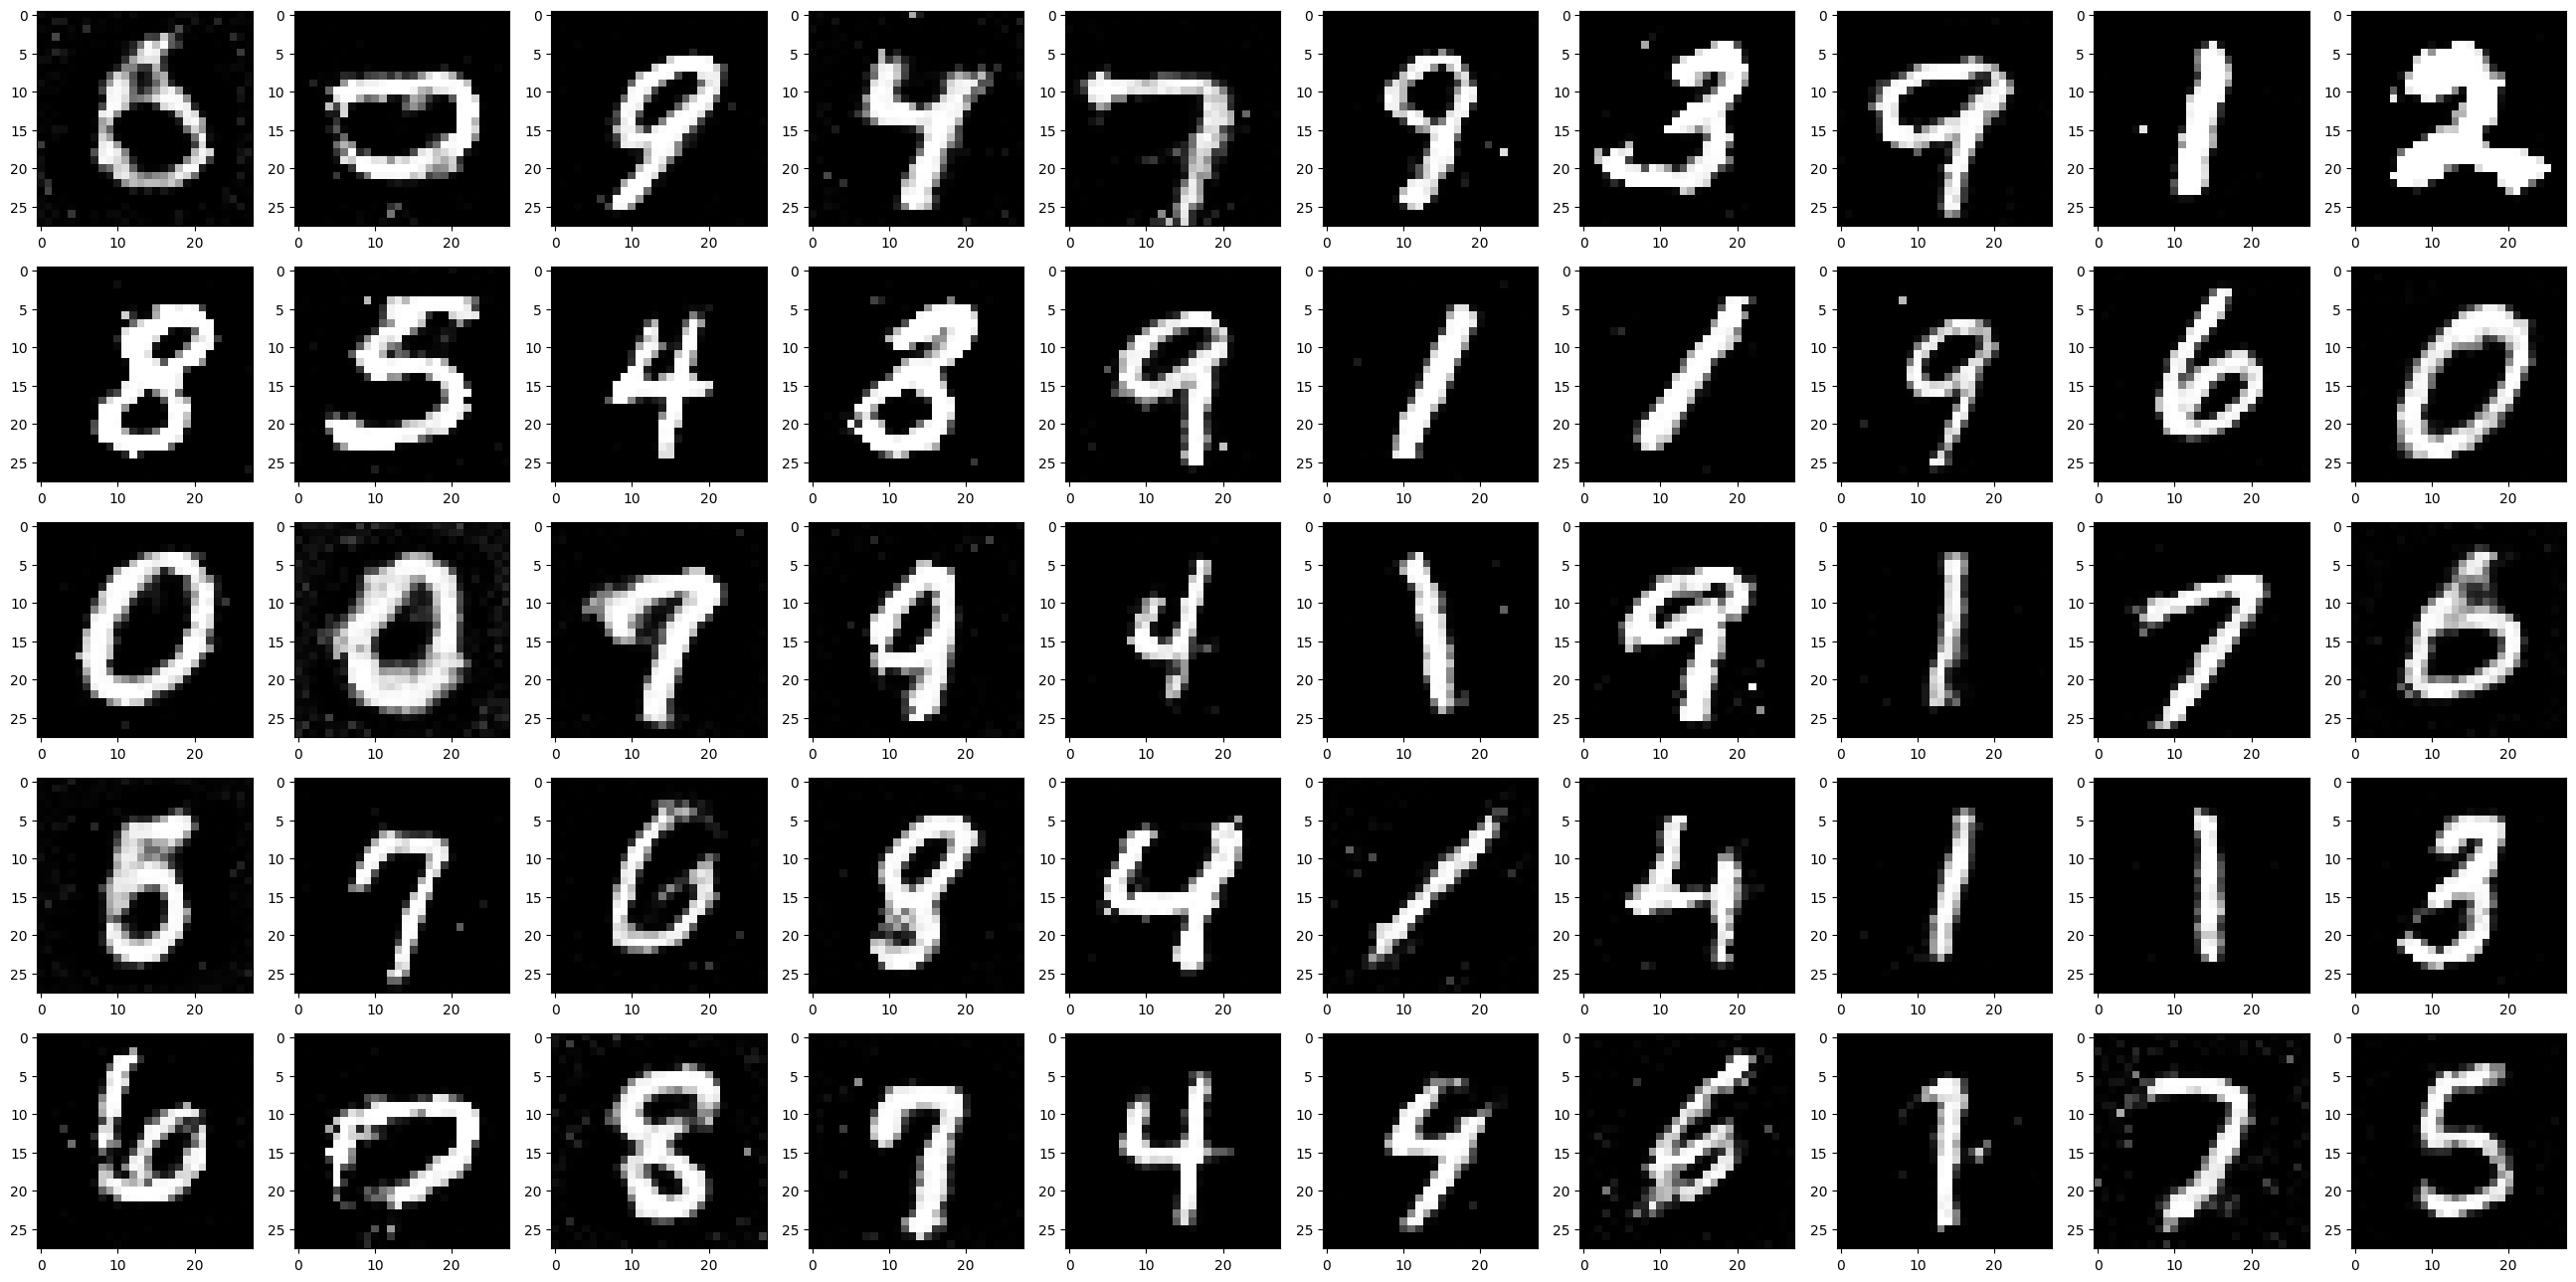

epoch[38/50], Generator Loss: 1.1697, Discriminator Loss: 1.1006


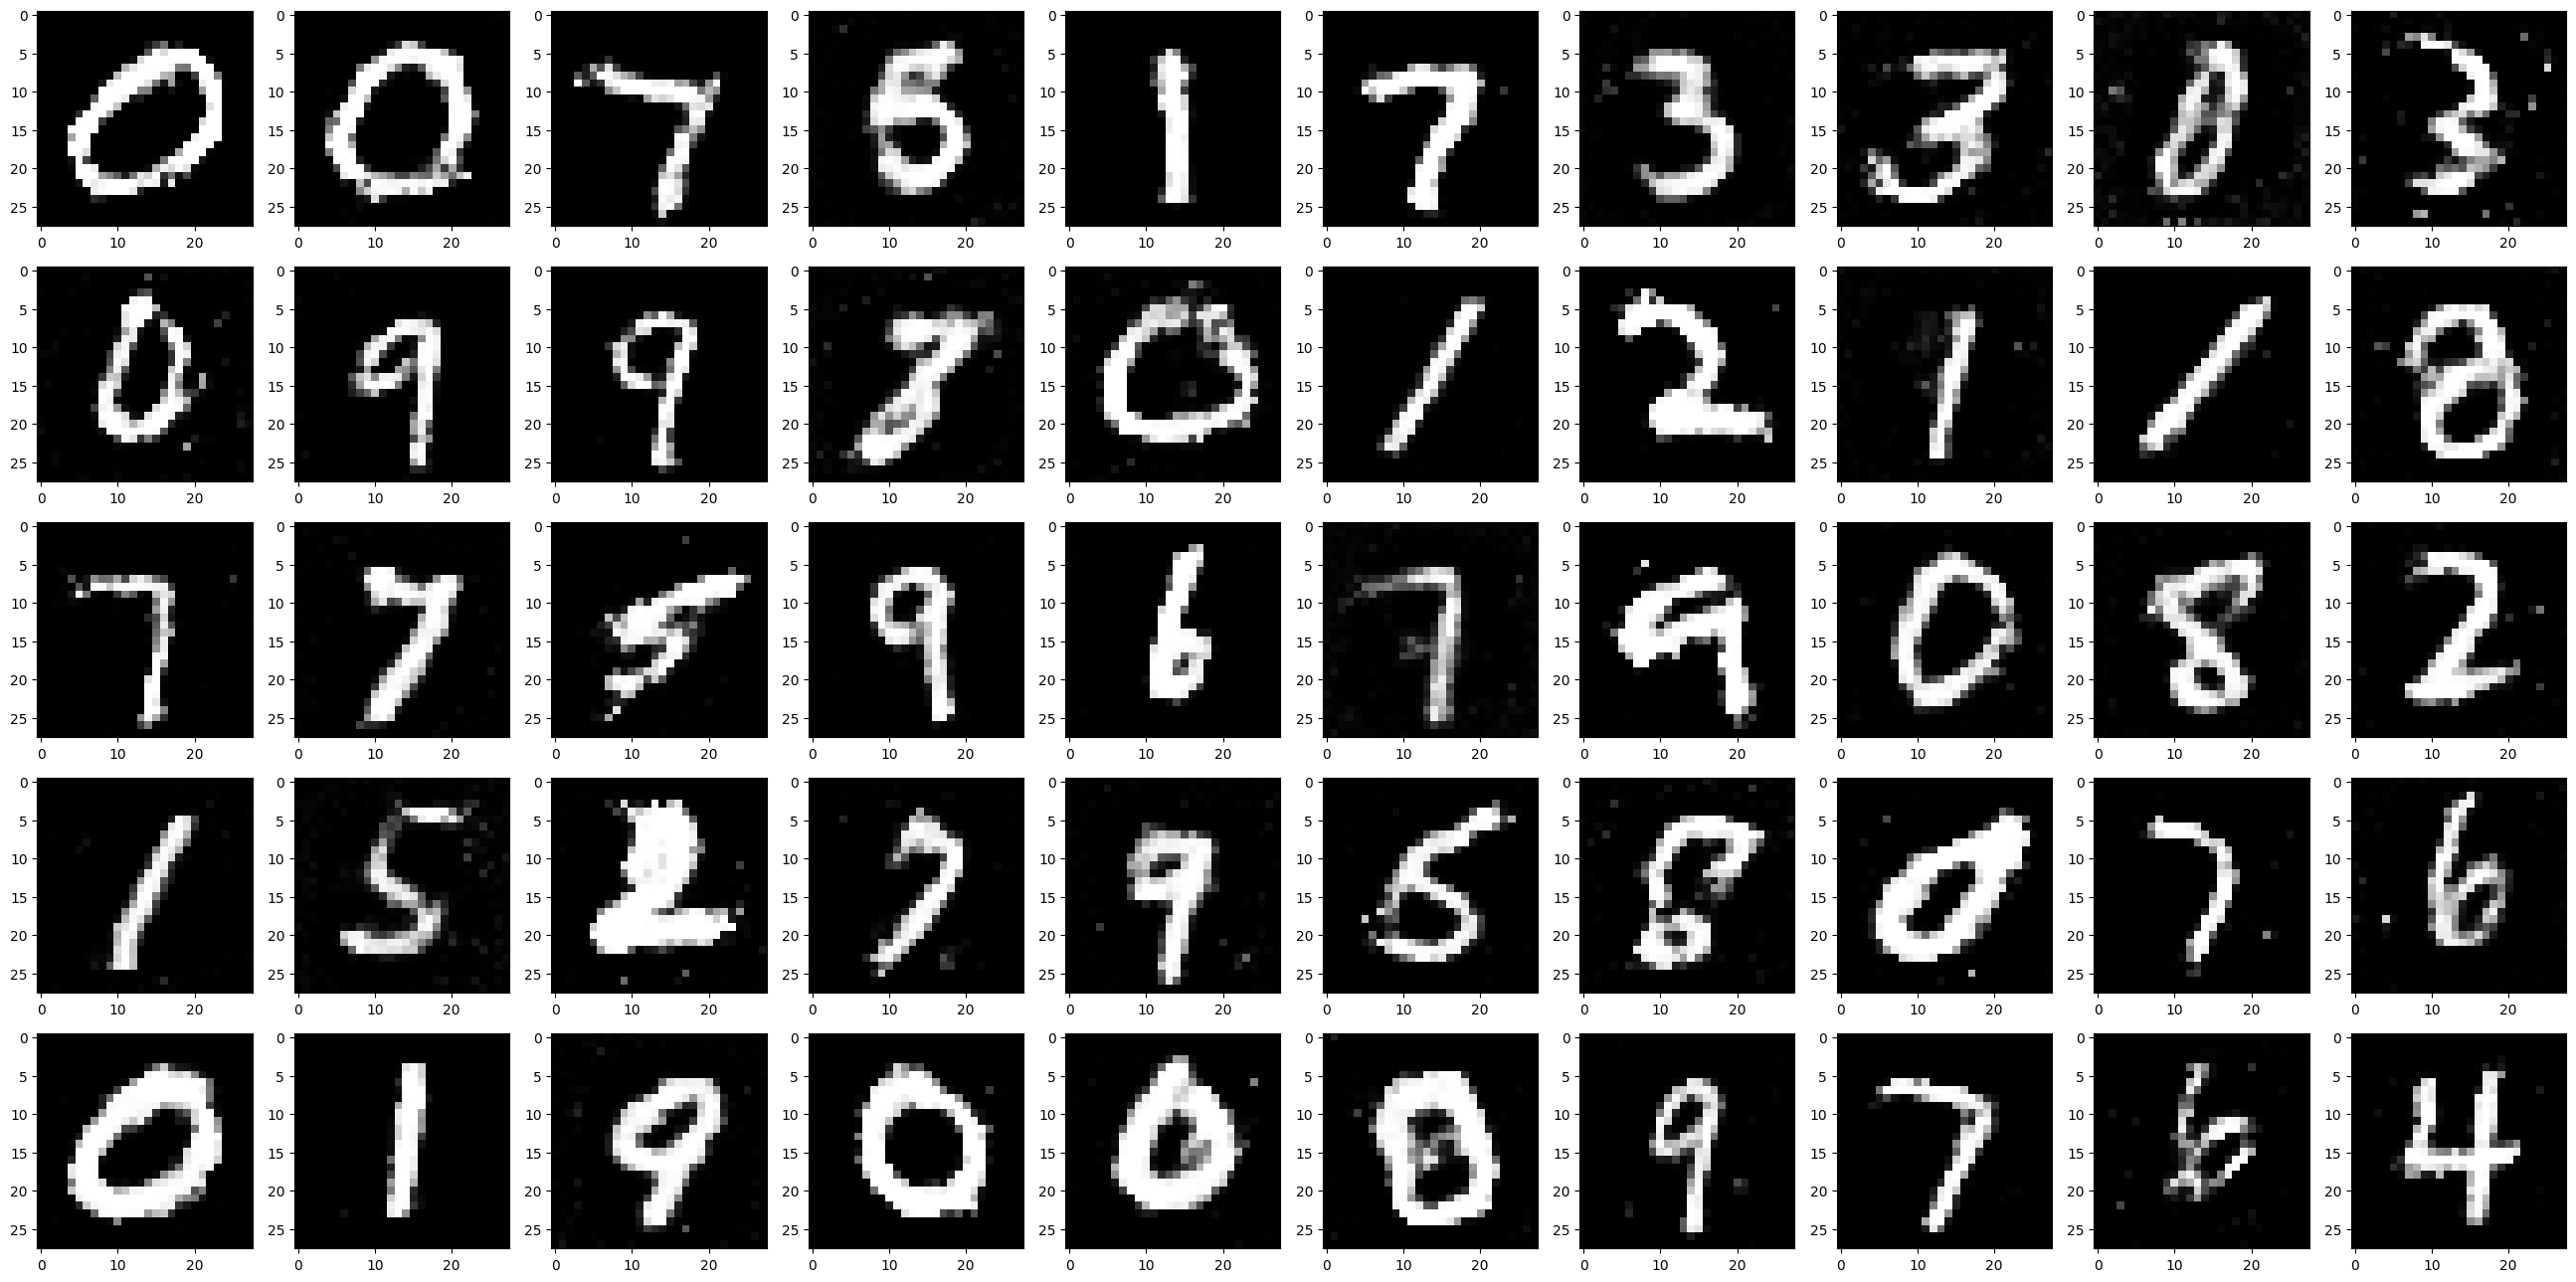

epoch[39/50], Generator Loss: 1.2519, Discriminator Loss: 1.9885


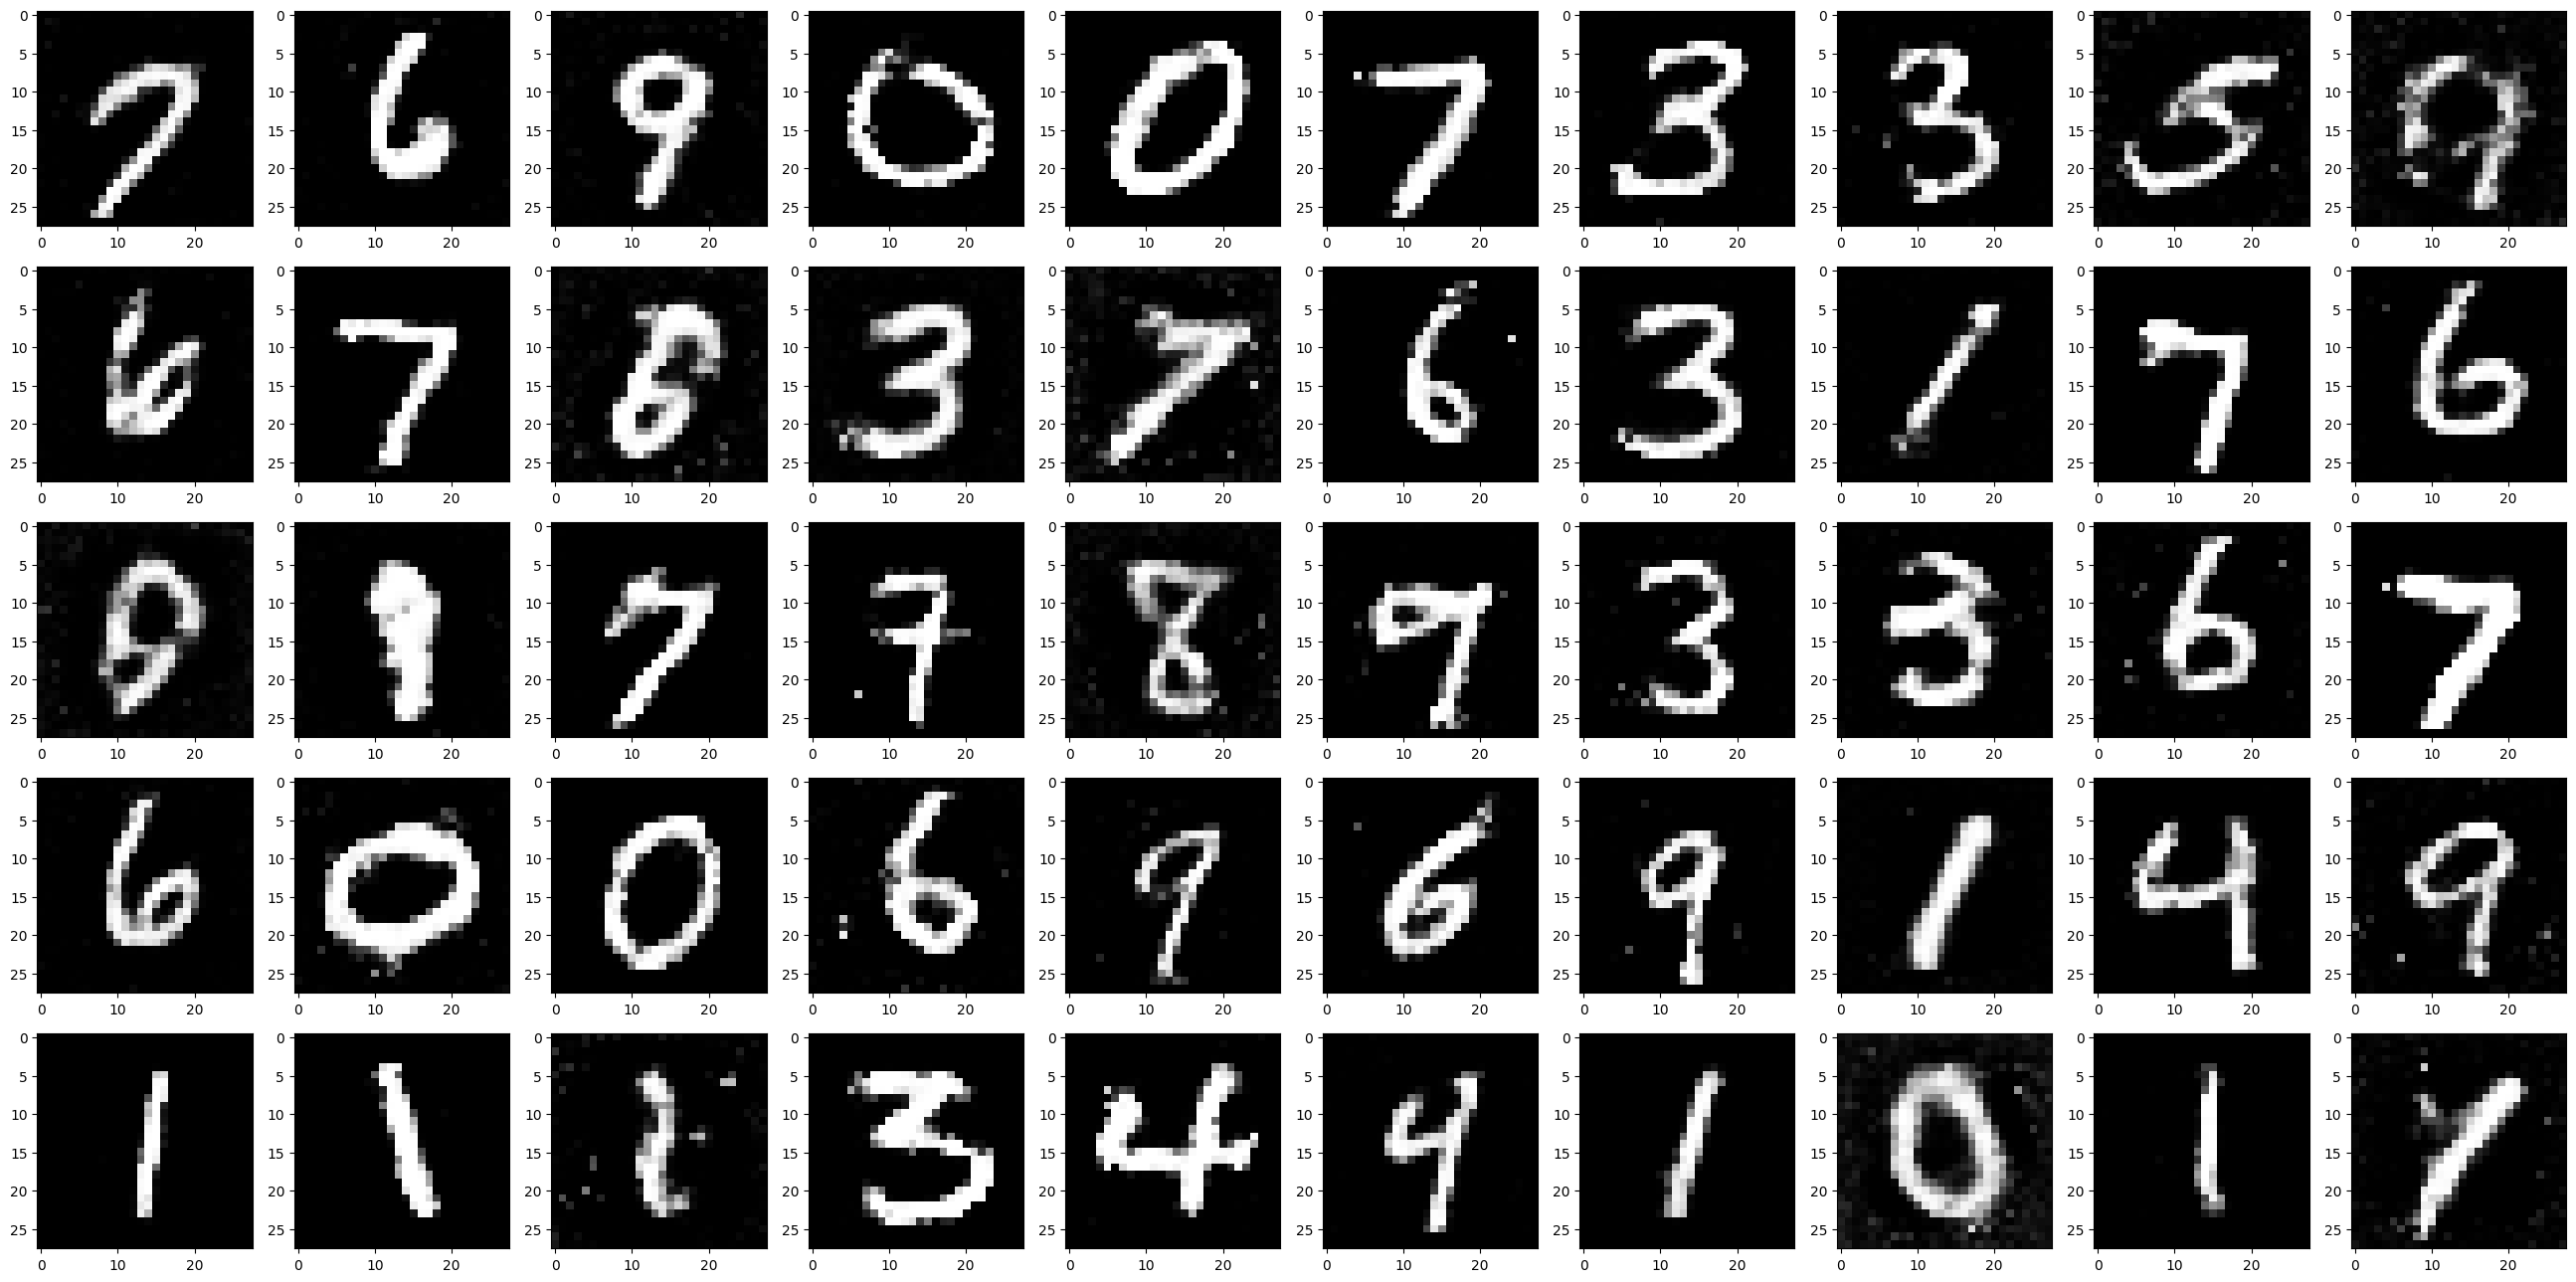

epoch[40/50], Generator Loss: 1.1319, Discriminator Loss: 1.0213


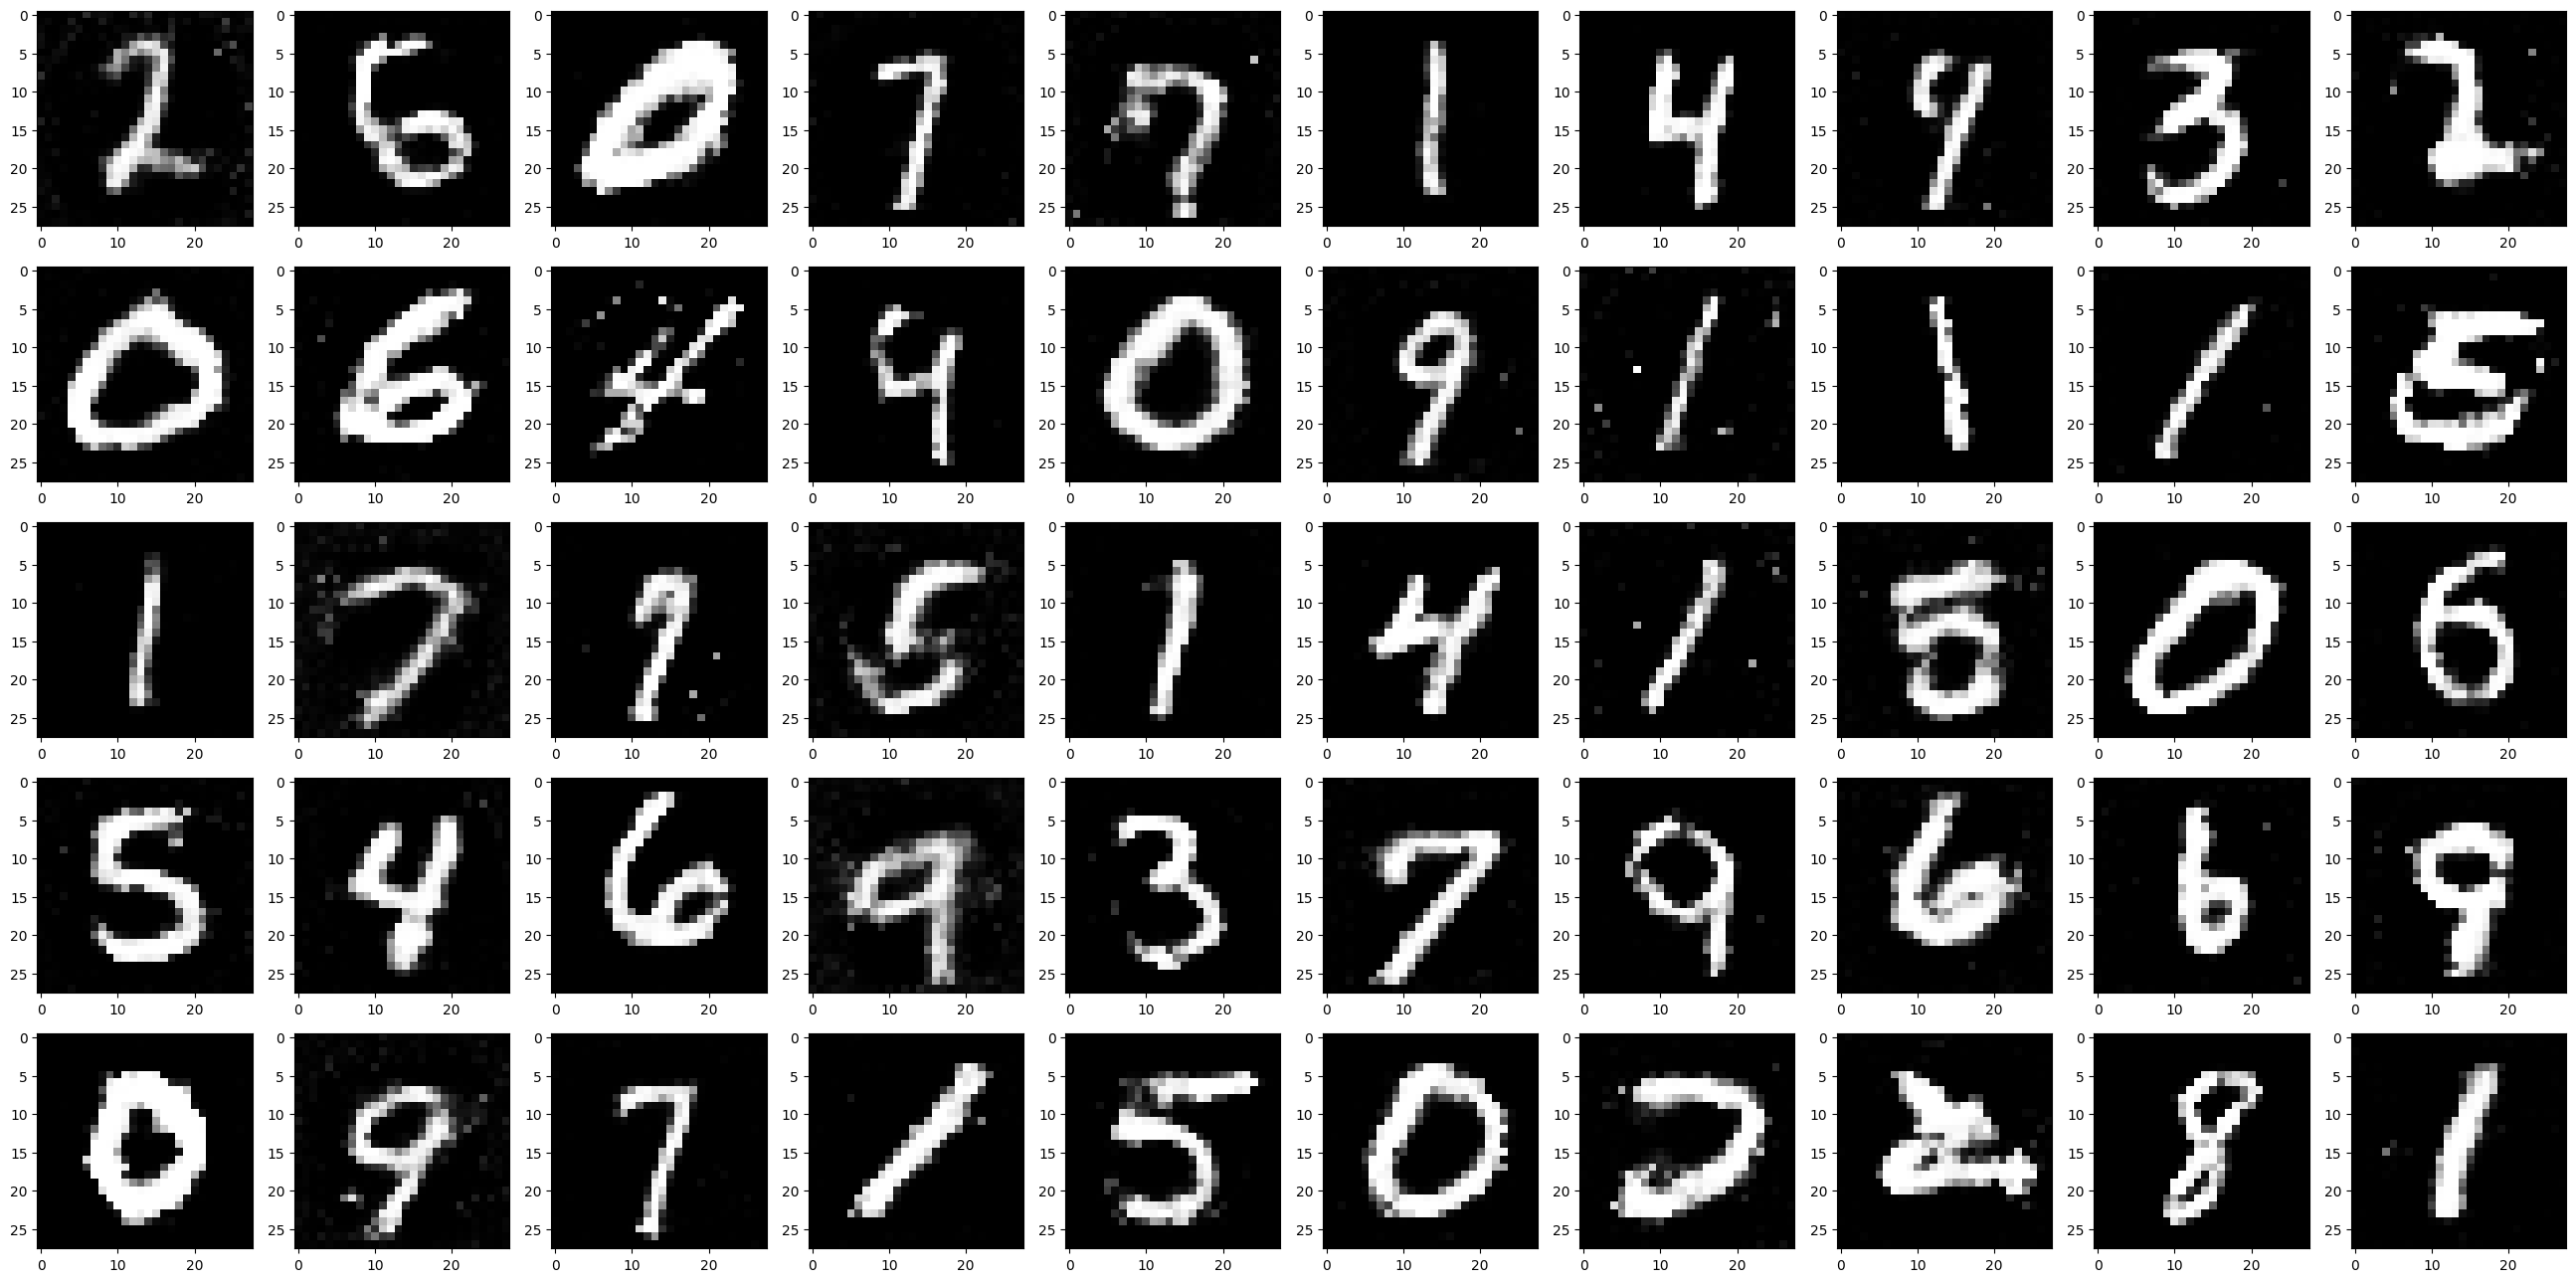

epoch[41/50], Generator Loss: 1.2769, Discriminator Loss: 1.2126


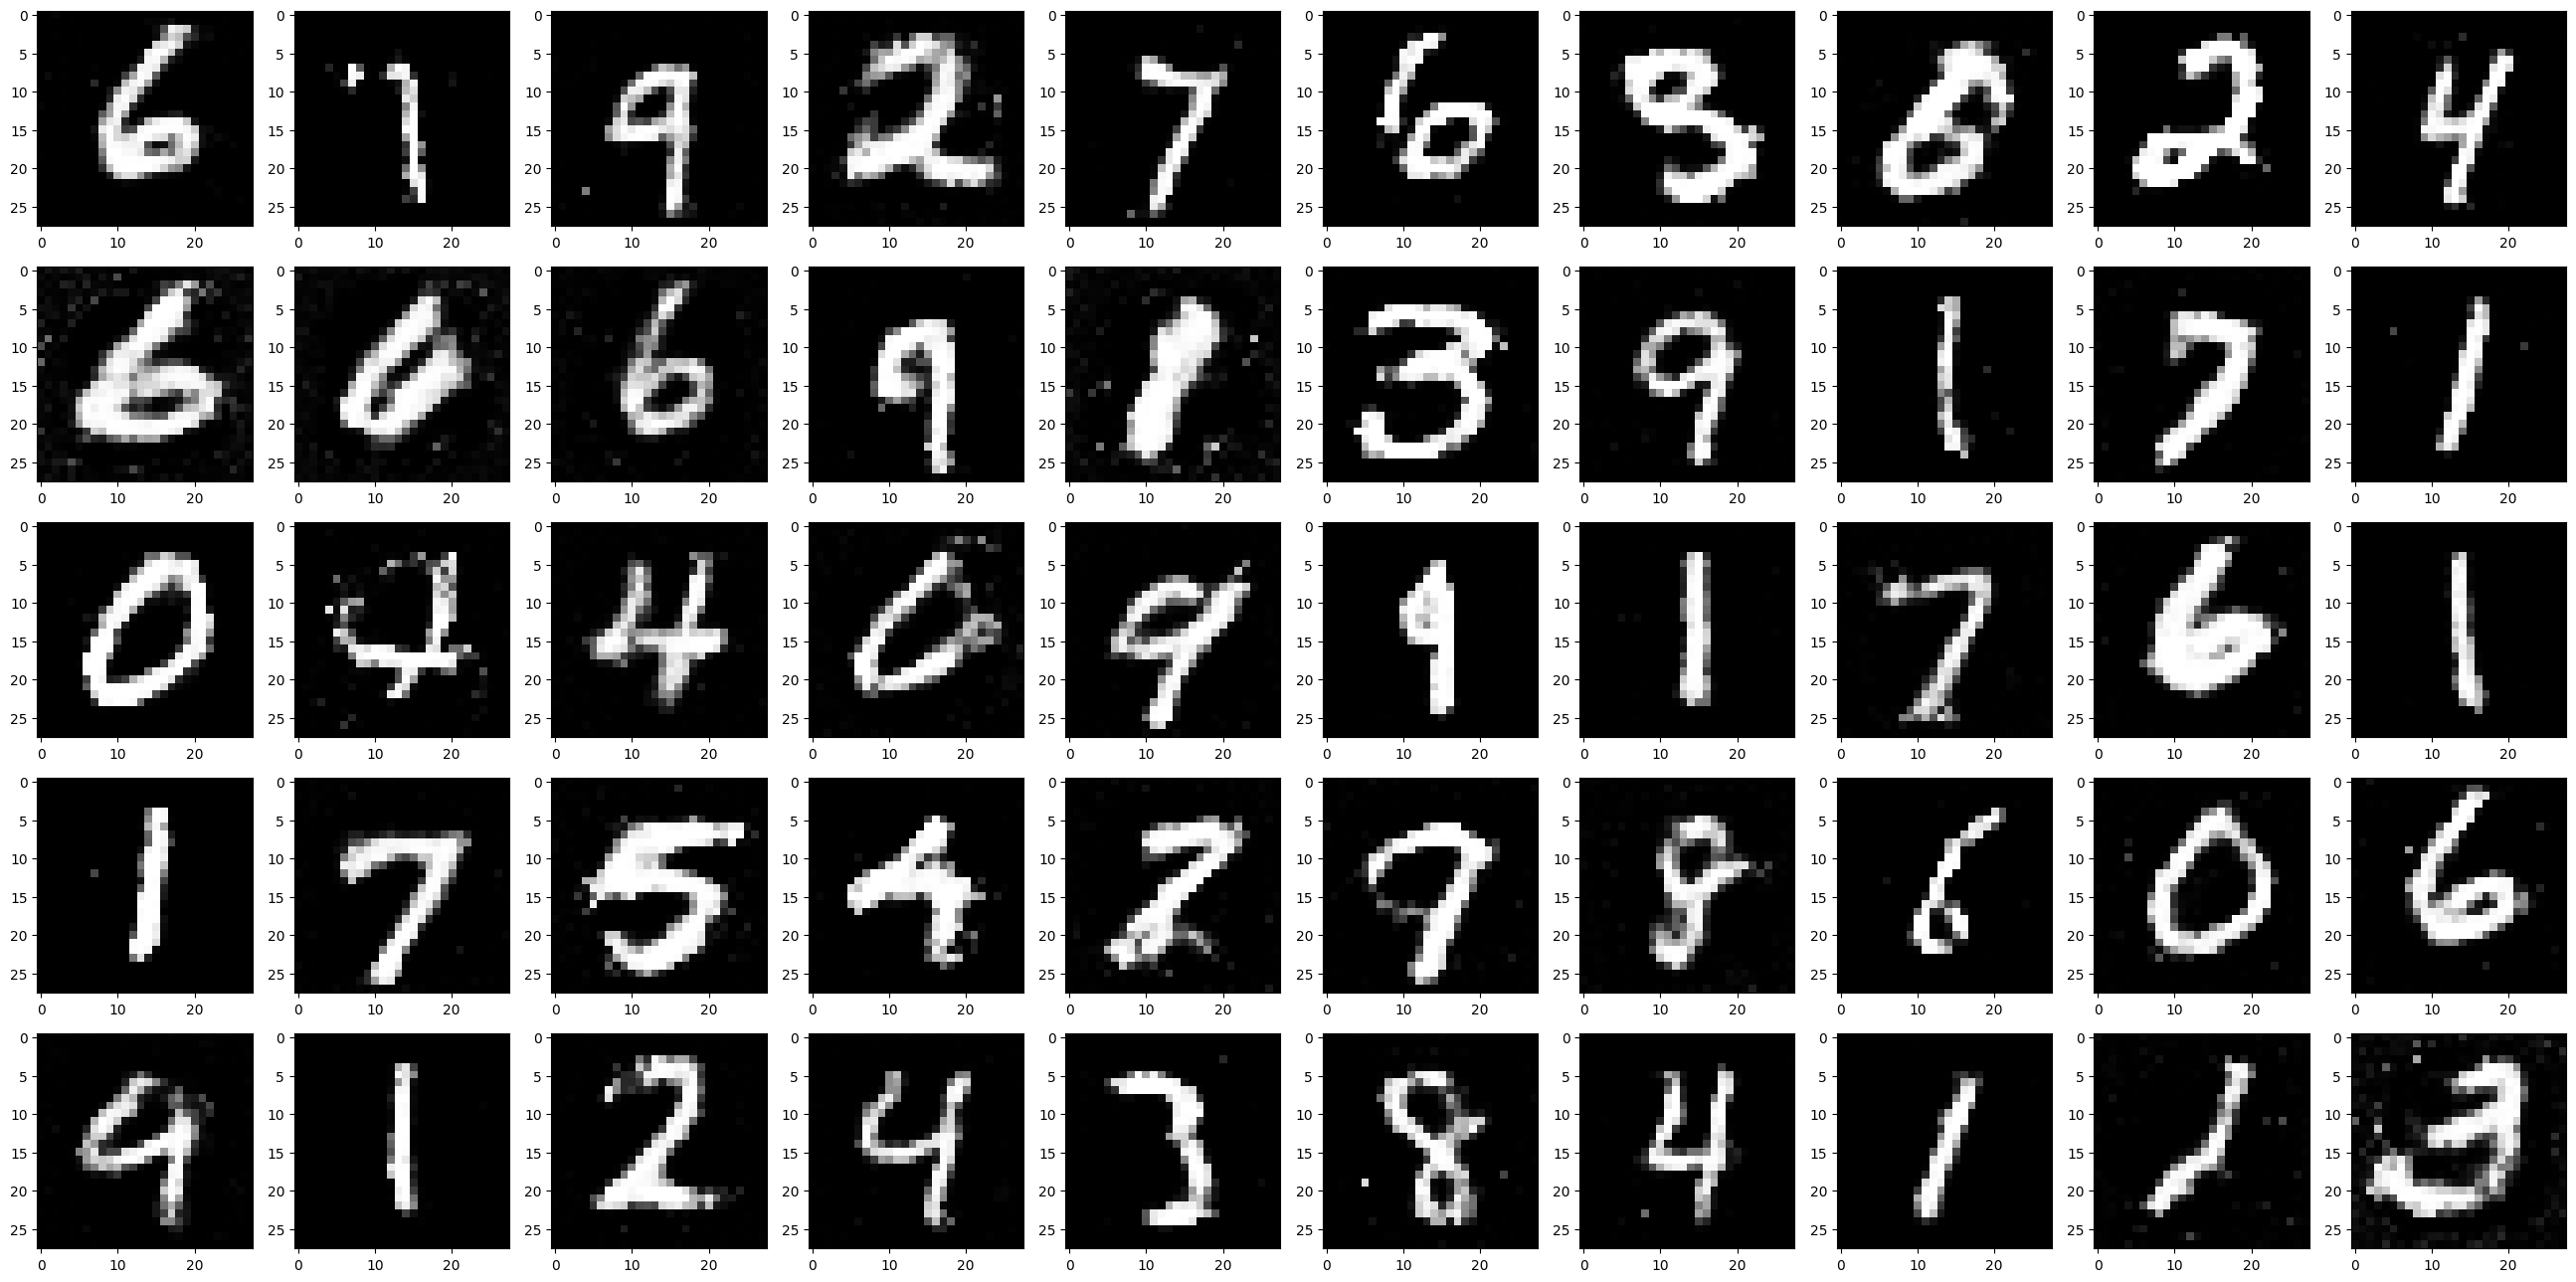

epoch[42/50], Generator Loss: 1.1452, Discriminator Loss: 1.2169


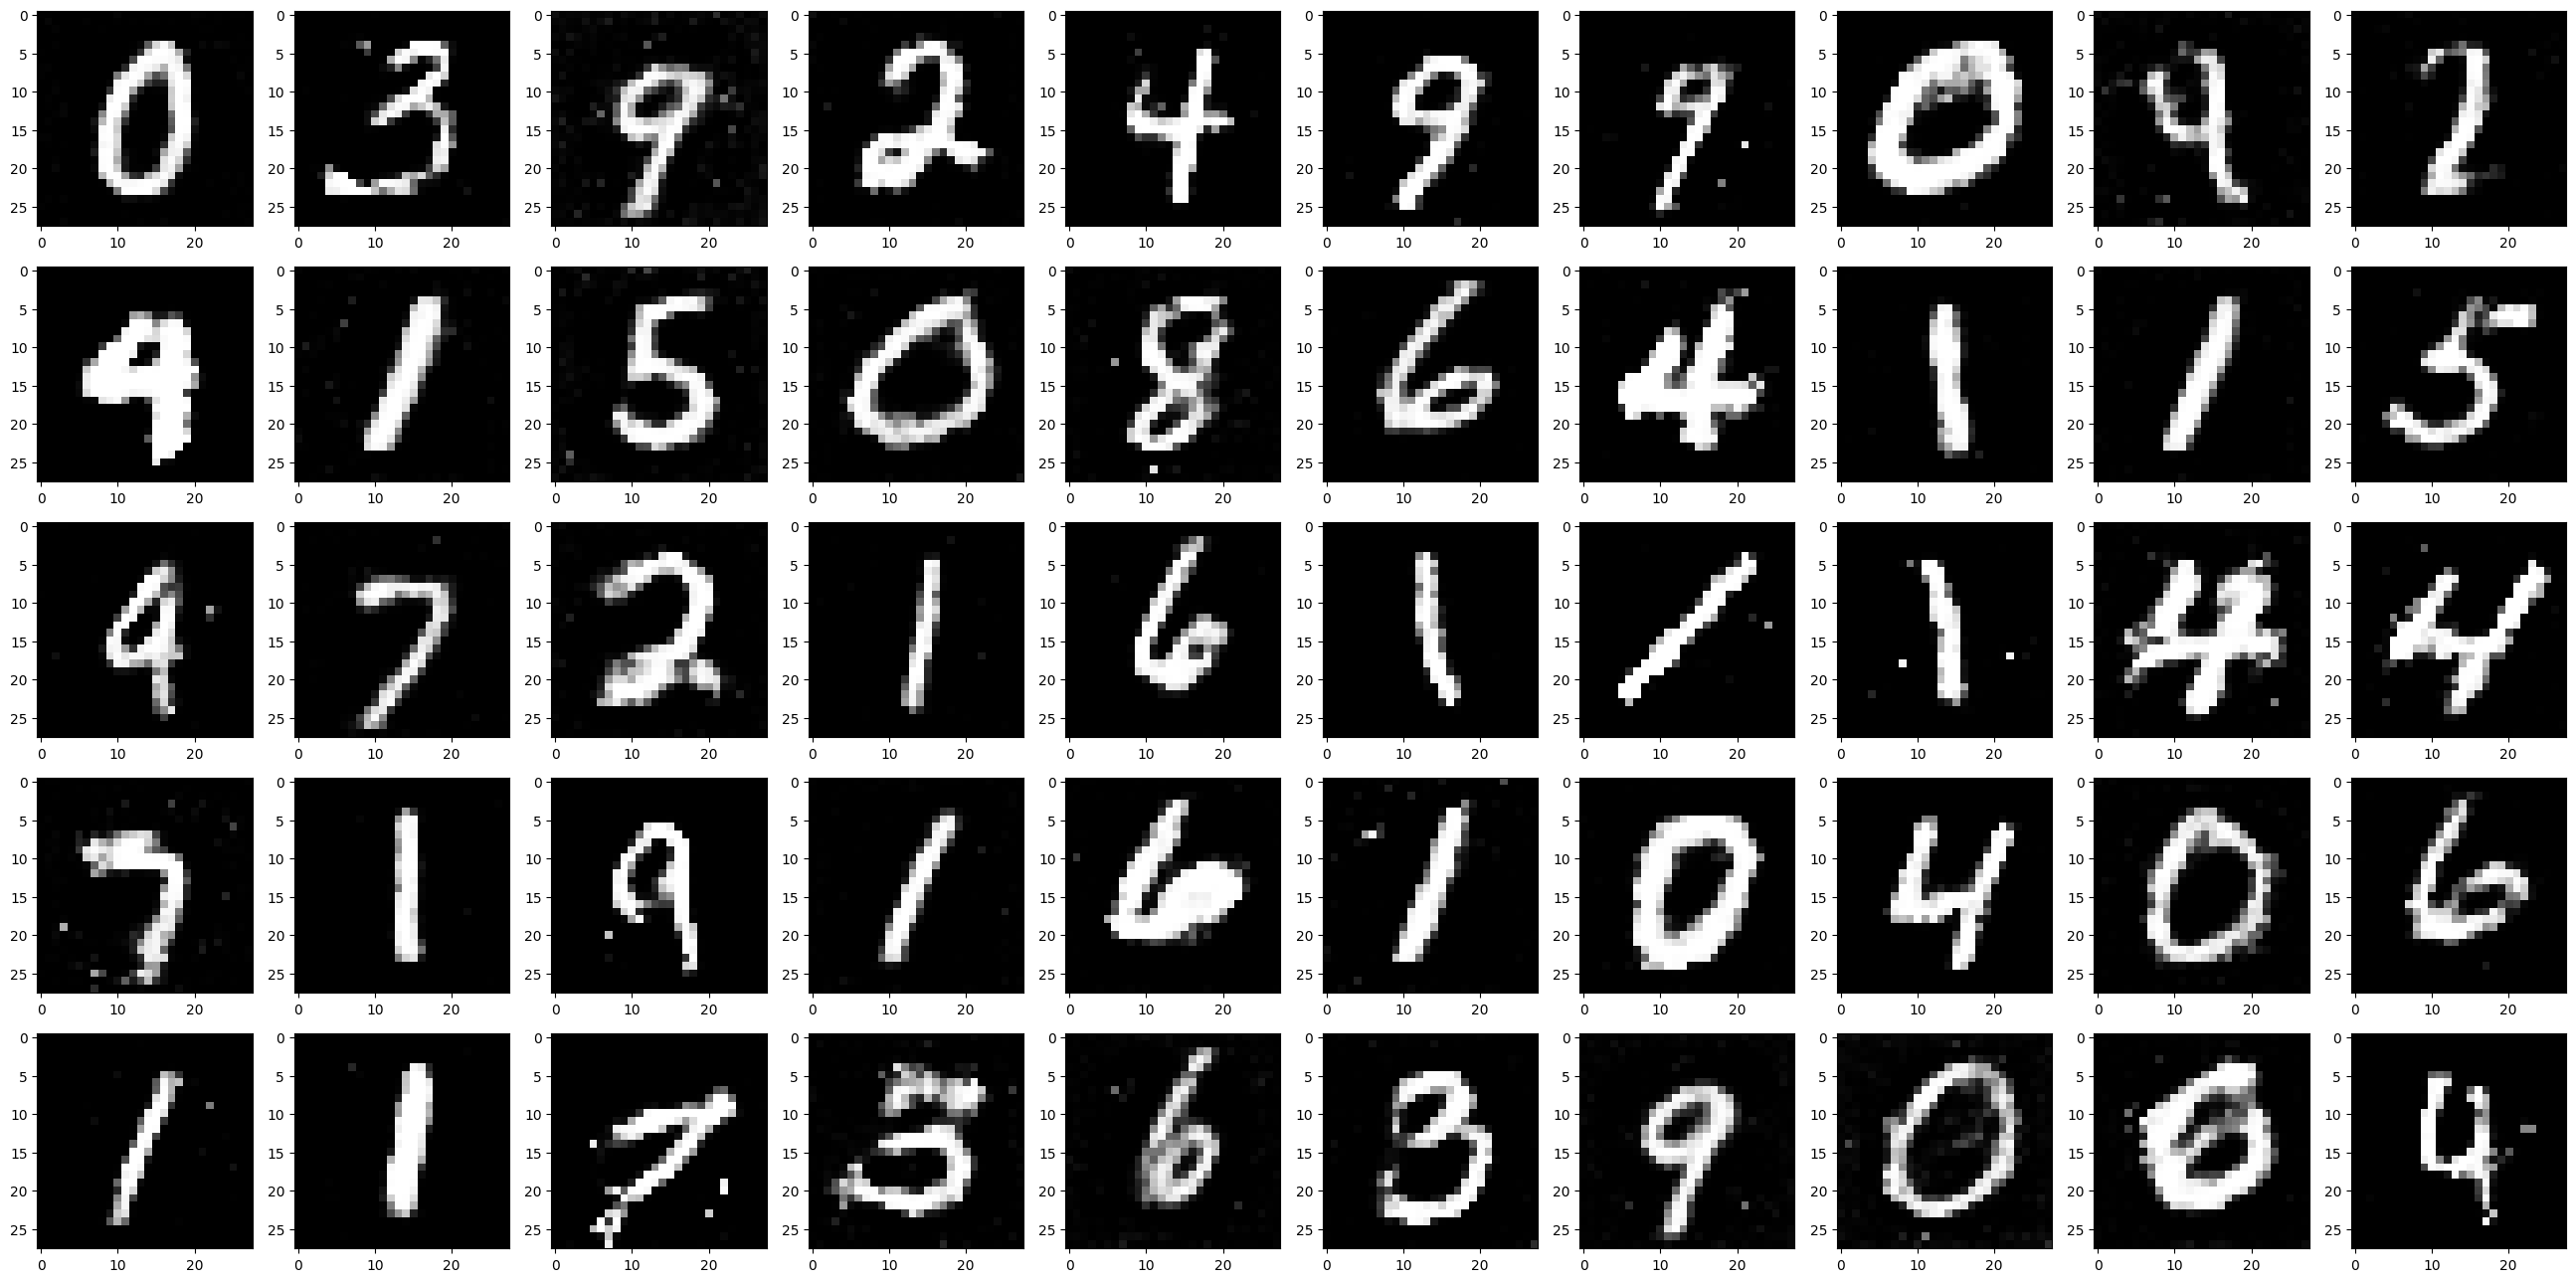

epoch[43/50], Generator Loss: 1.0512, Discriminator Loss: 1.6756


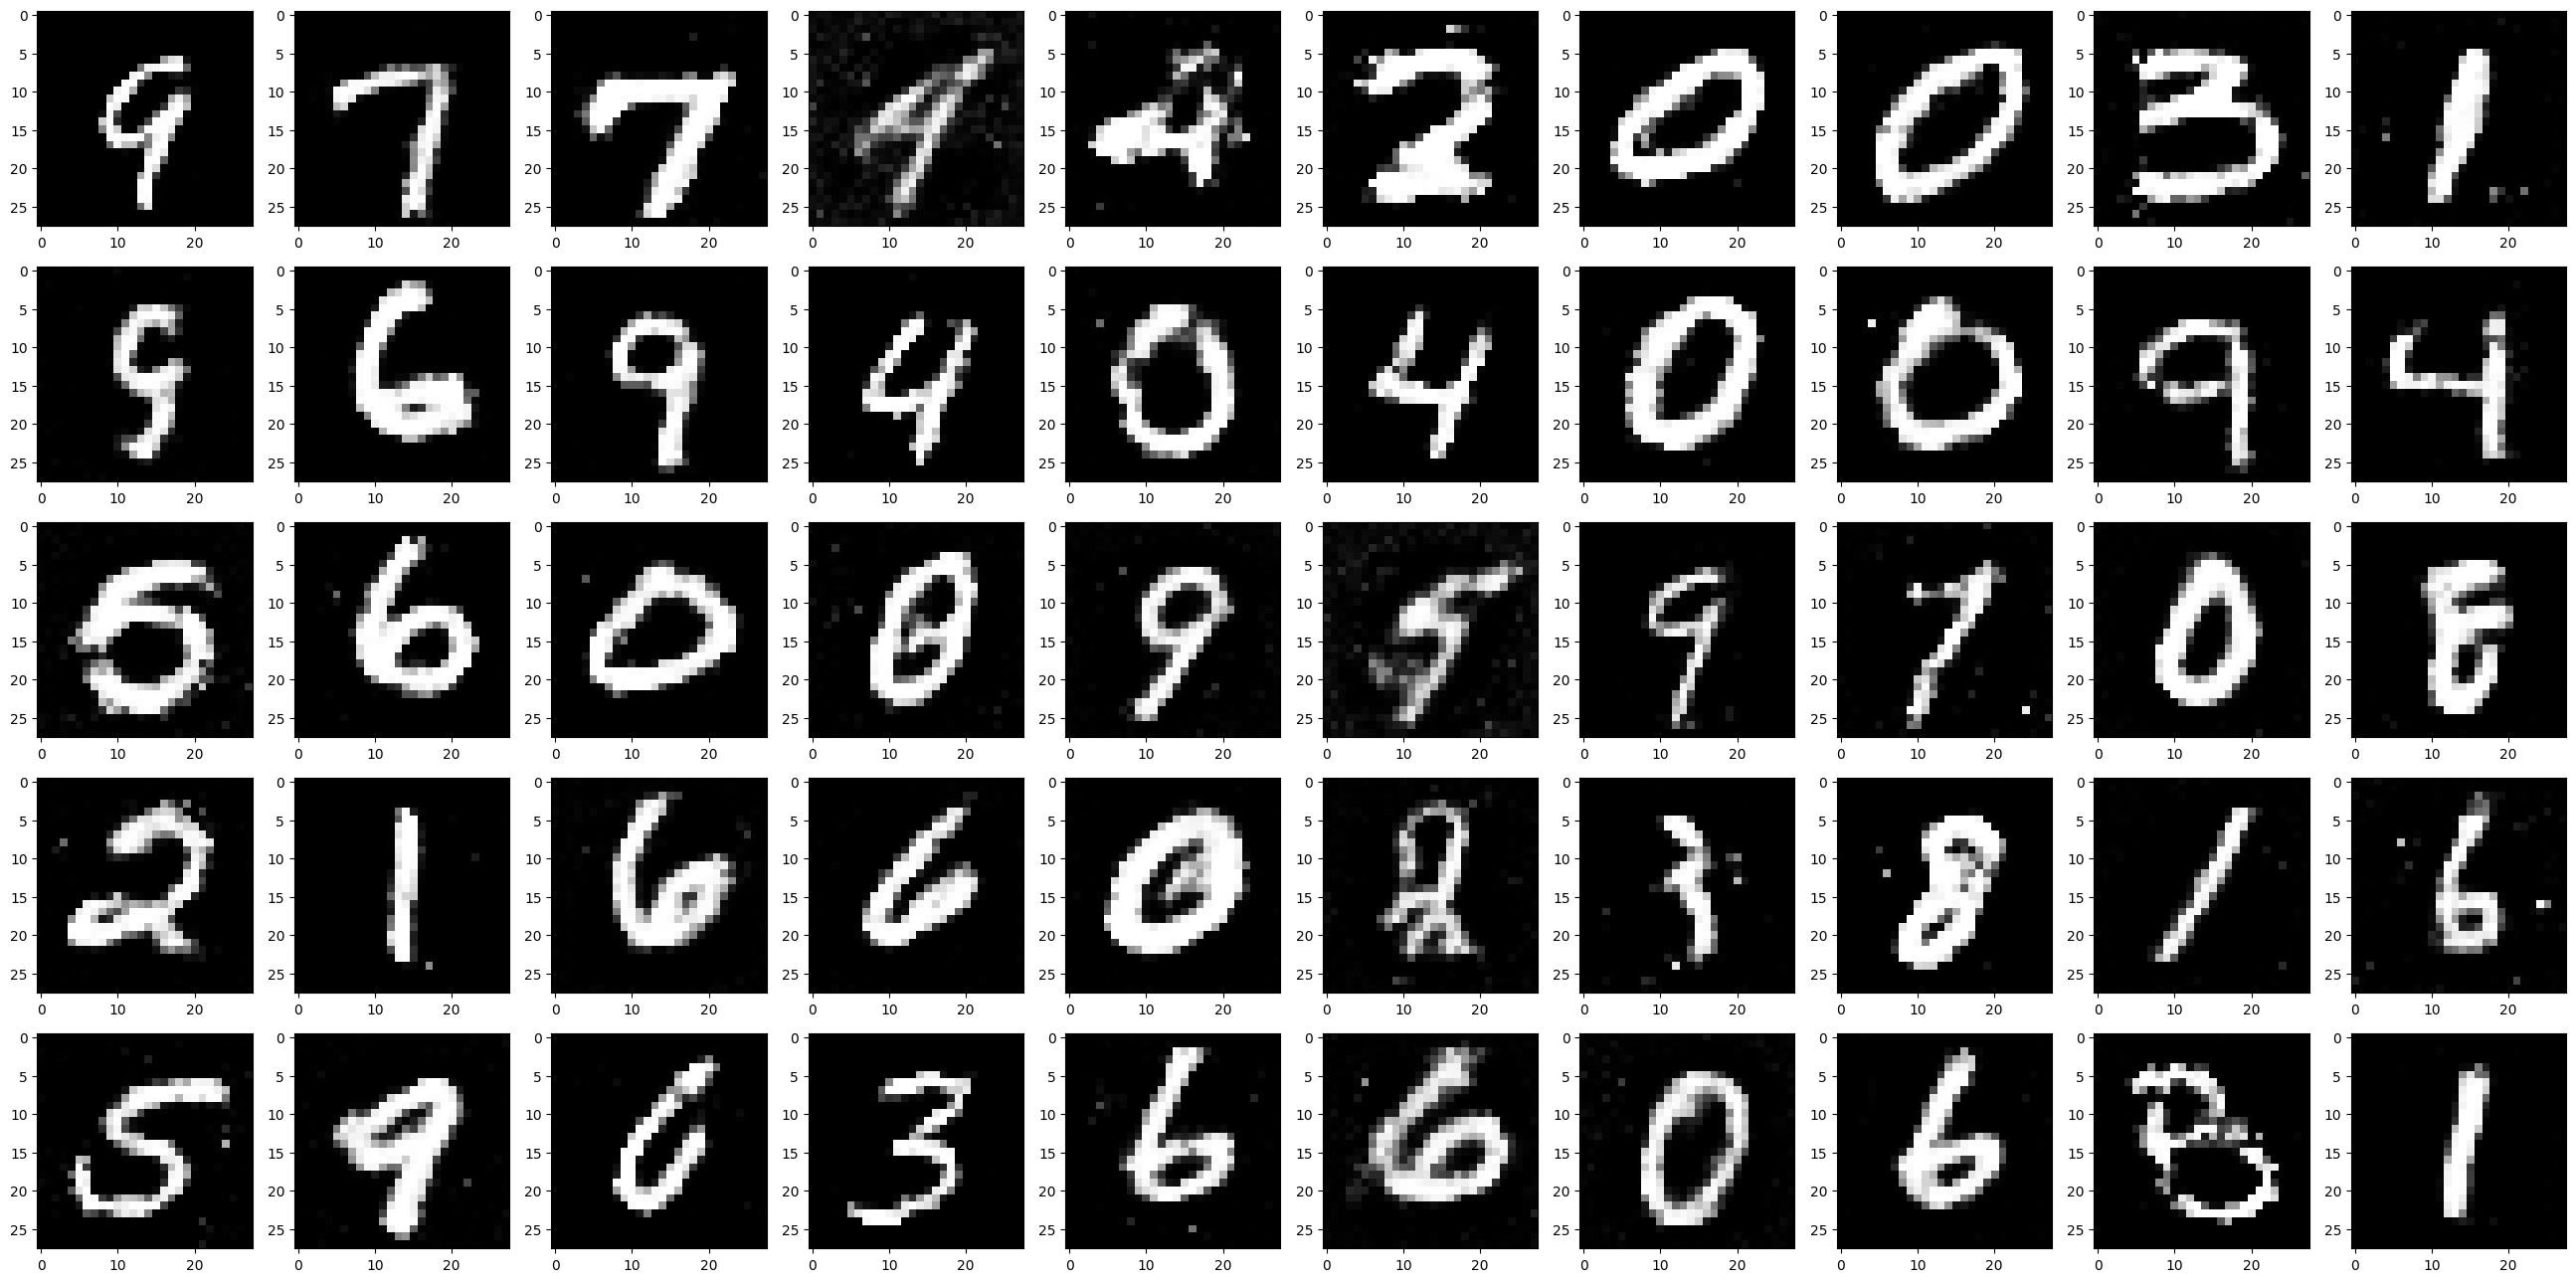

epoch[44/50], Generator Loss: 1.2008, Discriminator Loss: 1.4157


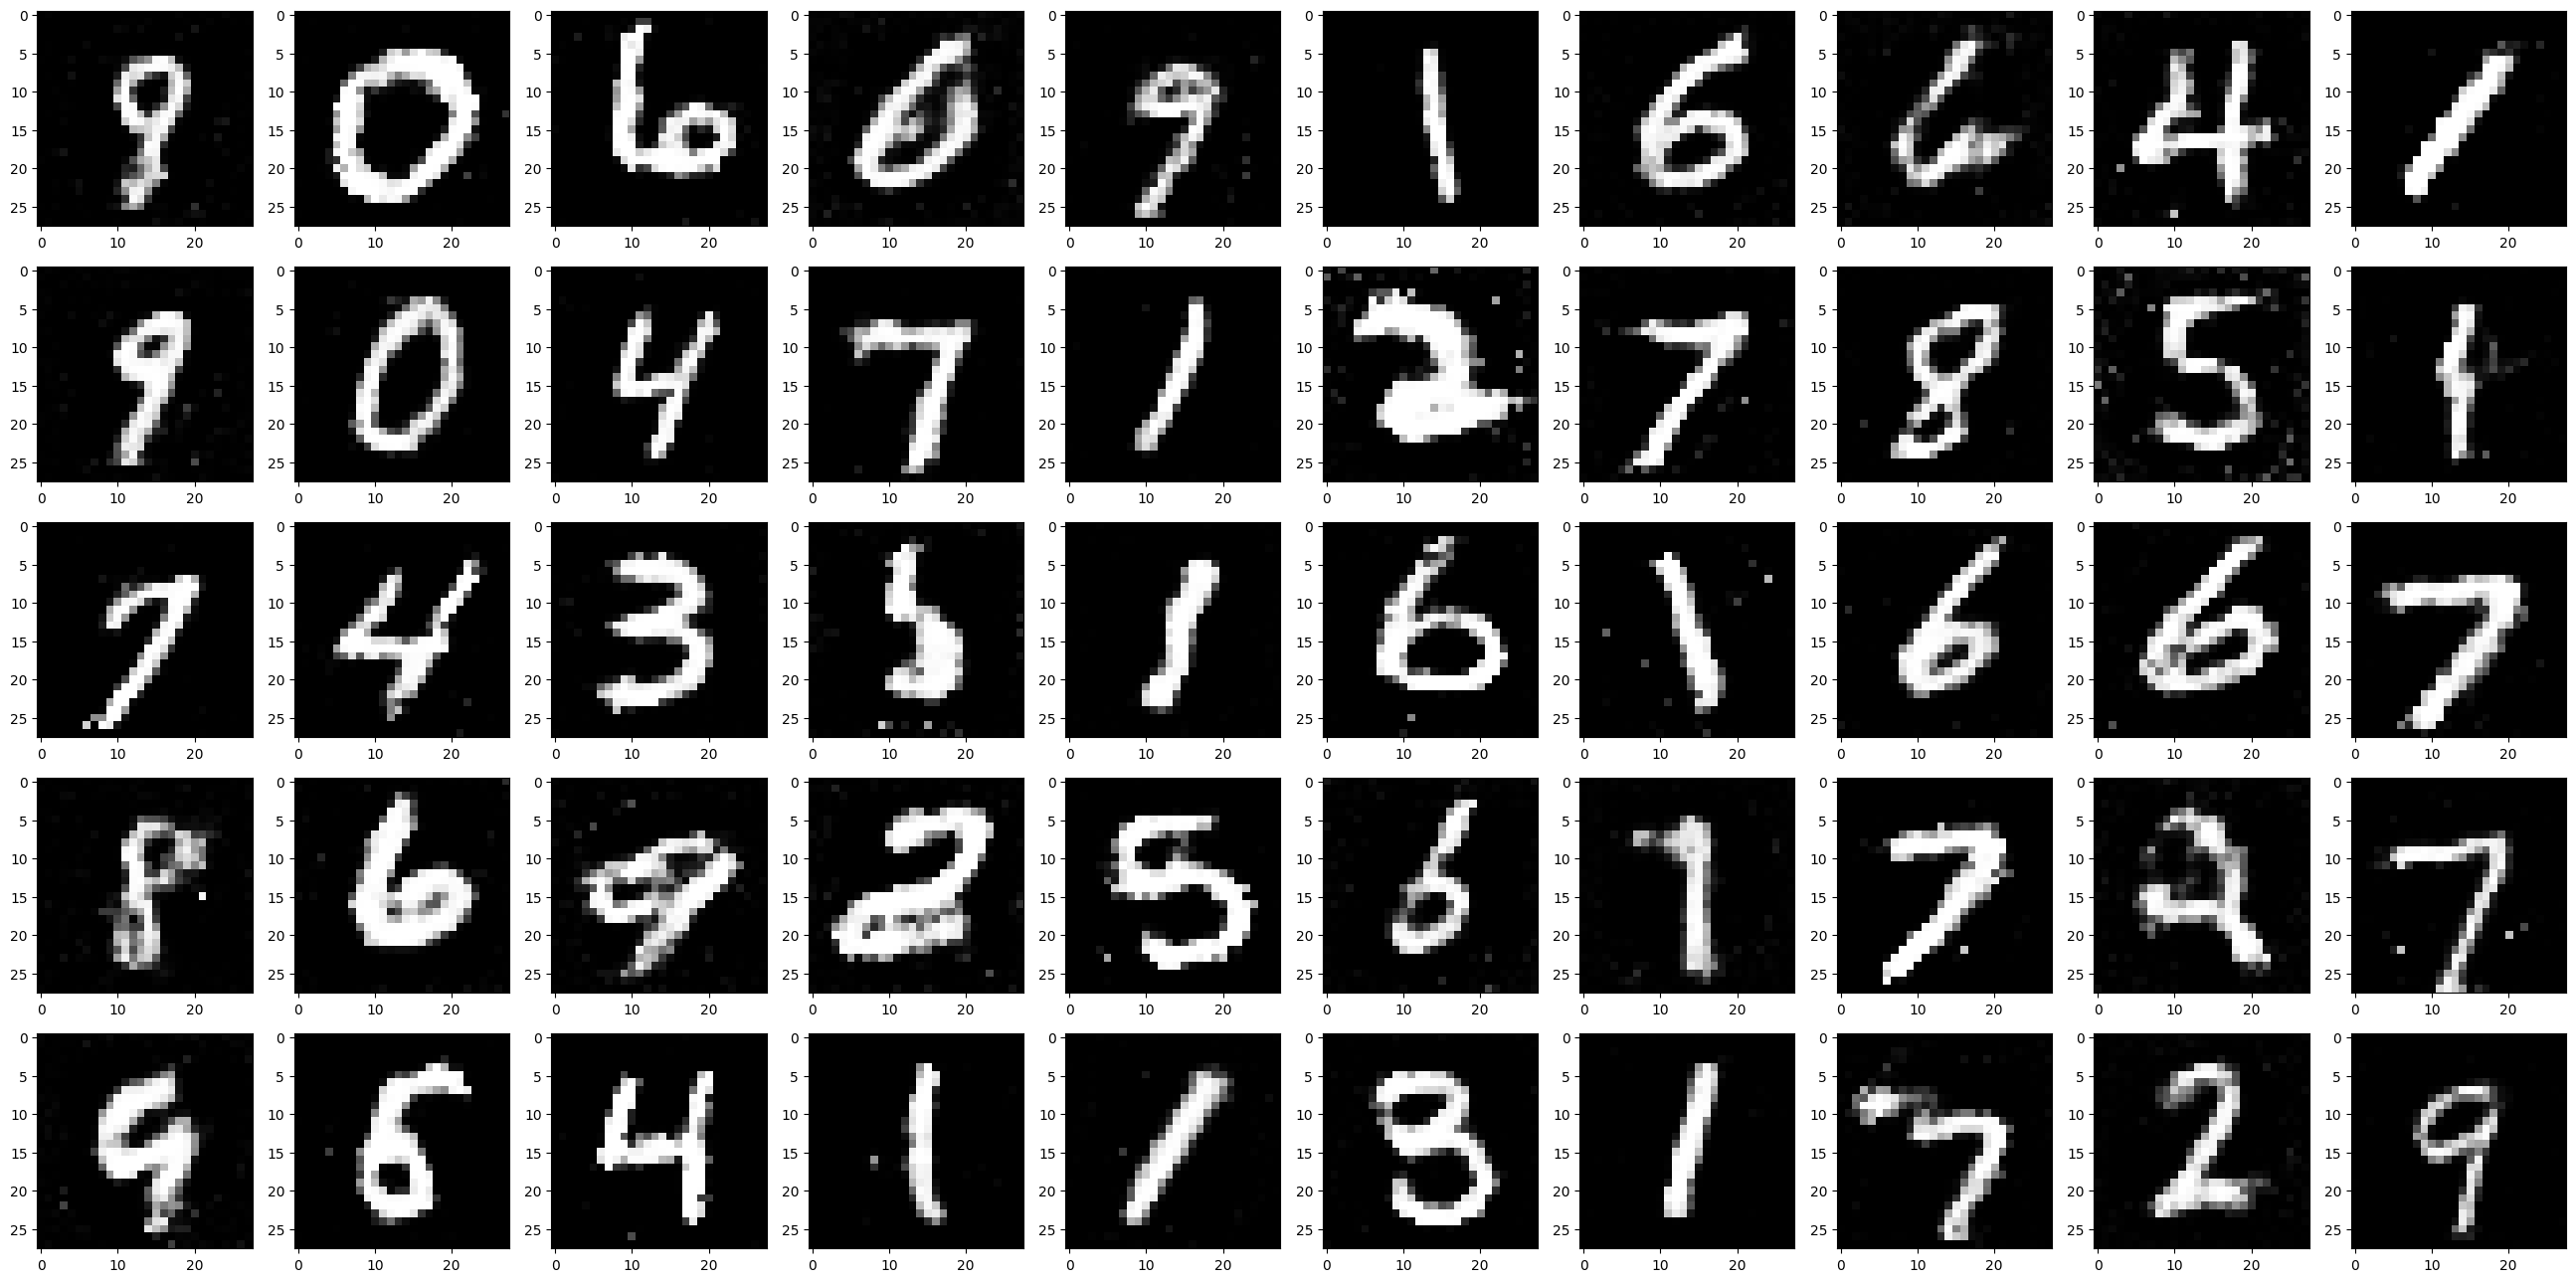

epoch[45/50], Generator Loss: 1.0493, Discriminator Loss: 2.1041


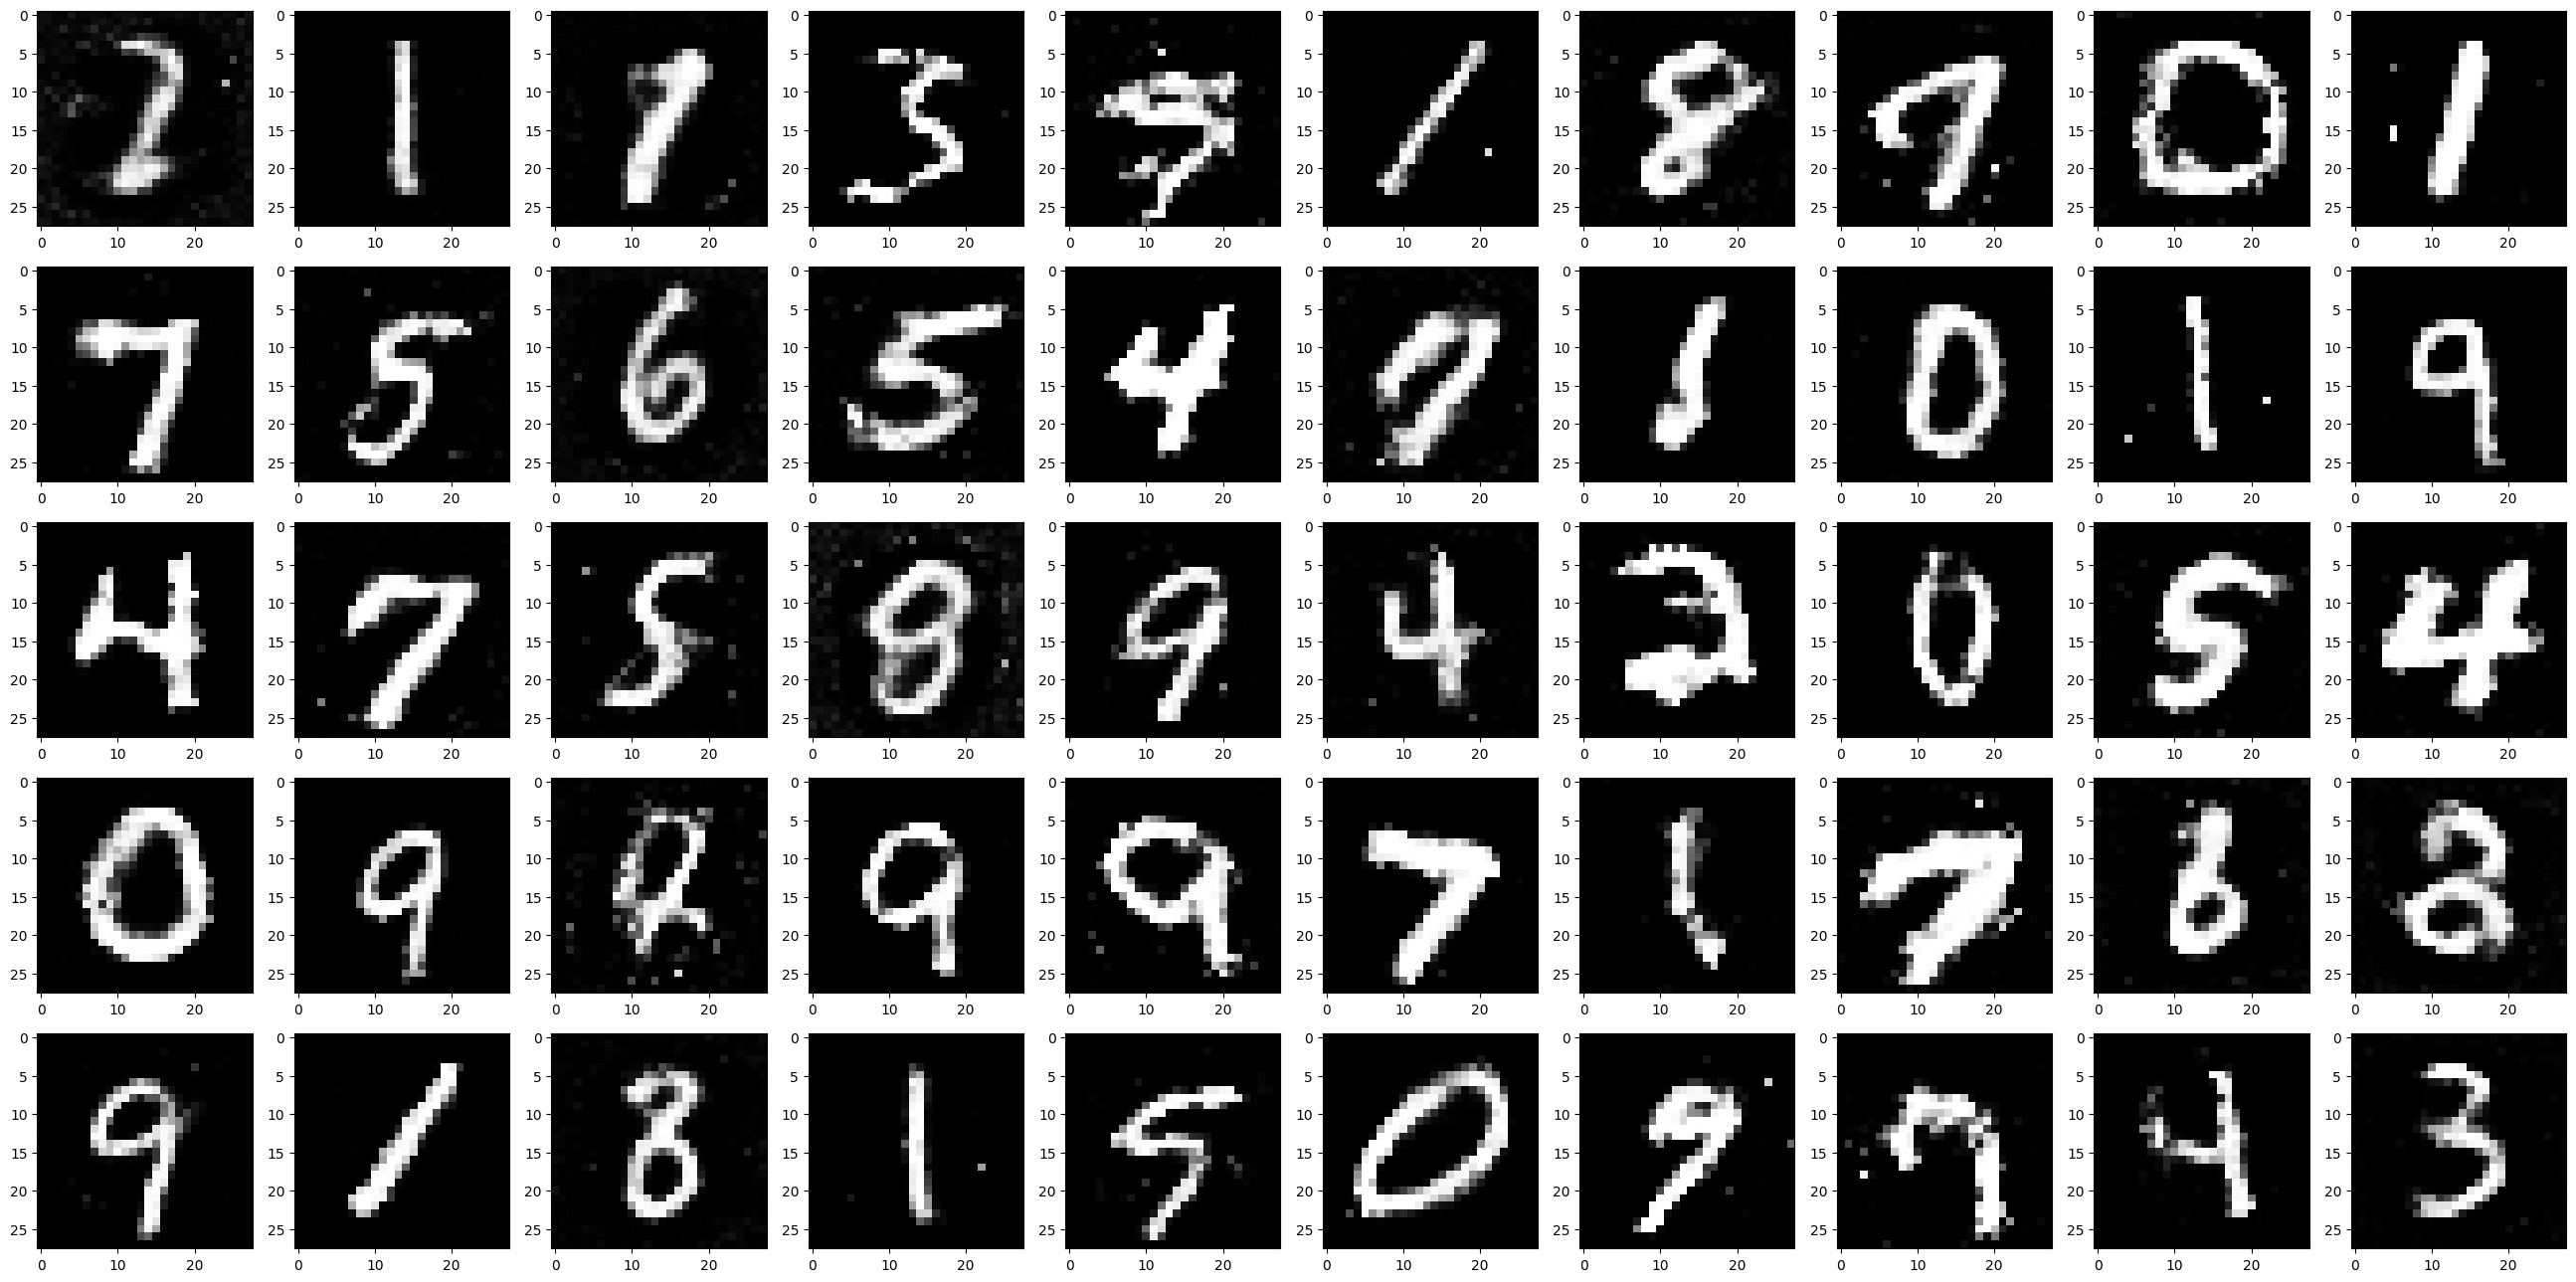

epoch[46/50], Generator Loss: 1.0425, Discriminator Loss: 1.6020


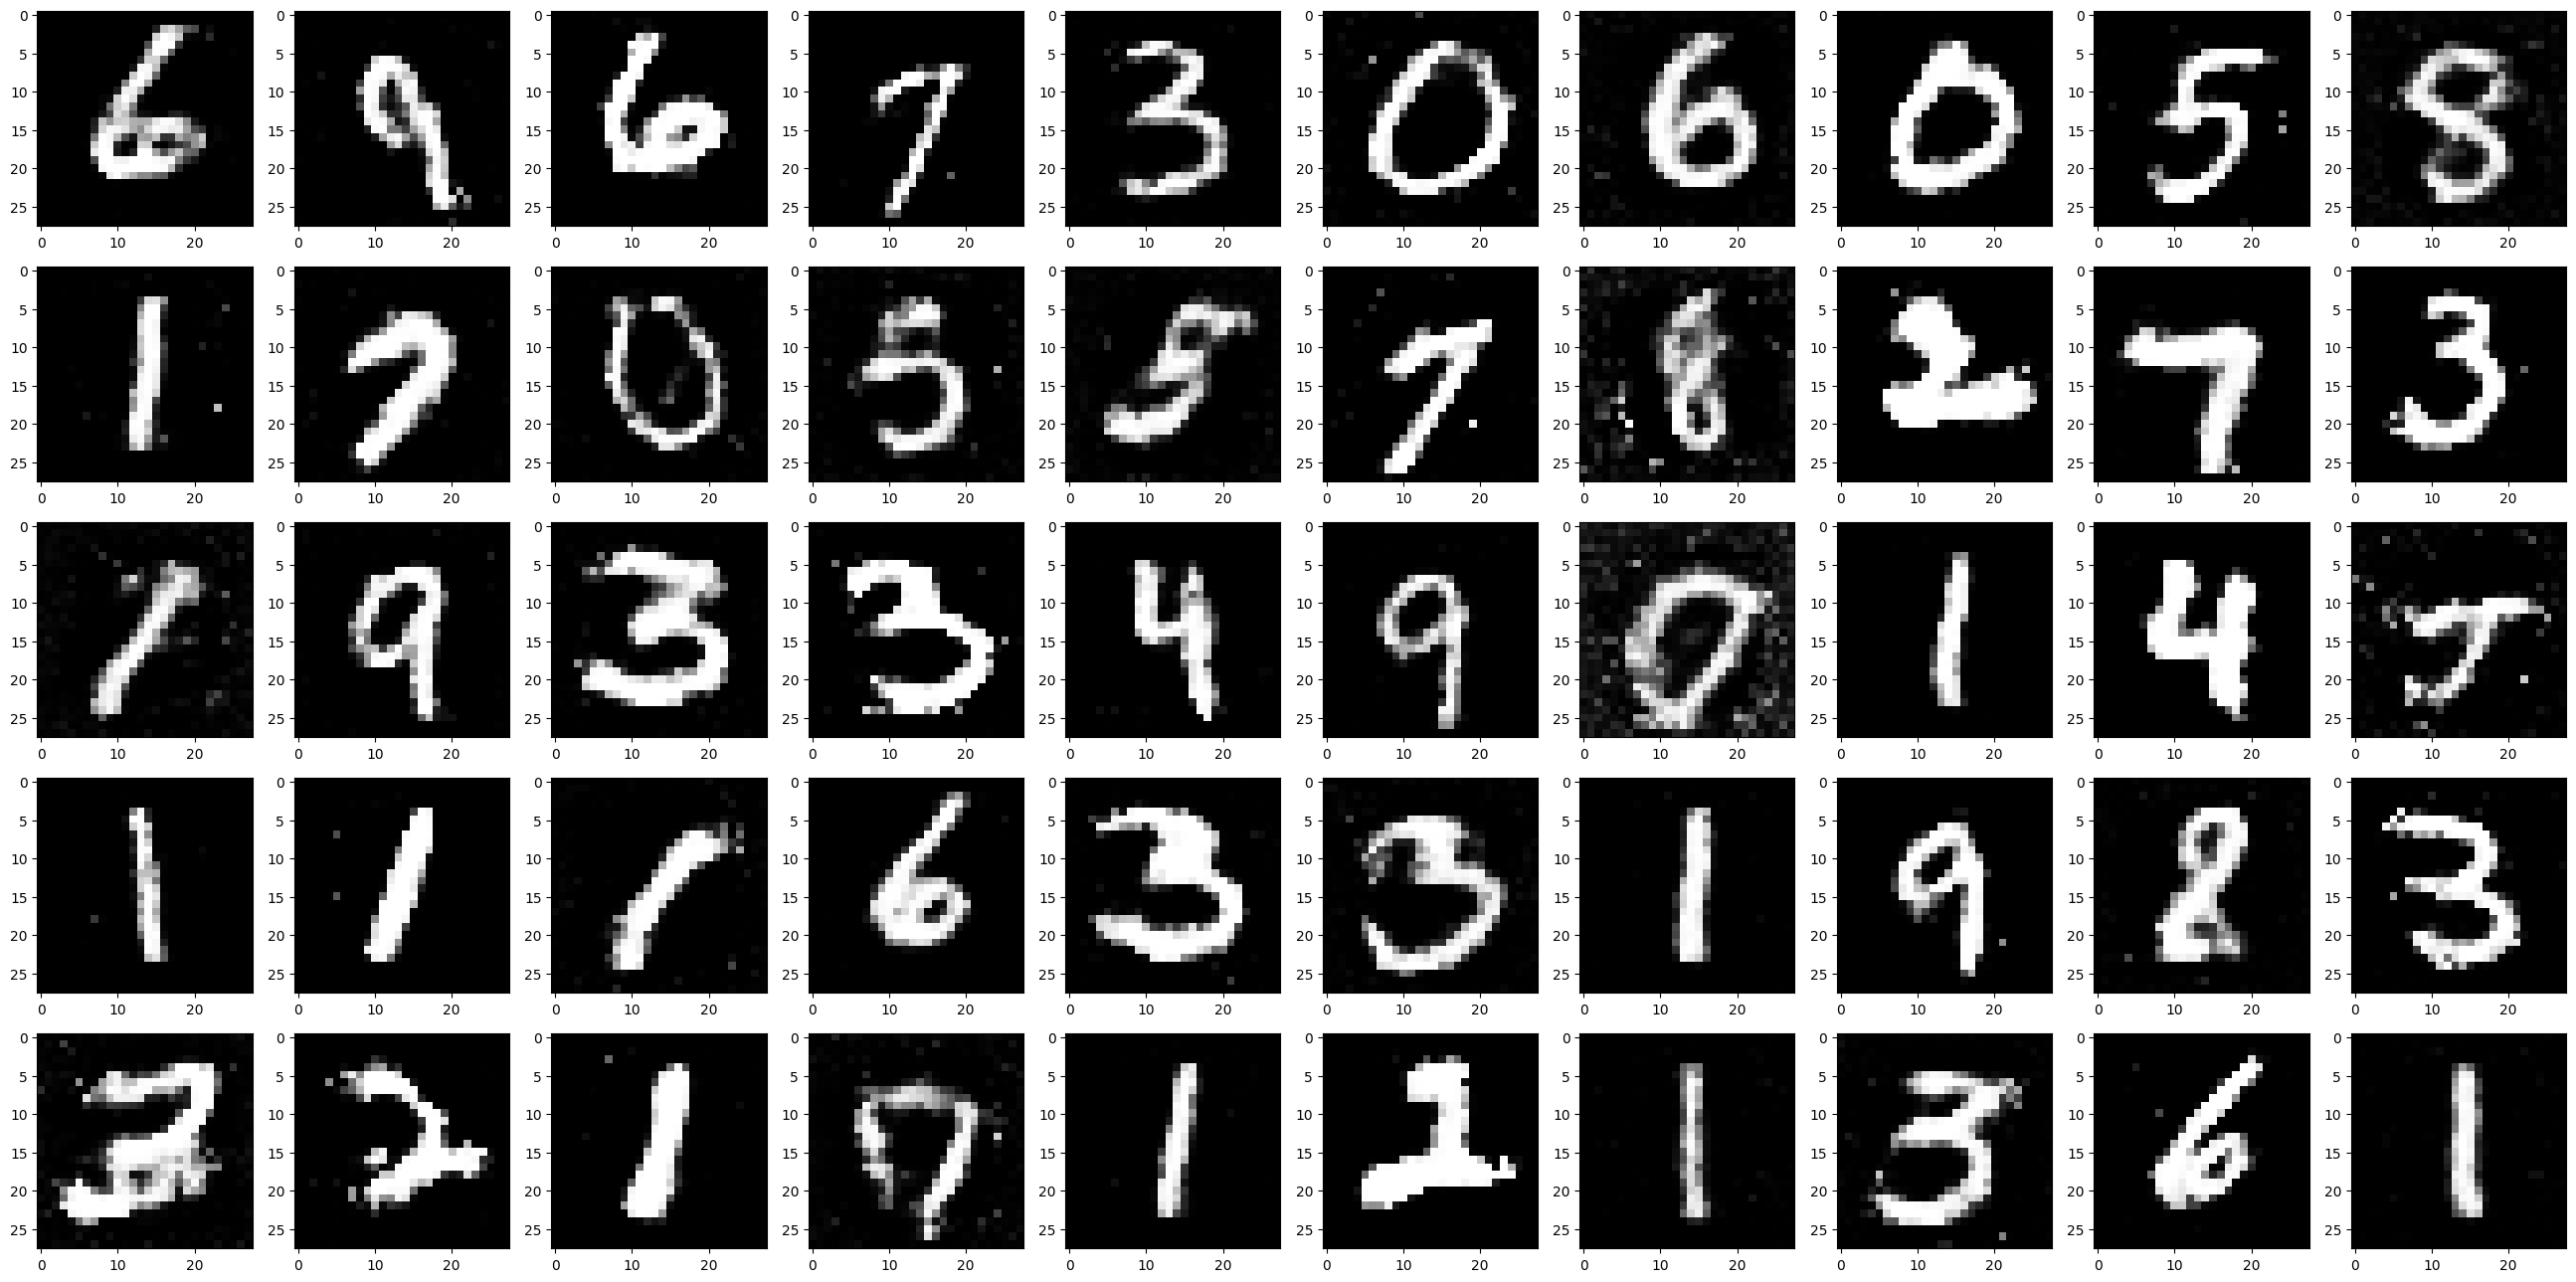

epoch[47/50], Generator Loss: 1.0841, Discriminator Loss: 1.0330


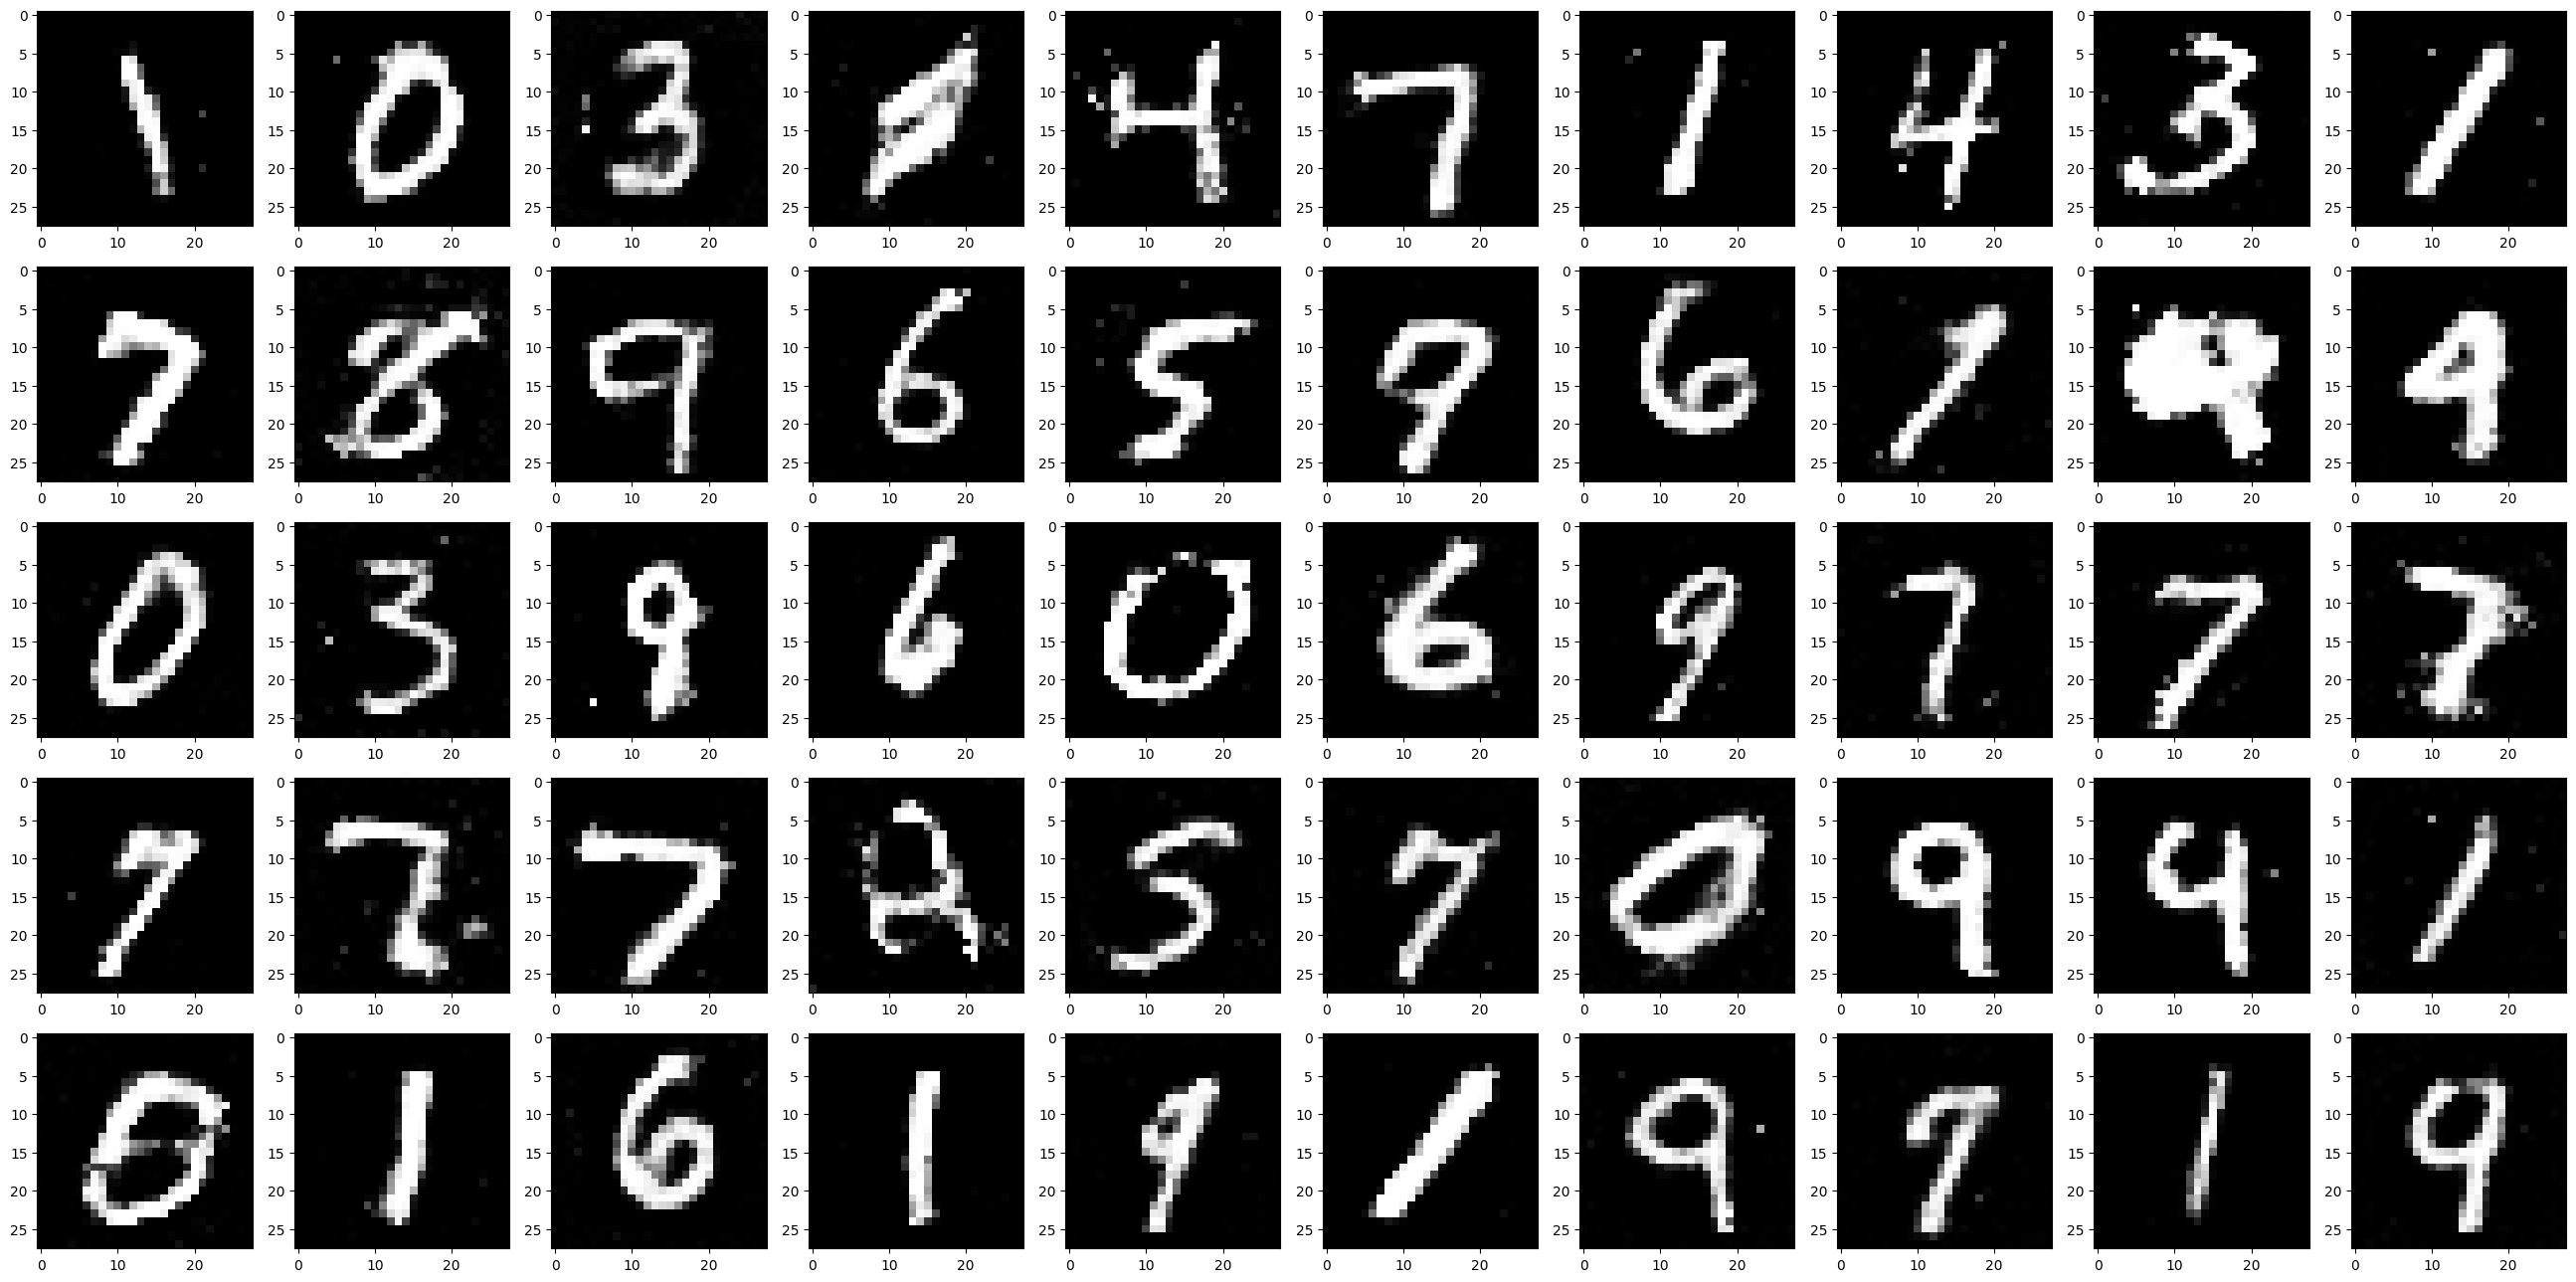

epoch[48/50], Generator Loss: 1.1926, Discriminator Loss: 1.9238


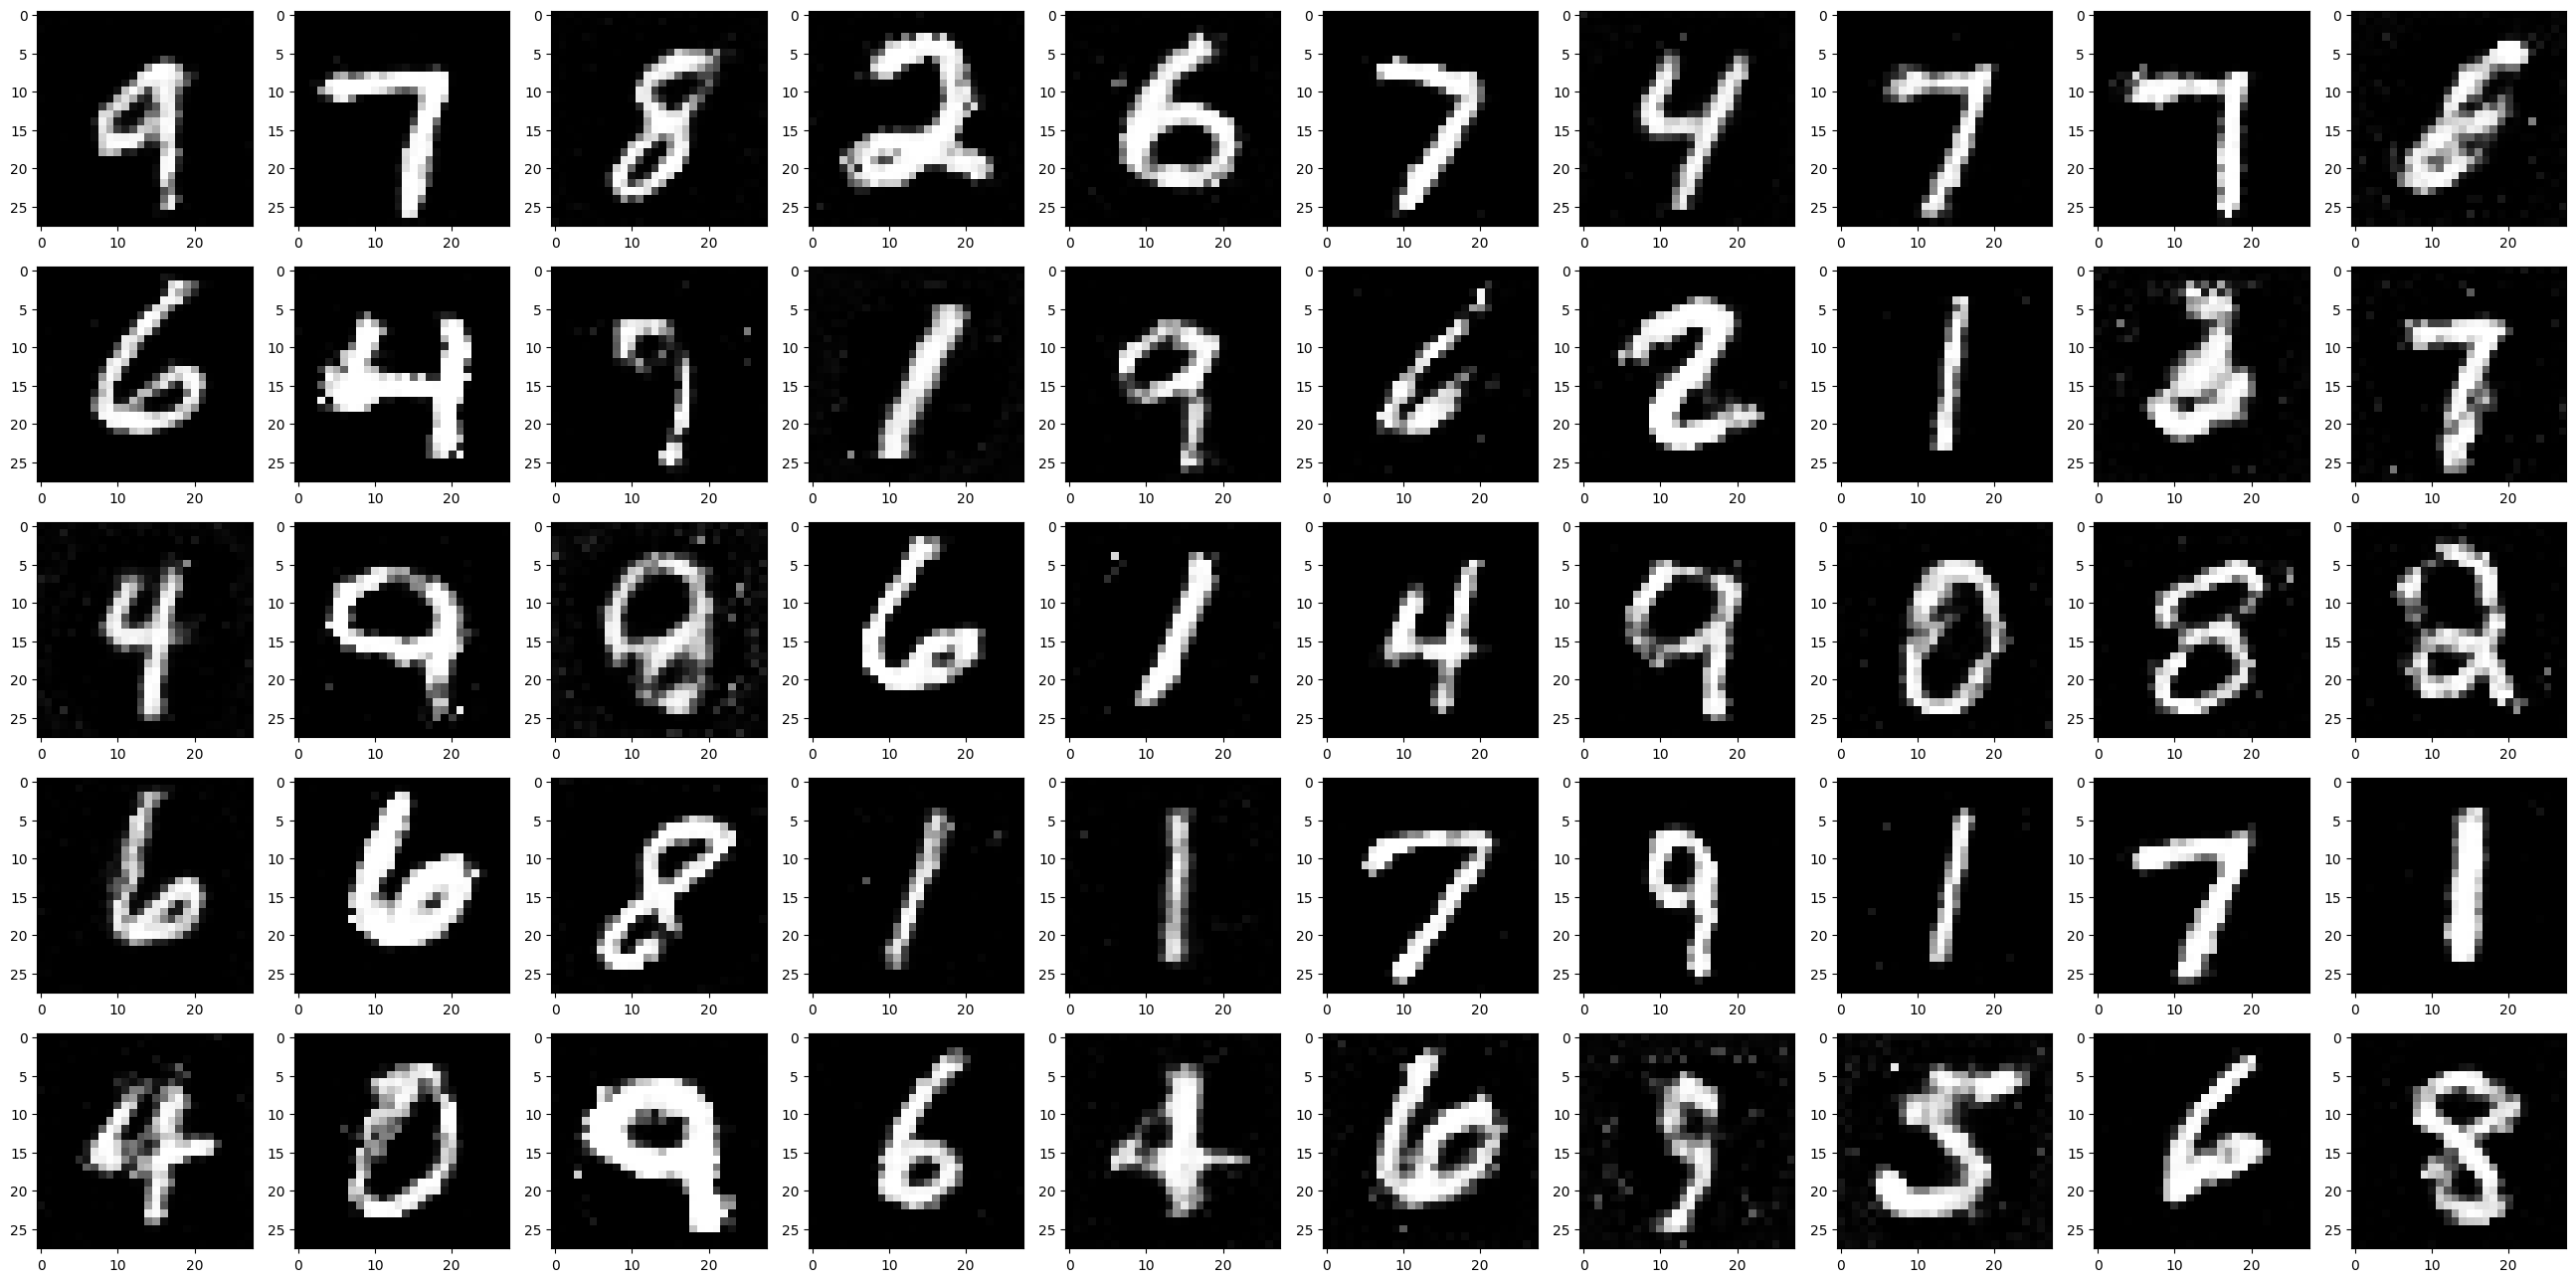

epoch[49/50], Generator Loss: 1.1141, Discriminator Loss: 1.2255


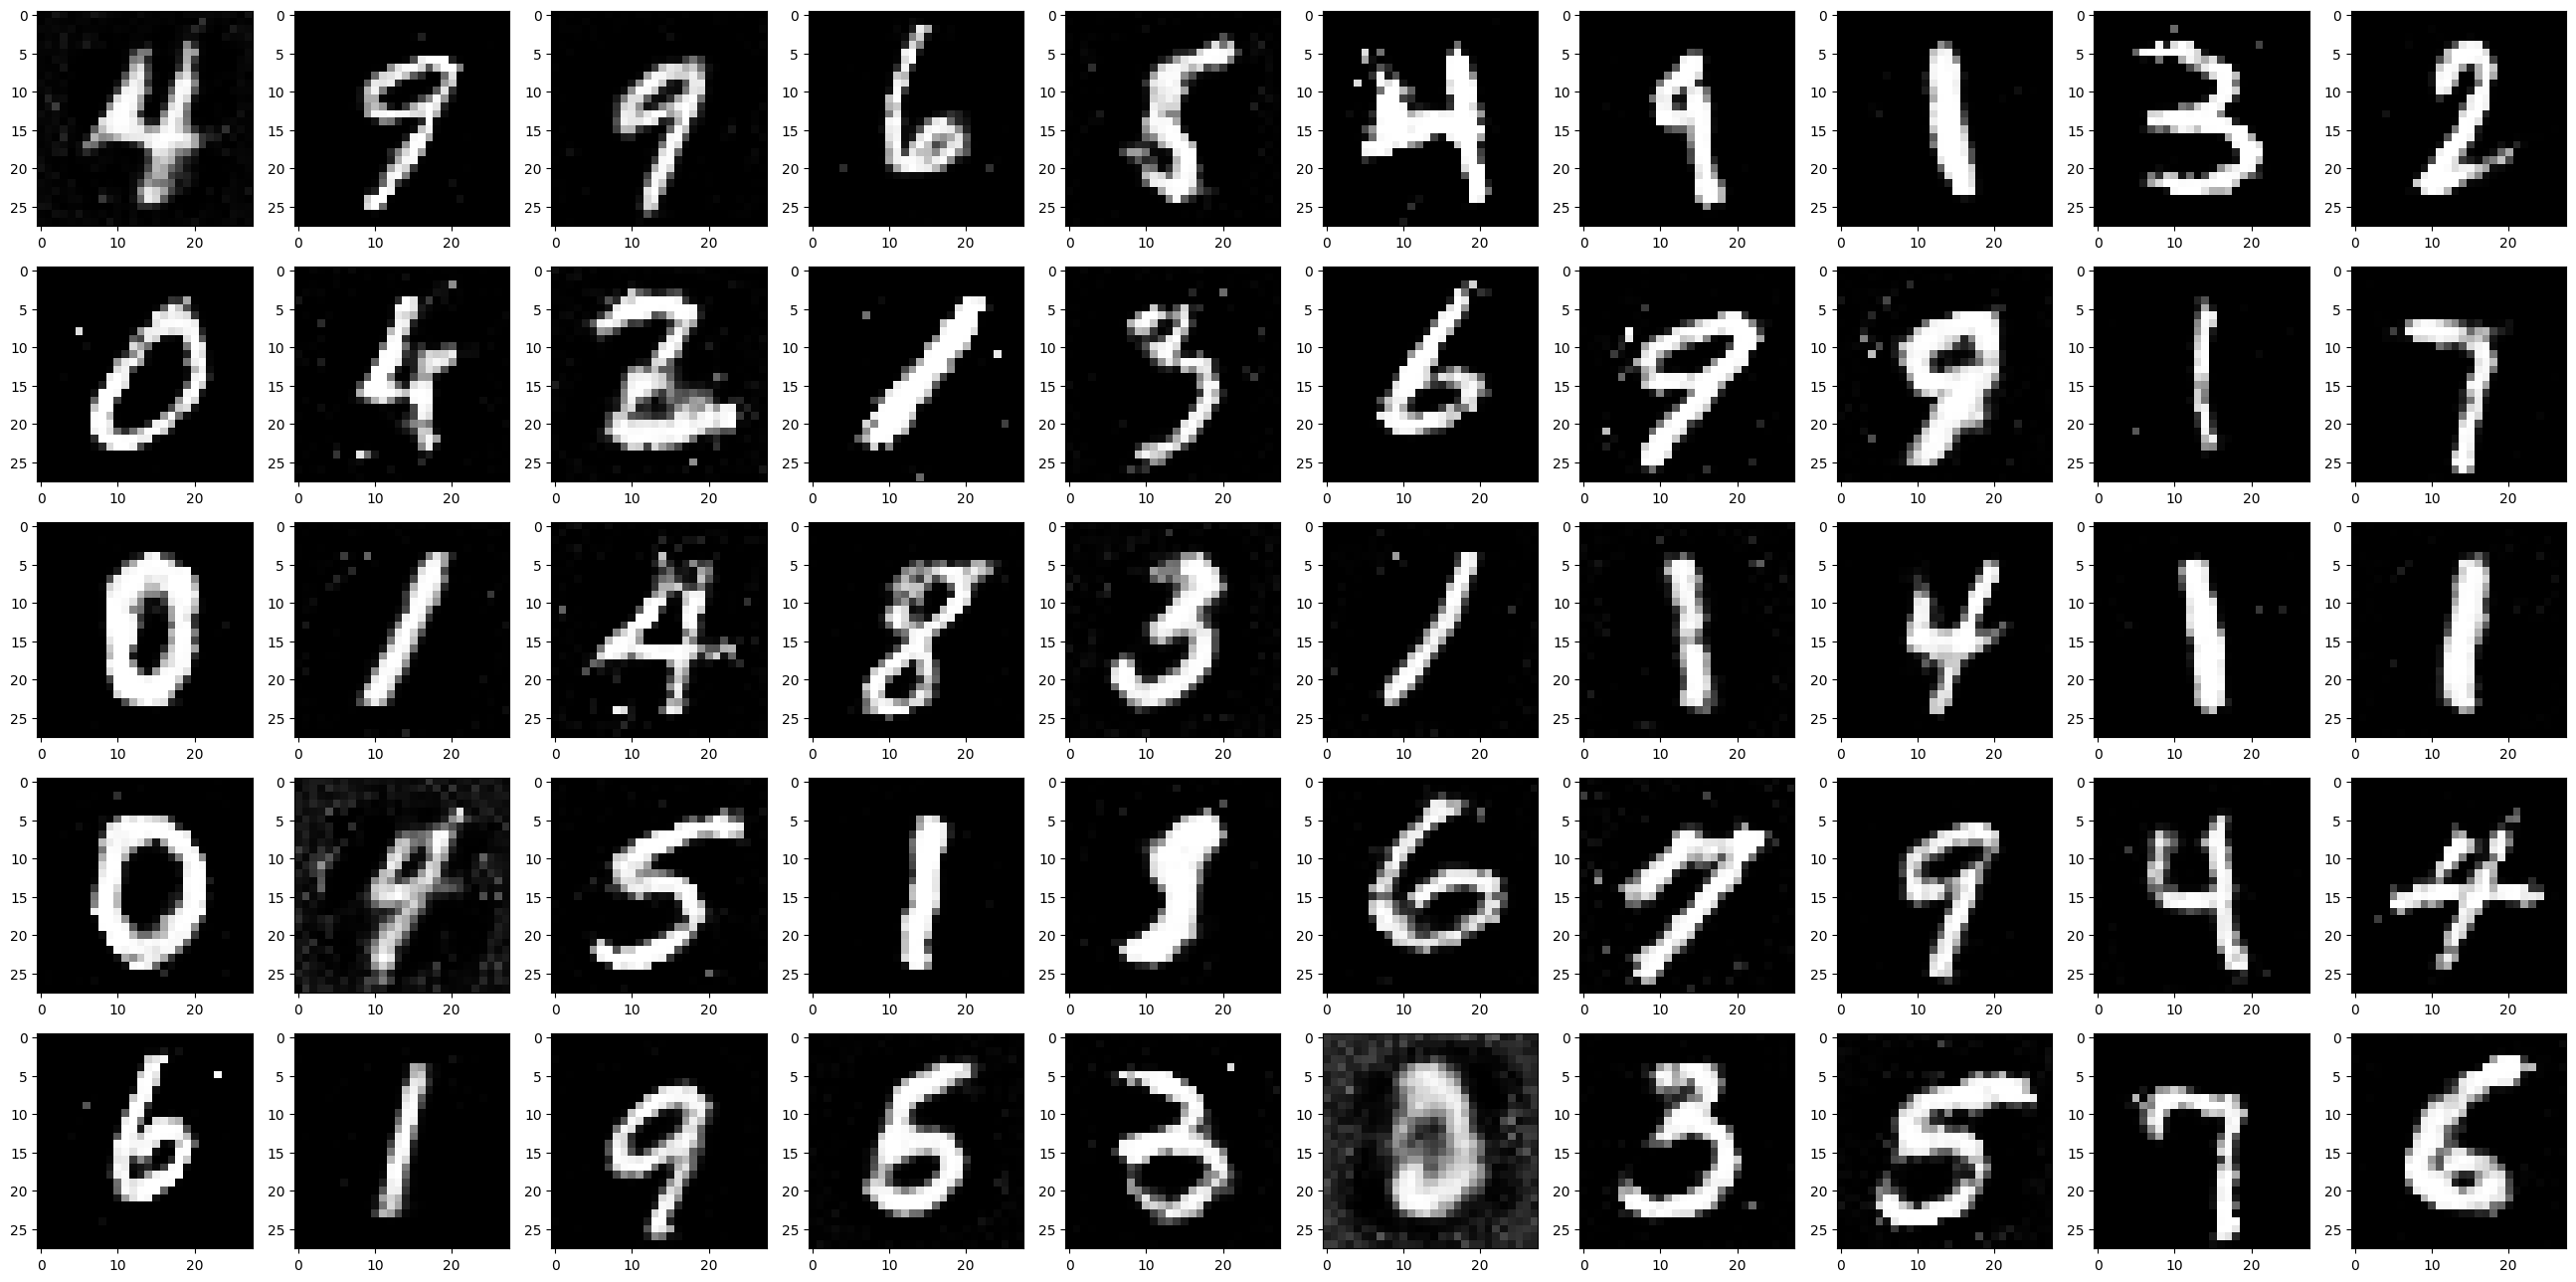

epoch[50/50], Generator Loss: 0.9980, Discriminator Loss: 1.4641


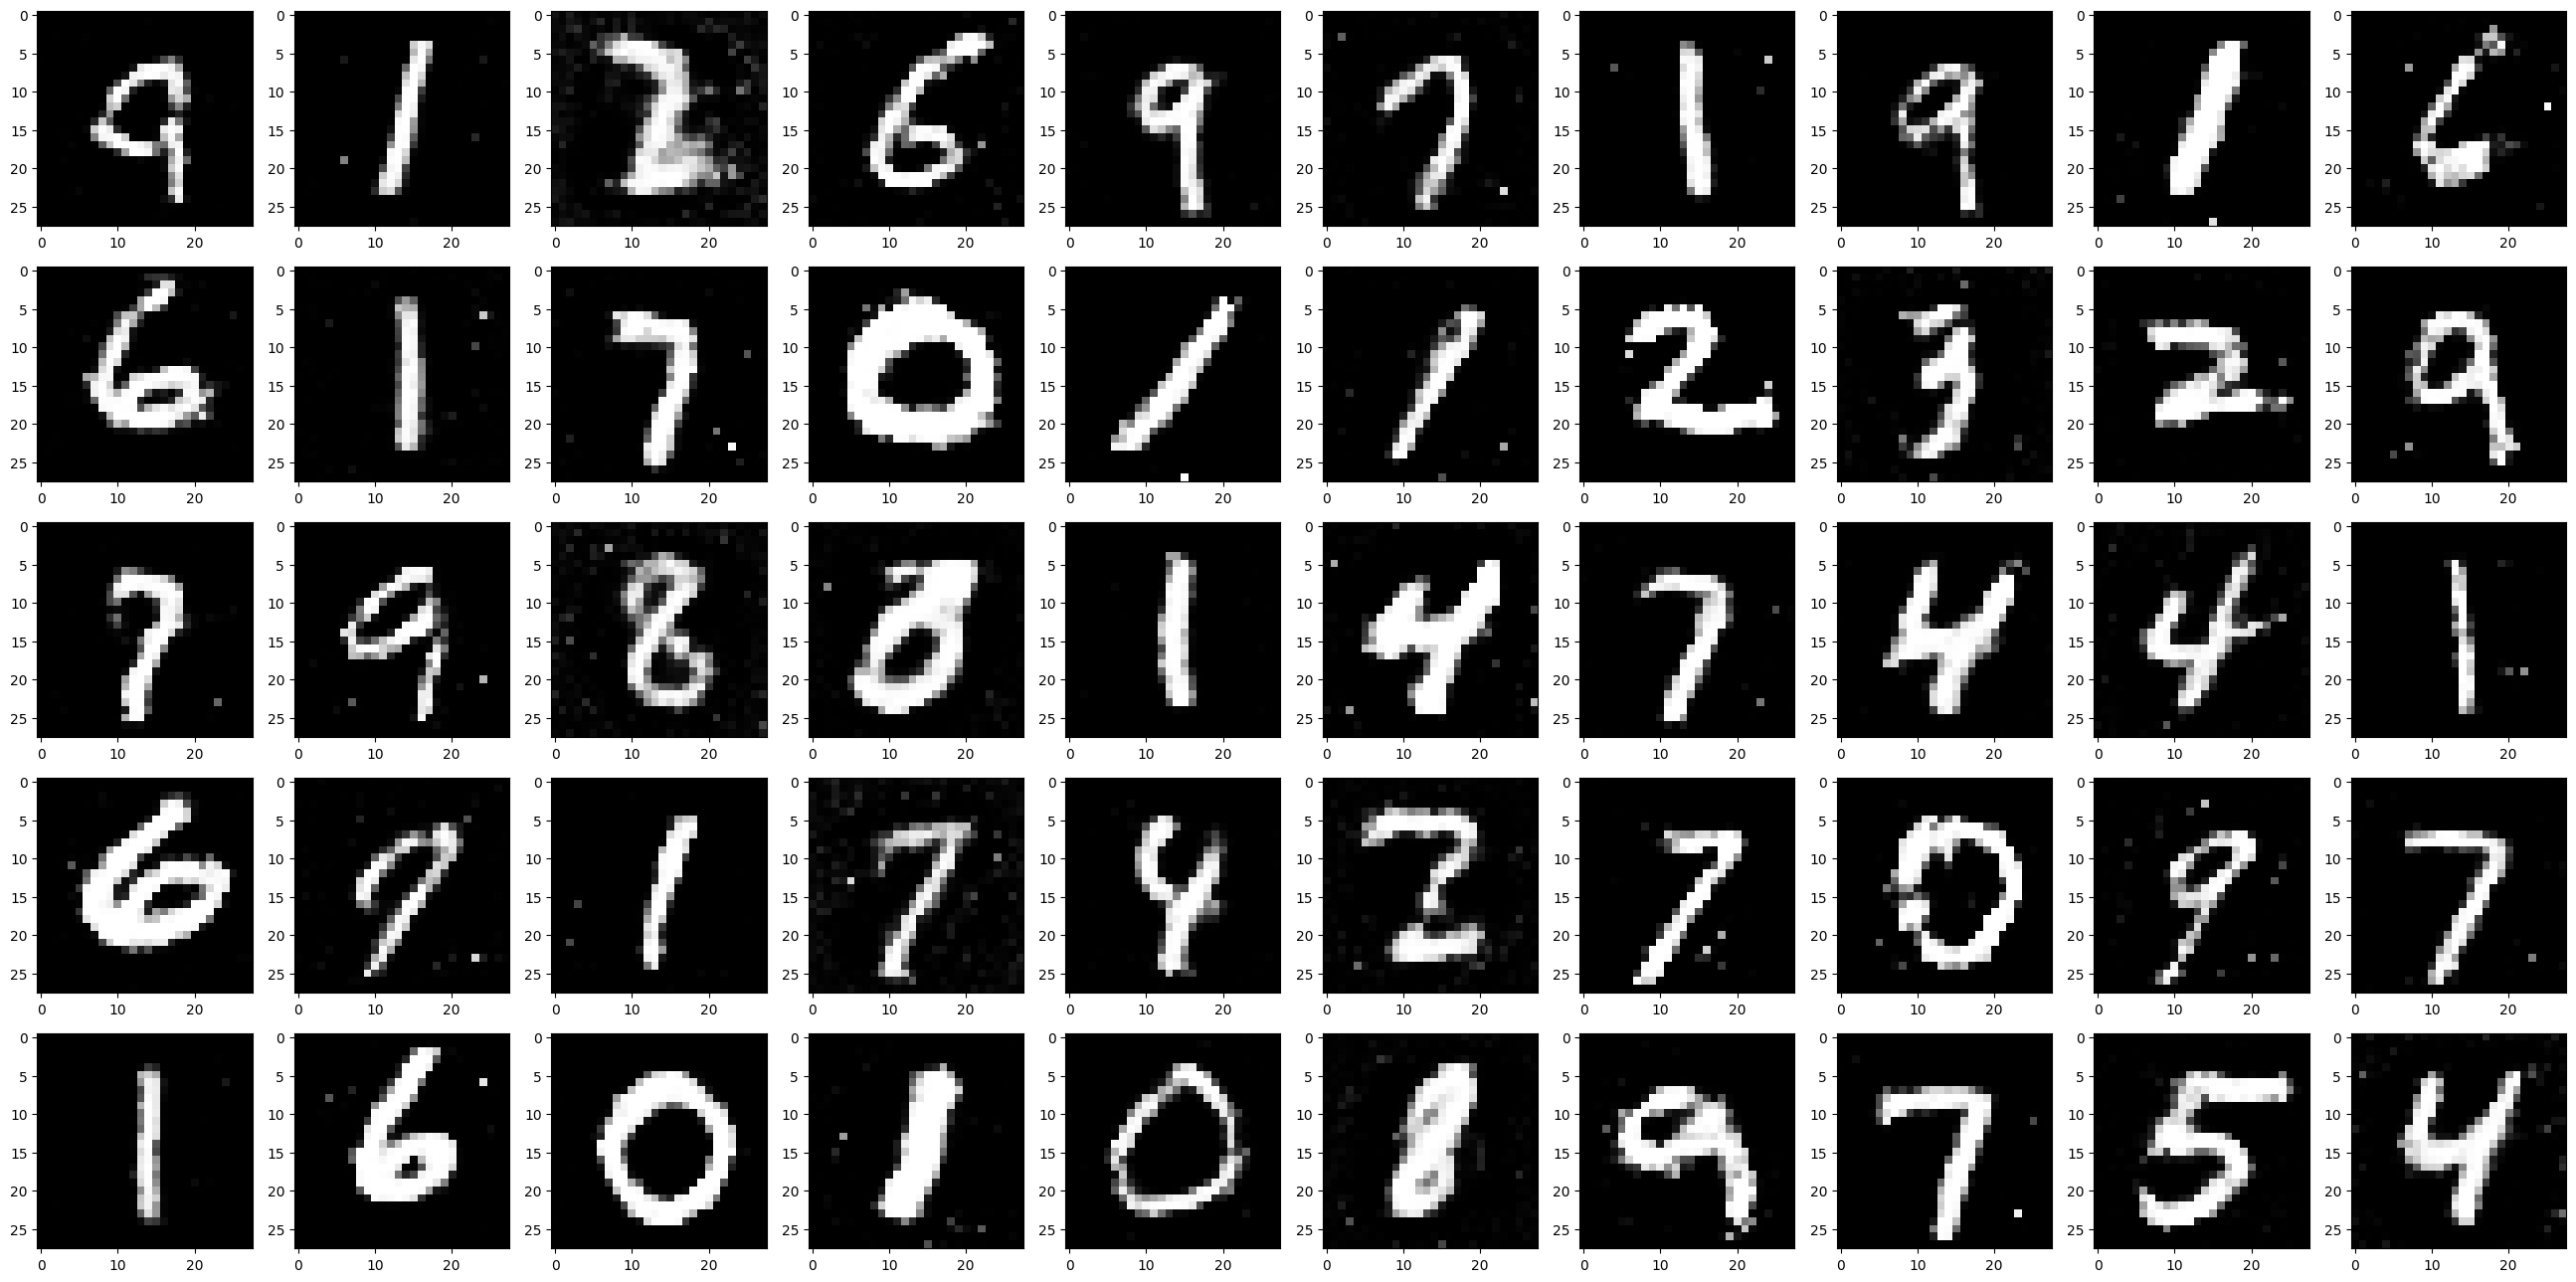

In [8]:
# TRAIN MODEL

epochs = 50
batch_size = 50

for epoch in range(epochs):
    for real_images, labels in train_loader:

        real_images = real_images.to('cuda')
        labels = labels.to('cuda')

        # CREATE LABEL THAT CONTROLLED BY DISCRIMINATOR
        model_real_labels = torch.ones(size=(batch_size,1), device='cuda')  # THIS IS REAL LABELS FOR REAL IMAGE DISCRIMINATOR
        model_fake_labels = torch.zeros(size=(batch_size,1), device='cuda') # THIS IS FAKE LABELS FOR FAKE IMAGE GENERATOR

        # FIT DISCRIMINATOR FOR REAL IMAGES
        output_real_image = discriminator(real_images)   # DISCRIMINATOR CHECK FOR REAL IMAGES
        loss_real_d = loss_function(output_real_image, model_real_labels)  # LOSS FUNCTION FOR REAL IMAGES.
                                                          # IF output_real_image CLOSE TO 1 , THEN DISCRIMINATOR CONSIDERED THAT IS REAL IMAGE

        # FIT DISCRIMINATOR FOR FAKE IMAGE (FROM GENERATOR)
        z = torch.randn(batch_size,z_dim,device='cuda')  # MAKE RANDOM SEED FOR FAKE IMAGE
        fake_images = generator(z)   # CREATE FAKE IMAGES BY GENERATOR

        # EVALUATE THE FAKE IMAGES
        fake_images_untrainable = fake_images.detach()   # MAKE IT trainable = False . SO THE PARAMETERS CAN'T CHANGE
        output_fake_image = discriminator(fake_images_untrainable) # DISCRIMINATOR CHECK FOR FAKE IMAGES
        loss_fake_d = loss_function(output_fake_image, model_fake_labels) # LOSS FUNCTION FOR FAKE IMAGES.
                                                          # IF output_fake_image CLOSE TO 0 , THEN DISCRIMINATOR CONSIDERED FAKE IMAGE AS FAKE

        # GET DISCRIMINATOR LOSS
        loss_d = loss_fake_d + loss_real_d

        # BACKPROPAGATION

        # UPDATE DISCRIMINATOR
        optimizer_d.zero_grad() # SET THE PREVIOUS PARAMETERS TO NONE , SO IT DONT INSULT THE NEW PARAMETERS
        loss_d.backward()  # COMPUTE THE GRADIENT FROM DISCRIMINATOR LOSS
        optimizer_d.step()      # UPDATE THE PARAMETERS USING COMPUTED GRADIENT FOR DISCRIMINATOR MODEL

        # UPDATE GENERATOR
        output_fake_image = discriminator(fake_images) # FIT THE FAKE MODELS TO DISCRIMINATOR , THE GOAL IS TO GET FEEDBACK FROM DISCRIMINATOR
        loss_g = loss_function(output_fake_image, model_real_labels) # CALCULATE LOSS FUNCTION AND GET FEEDBACK

        optimizer_g.zero_grad()  # DELETE THE PREVIOUS PARAMETERS, SO IT DONT INSULT THE NEW PARAMETERS
        loss_g.backward()    # COMPUTE THE GRADIENT FROM FEEDBACK DISCRIMINATOR
        optimizer_g.step()   # UPDATE THE PARAMETERS SO GENERATORS CAN GENERATED FAKE IMAGES MORE CLEARLY

    # DISPLAY LOSS FUNCTION EVERY 1 EPOCH
    print(f"epoch[{epoch + 1}/{epochs}], Generator Loss: {loss_d.item():.4f}, Discriminator Loss: {loss_g.item():.4f}")

    fig , axes = plt.subplots(nrows=5, ncols=10, figsize=(26,13))

    # DISPLAY FAKE IMAGE EVERY EPOCH
    for i in range(len(fake_images)):
        fake_images = fake_images.squeeze()
        ax = axes[i // 10, i % 10]    # SET THE INDEX
        ax.imshow(fake_images[i].detach().cpu().numpy(), cmap='gray')
    plt.tight_layout()
    plt.show()



In [9]:
# SAVE MODEL TO LOCAL DISK

# SAVE MODEL GENERATOR AND DISCRIMINATOR
torch.save(generator.state_dict(), 'generator_model.pth')
torch.save(discriminator.state_dict(), 'discriminator_model.pth')

# SAVE OPTIMIZER TO CONTINUE TRAINING LATER
torch.save(optimizer_g.state_dict(), 'optimizer_g.pth')
torch.save(optimizer_d.state_dict(), 'optimizer_d.pth')


In [11]:
# SAVE MODEL TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

# SAVE MODEL GENERATOR AND DISCRIMINATOR
torch.save(generator.state_dict(), '/content/drive/My Drive/Building GANs Architecture for Generating Handwritten Digits/generator_model.pth')
torch.save(discriminator.state_dict(), '/content/drive/My Drive/Building GANs Architecture for Generating Handwritten Digits/discriminator_model.pth')

# SAVE OPTIMIZER TO CONTINUE TRAINING LATER
torch.save(optimizer_g.state_dict(), '/content/drive/My Drive/Building GANs Architecture for Generating Handwritten Digits/optimizer_g.pth')
torch.save(optimizer_d.state_dict(), '/content/drive/My Drive/Building GANs Architecture for Generating Handwritten Digits/optimizer_d.pth')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
